**1. Upload the dataset and drop unnecessary columns**

In [6]:
import pandas as pd

# Specify the file path where the CSV file is located
csv_file_path = "Data/ebay_comments.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df

Search                                      Product Title  \
0           Iphone  Apple iPhone 13 Pro Max - 128GB - Alpine Green...   
1           Iphone  Apple iPhone 13 Pro Max - 128GB - Alpine Green...   
2           Iphone  Apple iPhone 13 Pro Max - 128GB - Alpine Green...   
3           Iphone  Apple iPhone 13 Pro Max - 128GB - Alpine Green...   
4           Iphone  Apple iPhone 13 Pro Max - 128GB - Alpine Green...   
...            ...                                                ...   
62642  Apple Watch          Bidding ended on Thu, 23 Nov at 11:00 AM.   
62643  Apple Watch          Bidding ended on Thu, 23 Nov at 11:00 AM.   
62644  Apple Watch          Bidding ended on Thu, 23 Nov at 11:00 AM.   
62645  Apple Watch          Bidding ended on Thu, 23 Nov at 11:00 AM.   
62646  Apple Watch          Bidding ended on Thu, 23 Nov at 11:00 AM.   

              Condition    Price              Seller  \
0           musicmagpie  £634.99                 NaN   
1                   new  £634.99          ssa2234ssa   
2             pre-owned  £634.99      phones2gadgets   
3      phonesdirect_com  £634.99                 NaN   
4                   new  £634.99         sell-phones   
...                 ...      ...                 ...   
62642         pre-owned  £195.00           davdivjak   
62643               new  £195.00           marstan57   
62644               new  £195.00             gogipat   
62645               new  £195.00          shelly1719   
62646         pre-owned  £195.00  the_phone_centr...   

                                                  Review  \
0      Probably as I had hoped for as the phone is in...   
1      Fantastic,new and sealed as described. It come...   
2      It’s  a good phone.. Had a new 13 model but fo...   
3      Perfect quality as if its new and it has 100% ...   
4                              I love it fantastic phone   
...                                                  ...   
62642  Amazing very pleased with it had no problems w...   
62643  You know what you’re getting with an apple pro...   
62644                                            Amazing   
62645                                                Yes   
62646                                          Bargain 👌   

                                     Review - Title Review - Star  \
0                                  Great but heavy.       4 stars   
1                                         Fantastic       5 stars   
2      Will do for me for a few years.. hopefully..       5 stars   
3                                             Goood       5 stars   
4                                         Perfect 👍       5 stars   
...                                             ...           ...   
62642                                      Good buy       5 stars   
62643                               Fantastic watch       5 stars   
62644                                           Gry       5 stars   
62645                                     Very good       5 stars   
62646                   Bargain just like brand new       5 stars   

          Review - Author Review - Date Review - Verified Purchase  
0             stickyprobs  28 Jun, 2023                        Yes  
1      helwa1078-voxze...  29 Sep, 2022                        Yes  
2            paulprior249  20 Jun, 2023                        Yes  
3                  88s275  16 Aug, 2023                        Yes  
4                 sarolga  04 Jun, 2022                        Yes  
...                   ...           ...                        ...  
62642             bigtez1  11 Aug, 2023                        Yes  
62643         kevicarte-7  08 Jun, 2023                        Yes  
62644            stan3530  12 Sep, 2023                        Yes  
62645            semifav0  12 May, 2023                        Yes  
62646          jucylucy79  26 Feb, 2023                        Yes  

[62647 rows x 11 columns]

In [8]:
df = df[df['Product Title'].str.contains('Apple', na=False, case=False)]
df['Search'].value_counts()


Iphone         49349
AirPods         4891
iPad            2339
Apple Watch     1588
Macbook         1156
Name: Search, dtype: int64

In [3]:
df.rename(columns={'text': 'Comment_Body', 'date': 'Date', 'author': 'Author'}, inplace=True)
df.drop(['video_id', 'comment_id'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43356 entries, 0 to 43355
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Search        43356 non-null  object
 1   Comment_Body  43356 non-null  object
 2   Author        43349 non-null  object
 3   Date          43356 non-null  object
 4   like_count    43356 non-null  int64 
 5   reply_count   43356 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


**2. Adjust the type of the columns**

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43356 entries, 0 to 43355
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Search        43356 non-null  object             
 1   Comment_Body  43356 non-null  object             
 2   Author        43349 non-null  object             
 3   Date          43356 non-null  datetime64[ns, UTC]
 4   like_count    43356 non-null  int64              
 5   reply_count   43356 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 2.0+ MB


**3. Check the duplicates**

In [6]:
df = df.drop_duplicates()
df


Search                                       Comment_Body  \
0           iPhone                    iPhone 4s was the perfect size.   
1           iPhone  I went from the iPhone 3GS to 4 to 4S to 5 to ...   
2           iPhone  Beginning 0:01\niPhone 0:02\niPhone 3G 0:13\ni...   
3           iPhone  My evolution of owning an iPhone \n3Gs\n4s\n5s...   
4           iPhone  Every iPhone: Our subtitles are revolations!\n...   
...            ...                                                ...   
43351  Apple Watch  Many of us are comfortable with Android phones...   
43352  Apple Watch  I went with the Apple Watch Ultra mainly for t...   
43353  Apple Watch  Just buy last year Apple Watch Series 7. Skip ...   
43354  Apple Watch  Does de Apple Watch Ultra will be compatible w...   
43355  Apple Watch  I'm glad I got the SE 1, the SE 2 doesn't seem...   

                                   Author                      Date  \
0                             Carlos Vega 2023-11-07 04:49:36+00:00   
1                                    user 2023-11-06 22:33:16+00:00   
2                               iPhone 5s 2023-11-06 00:48:43+00:00   
3                              Sunshine19 2023-10-29 22:29:27+00:00   
4      J-D Flash Studios { Discontinued } 2023-10-29 14:14:16+00:00   
...                                   ...                       ...   
43351                        Anish Thomas 2022-09-14 14:57:52+00:00   
43352                                  BP 2022-09-14 14:20:49+00:00   
43353                        Csaba Teplan 2022-09-14 14:19:26+00:00   
43354                   antonio caballero 2022-09-14 14:15:03+00:00   
43355                            Apple Pi 2022-09-14 14:14:03+00:00   

       like_count  reply_count  
0               0            0  
1               0            0  
2               1            0  
3               0            0  
4               0            0  
...           ...          ...  
43351          10            0  
43352          84            7  
43353           0            3  
43354           0            1  
43355          17            3  

[43356 rows x 6 columns]

**4. Filter out the unrelated comments**

In [7]:
df.Search.value_counts()

iPad           16960
iPhone         15984
Macbook         4779
AirPods         2845
Apple Watch     2788
Name: Search, dtype: int64

In [8]:
df = df[~((df['Search'] == 'iPhone') & (~df['Comment_Body'].str.contains('iPhone', na=False, case=False))) | (df['Search'] != 'iPhone')]
df = df[~((df['Search'] == 'Apple Watch') & (~df['Comment_Body'].str.contains('Apple Watch', na=False, case=False))) | (df['Search'] != 'Apple Watch')]
df = df[~((df['Search'] == 'iPad') & (~df['Comment_Body'].str.contains('iPad', na=False, case=False))) | (df['Search'] != 'iPad')]
df = df[~((df['Search'] == 'AirPods') & (~df['Comment_Body'].str.contains('AirPods', na=False, case=False))) | (df['Search'] != 'AirPods')]
df = df[~((df['Search'] == 'Macbook') & (~df['Comment_Body'].str.contains('Macbook', na=False, case=False))) | (df['Search'] != 'Macbook')]
df.Search.value_counts()


iPad           16960
iPhone         15984
Macbook         4779
AirPods         2845
Apple Watch     2788
Name: Search, dtype: int64

**5. Anonymize the comments**

In [9]:
df = df.drop('Author', axis=1)
df


Search                                       Comment_Body  \
0           iPhone                    iPhone 4s was the perfect size.   
1           iPhone  I went from the iPhone 3GS to 4 to 4S to 5 to ...   
2           iPhone  Beginning 0:01\niPhone 0:02\niPhone 3G 0:13\ni...   
3           iPhone  My evolution of owning an iPhone \n3Gs\n4s\n5s...   
4           iPhone  Every iPhone: Our subtitles are revolations!\n...   
...            ...                                                ...   
43351  Apple Watch  Many of us are comfortable with Android phones...   
43352  Apple Watch  I went with the Apple Watch Ultra mainly for t...   
43353  Apple Watch  Just buy last year Apple Watch Series 7. Skip ...   
43354  Apple Watch  Does de Apple Watch Ultra will be compatible w...   
43355  Apple Watch  I'm glad I got the SE 1, the SE 2 doesn't seem...   

                           Date  like_count  reply_count  
0     2023-11-07 04:49:36+00:00           0            0  
1     2023-11-06 22:33:16+00:00           0            0  
2     2023-11-06 00:48:43+00:00           1            0  
3     2023-10-29 22:29:27+00:00           0            0  
4     2023-10-29 14:14:16+00:00           0            0  
...                         ...         ...          ...  
43351 2022-09-14 14:57:52+00:00          10            0  
43352 2022-09-14 14:20:49+00:00          84            7  
43353 2022-09-14 14:19:26+00:00           0            3  
43354 2022-09-14 14:15:03+00:00           0            1  
43355 2022-09-14 14:14:03+00:00          17            3  

[43356 rows x 5 columns]

**6. Detect the language**

In [69]:
from langdetect import detect

def detect_language(comment):
    try:
        return detect(comment)
    except:
        return None

df['Language'] = df['Comment_Body'].apply(detect_language)
df['Language'].value_counts()

en       35327
ru        1463
pt        1405
id        1214
de         888
es         467
nl         287
tl         275
it         229
et         224
fr         211
af         162
so         141
sw         121
cy         104
hr          95
no          91
sl          84
bg          72
ca          60
da          51
uk          44
pl          38
sv          37
sk          34
tr          30
mk          25
hi          24
fi          22
sq          22
lv          19
ro          18
vi          16
th          15
lt           8
hu           6
ja           6
ko           4
cs           4
zh-cn        3
ar           1
ml           1
zh-tw        1
Name: Language, dtype: int64

In [70]:
df[df['Language']=='ar']

Search                                       Comment_Body  \
10487  iPhone  أتمنى أني أجدك يوما ما و أنت في المتجر و تلعبي...   

                           Date  like_count  reply_count Language  
10487 2023-11-05 11:07:37+00:00           0            0       ar

In [71]:
df[df['Language']=='ml']


Search                                       Comment_Body  \
35190   iPad  20 രൂപ കൊടുത്തു നോട്ട് ബുക്ക്‌ വാങ്ങുമോ അതോ ഒന...   

                           Date  like_count  reply_count Language  
35190 2021-11-24 10:20:43+00:00           0            0       ml

In [72]:
df[df['Language']=='ko']


Search                                       Comment_Body  \
18840     iPad                                     🎉🎉🎉🎉🎉🎉🎉ipad 好聽   
24178     iPad  나는 당신과 같은 iPad를 갖고 싶습니다 아름다워 😭😭💖💖💖🫶\n나는 보라색을 좋...   
40067  Macbook                  不懂為什麼蘋果macbook換晶片的速度要這麼快？ 庫存都清完了？   
40071  Macbook  拿 intel 出來 比較絕對不是講廢話，像我還在用 2015 macbook pro 的人...   

                           Date  like_count  reply_count Language  
18840 2023-05-07 06:06:46+00:00           0            0       ko  
24178 2022-12-27 18:12:51+00:00           0            0       ko  
40067 2023-11-01 09:47:22+00:00           1            0       ko  
40071 2023-10-31 07:34:39+00:00           3            2       ko

In [73]:
df[df['Language']=='zh-tw']


Search                                   Comment_Body  \
40073  Macbook  我覺得鞭一下intel時代的產品我很有感阿\n我就拿到19年的MacBook\n超想換的😂   

                           Date  like_count  reply_count Language  
40073 2023-10-31 04:56:37+00:00           7            5    zh-tw

In [74]:
df[df['Language']=='zh-cn']


Search                                       Comment_Body  \
28244         iPad  iPad 应该不可以用。因为当温度很高的时候，ipad是会出故障的。但是汽车工厂里面的生产的...   
40068      Macbook  哈哈！我猜对了！先前我就说不会有M3 的macbook air (估计iPad Air 也不...   
43332  Apple Watch  是的，s7比s8更有性价比。如果对apple watch的设计感觉到厌倦并且追求更好的电池续...   

                           Date  like_count  reply_count Language  
28244 2023-11-02 04:07:58+00:00           0            0    zh-cn  
40068 2023-10-31 15:22:33+00:00           1            0    zh-cn  
43332 2022-09-15 13:52:49+00:00           1            0    zh-cn

In [75]:
df[df['Language']=='hu']


Search                                       Comment_Body  \
9154   iPhone                              Regálame ese iPhone 😊   
12144  iPhone      O meu deu isso várias vezes kkkkkkk iPhone 13   
12193  iPhone              dps falam q iphone é melhor kkkkkkkkk   
24970    iPad  YOU ARE A MOTHERF**KING IPAD KILLER\n\n\n\n\n\...   
28249    iPad  Sajnos megvettem az ipad pro t, de nincs benne...   
31188    iPad  I want the ipad pleazzzzzzzzzzzzzzzzzzzzzzzzzz...   

                           Date  like_count  reply_count Language  
9154  2023-09-19 15:01:06+00:00           0            0       hu  
12144 2023-10-19 22:46:29+00:00           0            0       hu  
12193 2023-10-17 16:23:31+00:00           0            0       hu  
24970 2022-11-26 23:54:43+00:00           0            1       hu  
28249 2023-11-01 15:23:13+00:00           0            0       hu  
31188 2023-09-19 10:37:55+00:00           0            0       hu

In [76]:
df.loc[df['Comment_Body'].str.contains('O meu deu isso várias vezes kkkkkkk iPhone 13'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('dps falam q iphone é melhor kkkkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('teri ek copy kho gai fat gai gili ho gai to'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Macbook A1342: am I joke for you'), 'Language'] = 'en'
df[df['Language']=='hu']


Search                                       Comment_Body  \
9154   iPhone                              Regálame ese iPhone 😊   
24970    iPad  YOU ARE A MOTHERF**KING IPAD KILLER\n\n\n\n\n\...   
28249    iPad  Sajnos megvettem az ipad pro t, de nincs benne...   
31188    iPad  I want the ipad pleazzzzzzzzzzzzzzzzzzzzzzzzzz...   

                           Date  like_count  reply_count Language  
9154  2023-09-19 15:01:06+00:00           0            0       hu  
24970 2022-11-26 23:54:43+00:00           0            1       hu  
28249 2023-11-01 15:23:13+00:00           0            0       hu  
31188 2023-09-19 10:37:55+00:00           0            0       hu

In [77]:
df[df['Language']=='cs']


Search                         Comment_Body                      Date  \
26704   iPad                      Sticky iPad kid 2022-11-19 02:33:13+00:00   
27846   iPad                Ipad pro m2 price plz 2023-03-13 16:04:18+00:00   
28520   iPad               Lucky you have an ipad 2023-06-09 20:17:25+00:00   
33962   iPad  1 iPad k price m 100 copy askti h 😏 2022-08-19 06:34:00+00:00   

       like_count  reply_count Language  
26704           0            0       cs  
27846           8            1       cs  
28520           1            0       cs  
33962           0            0       cs

In [78]:
df.loc[df['Comment_Body'].str.contains('Ipad pro m2 12.9'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Sticky iPad kid'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Ipad pro m2 price plz'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Lucky you have an ipad'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('1 iPad k price m 100 copy askti h'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Ye ipad leny k 1 lakh hona b zaroori h'), 'Language'] = 'hi'
df[df['Language']=='cs']


Empty DataFrame
Columns: [Search, Comment_Body, Date, like_count, reply_count, Language]
Index: []

In [79]:
df[df['Language']=='ja']

Search                                       Comment_Body  \
14634  iPhone   iPhone ビデオがここで行われていますインドやその他多くの iPhone を取り上げたいです   
15982  iPhone  iPhone15Pro MAXって20万?ぐらいするんですよ!?\nマジ凄すぎワロタｧｧｧｧ...   
15983  iPhone                                   iPhoneめっちゃ良いですね✨   
18852    iPad           iPadだとフルスクリーンで見れる数少ないmvの1つです\nGreat job👍   
18944    iPad                         これiPadで再生したらピッタリのサイズの動画だった   
24451    iPad                        ｖ(・ε・ｖ) ? IPad 😮🪓⛏️🗡⚔️🔨🏹🔫🪚🛠   

                           Date  like_count  reply_count Language  
14634 2023-10-16 13:54:37+00:00           1            0       ja  
15982 2023-10-15 01:10:29+00:00           3            0       ja  
15983 2023-10-14 09:53:13+00:00           6            0       ja  
18852 2022-09-27 12:33:24+00:00           5            1       ja  
18944 2022-03-13 08:41:27+00:00           0            0       ja  
24451 2023-06-25 16:30:23+00:00           0            0       ja

In [80]:
df[df['Language']=='lt']

Search                                     Comment_Body  \
11885   iPhone               Please iphone 15 gift karo kai gai   
16195  AirPods     AirPods Pro’s 3s max pro XR lite 321 minis 😂   
24545     iPad  Ipad:mini 1❌ mini 3❌ gen 4❌ air 2❌ pro 1st gen✅   
25081     iPad                                  I’m is pro iPad   
28509     iPad                                  Tantos iPads? 😮   
29213     iPad                                       IPAD mini🥰   
29917     iPad                                iPad Pro m1 12,9😊   
38973  Macbook                               macbook air m2????   

                           Date  like_count  reply_count Language  
11885 2023-10-31 10:34:28+00:00           0            1       lt  
16195 2022-11-26 10:20:57+00:00           1            0       lt  
24545 2023-05-06 10:26:02+00:00          22            0       lt  
25081 2022-11-02 20:18:24+00:00           0            0       lt  
28509 2023-06-24 14:10:01+00:00           1            0       lt  
29213 2022-12-17 05:32:51+00:00           0            0       lt  
29917 2022-12-14 02:43:58+00:00           0            0       lt  
38973 2023-04-25 15:30:35+00:00           0            0       lt

In [81]:
df.loc[df['Comment_Body'].str.contains('Samsung - trava \niPhone 15 - eu travo mais'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Please iphone 15 gift karo kai gai'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('AirPods Pros 3S Max Pro XR Lite 3 2 1 Minis V2'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Ipad:mini 1❌ mini 3❌ gen 4❌ air 2❌ pro 1st gen✅'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('I’m is pro iPad'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Tantos iPads?'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('IPAD mini'), 'Language'] = 'en'
df[df['Language']=='lt']


Search                                  Comment_Body  \
16195  AirPods  AirPods Pro’s 3s max pro XR lite 321 minis 😂   
29917     iPad                             iPad Pro m1 12,9😊   
38973  Macbook                            macbook air m2????   

                           Date  like_count  reply_count Language  
16195 2022-11-26 10:20:57+00:00           1            0       lt  
29917 2022-12-14 02:43:58+00:00           0            0       lt  
38973 2023-04-25 15:30:35+00:00           0            0       lt

In [82]:
df[df['Language']=='th']

Search                                       Comment_Body  \
28440         iPad  iPad รุ่น a5 มีสีชมพู😮😮😊😊แม่หนูบอกว่าเก็บเงินซ...   
42126  Apple Watch  watchOS8.3 บน aw4 ขึ้นไป ก็มี AssistiveTouch o...   
42127  Apple Watch  อยากให้ Apple Watch ดีไซน์ หน้าปัดตัวเรือน แบบ...   
42128  Apple Watch  ใช้ Apple Watch คุ้มมากค่ะเพราะสุขภาพไม่ดี ขาด...   
42129  Apple Watch  อยากฟังเรื่อง apple watch รุ่นแรกที่ net zero ...   
42130  Apple Watch  สอบถามครับถ้าเราซื้อ Apple Watch Ultra 2 แต่ไม...   
42132  Apple Watch  ถึงแม้เราจะไม่ได้เปลี่ยน Apple Watch ใหม่ทุกปี...   
42133  Apple Watch  ใช้ apple watch reries 4 stainless อยู่ อยากเป...   
42134  Apple Watch                    รอ Apple watch x เหลี่ยมแน่ 555   
42135  Apple Watch  รอ apple watch X ครบรอบ 10ปี คาดหวังต้องว้าวแน...   
42136  Apple Watch  ผมใช้สินค้า apple มาหลากหลายตัวมากๆครับ apple ...   
42137  Apple Watch                 Apple Watch 7 ก็ใช้ ดับเบิลแท็ปได้   
42138  Apple Watch  Apple Watch ultra ถ้าทำมา Outdoor จัดๆแล้วยังไ...   
42139  Apple Watch  ตอนนี้ผมยังใช้ Apple Watch 4 อยู่เลยครับ ว่าจะ...   
42140  Apple Watch  หวั่นใจว่า Apple Watch รุ่นต่อไป จะครบ10Gen หร...   

                           Date  like_count  reply_count Language  
28440 2023-10-24 15:41:02+00:00           0            0       th  
42126 2023-10-18 14:33:15+00:00           3            0       th  
42127 2023-10-18 02:56:14+00:00           1            0       th  
42128 2023-10-16 15:06:03+00:00           0            0       th  
42129 2023-10-16 14:28:30+00:00           0            0       th  
42130 2023-10-16 11:46:33+00:00           1            1       th  
42132 2023-10-16 10:43:40+00:00           6            3       th  
42133 2023-10-16 07:48:28+00:00           0            0       th  
42134 2023-10-16 07:23:00+00:00           0            0       th  
42135 2023-10-16 06:45:32+00:00           5            2       th  
42136 2023-10-16 03:27:55+00:00           4            0       th  
42137 2023-10-16 02:47:56+00:00           4            1       th  
42138 2023-10-16 02:18:57+00:00          33            1       th  
42139 2023-10-16 01:15:11+00:00           4            0       th  
42140 2023-10-16 01:11:10+00:00          28            0       th

In [83]:
df[df['Language']=='vi']

Search                                       Comment_Body  \
4394    iPhone  HI SARAH CAN YOU GIVE ME THE IPHONE XR OR 12 P...   
7599    iPhone                             PENGEN BANGET IPHONE 😢   
7797    iPhone                     IPHONE TIDAK PERLU ROG NOMOR 1   
8633    iPhone                                  iPhone XR tô safe   
9641    iPhone  IPHONE NAO TRAVA NE BANDO DE C4D3L4 QUE CURTE ...   
10538   iPhone                              PLEASE IPHONE GIVE ME   
10819   iPhone                                   那刷新率真的很iPhone 呢😂   
11652   iPhone                                     iPhone Chungus   
12499   iPhone           HI CAN YOU PLZZZZZ GIVE ME THE IPHONE 11   
14994   iPhone                    THE DOG HAS AN IPHONE TEN🎊😳😳😳😳😳   
15163   iPhone                                 NEW IPHONE ALREADY   
15357   iPhone                              BRUH IPHONE 14MAX PRO   
17556  AirPods                 HE-\nHE ACTUALLY THREW THE AIRPODS   
24541     iPad  iPad mini 6 có thêm 90 hz nữa là quá đáng mua ...   
24956     iPad                          NO NOT THE BRAND NEW IPAD   
34314     iPad  Bhai tum hi pdho IPad pe 😂hm kg wale copy khri...   

                           Date  like_count  reply_count Language  
4394  2023-11-02 15:44:44+00:00           0            0       vi  
7599  2023-08-28 04:49:17+00:00           0            0       vi  
7797  2023-08-08 12:32:38+00:00           0            0       vi  
8633  2023-08-03 23:11:50+00:00           0            0       vi  
9641  2023-10-30 13:52:29+00:00           0            0       vi  
10538 2023-06-24 10:29:39+00:00           0            1       vi  
10819 2023-10-05 06:52:27+00:00           0            0       vi  
11652 2023-06-22 14:59:33+00:00           0            0       vi  
12499 2023-11-02 15:53:06+00:00           0            0       vi  
14994 2022-10-08 11:52:52+00:00           0            0       vi  
15163 2022-09-25 16:19:21+00:00           0            0       vi  
15357 2022-09-23 06:50:30+00:00           0            0       vi  
17556 2022-06-13 21:31:28+00:00           0            0       vi  
24541 2023-05-07 07:42:24+00:00           0            0       vi  
24956 2022-11-28 22:39:30+00:00           0            0       vi  
34314 2021-12-21 11:05:10+00:00           1            0       vi

In [84]:
df.loc[df['Comment_Body'].str.contains('HI SARAH CAN YOU GIVE ME THE IPHONE XR OR'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('PENGEN BANGET IPHONE'), 'Language'] = 'id'
df.loc[df['Comment_Body'].str.contains('IPHONE TIDAK PERLU ROG NOMOR 1'), 'Language'] = 'id'
df.loc[df['Comment_Body'].str.contains('iPhone XR tô safe'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('IPHONE NAO TRAVA NE BANDO DE C4D3L4 QUE'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('PLEASE IPHONE GIVE ME'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('那刷新率真的很iPhone 呢'), 'Language'] = 'zh'
df.loc[df['Comment_Body'].str.contains('iPhone Chungus'), 'Language'] = 'sw'
df.loc[df['Comment_Body'].str.contains('IPHONE TRAVANDO?'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('HI CAN YOU PLZZZZZ GIVE ME THE IPHONE 11'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('MORE THAN MY IPHONE 11'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('THE DOG HAS AN IPHONE TEN'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('NEW IPHONE ALREADY'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('BRUH IPHONE 14MAX PRO'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('HE-\nHE ACTUALLY THREW THE AIRPODS'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('NO NOT THE BRAND NEW IPAD'), 'Language'] = 'en'
df[df['Language']=='vi']


Search                                       Comment_Body  \
24541   iPad  iPad mini 6 có thêm 90 hz nữa là quá đáng mua ...   
34314   iPad  Bhai tum hi pdho IPad pe 😂hm kg wale copy khri...   

                           Date  like_count  reply_count Language  
24541 2023-05-07 07:42:24+00:00           0            0       vi  
34314 2021-12-21 11:05:10+00:00           1            0       vi

In [85]:
df[df['Language']=='lv']

Search                                       Comment_Body  \
16268  AirPods                                        🍎 airpods ❤   
16488  AirPods                         AirPods Pro vs pulsar buds   
16682  AirPods                                     Airpods sucks!   
17060  AirPods                              Temu AirPods link pls   
17425  AirPods                         I got yoda but not airpods   
17450  AirPods          Airpods opens* beans just go not airpods*   
17500  AirPods                                   Yoda airpods sus   
17665  AirPods                                           *airpods   
18316  AirPods               Pov: Du kuckst das Video mit Airpods   
18496  AirPods  diese ironie dass ich das video mit airpods gucke   
18823  AirPods                                       *airpods 1 😂   
24377     iPad                                         😬😣😣😝 iPads   
24629     iPad                                        RIP IPads 😭   
24651     iPad                                           İpads :(   
25021     iPad                                        Rp iPads 😭😭   
28165     iPad                                  На ipad air также   
28527     iPad                             IPads iPads iPads 😣🥱😤🙄   
35015     iPad              iPad gir gaya to ram ram pura notes 😆   
35297     iPad                                 Ipad airs are junk   

                           Date  like_count  reply_count Language  
16268 2023-10-05 10:29:30+00:00           0            0       lv  
16488 2020-09-02 07:02:27+00:00           0            0       lv  
16682 2020-01-04 06:31:30+00:00           0            0       lv  
17060 2023-09-08 16:36:31+00:00           0            0       lv  
17425 2022-06-17 08:35:33+00:00           0            0       lv  
17450 2022-06-16 10:50:31+00:00           0            0       lv  
17500 2022-06-15 09:49:03+00:00           0            0       lv  
17665 2022-06-09 02:23:45+00:00           0            0       lv  
18316 2021-09-09 13:24:28+00:00           0            0       lv  
18496 2021-09-08 19:36:12+00:00           0            0       lv  
18823 2023-08-21 22:31:49+00:00           1            0       lv  
24377 2023-08-16 08:56:12+00:00           0            0       lv  
24629 2023-03-23 18:29:25+00:00           0            0       lv  
24651 2023-03-12 09:21:38+00:00           0            0       lv  
25021 2022-11-15 08:40:01+00:00           0            0       lv  
28165 2023-04-08 10:15:40+00:00           0            0       lv  
28527 2023-05-22 00:35:04+00:00           1            0       lv  
35015 2021-11-24 20:47:01+00:00           0            0       lv  
35297 2023-06-01 14:19:19+00:00           0            1       lv

In [86]:
df.loc[df['Comment_Body'].str.contains('Pov: Du kuckst das Video mit Airpods'), 'Language'] = 'de'
df.loc[df['Comment_Body'].str.contains('Yoda airpods sus'), 'Language'] = 'es'
df.loc[df['Comment_Body'].str.contains('На ipad air также'), 'Language'] = 'ru'
df.loc[df['Comment_Body'].str.contains('А где iPad air 4'), 'Language'] = 'sr'
df['Language'] = df['Language'].str.replace('lv', 'en')
df[df['Language']=='lv']


Empty DataFrame
Columns: [Search, Comment_Body, Date, like_count, reply_count, Language]
Index: []

In [87]:
df[df['Language']=='mk']

Search                                       Comment_Body  \
15952   iPhone                    Я видела за 28000 15 iPhone про   
18035  AirPods  Не берите airpods лучше возьмите Soundcore ank...   
28192     iPad                            iPad Air 5 так же умеет   
28198     iPad                          Так же как на iPad mini 6   
28925     iPad                                 5:36 просто ipad 2   
28970     iPad              Вилс тут iPad на 1500000 где-то так??   
28991     iPad           ГДЕЕЕ? Где он нашел iPad Air за 45₽?????   
29020     iPad  где интересно он нашел ipad air 2022 за 45 тыс...   
29172     iPad                                          Хочу iPad   
29265     iPad                  Хочу iPad Air 64 ГБ синего цвета!   
29266     iPad                                Хочу тоже себе IPad   
29365     iPad                   Купил iPad Pro m2 после iPad 8😂🔥   
29464     iPad                    Жду видео: битва macbook и ipad   
29647     iPad              Всегда хотел iPad, но так и не купил😅   
29772     iPad                                   Спасибо за ipad)   
29809     iPad                    Просто напишу, что хочу iPad ;)   
29923     iPad                              Давно хотел ipad себе   
30257     iPad                                 Ipad mini пусичка)   
30367     iPad  Пока не какого нет, но смотрю на  iPad Pro 11(...   
30388     iPad                          Ipada нету, вдруг повезет   
30398     iPad                              Ipad хочу под елочку🎉   
30422     iPad                                    А вот нет iPad(   
30427     iPad                    У моего друга iPad mini 2\n2/16   
30446     iPad           Хочу  iPad Air 64 ГБ на M1 синего цвета.   
30470     iPad                           iPad Ultra надо брать!!!   

                           Date  like_count  reply_count Language  
15952 2023-10-14 15:30:48+00:00           0            0       mk  
18035 2022-10-12 16:10:45+00:00           0            0       mk  
28192 2022-11-10 14:57:02+00:00           0            0       mk  
28198 2022-11-10 11:00:37+00:00           3            1       mk  
28925 2023-07-28 15:03:15+00:00           0            0       mk  
28970 2023-03-18 01:22:02+00:00           1            0       mk  
28991 2023-02-10 12:55:52+00:00           1            0       mk  
29020 2023-01-17 17:55:24+00:00           0            0       mk  
29172 2022-12-17 17:10:51+00:00           0            0       mk  
29265 2022-12-16 10:17:52+00:00           0            0       mk  
29266 2022-12-16 10:14:51+00:00           0            0       mk  
29365 2022-12-15 11:25:10+00:00           0            0       mk  
29464 2022-12-14 19:04:10+00:00           0            0       mk  
29647 2022-12-14 10:53:44+00:00           0            0       mk  
29772 2022-12-14 07:13:52+00:00           0            0       mk  
29809 2022-12-14 06:26:54+00:00           0            0       mk  
29923 2022-12-14 02:28:52+00:00           0            0       mk  
30257 2022-12-13 18:53:07+00:00           1            0       mk  
30367 2022-12-13 17:58:49+00:00           0            0       mk  
30388 2022-12-13 17:53:09+00:00           0            0       mk  
30398 2022-12-13 17:50:20+00:00           0            0       mk  
30422 2022-12-13 17:36:22+00:00           0            0       mk  
30427 2022-12-13 17:34:29+00:00           0            0       mk  
30446 2022-12-13 17:22:40+00:00           0            0       mk  
30470 2022-12-13 16:56:57+00:00           0            0       mk

In [88]:
df['Language'] = df['Language'].str.replace('mk', 'ru')
df[df['Language']=='mk']


Empty DataFrame
Columns: [Search, Comment_Body, Date, like_count, reply_count, Language]
Index: []

In [89]:
df[df['Language']=='fi']

Search                                       Comment_Body  \
3292   iPhone                              IPhone suckkkkkkkssss   
8183   iPhone                                   Suka iphone asli   
8691   iPhone                      Siuuuuuuuuuuuu iPhone SE 2020   
9617   iPhone  iphonekkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk...   
9679   iPhone                     O s24 vai amassar o iPhone  15   
9681   iPhone         Uai kkkkk achei q iPhone n travava kkkkkkk   
9694   iPhone     Carai, meu j4 ta melhor q o iphone 15 kkkkkkkk   
9930   iPhone                                           iphonekk   
10152  iPhone                                  Toma iphone kkkkk   
10205  iPhone  iPhone 15 é uma lixo melhor usar Nokia kkkkkkk...   
12007  iPhone  Até o meu iphone 8 plus trava menos que o 15 p...   
12034  iPhone  Kkkkkkkkkkkkkkk meu a03s umilhando o iphone 15...   
12088  iPhone       Kkkk trava mais q o meu q é iPhone 7 kkkkkkk   
12093  iPhone                      "iPhone não trava" kkkkkkkkkk   
12094  iPhone          iPhone travando hihihihihihihi kkkkkkkkkk   
13546  iPhone  can i please get iphone 13 pro pleasssssssssss...   
14103  iPhone                                       iPhone kaa14   
15121  iPhone  Ma ni Rai kosaile malai ta iphone deko chaina ...   
15215  iPhone                                 iphone suckkkkkkkk   
19543    iPad  I agree with you the ipad air 5 gen suckssssss...   
34259    iPad  aur hr kisi ko iPad kharidne ka paisa tu dega ...   
34479    iPad  Are bhai jo hein vahi rehane do naa kyu ipad l...   

                           Date  like_count  reply_count Language  
3292  2023-02-25 18:27:53+00:00           0            0       fi  
8183  2023-07-28 10:57:34+00:00           0            0       fi  
8691  2023-07-07 14:07:02+00:00           0            0       fi  
9617  2023-10-30 22:52:17+00:00           0            0       fi  
9679  2023-10-29 19:09:51+00:00           0            0       fi  
9681  2023-10-29 18:43:43+00:00           0            0       fi  
9694  2023-10-29 15:25:34+00:00           0            0       fi  
9930  2023-10-26 13:46:59+00:00           0            0       fi  
10152 2023-10-23 18:23:42+00:00           0            0       fi  
10205 2023-10-23 01:35:24+00:00           0            0       fi  
12007 2023-11-01 15:52:50+00:00           0            0       fi  
12034 2023-10-30 00:24:45+00:00           0            0       fi  
12088 2023-10-23 17:03:08+00:00           0            0       fi  
12093 2023-10-23 01:03:28+00:00           0            0       fi  
12094 2023-10-23 00:56:49+00:00           0            0       fi  
13546 2023-05-21 07:18:52+00:00           1            0       fi  
14103 2023-10-02 08:47:18+00:00           0            0       fi  
15121 2022-09-26 11:33:57+00:00           0            0       fi  
15215 2022-09-25 09:03:32+00:00           0            1       fi  
19543 2022-04-26 21:41:29+00:00           0            0       fi  
34259 2022-01-04 08:56:10+00:00           0            0       fi  
34479 2021-12-02 08:58:05+00:00           0            0       fi

In [90]:
df.loc[df['Comment_Body'].str.contains('Uai kkkkk achei q iPhone n travava kkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Ta ai a prova q iphone e uma bosta ate nokia'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Carai, meu j4 ta melhor q o iphone 15 kkkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Toma iphone kkkkk'), 'Language'] = 'bn'
df.loc[df['Comment_Body'].str.contains('iPhone 15 é uma lixo melhor usar Nokia kkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Até o meu iphone 8 plus trava menos que o'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Kkkkkkkkkkkkkkk meu a03s umilhando o iphone 15'), 'Language'] = 'mi'
df.loc[df['Comment_Body'].str.contains('Kkkk trava mais q o meu q é iPhone 7 kkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('"iPhone não trava" kkkkkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('iPhone travando hihihihihihihi kkkkkkkkkk'), 'Language'] = 'mi'
df.loc[df['Comment_Body'].str.contains('iPhone kaa14'), 'Language'] = 'ml'
df.loc[df['Comment_Body'].str.contains('IPhone kitane ka hai mujhko bhee lena'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Ma ni Rai kosaile malai ta iphone deko'), 'Language'] = 'haw'
df.loc[df['Comment_Body'].str.contains('Are bhai jo hein vahi rehane do naa kyu ipad'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Bhai copy hi theek hai kyunki exam mai'), 'Language'] = 'hi'
df['Language'] = df['Language'].str.replace('fi', 'en')
df[df['Language']=='fi']

Empty DataFrame
Columns: [Search, Comment_Body, Date, like_count, reply_count, Language]
Index: []

In [91]:
df[df['Language']=='ro']

Search                                       Comment_Body  \
8559        iPhone  EiiiTA COMPREI O MEU IPHONE 14 AMARELO E VC MO...   
8756        iPhone                          Iphone 16: 1 câmera extra   
9956        iPhone                         Nunca gostei de iPhone slk   
9986        iPhone   nunca trocarei meu samsung a50 por nenhum iphone   
10138       iPhone                             nunca gostei de iphone   
12391       iPhone                        Bhai pz iPhone gipte 😢😢😢😢😢😢   
12820       iPhone  Denim eu iPhone 10 și ca teme trebuie mie iPho...   
14618       iPhone                 I s videoclip  re am soriii iphone   
20999         iPad                         iPad Mini 7! update please   
23999         iPad                             Soo cute i dreams İPad   
24046         iPad  ipad pro apple pencil dream purple like color ...   
27792         iPad                           Ipad xmx price plz \n😂😂😂   
30002         iPad                                   Noice. хочу iPad   
33885         iPad          10 copy = 300 maximum but 1 iPad ari maia   
42151  Apple Watch  Am avut Apple Watch SE Gen 1 si mi l-am schimb...   
42153  Apple Watch  Eu am apple watch seria 5 si iphone 15 pro max...   
42154  Apple Watch  Nu am apple watch..și as lua s9 doar ca mi se ...   
42156  Apple Watch  N-am de gand sa-mi cumpar niciun model de Appl...   

                           Date  like_count  reply_count Language  
8559  2023-09-15 12:56:17+00:00           0            0       ro  
8756  2023-10-15 13:24:41+00:00           0            0       ro  
9956  2023-10-26 01:30:05+00:00           0            0       ro  
9986  2023-10-25 21:37:05+00:00           0            0       ro  
10138 2023-10-23 21:55:21+00:00           0            0       ro  
12391 2023-10-27 13:40:03+00:00           0            0       ro  
12820 2023-06-21 14:50:24+00:00           0            0       ro  
14618 2023-07-31 10:56:28+00:00           0            0       ro  
20999 2023-11-02 15:22:15+00:00           0            0       ro  
23999 2023-04-24 15:10:03+00:00           0            0       ro  
24046 2023-02-28 00:22:46+00:00           0            0       ro  
27792 2023-06-25 13:20:02+00:00           0            0       ro  
30002 2022-12-13 22:04:53+00:00           0            0       ro  
33885 2022-09-27 14:11:08+00:00           0            0       ro  
42151 2023-11-03 16:19:47+00:00           0            0       ro  
42153 2023-10-19 23:51:04+00:00           1            0       ro  
42154 2023-10-19 18:21:57+00:00           0            0       ro  
42156 2023-10-19 16:17:58+00:00           5            0       ro

In [92]:
df.loc[df['Comment_Body'].str.contains('EiiiTA COMPREI O MEU IPHONE 14 AMARELO E VC'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Iphone 16: 1 câmera extra'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Nunca'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('nunca'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('iPhone e um celular?'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Bhai pz iPhone gipte'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains("Couldn't a Mac mini could run an actual"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('iPad Mini 7! update please'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Cellular. 😊🥲'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Soo cute i dreams İPad'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Noice. хочу iPad'), 'Language'] = 'ru'
df.loc[df['Comment_Body'].str.contains('У меня iPad Pro 12,9” 512 Gb Cellular'), 'Language'] = 'ru'
df.loc[df['Comment_Body'].str.contains('ipad kyu hi lena hai.. Overpriced.. same cheez'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Bhaii tu muje ipad hi de gift '), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Eu am apple watch seria 5 si iphone 15 pro'), 'Language'] = 'pt'
df[df['Language']=='ro']


Search                                       Comment_Body  \
12820       iPhone  Denim eu iPhone 10 și ca teme trebuie mie iPho...   
14618       iPhone                 I s videoclip  re am soriii iphone   
24046         iPad  ipad pro apple pencil dream purple like color ...   
27792         iPad                           Ipad xmx price plz \n😂😂😂   
33885         iPad          10 copy = 300 maximum but 1 iPad ari maia   
42151  Apple Watch  Am avut Apple Watch SE Gen 1 si mi l-am schimb...   
42154  Apple Watch  Nu am apple watch..și as lua s9 doar ca mi se ...   
42156  Apple Watch  N-am de gand sa-mi cumpar niciun model de Appl...   

                           Date  like_count  reply_count Language  
12820 2023-06-21 14:50:24+00:00           0            0       ro  
14618 2023-07-31 10:56:28+00:00           0            0       ro  
24046 2023-02-28 00:22:46+00:00           0            0       ro  
27792 2023-06-25 13:20:02+00:00           0            0       ro  
33885 2022-09-27 14:11:08+00:00           0            0       ro  
42151 2023-11-03 16:19:47+00:00           0            0       ro  
42154 2023-10-19 18:21:57+00:00           0            0       ro  
42156 2023-10-19 16:17:58+00:00           5            0       ro

In [93]:
df[df['Language']=='hi']

Search                                       Comment_Body  \
11885  iPhone                 Please iphone 15 gift karo kai gai   
12285  iPhone  10,000 भी बहुत महंगा नही है ! \nमै सोच रहा हुँ...   
12351  iPhone  गुरुजी एक बात का जवाब दे दो प्लीज ,प्लीज यारो ...   
12371  iPhone  कृपया नकली iphone की सुंदरता पर ना जायें.....स...   
12391  iPhone                        Bhai pz iPhone gipte 😢😢😢😢😢😢   
14724  iPhone  दोस्तो को जलाने के लिए ले सकते हो।😂 iPhone 14 ...   
14799  iPhone          😂हिमत होंगी तों miniiphone14 कि लिंक  भेज   
14819  iPhone         IPhone kitane ka hai mujhko bhee lena😢😮😅❤🎉   
33846    iPad                                  कौनसा iPad है भाई   
33862    iPad  Or ipad सस्ता भि है य भि बोल्ते तो or मजा आता ...   
33878    iPad  नोटबुक भीग गयी या फट गयी  या खो गयी तो नुकसान ...   
33958    iPad  ipad kyu hi lena hai.. Overpriced.. same cheez...   
33983    iPad  Means kuchh bhi \nपहली बात नीचे गिर गया तो बचे...   
33995    iPad  ला दे रे बाब एक लाख दे, मैं ipad ले लेगा,\nतू ...   
34189    iPad  iPad आंखों की बैंड बजा देगा ।। बुक्स से पड़ने ...   
34367    iPad  जिसको सही से पढ़ना होगा वो कॉपी में भी पढ़ लेगा ...   
34452    iPad  इंसान अमीर हो या गरीब टैलेंट को कोई नहीं छुपा ...   
34469    iPad                               पैसे दे मग घेतो iPad   
34479    iPad  Are bhai jo hein vahi rehane do naa kyu ipad l...   
34546    iPad  में 1000 की बुक्स से लिख लिख के जॉब लूंगा ओर ऐ...   
34586    iPad  भईया हमाई औकात ही नहीं है ipad खरीदने की बाकी ...   
34587    iPad  Note book....iPad ki कीमत हजार करोड़ भी कर दो,...   
34603    iPad  फिर एक दिन ये ipad स्टार्ट होना बंद हो जाएगा य...   
34758    iPad           Ye ipad leny k 1 lakh hona b zaroori h 😅   
34764    iPad  Bhai copy hi theek hai kyunki exam mai sheets ...   
34788    iPad  अपनी बकचोदी अपने पास रखो \nपहले ये देखो कि कित...   
34859    iPad                  Bhaii tu muje ipad hi de gift 😂😂🤣   
34947    iPad                           Ipad बकवास है नोटबुक सही   
34986    iPad  teri ek copy kho gai fat gai gili ho gai to ek...   
35006    iPad                              IPad ख़राब हो गया तो?   
35098    iPad  गरीब आदमी के लिए ipad pro ठीक रहेगा। यदि यदि g...   
35113    iPad  लेकिन हम बुक फेक के मार सकते वैसे ipad नहीं मा...   
35121    iPad  अब जो iPad नही खरीद सकते वह gandfad भाषण देंगे...   

                           Date  like_count  reply_count Language  
11885 2023-10-31 10:34:28+00:00           0            1       hi  
12285 2023-10-31 00:21:19+00:00           0            0       hi  
12351 2023-10-27 16:18:08+00:00           1            0       hi  
12371 2023-10-27 14:19:59+00:00           1            0       hi  
12391 2023-10-27 13:40:03+00:00           0            0       hi  
14724 2022-11-28 17:40:53+00:00           0            0       hi  
14799 2023-09-13 19:37:09+00:00           1            0       hi  
14819 2023-06-27 05:57:19+00:00           5            2       hi  
33846 2023-10-03 14:34:55+00:00           0            0       hi  
33862 2023-05-22 01:55:31+00:00           0            0       hi  
33878 2022-09-29 17:52:48+00:00           0            0       hi  
33958 2022-08-20 02:08:54+00:00           0            0       hi  
33983 2022-08-10 13:14:58+00:00           1            0       hi  
33995 2022-08-07 20:19:40+00:00           0            0       hi  
34189 2022-02-10 15:29:42+00:00           0            0       hi  
34367 2021-12-13 13:25:12+00:00           0            0       hi  
34452 2021-12-05 02:59:48+00:00           0            0       hi  
34469 2021-12-02 19:04:15+00:00           0            0       hi  
34479 2021-12-02 08:58:05+00:00           0            0       hi  
34546 2021-11-27 18:13:46+00:00           0            0       hi  
34586 2021-11-27 07:15:14+00:00           0            0       hi  
34587 2021-11-27 07:07:26+00:00           0            0       hi  
34603 2021-11-27 02:40:05+00:00           0            0       hi  
34758 2021-11-26 02:32:34+00:00           0            0      

In [94]:
df[df['Language']=='sq']

Search                                       Comment_Body  \
96     iPhone                              i have iphone 13 mini   
7565   iPhone  Kya nya mimpi deh dpt hp iphone dri jess no li...   
8198   iPhone                          More like: regular iphone   
9670   iPhone                        Ate meu iPhone 7 e mlhr ;-;   
10421  iPhone                              hme dilado koi iphone   
10702  iPhone  Lao bhai ek iphone mujhe do mai deta hu ache t...   
10719  iPhone  Iqoo neo 7 pro vs iphone 14 konsa thik rhega f...   
11342  iPhone                                  shaqs iphone mini   
12343  iPhone           Guruji be like caught fake iPhone in 4K😂   
12395  iPhone      sir ek iphone mujhe gift kr dijye na plz 🙏🥺❤️   
12397  iPhone            sir mujhe iPhone gift kar do 15 Pro Max   
19015    iPad                                  i like this IPAD!   
24703    iPad                  Iflos shu ipadlarga kimlardir zor   
25480    iPad                             i have the same ipad😍😍   
28779    iPad                              No shit .ipad is ipad   
30700    iPad                               i don't have an ipad   
33321    iPad                     i dont have 1 i have 0,3 ipads   
33867    iPad  ipad me notes padhte padhe chrome me jaaane ka...   
34528    iPad                      iPad pe likh bhi sakte he 😂😂😭   
34827    iPad  IPad mei theft ka khtra aur notebook mei koi t...   
35146    iPad               Mujhe jarurat he dila do yrrr iPad 😉   
35223    iPad  I don't have 1lakh ka ipad🤣 but i have ipad mi...   

                           Date  like_count  reply_count Language  
96    2023-09-14 12:03:51+00:00           0            0       sq  
7565  2023-09-04 16:29:54+00:00           0            0       sq  
8198  2023-09-29 12:10:00+00:00           0            0       sq  
9670  2023-10-29 22:43:44+00:00           0            0       sq  
10421 2023-10-08 12:08:55+00:00           0            0       sq  
10702 2023-11-05 04:25:57+00:00           0            0       sq  
10719 2023-11-04 16:31:37+00:00           0            0       sq  
11342 2023-06-28 22:35:20+00:00           0            0       sq  
12343 2023-10-27 17:16:42+00:00           5            0       sq  
12395 2023-10-27 13:38:52+00:00           0            0       sq  
12397 2023-10-27 13:38:22+00:00           0            0       sq  
19015 2022-03-11 08:49:53+00:00           1            0       sq  
24703 2023-02-07 17:47:54+00:00           0            0       sq  
25480 2023-04-26 19:04:17+00:00           0            0       sq  
28779 2023-08-23 14:14:53+00:00           0            0       sq  
30700 2023-09-25 06:07:34+00:00           0            0       sq  
33321 2023-09-16 17:59:50+00:00           0            1       sq  
33867 2023-02-08 08:20:36+00:00           0            0       sq  
34528 2021-11-28 08:59:48+00:00           1            0       sq  
34827 2021-11-25 17:00:22+00:00           0            0       sq  
35146 2021-11-24 11:28:14+00:00           0            0       sq  
35223 2021-11-24 09:31:29+00:00           0            0       sq

In [95]:
df.loc[df['Comment_Body'].str.contains("i dont have ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i don't have an ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("just give me that ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("jailbreak the ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i like this IPAD!"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Guruji be like caught fake iPhone in 4K"), 'Language'] = 'en'
df[df['Language']=='sq']


Search                                       Comment_Body  \
96     iPhone                              i have iphone 13 mini   
7565   iPhone  Kya nya mimpi deh dpt hp iphone dri jess no li...   
8198   iPhone                          More like: regular iphone   
9670   iPhone                        Ate meu iPhone 7 e mlhr ;-;   
10421  iPhone                              hme dilado koi iphone   
10702  iPhone  Lao bhai ek iphone mujhe do mai deta hu ache t...   
10719  iPhone  Iqoo neo 7 pro vs iphone 14 konsa thik rhega f...   
11342  iPhone                                  shaqs iphone mini   
12395  iPhone      sir ek iphone mujhe gift kr dijye na plz 🙏🥺❤️   
12397  iPhone            sir mujhe iPhone gift kar do 15 Pro Max   
24703    iPad                  Iflos shu ipadlarga kimlardir zor   
25480    iPad                             i have the same ipad😍😍   
28779    iPad                              No shit .ipad is ipad   
33321    iPad                     i dont have 1 i have 0,3 ipads   
33867    iPad  ipad me notes padhte padhe chrome me jaaane ka...   
34528    iPad                      iPad pe likh bhi sakte he 😂😂😭   
34827    iPad  IPad mei theft ka khtra aur notebook mei koi t...   
35146    iPad               Mujhe jarurat he dila do yrrr iPad 😉   
35223    iPad  I don't have 1lakh ka ipad🤣 but i have ipad mi...   

                           Date  like_count  reply_count Language  
96    2023-09-14 12:03:51+00:00           0            0       sq  
7565  2023-09-04 16:29:54+00:00           0            0       sq  
8198  2023-09-29 12:10:00+00:00           0            0       sq  
9670  2023-10-29 22:43:44+00:00           0            0       sq  
10421 2023-10-08 12:08:55+00:00           0            0       sq  
10702 2023-11-05 04:25:57+00:00           0            0       sq  
10719 2023-11-04 16:31:37+00:00           0            0       sq  
11342 2023-06-28 22:35:20+00:00           0            0       sq  
12395 2023-10-27 13:38:52+00:00           0            0       sq  
12397 2023-10-27 13:38:22+00:00           0            0       sq  
24703 2023-02-07 17:47:54+00:00           0            0       sq  
25480 2023-04-26 19:04:17+00:00           0            0       sq  
28779 2023-08-23 14:14:53+00:00           0            0       sq  
33321 2023-09-16 17:59:50+00:00           0            1       sq  
33867 2023-02-08 08:20:36+00:00           0            0       sq  
34528 2021-11-28 08:59:48+00:00           1            0       sq  
34827 2021-11-25 17:00:22+00:00           0            0       sq  
35146 2021-11-24 11:28:14+00:00           0            0       sq  
35223 2021-11-24 09:31:29+00:00           0            0       sq

In [96]:
df[df['Language']=='tr']

Search                                       Comment_Body  \
8840        iPhone                        Mudança na iPhone ???? Kkkk   
11110       iPhone                 Abi onasıl iPhone YouTube bile var   
12310       iPhone            Choor bazar ma ye iphones jaldi milenge   
12321       iPhone  Sir plzz mujhe dedo maine kabhi iphone use nhi...   
12348       iPhone                      Ye nakli vala iphone hi dedo🫤   
14749       iPhone           Chaprigiri karne ke liye iPhone 14 clone   
14852       iPhone  The dog is even using an iPhone X ;(\nHi from ...   
15094       iPhone                      Köpeğin bile iPhone X var amk   
16264      AirPods    Sir mujhe ek de dijiye ye AirPods Pro please 🙏🏻   
21655         iPad                               Can i have your ipad   
22060         iPad                                  give me your iPad   
22250         iPad                      Can you give me your iPad😅😅😅😅   
23924         iPad  Gerçekten çok güzel videolar çekiyorsun bu ipa...   
24100         iPad  Ipad pro aldı diye girdiği havala4 sanki görme...   
24326         iPad  Hayalim bir iPad'e sahip olmak ve sen onu zeng...   
24564         iPad  öyle sen hayali ipad olanların hayalarını kırı...   
24675         iPad                                 You broke old iPad   
24848         iPad  Abi niye çalışan ipad ları kırıyorsunuz yazıkt...   
24923         iPad  Mən 1 ipad üçün o çalışıram bu isə  bu qədər i...   
27831         iPad  Bhai jaan mujhe bhi iPad chahiye .but meri fam...   
28508         iPad                                         Sahte ıpad   
28633         iPad  4. Sınıfı bitireceğim zaman ailem hediye olara...   
30425         iPad  Ayfonum çox olub amma heç ipad im olmayıb, gör...   
34033         iPad  don't like your video because kabhi \ninhi 100...   
34442         iPad                   Ipad 2000years k lye save krta h   
34505         iPad         Ye to 30 Hazari ipad me bhi hai. Save 70k.   
37841      Macbook                           MacBook air vs Dell lmao   
38633      Macbook  Bas MacBook ke liye aap ki eak kidney bik jayg...   
39873      Macbook    macbook pro m3 max'da oyun testi'de yaparmısın?   
41867  Apple Watch  Do'stlar bilasizmi TASMASINI O'ZI 100$TURADI. ...   

                           Date  like_count  reply_count Language  
8840  2023-09-29 12:27:26+00:00           0            0       tr  
11110 2023-07-18 12:41:26+00:00           0            0       tr  
12310 2023-10-28 14:43:07+00:00           1            0       tr  
12321 2023-10-28 06:37:20+00:00           0            0       tr  
12348 2023-10-27 16:43:50+00:00           0            0       tr  
14749 2022-11-21 09:21:08+00:00           1            0       tr  
14852 2023-04-22 00:51:28+00:00           0            0       tr  
15094 2022-09-27 17:09:57+00:00           0            0       tr  
16264 2023-10-10 21:07:33+00:00           1            0       tr  
21655 2023-10-29 07:37:31+00:00           0            0       tr  
22060 2023-07-16 18:20:58+00:00           0            0       tr  
22250 2023-07-12 03:04:23+00:00           0            0       tr  
23924 2023-06-14 11:37:55+00:00           0            0       tr  
24100 2023-01-31 21:22:35+00:00           0            0       tr  
24326 2023-09-26 14:27:55+00:00           0            0       tr  
24564 2023-04-27 10:36:30+00:00           0            0       tr  
24675 2023-02-21 15:03:37+00:00           0            0       tr  
24848 2022-12-28 20:05:28+00:00           0            0       tr  
24923 2022-12-07 15:46:46+00:00           0            0       tr  
27831 2023-04-24 11:05:10+00:00           1            0       tr  
28508 2023-06-24 15:55:25+00:00           1            0       tr  
28633 2022-11-20 14:02:34+00:00           1            0       tr  
30425 2022-12-13 17:35:32+00:00           0            0       tr  
34033 2022-07-20 17:27:30+00:00           0            0       tr  
34442 2021-12-05 19:56:47+00:00           0     

In [97]:
df.loc[df['Comment_Body'].str.contains("The dog is even using an iPhone X"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("give me your iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can you give me your iPad"), 'Language'] = 'en'
df[df['Language']=='tr']


Search                                       Comment_Body  \
8840        iPhone                        Mudança na iPhone ???? Kkkk   
11110       iPhone                 Abi onasıl iPhone YouTube bile var   
12310       iPhone            Choor bazar ma ye iphones jaldi milenge   
12321       iPhone  Sir plzz mujhe dedo maine kabhi iphone use nhi...   
12348       iPhone                      Ye nakli vala iphone hi dedo🫤   
14749       iPhone           Chaprigiri karne ke liye iPhone 14 clone   
15094       iPhone                      Köpeğin bile iPhone X var amk   
16264      AirPods    Sir mujhe ek de dijiye ye AirPods Pro please 🙏🏻   
21655         iPad                               Can i have your ipad   
23924         iPad  Gerçekten çok güzel videolar çekiyorsun bu ipa...   
24100         iPad  Ipad pro aldı diye girdiği havala4 sanki görme...   
24326         iPad  Hayalim bir iPad'e sahip olmak ve sen onu zeng...   
24564         iPad  öyle sen hayali ipad olanların hayalarını kırı...   
24675         iPad                                 You broke old iPad   
24848         iPad  Abi niye çalışan ipad ları kırıyorsunuz yazıkt...   
24923         iPad  Mən 1 ipad üçün o çalışıram bu isə  bu qədər i...   
27831         iPad  Bhai jaan mujhe bhi iPad chahiye .but meri fam...   
28508         iPad                                         Sahte ıpad   
28633         iPad  4. Sınıfı bitireceğim zaman ailem hediye olara...   
30425         iPad  Ayfonum çox olub amma heç ipad im olmayıb, gör...   
34033         iPad  don't like your video because kabhi \ninhi 100...   
34442         iPad                   Ipad 2000years k lye save krta h   
34505         iPad         Ye to 30 Hazari ipad me bhi hai. Save 70k.   
37841      Macbook                           MacBook air vs Dell lmao   
38633      Macbook  Bas MacBook ke liye aap ki eak kidney bik jayg...   
39873      Macbook    macbook pro m3 max'da oyun testi'de yaparmısın?   
41867  Apple Watch  Do'stlar bilasizmi TASMASINI O'ZI 100$TURADI. ...   

                           Date  like_count  reply_count Language  
8840  2023-09-29 12:27:26+00:00           0            0       tr  
11110 2023-07-18 12:41:26+00:00           0            0       tr  
12310 2023-10-28 14:43:07+00:00           1            0       tr  
12321 2023-10-28 06:37:20+00:00           0            0       tr  
12348 2023-10-27 16:43:50+00:00           0            0       tr  
14749 2022-11-21 09:21:08+00:00           1            0       tr  
15094 2022-09-27 17:09:57+00:00           0            0       tr  
16264 2023-10-10 21:07:33+00:00           1            0       tr  
21655 2023-10-29 07:37:31+00:00           0            0       tr  
23924 2023-06-14 11:37:55+00:00           0            0       tr  
24100 2023-01-31 21:22:35+00:00           0            0       tr  
24326 2023-09-26 14:27:55+00:00           0            0       tr  
24564 2023-04-27 10:36:30+00:00           0            0       tr  
24675 2023-02-21 15:03:37+00:00           0            0       tr  
24848 2022-12-28 20:05:28+00:00           0            0       tr  
24923 2022-12-07 15:46:46+00:00           0            0       tr  
27831 2023-04-24 11:05:10+00:00           1            0       tr  
28508 2023-06-24 15:55:25+00:00           1            0       tr  
28633 2022-11-20 14:02:34+00:00           1            0       tr  
30425 2022-12-13 17:35:32+00:00           0            0       tr  
34033 2022-07-20 17:27:30+00:00           0            0       tr  
34442 2021-12-05 19:56:47+00:00           0            0       tr  
34505 2021-11-29 15:46:32+00:00           0            0       tr  
37841 2023-08-19 04:39:41+00:00           1            0       tr  
38633 2023-08-17 02:48:25+00:00           0            0       tr  
39873 2023-10-31 06:52:01+00:00           0            0       tr  
41867 2023-11-05 17:34:06+00:00           0            0       tr

In [98]:
df[df['Language']=='sk']

Search                                       Comment_Body  \
7959    iPhone                  Aku mau iphone ko jess\n@dzaaky19   
8516    iPhone                   Meu iPhone XS Max já está 17.0.3   
8637    iPhone                            sim, irá.😍😍😍\niPhone 13   
9337    iPhone                                  probre  IPHONE 😔👊   
9775    iPhone                     Pov: vc é baba ovo do iPhone =   
10037   iPhone                  Olk , até meu iPhone 6s tá melhor   
16891  AirPods                            I love my AirPods Pro 💙   
17576  AirPods                       I have vodka airpods cover 😂   
18788  AirPods                                Love my airpods pro   
19409     iPad                                   Love my ipad pro   
20171     iPad                                I love my iPad 12.9   
21942     iPad                                   I love my ipad ❤   
22893     iPad                            I love my iPad Pro 12.9   
25042     iPad  Him  mom, I'm, broke\nMom bc you broke to many...   
25306     iPad                     you - you just broke my ipad 😭   
28858     iPad                      I love my iPad Pro m2 so much   
29200     iPad                                         xochu ipad   
34191     iPad          Notebook na hoti to iPad bhi nahi hota ok   
34324     iPad                  Ipad chori ho sakta hai copy nahi   
34349     iPad  Note book chori nahi hoti....ipad chori ho sak...   
34650     iPad  Agar koi achha student hoga toh yeh sab k bina...   
34798     iPad  Ipad ko charge karna notebook mey apun charge ...   
35004     iPad  Ipad de do muje toh copies sb bohit bhari ho j...   
35078     iPad                   Ok to book chodke ipad lenna hai   
35089     iPad     Bhai tu compare bhi ky kr rha notebook or ipad   
35305     iPad                           I love my iPad pro 12.9❤   
36066  Macbook                            2:40 m1 max macbook pro   
36996  Macbook            Il keep my macbook pro 13 inc m1 2020 😂   
37239  Macbook                                 Macbook Pro M1 pro   
37532  Macbook                                       MacBook Pro?   
37546  Macbook                                        MacBook pro   
39481  Macbook  MacBook m2 plz plz plz 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😭😭...   
40070  Macbook                              m2 macbook pro 好快被淘汰啊   
40075  Macbook                   剛剛看了一下官網 現在MacBook pro 已經沒有M2晶片了   

                           Date  like_count  reply_count Language  
7959  2023-08-03 12:14:35+00:00           0            0       sk  
8516  2023-10-21 12:12:21+00:00           0            1       sk  
8637  2023-08-02 23:45:05+00:00           0            0       sk  
9337  2023-08-30 21:46:25+00:00           0            0       sk  
9775  2023-10-28 13:14:52+00:00           0            0       sk  
10037 2023-10-25 13:17:14+00:00           0            0       sk  
16891 2019-12-27 04:00:05+00:00           0            0       sk  
17576 2022-06-13 07:09:51+00:00           0            0       sk  
18788 2021-05-24 16:20:25+00:00           1            0       sk  
19409 2022-09-04 01:29:55+00:00           0            0       sk  
20171 2022-03-16 19:54:27+00:00           0            0       sk  
21942 2023-07-26 12:40:28+00:00           0            0       sk  
22893 2023-08-01 22:48:28+00:00           0            0       sk  
25042 2022-11-08 23:03:12+00:00           0            0       sk  
25306 2022-10-16 22:05:44+00:00           0            0       sk  
28858 2023-08-17 22:59:04+00:00           0            0       sk  
29200 2022-12-17 09:29:52+00:00           0            0       sk  
34191 2022-02-08 14:52:59+00:00           0            0       sk  
34324 2021-12-19 15:17:14+00:00           1            0       sk  
34349 2021-12-16 07:05:57+00:00           0            0       sk  
34650 2021-11-26 14:03:59+00:00           0            0       sk  
34798 2021-11-25 18:18:32+00:00           0            0       sk  
35004 2021-11-25 03:29:07+00

In [99]:
df.loc[df['Comment_Body'].str.contains("Love my iphone 14 pro max"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i love my iPhone."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love my AirPods Pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I have vodka airpods cover"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Love my airpods pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Love my ipad pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love my iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Love my iPad mini 6"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love my iPad Pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Macbook Pro M1 pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("MacBook pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("MacBook m2 plz plz plz"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("macbook pro 15'' rename haha"), 'Language'] = 'en'
df[df['Language']=='sk']


Search                                       Comment_Body  \
7959    iPhone                  Aku mau iphone ko jess\n@dzaaky19   
8516    iPhone                   Meu iPhone XS Max já está 17.0.3   
8637    iPhone                            sim, irá.😍😍😍\niPhone 13   
9337    iPhone                                  probre  IPHONE 😔👊   
9775    iPhone                     Pov: vc é baba ovo do iPhone =   
10037   iPhone                  Olk , até meu iPhone 6s tá melhor   
21942     iPad                                   I love my ipad ❤   
25042     iPad  Him  mom, I'm, broke\nMom bc you broke to many...   
25306     iPad                     you - you just broke my ipad 😭   
29200     iPad                                         xochu ipad   
34191     iPad          Notebook na hoti to iPad bhi nahi hota ok   
34324     iPad                  Ipad chori ho sakta hai copy nahi   
34349     iPad  Note book chori nahi hoti....ipad chori ho sak...   
34650     iPad  Agar koi achha student hoga toh yeh sab k bina...   
34798     iPad  Ipad ko charge karna notebook mey apun charge ...   
35004     iPad  Ipad de do muje toh copies sb bohit bhari ho j...   
35078     iPad                   Ok to book chodke ipad lenna hai   
35089     iPad     Bhai tu compare bhi ky kr rha notebook or ipad   
36066  Macbook                            2:40 m1 max macbook pro   
36996  Macbook            Il keep my macbook pro 13 inc m1 2020 😂   
37532  Macbook                                       MacBook Pro?   
40070  Macbook                              m2 macbook pro 好快被淘汰啊   

                           Date  like_count  reply_count Language  
7959  2023-08-03 12:14:35+00:00           0            0       sk  
8516  2023-10-21 12:12:21+00:00           0            1       sk  
8637  2023-08-02 23:45:05+00:00           0            0       sk  
9337  2023-08-30 21:46:25+00:00           0            0       sk  
9775  2023-10-28 13:14:52+00:00           0            0       sk  
10037 2023-10-25 13:17:14+00:00           0            0       sk  
21942 2023-07-26 12:40:28+00:00           0            0       sk  
25042 2022-11-08 23:03:12+00:00           0            0       sk  
25306 2022-10-16 22:05:44+00:00           0            0       sk  
29200 2022-12-17 09:29:52+00:00           0            0       sk  
34191 2022-02-08 14:52:59+00:00           0            0       sk  
34324 2021-12-19 15:17:14+00:00           1            0       sk  
34349 2021-12-16 07:05:57+00:00           0            0       sk  
34650 2021-11-26 14:03:59+00:00           0            0       sk  
34798 2021-11-25 18:18:32+00:00           0            0       sk  
35004 2021-11-25 03:29:07+00:00           0            0       sk  
35078 2021-11-24 14:25:33+00:00           0            0       sk  
35089 2021-11-24 13:36:58+00:00           0            0       sk  
36066 2023-10-31 12:10:40+00:00           0            0       sk  
36996 2023-11-01 17:32:22+00:00           0            1       sk  
37532 2023-01-23 17:38:33+00:00           0            0       sk  
40070 2023-10-31 12:28:01+00:00           0            0       sk

In [100]:
df[df['Language']=='sv']

Search                                       Comment_Body  \
534     iPhone  Even if your getting an iPhone ur still gonna ...   
1021    iPhone                                  IPhones are junk.   
4024    iPhone                I'm still nvr gonna buy an iPhone 😄   
5282    iPhone                Man fuck iphone i'm getting android   
7351    iPhone          btu i still like android more than iPhone   
11739   iPhone                                     lvde ka iPhone   
13240   iPhone  plssssssssss iphone 11\nplsss plssplsslspslspsl📱📱   
17969  AirPods                   Still rocking my AirPods 1st gen   
19248     iPad           Still no native Instagram app on iPad :/   
19424     iPad                                    Ken Carson iPad   
19765     iPad                       I’m still using iPad Air 2 🥲   
22964     iPad  I still have 10 year old iPad mini 2 looking f...   
23414     iPad                         i still have my old ipad 2   
24641     iPad                                    I haven't iPad.   
24725     iPad                          Can i get my Ipad Ba- 👁👄👁   
24988     iPad                     1st Gen iPad: I am titanium!!!   
24991     iPad                                        iPad Z flip   
25180     iPad                  Son:mom dad took my iPads mom:WTH   
25299     iPad          Bros got iPads from dollar store smh🤦🏼‍♀️   
27465     iPad                              I just have an iPad..   
27590     iPad              i am getting an ipad just for games 💀   
27753     iPad                                          gift ipad   
27778     iPad                                       Ipad gift do   
27783     iPad  Referbesh ipad h iska model number or serial n...   
27790     iPad                                       IPad gift 🇮🇳   
27814     iPad    Plz bhai aap mujhe v iPad gift kr de from india   
27848     iPad                        Ipad pro gift kr dn🙏🙏🙏🙏🙏🥺🥺🥺   
29369     iPad                                    Hmmmmm ipad 65”   
33612     iPad          When ur an iPad kid…\n\n\n\n\n\n\n\n… 😳 😂   
34193     iPad  😎par ipad tum schll le jake teacher ko ni deek...   
34343     iPad                 Ek iPad gift kardo🙂main gareeb hu🙂   
34577     iPad  Mr hr admi ipad arrange nhi kr skta ...copy hi...   
34593     iPad        Copy me hi padh likh ke iPad khrid skte h❤️   
35193     iPad  iPad ki bettery bhi khtm hoti hai paper copy k...   
38627  Macbook          accha 😂jara  macbook ka speed check karna   

                           Date  like_count  reply_count Language  
534   2023-05-30 16:34:11+00:00           0            0       sv  
1021  2023-03-03 21:47:41+00:00           0            0       sv  
4024  2023-02-25 15:27:26+00:00           0            0       sv  
5282  2023-10-19 17:21:20+00:00           0            0       sv  
7351  2023-09-12 19:46:43+00:00           1            0       sv  
11739 2023-06-22 09:44:13+00:00           0            0       sv  
13240 2023-05-23 12:44:27+00:00           0            0       sv  
17969 2021-10-25 16:03:58+00:00           0            0       sv  
19248 2023-10-24 17:01:19+00:00           0            0       sv  
19424 2022-08-18 07:19:58+00:00           0            0       sv  
19765 2022-03-19 05:24:55+00:00           0            0       sv  
22964 2023-04-16 20:35:16+00:00           0            0       sv  
23414 2022-11-04 17:03:07+00:00           0            1       sv  
24641 2023-03-17 12:21:39+00:00           0            0       sv  
24725 2023-02-02 09:39:24+00:00           0            0       sv  
24988 2022-11-23 20:24:24+00:00           1            0       sv  
24991 2022-11-23 12:20:18+00:00           0            0       sv  
25180 2022-10-21 04:12:30+00:00           0            0       sv  
25299 2022-10-17 00:24:33+00:00           0            0       sv  
27465 2023-06-29 19:44:10+00:00           0            0       sv  
27590 2023-06-06 19:03:38+00:00           0            0       sv  
27753 2023-08-31 18:37:02+0

In [101]:
df.loc[df['Comment_Body'].str.contains("Even if your getting an iPhone ur still gonna"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone i'm getting android"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("btu i still like android more than iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Damn a dog got a iPhone and i still don't"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Still rocking my AirPods 1st gen"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My fav iPad is iPad Mini"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I haven't iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Me: dad can i have a laptop\nDad:oh ok starts"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Son:mom dad took my iPads mom:"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Bros got iPads from dollar store"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Next Ipad vs s23 ultra"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I just have an iPad.."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("gift ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Ipad gift do"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i’m def getting that matte black macbook"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My M1 MacBook Pro still kicking! Handles my"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can i get my Ipad Ba"), 'Language'] = 'en'
df[df['Language']=='sv']


Search                                       Comment_Body  \
1021    iPhone                                  IPhones are junk.   
4024    iPhone                I'm still nvr gonna buy an iPhone 😄   
11739   iPhone                                     lvde ka iPhone   
13240   iPhone  plssssssssss iphone 11\nplsss plssplsslspslspsl📱📱   
19248     iPad           Still no native Instagram app on iPad :/   
19424     iPad                                    Ken Carson iPad   
19765     iPad                       I’m still using iPad Air 2 🥲   
22964     iPad  I still have 10 year old iPad mini 2 looking f...   
23414     iPad                         i still have my old ipad 2   
24988     iPad                     1st Gen iPad: I am titanium!!!   
24991     iPad                                        iPad Z flip   
27590     iPad              i am getting an ipad just for games 💀   
27783     iPad  Referbesh ipad h iska model number or serial n...   
27790     iPad                                       IPad gift 🇮🇳   
27814     iPad    Plz bhai aap mujhe v iPad gift kr de from india   
27848     iPad                        Ipad pro gift kr dn🙏🙏🙏🙏🙏🥺🥺🥺   
29369     iPad                                    Hmmmmm ipad 65”   
33612     iPad          When ur an iPad kid…\n\n\n\n\n\n\n\n… 😳 😂   
34193     iPad  😎par ipad tum schll le jake teacher ko ni deek...   
34343     iPad                 Ek iPad gift kardo🙂main gareeb hu🙂   
34577     iPad  Mr hr admi ipad arrange nhi kr skta ...copy hi...   
34593     iPad        Copy me hi padh likh ke iPad khrid skte h❤️   
35193     iPad  iPad ki bettery bhi khtm hoti hai paper copy k...   
38627  Macbook          accha 😂jara  macbook ka speed check karna   

                           Date  like_count  reply_count Language  
1021  2023-03-03 21:47:41+00:00           0            0       sv  
4024  2023-02-25 15:27:26+00:00           0            0       sv  
11739 2023-06-22 09:44:13+00:00           0            0       sv  
13240 2023-05-23 12:44:27+00:00           0            0       sv  
19248 2023-10-24 17:01:19+00:00           0            0       sv  
19424 2022-08-18 07:19:58+00:00           0            0       sv  
19765 2022-03-19 05:24:55+00:00           0            0       sv  
22964 2023-04-16 20:35:16+00:00           0            0       sv  
23414 2022-11-04 17:03:07+00:00           0            1       sv  
24988 2022-11-23 20:24:24+00:00           1            0       sv  
24991 2022-11-23 12:20:18+00:00           0            0       sv  
27590 2023-06-06 19:03:38+00:00           0            0       sv  
27783 2023-07-08 13:16:53+00:00           0            0       sv  
27790 2023-06-30 14:59:18+00:00           1            0       sv  
27814 2023-05-28 03:57:56+00:00           0            0       sv  
27848 2023-03-06 04:36:43+00:00           0            0       sv  
29369 2022-12-15 10:35:53+00:00           0            0       sv  
33612 2022-10-13 02:40:20+00:00           0            0       sv  
34193 2022-02-03 18:36:31+00:00           0            0       sv  
34343 2021-12-16 17:32:29+00:00           0            0       sv  
34577 2021-11-27 10:01:59+00:00           0            0       sv  
34593 2021-11-27 05:45:16+00:00           0            0       sv  
35193 2021-11-24 10:16:30+00:00           0            0       sv  
38627 2023-09-06 10:43:26+00:00           0            0       sv

In [102]:
df[df['Language']=='uk']

Search                                       Comment_Body  \
10442       iPhone                                          IPHONE 15   
11178       iPhone                                       IPHONE 50...   
15076       iPhone                                    У меня iphone x   
25933         iPad                              Калькулятор на iPad😳😳   
28171         iPad                        У меня iPad 10 у него также   
28903         iPad                                      У меня ipad 9   
28926         iPad  У меня iPad 8th 2020 на 128гб мне очень нравит...   
28936         iPad              Я який дивлюсь цей ролик з iPad air 2   
29011         iPad           У меня до сих пор дома лежит ipad mini 2   
29012         iPad                                  У меня Ipad Air 2   
29077         iPad                    Даа Air лучше у меня İpad Air 4   
29106         iPad                                      У меня iPad 9   
29137         iPad   iPad Air 64 ГБ на M1 - агонь, но пока дораха...(   
29243         iPad                                          хочу Ipad   
29316         iPad                            У меня iPad Pro 11 2020   
29329         iPad            Мій вибір це iPad Air 3 або iPad mini 6   
29343         iPad                              Очень хочу iPad Air 5   
29371         iPad                                    У меня iPad 7 😅   
29437         iPad                                     У меня iPad 4😂   
29454         iPad                Я користуюся iPad Air4 і дуже радий   
29472         iPad                                  У меня IPad 2020❤   
29484         iPad                                Надо прикупить iPad   
29540         iPad                          До сих пор сижу на iPad 8   
29566         iPad                                          Нету ipad   
29661         iPad              Давно хочу ipad. Считаю, надо брать 😅   
29747         iPad                            нету ipad но очень хочу   
29840         iPad                       К сожалению у меня нету ipad   
29852         iPad                             У меня даже нету iPada   
29854         iPad                                  Опять хочу iPad 😍   
29973         iPad                                    У меня нет iPad   
29977         iPad                                  У меня нет iPad (   
29982         iPad                                    У меня нет Ipad   
30012         iPad                       У меня дома лежат два iPad 2   
30040         iPad                                У меня iPad Air 4 😂   
30073         iPad                                 У меня нет IPad'a.   
30107         iPad                                          хочу iPad   
30128         iPad                                   У меня нет iPad.   
30150         iPad                   У меня iPad 9 \nДумаю взять мини   
30358         iPad                          Ipad'a нет, но очень хочу   
30362         iPad                                      У меня 9 iPad   
30399         iPad             Хочу ipad) у детей есть, а у меня нет)   
30408         iPad                                      У меня ipad 1   
42017  Apple Watch  Нові фішки Apple watch я батя який пішов по хл...   
42089  Apple Watch  У меня кстати Apple Watch SE:) Очень доволен п...   

                           Date  like_count  reply_count Language  
10442 2023-09-24 06:47:37+00:00           0            0       uk  
11178 2023-07-06 19:47:01+00:00           0            0       uk  
15076 2022-09-30 07:01:53+00:00           0            0       uk  
25933 2023-06-02 13:52:31+00:00           0            0       uk  
28171 2023-01-07 16:14:50+00:00           0            0       uk  
28903 2023-10-30 09:21:01+00:00           0            0       uk  
28926 2023-07-17 21:54:26+00:00           0            0       uk  
28936 2023-06-20 16:50:38+00:00           0            0       uk  
29011 2023-01-23 08:07:09+00:00           0            0       uk  
29012 2023-01-22 20:33:41+00:00           0   

In [103]:
df[df['Language']=='pl']

Search                                       Comment_Body  \
775     iPhone                                    Me w/ iPhone XS   
4350    iPhone               wow iPhone 15 pro max❤❤❤❤❤❤❤😂😂😂😂😮😮😮😮   
4862    iPhone  Ma ktoś iphone 15 pro max? Grzeje się przy krę...   
10588   iPhone                                        Lego iPhone   
11184   iPhone                                         wow iphone   
23843     iPad                                   So nice IPad pro   
24294     iPad  Gdy na ostatnim Ipadzie patrzę na napis hello ...   
24680     iPad                                 iPad mini iOS iPod   
24681     iPad                                czego psujesz iPady   
24763     iPad  Ludzie ale po co to robicie PRZECIEŻ te iPady ...   
27726     iPad     iPade mini 6\nSIM + WiFi\n256 GB\nNew prize???   
28507     iPad                   Zazdroszczę pani takiego iPada ❤   
28646     iPad  Bardzo często pytacie: Jakiego iPada wybrać? A...   
28647     iPad  Wiadomo już, czy w tym roku Apple pokaże noweg...   
28648     iPad    czy warto wymienić iPada 11 pro 2020 na nowszy?   
28649     iPad  mam pytanie bo za niedługo chciałbym zakupić i...   
28650     iPad  Ja na iPad 6 gen (2018) obrabiam amatorsko gra...   
28651     iPad  Cały ból z zakupem czegoś od Apple' a jest tak...   
28652     iPad  Mam iPada 9 gen. od sierpnia 2022 i dopiero te...   
28653     iPad  mam ipada 9 gen, do podstawowych czynności tak...   
28654     iPad  mam ipad pro 256 gb 11 cali i polecam więcej p...   
28655     iPad  Ja posiadam iPada 9 gen obecnie tania alternat...   
28656     iPad  Ja mam iPad Pro 10.5 który posiadam 5.5roku i ...   
28657     iPad  Myślę nad zmianą iPada 5 generacji na 9 albo 1...   
28658     iPad  Czy na iPadzie pro 12,9 6gen, macie  w aplikac...   
28659     iPad  Ja zdecydowałam się wymienić stary tablet Len...   
28660     iPad  Jakiego iPada polecacie w zasadzie tylko do tw...   
28661     iPad  ipad gen 9 za 1500 widze na  x kom sztos jak k...   
28662     iPad  U mnie wybór wisi pomiędzy 10 a Air 5 generacj...   
28663     iPad  Właśnie kupiłam iPad air 2023 5 gen 256 GB  i ...   
28664     iPad  Używam od premiery, czyli 2 lata iPada 9 256GB...   
30942     iPad                          i want a iPad bcz im poor   
33406     iPad                                       Nowy ipad 10   
34726     iPad              Jo maja copy m h , wo is ipad m nhi h   
35278     iPad                                         Now iPad 😇   
36167  Macbook                      wen raw titanium MacBook Pro?   
39235  Macbook                          Windows laptop > macbook.   
39330  Macbook                                  powerbook>macbook   

                           Date  like_count  reply_count Language  
775   2023-03-22 18:13:37+00:00           0            0       pl  
4350  2023-09-25 23:11:58+00:00           2            0       pl  
4862  2023-10-13 12:23:25+00:00           0            0       pl  
10588 2023-06-19 06:59:42+00:00           0            1       pl  
11184 2023-07-05 13:14:20+00:00           0            0       pl  
23843 2023-10-15 10:03:26+00:00           0            0       pl  
24294 2023-10-21 08:48:51+00:00           1            0       pl  
24680 2023-02-20 11:54:05+00:00           0            0       pl  
24681 2023-02-19 05:43:12+00:00           0            0       pl  
24763 2023-01-11 18:36:49+00:00           0            0       pl  
27726 2023-10-30 03:48:11+00:00           0            0       pl  
28507 2023-06-26 18:09:38+00:00           0            0       pl  
28646 2023-11-05 17:17:48+00:00           1            1       pl  
28647 2023-11-06 15:50:40+00:00           0            0       pl  
28648 2023-11-06 13:51:27+00:00           0            0       pl  
28649 2023-11-06 12:52:49+00:00           1            0       pl  
28650 2023-11-06 09:11:16+00:00           0            0       pl  
28651 2023-11-06 07:18:50+00:00           0            0       pl  
28652 2023-11-05 22:38:3

In [104]:
df.loc[df['Comment_Body'].str.contains("Android. Now powering iPhone."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("erm now i want airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("So nice IPad pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPad Pro mini would be nice"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("nice Apple watch i1like"), 'Language'] = 'en'
df[df['Language']=='pl']


Search                                       Comment_Body  \
775     iPhone                                    Me w/ iPhone XS   
4350    iPhone               wow iPhone 15 pro max❤❤❤❤❤❤❤😂😂😂😂😮😮😮😮   
4862    iPhone  Ma ktoś iphone 15 pro max? Grzeje się przy krę...   
10588   iPhone                                        Lego iPhone   
11184   iPhone                                         wow iphone   
24294     iPad  Gdy na ostatnim Ipadzie patrzę na napis hello ...   
24680     iPad                                 iPad mini iOS iPod   
24681     iPad                                czego psujesz iPady   
24763     iPad  Ludzie ale po co to robicie PRZECIEŻ te iPady ...   
27726     iPad     iPade mini 6\nSIM + WiFi\n256 GB\nNew prize???   
28507     iPad                   Zazdroszczę pani takiego iPada ❤   
28646     iPad  Bardzo często pytacie: Jakiego iPada wybrać? A...   
28647     iPad  Wiadomo już, czy w tym roku Apple pokaże noweg...   
28648     iPad    czy warto wymienić iPada 11 pro 2020 na nowszy?   
28649     iPad  mam pytanie bo za niedługo chciałbym zakupić i...   
28650     iPad  Ja na iPad 6 gen (2018) obrabiam amatorsko gra...   
28651     iPad  Cały ból z zakupem czegoś od Apple' a jest tak...   
28652     iPad  Mam iPada 9 gen. od sierpnia 2022 i dopiero te...   
28653     iPad  mam ipada 9 gen, do podstawowych czynności tak...   
28654     iPad  mam ipad pro 256 gb 11 cali i polecam więcej p...   
28655     iPad  Ja posiadam iPada 9 gen obecnie tania alternat...   
28656     iPad  Ja mam iPad Pro 10.5 który posiadam 5.5roku i ...   
28657     iPad  Myślę nad zmianą iPada 5 generacji na 9 albo 1...   
28658     iPad  Czy na iPadzie pro 12,9 6gen, macie  w aplikac...   
28659     iPad  Ja zdecydowałam się wymienić stary tablet Len...   
28660     iPad  Jakiego iPada polecacie w zasadzie tylko do tw...   
28661     iPad  ipad gen 9 za 1500 widze na  x kom sztos jak k...   
28662     iPad  U mnie wybór wisi pomiędzy 10 a Air 5 generacj...   
28663     iPad  Właśnie kupiłam iPad air 2023 5 gen 256 GB  i ...   
28664     iPad  Używam od premiery, czyli 2 lata iPada 9 256GB...   
30942     iPad                          i want a iPad bcz im poor   
33406     iPad                                       Nowy ipad 10   
34726     iPad              Jo maja copy m h , wo is ipad m nhi h   
35278     iPad                                         Now iPad 😇   
36167  Macbook                      wen raw titanium MacBook Pro?   
39235  Macbook                          Windows laptop > macbook.   
39330  Macbook                                  powerbook>macbook   

                           Date  like_count  reply_count Language  
775   2023-03-22 18:13:37+00:00           0            0       pl  
4350  2023-09-25 23:11:58+00:00           2            0       pl  
4862  2023-10-13 12:23:25+00:00           0            0       pl  
10588 2023-06-19 06:59:42+00:00           0            1       pl  
11184 2023-07-05 13:14:20+00:00           0            0       pl  
24294 2023-10-21 08:48:51+00:00           1            0       pl  
24680 2023-02-20 11:54:05+00:00           0            0       pl  
24681 2023-02-19 05:43:12+00:00           0            0       pl  
24763 2023-01-11 18:36:49+00:00           0            0       pl  
27726 2023-10-30 03:48:11+00:00           0            0       pl  
28507 2023-06-26 18:09:38+00:00           0            0       pl  
28646 2023-11-05 17:17:48+00:00           1            1       pl  
28647 2023-11-06 15:50:40+00:00           0            0       pl  
28648 2023-11-06 13:51:27+00:00           0            0       pl  
28649 2023-11-06 12:52:49+00:00           1            0       pl  
28650 2023-11-06 09:11:16+00:00           0            0       pl  
28651 2023-11-06 07:18:50+00:00           0            0       pl  
28652 2023-11-05 22:38:34+00:00           0            0       pl  
28653 2023-11-05 21:33:51+00:00           0            0       pl  
28654 2023-11-05 19:42:59

In [105]:
df[df['Language']=='da']


Search                                       Comment_Body  \
20      iPhone                            3:53 best budget iphone   
1669    iPhone            No back gesture is iPhone killer for me   
3760    iPhone                                     iphone garbage   
4198    iPhone          Except me Arun i don't like iPhone at all   
5874    iPhone                    Me using IPhone 15 be like- Hmm   
6074    iPhone  IPhone 15\nFor $1,500 it better be indestructible   
6337    iPhone                                Iphone ads be like:   
7232    iPhone  MFI(made for Iphone) USB-C be like: let me int...   
9408    iPhone                      can i  get iphone 12 for 299?   
10230   iPhone                             Iphone fanboy be like:   
10763   iPhone                   So, biggest iPhone is Android? 🤣   
10966   iPhone        Android is even better at being an iPhone 💀   
10986   iPhone                       iPhone 50 design got leaked!   
10999   iPhone             Worlds biggest iPhone runs android lol   
11128   iPhone                    So androids make better iPhones   
11322   iPhone        Tech burner made biggest iPhone before you😂   
11428   iPhone                Bri tech burner make biggest iphone   
11757   iPhone               Biggest iPhone runs on android lmfao   
11820   iPhone                  The biggest iPhone runs Android 😂   
14675   iPhone  Carder be like: 10000 me me de deta real iPhon...   
14875   iPhone                      Dog: iphone 10\n\nMe: android   
15534   iPhone                             Doggy gets iphone xddd   
16196  AirPods                     Hold on, lemme get my airpods.   
16421  AirPods                 Can i have one AirPods silver?🙁😥😟😪   
16560  AirPods                          Samsung Buds over AirPods   
16617  AirPods  Ngl- even if i had fake gen 1 airpods.. i woul...   
16672  AirPods             You can get AirPods gen 2 for like £80   
16731  AirPods               I don’t even have earbuds or airpods   
17268  AirPods                       Where do I get black airpods   
17414  AirPods                i just remembered i lost my airpods   
17894  AirPods                       Airpods pro forever …! 🌟❤️‍🔥   
22252     iPad                                   I have 3 iPads 😅   
22730     iPad                              I get iPad 10 at $430   
24496     iPad                    iPad 8 gen indestructible fr fr   
24499     iPad                                    Goodbye İpads 🥀   
24764     iPad             iPhone android iPad tablet broker user   
24883     iPad                                 iPad fold be like:   
25129     iPad              4th iPad ended before even starting 😂   
25132     iPad                       bro got already broken ipads   
25381     iPad  Some people dont even have a bed and he is bre...   
27902     iPad                             I have 5 missing ipads   
30359     iPad                               iPad mini - forever)   
31125     iPad  Your vide are so great I never mis one vide  b...   
31755     iPad     i dont have one and i never had an ipad before   
32020     iPad  Pls me i don't have a tablet or iPad and I am ...   
32287     iPad                I don't have Ipad 😢 give me give me   
33297     iPad                 Mine broke i hope i get that iPad.   
34637     iPad             Imagine iPad gets broken before exam 😂   
34660     iPad                                        I have iPad   
34851     iPad                Legends use ipad for PUBG Mobile 😂😂   
38711  Macbook   Macbook made big jumps after Steve Jobs died ...   

                           Date  like_count  reply_count Language  
20    2023-10-18 18:02:49+00:00           0            0       da  
1669  2023-02-28 07:02:45+00:00           0            0       da  
3760  2023-02-25 16:05:41+00:00           0            0       da  
4198  2023-02-25 15:01:19+00:00           1            0       da  
5874  2023-09-24 08:04:01+00:00           0            0       da  
6074  2023-

In [106]:
df.loc[df['Comment_Body'].str.contains("3:53 best budget iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("No back gesture is iPhone killer for me"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone garbage"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Except me Arun i don't like iPhone at all"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("So, biggest iPhone is Android?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Android is even better at being an iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("even if i had fake gen 1 airpods."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("You can get AirPods gen 2 for like £80"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Fake AirPods are for fake people"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I don’t even have earbuds or airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Where do I get black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Airpods pro forever"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I have 3 iPads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPad 8 gen indestructible fr fr"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Goodbye İpads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("bro got already broken ipads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Stop breaking iPads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I have 5 missing ipads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPad mini - forever"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I hope i get the ipad i love her videos"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Mine broke i hope i get that iPad."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i dont have 1 i have 0,3 ipads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Imagine iPad gets broken before exam"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I have iPad"), 'Language'] = 'en'
df[df['Language']=='da']


Search                                       Comment_Body  \
5874    iPhone                    Me using IPhone 15 be like- Hmm   
6074    iPhone  IPhone 15\nFor $1,500 it better be indestructible   
6337    iPhone                                Iphone ads be like:   
7232    iPhone  MFI(made for Iphone) USB-C be like: let me int...   
9408    iPhone                      can i  get iphone 12 for 299?   
10230   iPhone                             Iphone fanboy be like:   
10986   iPhone                       iPhone 50 design got leaked!   
10999   iPhone             Worlds biggest iPhone runs android lol   
11128   iPhone                    So androids make better iPhones   
11322   iPhone        Tech burner made biggest iPhone before you😂   
11428   iPhone                Bri tech burner make biggest iphone   
11757   iPhone               Biggest iPhone runs on android lmfao   
11820   iPhone                  The biggest iPhone runs Android 😂   
14675   iPhone  Carder be like: 10000 me me de deta real iPhon...   
14875   iPhone                      Dog: iphone 10\n\nMe: android   
15534   iPhone                             Doggy gets iphone xddd   
16196  AirPods                     Hold on, lemme get my airpods.   
16421  AirPods                 Can i have one AirPods silver?🙁😥😟😪   
16560  AirPods                          Samsung Buds over AirPods   
17414  AirPods                i just remembered i lost my airpods   
22730     iPad                              I get iPad 10 at $430   
24764     iPad             iPhone android iPad tablet broker user   
24883     iPad                                 iPad fold be like:   
25129     iPad              4th iPad ended before even starting 😂   
25381     iPad  Some people dont even have a bed and he is bre...   
31125     iPad  Your vide are so great I never mis one vide  b...   
31755     iPad     i dont have one and i never had an ipad before   
32020     iPad  Pls me i don't have a tablet or iPad and I am ...   
32287     iPad                I don't have Ipad 😢 give me give me   
34851     iPad                Legends use ipad for PUBG Mobile 😂😂   
38711  Macbook   Macbook made big jumps after Steve Jobs died ...   

                           Date  like_count  reply_count Language  
5874  2023-09-24 08:04:01+00:00           0            0       da  
6074  2023-09-23 02:59:34+00:00           0            0       da  
6337  2023-09-22 00:00:49+00:00           1            0       da  
7232  2023-09-13 10:48:34+00:00           0            0       da  
9408  2023-10-27 16:50:21+00:00           0            0       da  
10230 2023-10-22 23:01:58+00:00           1            0       da  
10986 2023-08-14 02:38:02+00:00           0            0       da  
10999 2023-08-09 05:54:08+00:00           0            0       da  
11128 2023-07-15 03:34:23+00:00           0            0       da  
11322 2023-06-29 09:04:04+00:00           0            0       da  
11428 2023-06-27 05:07:55+00:00           0            0       da  
11757 2023-06-22 08:39:37+00:00           0            0       da  
11820 2023-06-22 05:50:17+00:00           0            0       da  
14675 2023-04-09 07:50:21+00:00           0            0       da  
14875 2023-01-05 05:17:44+00:00           0            0       da  
15534 2022-09-20 20:06:36+00:00           0            0       da  
16196 2022-11-22 01:43:15+00:00           0            0       da  
16421 2021-04-30 07:30:05+00:00           0            0       da  
16560 2020-02-14 15:54:14+00:00           0            0       da  
17414 2022-06-18 15:08:32+00:00           0            0       da  
22730 2023-10-07 15:33:12+00:00           0            0       da  
24764 2023-01-10 13:14:45+00:00           0            0       da  
24883 2022-12-18 05:46:12+00:00           1            0       da  
25129 2022-10-24 20:36:25+00:00           0            0       da  
25381 2022-10-16 17:41:06+00:00          24            3       da  
31125 2023-09-19 20:50:50+00:00

In [107]:
df[df['Language']=='ca']


Search                                       Comment_Body  \
398         iPhone                       Also iPhone got resell value   
4636        iPhone                       Pls Sarah can i get a iPhone   
4825        iPhone      I need a iPhone pls pls pls pls pls pls pls 😢   
5109        iPhone                                       El iPhone 1❤   
7786        iPhone  Udh gua follback dari 10 juta subscribe ga dap...   
8589        iPhone                              Meu iPhone X já era 😢   
8655        iPhone      ta, mas algum iphone vai receber a miui 14???   
8659        iPhone      O meu vai receber , o meu vai ser o iPhone 11   
8668        iPhone  E eu aqui q acabei de comprar o iPhone X, desc...   
8776        iPhone  Iphone com câmera de 48 megapixel 😮🥹\nEu com m...   
8899        iPhone                                   Pobre ama iphone   
9071        iPhone                                   El iPhone 15:🗿🗿🗿   
9101        iPhone           El iPhone:we q te pasa a mi me duele 😢😢😢   
9142        iPhone                                 Es falso el iphone   
9143        iPhone  Y chau tus 1000000000000 de plata para comprar...   
9144        iPhone                 Ay un celular que superó al iPhone   
9476        iPhone  iPhone é só status qualquer mongol com meio cé...   
9578        iPhone  Ae iPhone e pioe que a sansung aquí os que pre...   
9589        iPhone  Graças a Deus que eu ainda tô com o meu iPhone...   
9614        iPhone  o iphone conseguiu ficar pior q a samsung ????...   
9682        iPhone                 iPhone é lixo, só status essa merd   
9695        iPhone            xiaomi galera, esquece iPhone e samsung   
9700        iPhone           Só troxa compra iphone kk status e fama.   
9779        iPhone  Fica quieto cara só quer colocar a culpa no An...   
9833        iPhone  Mn, quanta baboseira  esse cara falou sobre an...   
10278       iPhone             So falta o s24 ultra ter usb de iphone   
10287       iPhone  Samsumg faz celulares bons e baratos s23 ultra...   
10353       iPhone                         Ele é ser igual o iphone x   
12083       iPhone            Mó bom véi vou comprar iPhone 15 confia   
12143       iPhone  Iphone bosta hihihihi meu s23 ultra tô de boa ...   
12152       iPhone  os iphoners que falavam que android só copiava...   
12157       iPhone  Kkkk facil diferenciar entre o iPhone 15 e o p...   
12219       iPhone                           Ta igual o meu iPhone 11   
17392      AirPods                              Airpods causes cancer   
23149         iPad                           Best deal is m1 ipad pro   
24788         iPad                                     turboflex ipad   
24996         iPad                        Bro i don't even got a ipad   
25194         iPad                                    Turbo flex ipad   
25271         iPad                                    Turbo flex iPad   
25273         iPad                          All iPads aren’t durable.   
25761         iPad                     google pixel tab vs ipad air 5   
29504         iPad   А что лучше \nIPad pro M1 & Galaxy tab s8 ultra?   
30639         iPad                                 Can l get a ipad😳😳   
31197         iPad                              Can i pls have a ipad   
31282         iPad                            i dont have an ipad : (   
31542         iPad                                        ipad pls.😢❤   
31780         iPad                               i dont have an ipad🥲   
31878         iPad                                i dont have an ipad   
31962         iPad                             can i have i ipad pls?   
32058         iPad               Pls me i want ipad i lovw your vids❤   
33117         iPad                                I dont have a ipad😅   
33567         iPad                     calls a samsung tablet an ipad   
34250         iPad               Upsc thodina ipad pe exam leta hai!😒   
34652         iPad                                 Ipad saves paper.. 

In [108]:
df.loc[df['Comment_Body'].str.contains("Also iPhone got resell value"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Pls Sarah can i get a iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I need a iPhone pls pls pls pls pls pls pls"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i came here for a decision and now i cant"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can i get ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can i pls have a ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i dont have an ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("can i have i ipad pls?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Sarah.pls help me l 'm from srebia end very"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I dont have a ipad"), 'Language'] = 'en'
df[df['Language']=='ca']


Search                                       Comment_Body  \
5109        iPhone                                       El iPhone 1❤   
7786        iPhone  Udh gua follback dari 10 juta subscribe ga dap...   
8589        iPhone                              Meu iPhone X já era 😢   
8655        iPhone      ta, mas algum iphone vai receber a miui 14???   
8659        iPhone      O meu vai receber , o meu vai ser o iPhone 11   
8668        iPhone  E eu aqui q acabei de comprar o iPhone X, desc...   
8776        iPhone  Iphone com câmera de 48 megapixel 😮🥹\nEu com m...   
8899        iPhone                                   Pobre ama iphone   
9071        iPhone                                   El iPhone 15:🗿🗿🗿   
9101        iPhone           El iPhone:we q te pasa a mi me duele 😢😢😢   
9142        iPhone                                 Es falso el iphone   
9143        iPhone  Y chau tus 1000000000000 de plata para comprar...   
9144        iPhone                 Ay un celular que superó al iPhone   
9476        iPhone  iPhone é só status qualquer mongol com meio cé...   
9578        iPhone  Ae iPhone e pioe que a sansung aquí os que pre...   
9589        iPhone  Graças a Deus que eu ainda tô com o meu iPhone...   
9614        iPhone  o iphone conseguiu ficar pior q a samsung ????...   
9682        iPhone                 iPhone é lixo, só status essa merd   
9695        iPhone            xiaomi galera, esquece iPhone e samsung   
9700        iPhone           Só troxa compra iphone kk status e fama.   
9779        iPhone  Fica quieto cara só quer colocar a culpa no An...   
9833        iPhone  Mn, quanta baboseira  esse cara falou sobre an...   
10278       iPhone             So falta o s24 ultra ter usb de iphone   
10287       iPhone  Samsumg faz celulares bons e baratos s23 ultra...   
10353       iPhone                         Ele é ser igual o iphone x   
12083       iPhone            Mó bom véi vou comprar iPhone 15 confia   
12143       iPhone  Iphone bosta hihihihi meu s23 ultra tô de boa ...   
12152       iPhone  os iphoners que falavam que android só copiava...   
12157       iPhone  Kkkk facil diferenciar entre o iPhone 15 e o p...   
12219       iPhone                           Ta igual o meu iPhone 11   
17392      AirPods                              Airpods causes cancer   
23149         iPad                           Best deal is m1 ipad pro   
24788         iPad                                     turboflex ipad   
24996         iPad                        Bro i don't even got a ipad   
25194         iPad                                    Turbo flex ipad   
25271         iPad                                    Turbo flex iPad   
25273         iPad                          All iPads aren’t durable.   
25761         iPad                     google pixel tab vs ipad air 5   
29504         iPad   А что лучше \nIPad pro M1 & Galaxy tab s8 ultra?   
30639         iPad                                 Can l get a ipad😳😳   
31542         iPad                                        ipad pls.😢❤   
32058         iPad               Pls me i want ipad i lovw your vids❤   
33567         iPad                     calls a samsung tablet an ipad   
34250         iPad               Upsc thodina ipad pe exam leta hai!😒   
34652         iPad                                 Ipad saves paper..   
42152  Apple Watch  Cat costa abonamentul ptr apple watch cellular...   

                           Date  like_count  reply_count Language  
5109  2023-10-16 01:38:58+00:00           0            0       ca  
7786  2023-08-09 01:59:17+00:00           0            0       ca  
8589  2023-08-21 16:16:57+00:00           0            0       ca  
8655  2023-07-28 13:38:34+00:00           0            0       ca  
8659  2023-07-24 23:24:44+00:00           1            0       ca  
8668  2023-07-15 14:40:47+00:00           0            4       ca  
8776  2023-10-08 01:46:19+00:00           0            0       ca  
8899  2023-09-13 01:23:22+00:00     

In [109]:
df[df['Language']=='bg']


Search                                       Comment_Body  \
15941       iPhone                               Команда IPhone 5 SE👇   
15954       iPhone  ЧТО ТЫ ВЫБЕРЕШ МАШИНУ ИЛИ IPHONE 15 2 ТЕРАБАЙТ...   
15971       iPhone  ❗IPHONE 14 \nЕГО ОБЫЧНО ПОКУПАЮТ КИНООПЕРАТОРЫ...   
15972       iPhone                          У iPhone 14-го нет челки.   
15973       iPhone        Вообще-то оба iPhone 13 там нет iPhone 14 😅   
...            ...                                                ...   
30428         iPad                                 Зашли мне Ipad Air   
30436         iPad                    Еще жив прапрадед iPad mini2!!!   
42075  Apple Watch              А что если взят Apple watch 3, или 4.   
42082  Apple Watch        Я с mi band 5 хожу, apple watch не нравятся   
42084  Apple Watch      Apple Watch 3 тоже хороши, стоят 15 , а не 25   

                           Date  like_count  reply_count Language  
15941 2023-10-22 19:14:27+00:00           0            0       bg  
15954 2023-10-14 10:07:21+00:00           0            0       bg  
15971 2023-02-05 23:25:03+00:00           0            0       bg  
15972 2023-02-01 10:44:29+00:00           0            1       bg  
15973 2023-01-26 20:00:33+00:00           0            1       bg  
...                         ...         ...          ...      ...  
30428 2022-12-13 17:33:14+00:00           0            0       bg  
30436 2022-12-13 17:28:48+00:00           0            0       bg  
42075 2022-12-12 08:28:07+00:00           1            0       bg  
42082 2022-05-25 15:43:45+00:00           3            0       bg  
42084 2022-05-24 18:58:50+00:00           0            0       bg  

[72 rows x 6 columns]

In [110]:
df[df['Language']=='sl']


Search                                       Comment_Body  \
21     iPhone                                   iPhone 6 so slim   
4033   iPhone           Plz give me iPhone  plz 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏   
7428   iPhone                              Aku pilih iPhone asli   
7571   iPhone                        Semohga dpt iPhone asli dog   
8861   iPhone                         O iPhone refez o Nokia slk   
...       ...                                                ...   
34885    iPad                           To muje iPad lekar do na   
34963    iPad                        E gawr ipad ki izzat kar le   
35041    iPad                                Aur ipad kitne ki h   
35061    iPad  Jo maja paper pe likhne ka h wo is ipad gpad p...   
35191    iPad  Ipad ko charge karna padega ,notebook karte ho...   

                           Date  like_count  reply_count Language  
21    2023-10-16 19:23:36+00:00           0            0       sl  
4033  2023-02-25 15:25:37+00:00           1            1       sl  
7428  2023-10-15 11:25:36+00:00           0            0       sl  
7571  2023-09-03 23:01:57+00:00           0            0       sl  
8861  2023-09-23 14:49:16+00:00           1            0       sl  
...                         ...         ...          ...      ...  
34885 2021-11-25 14:43:39+00:00           0            0       sl  
34963 2021-11-25 10:27:02+00:00           0            0       sl  
35041 2021-11-24 16:39:31+00:00           0            0       sl  
35061 2021-11-24 15:08:29+00:00           0            0       sl  
35191 2021-11-24 10:19:13+00:00           1            0       sl  

[84 rows x 6 columns]

In [111]:
df[df['Language']=='cy'][:50]


Search                                       Comment_Body  \
3149    iPhone                            oh hell nah iphone bad!   
5039    iPhone                  you can drop huwei and iPhone 😂🙏🏻   
5744    iPhone                       nah iam gonna wait iphone 20   
5751    iPhone                                   Android > iPhone   
7523    iPhone                                         mau iphone   
7718    iPhone                                      mau iphonee:(   
7791    iPhone                                     Mau iPhone 😢😢😢   
7856    iPhone                              Mau iphone yg aslinya   
8220    iPhone                           bcs its a goddamn iphone   
8901    iPhone          eu olhando o iPhone ispludinu :meu Deus😨😱   
9747    iPhone                                Véi eu odeio iPhone   
9796    iPhone  Android >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>...   
9904    iPhone                                   Eu odeio aiphone   
10587   iPhone                   I can help you if you buy iPhone   
12320   iPhone               iPhone mein andha hogya hu dosto😵‍💫😂   
12694   iPhone                                 can i get a iphone   
13971   iPhone       Hi i am a huge fan do u think i can a iphone   
14013   iPhone                        Oh god 500 iphone 😮😮😮😮😮😮😮😅😅   
14638   iPhone                                iPhone mai android😂   
15025   iPhone                             My dad has a iPhone 14   
15416   iPhone                                         iPhone dog   
15959   iPhone                        Oh my god iPhone тудудуддуд   
16023  AirPods                                Good airpods ad😂😂😂😂   
16790  AirPods  5:20 you wanna be different? Don't buy airpods...   
17097  AirPods                       how do you get black airpods   
17139  AirPods                                         Go airpods   
17175  AirPods                           My guy got black airpods   
17391  AirPods                      How did you get black airpods   
17462  AirPods                         Bruh i wish i had airpods💀   
17598  AirPods                      How did you get black AirPods   
17675  AirPods  My dad finally got airpods if he saw the Yoda ...   
18905     iPad                                             iPad 🔥   
18964     iPad                                          why iPad?   
18987     iPad                                             iPad 💜   
19009     iPad                                           iPad :-)   
19776     iPad                   IPad Air doesn’t have hdr either   
19948     iPad  not good new ipad air so good M1 ipad pro me 🇲🇲😁😍   
20151     iPad                                      iPad Air M1 🔵   
20387     iPad                          I got iPad Air 4 I’m good   
20795     iPad                         Add MacOS for iPad already   
21085     iPad                            i would draw on my ipad   
22543     iPad  iPad 10: 0:26\niPad Mini: 4:15 \niPad Air: 7:5...   
22879     iPad                                    I wantt ipadddd   
22934     iPad                                     Ipad air 5 Gen   
23200     iPad  I got brand new 12.9 iPad Pro M1 256 gb only $...   
23994     iPad                  8:54 \nI saw my dream iPad case.😮   
24275     iPad                                             iPad ✨   
24281     iPad                                          iPad flip   
24365     iPad                    Bro can I get my iPad bac-👁️👄👁️   
24478     iPad                                    😠😠 mi Off iPads   

                           Date  like_count  reply_count Language  
3149  2023-02-25 19:41:46+00:00           0            0       cy  
5039  2023-09-29 19:40:06+00:00           0            0       cy  
5744  2023-09-25 14:00:36+00:00           0            0       cy  
5751  2023-09-25 11:43:52+00:00           0            0       cy  
7523  2023-09-15 17:42:29+00:00           0            0       cy  
7718  2023-08-14 12:33:52+00:00           0            0       cy  
7791  2023-0

In [114]:
df.loc[df['Comment_Body'].str.contains("you can drop huwei and iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("nah iam gonna wait iphone 20"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I can help you if you buy iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("And if you do can I get a iPhone?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Hi i am a huge fan do u think i can a iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Good airpods ad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("how do you get black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Go airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My guy got black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("how’d you get black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("How did you get black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Bruh i wish i had airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I got iPad Air 4 I’m good"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Add MacOS for iPad already"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i would draw on my ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Will ipad air 6 price big diffrent? Can fight"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I wantt ipadddd	"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i want ipad mini with m2"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Bro can I get my iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("why did you destroy your ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Why my IPad will not change anymore"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("bcs its a goddamn iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Everybody can't buy iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("1:33 you said 14 inch MacBook Air"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("my dad had a MacBook air m1 chip"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("you: i got a 1dollar apple watch\nME: where di"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("bro we are rich we can afford golden ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i always wanted an ipad but sadly i cant "), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i want ipad for study nd drawing"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i want ipaddd"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i wan an ipad"), 'Language'] = 'en'
df[df['Language']=='cy']

Search             Comment_Body                      Date  like_count  \
3149   iPhone  oh hell nah iphone bad! 2023-02-25 19:41:46+00:00           0   
5751   iPhone         Android > iPhone 2023-09-25 11:43:52+00:00           0   
7523   iPhone               mau iphone 2023-09-15 17:42:29+00:00           0   
7718   iPhone            mau iphonee:( 2023-08-14 12:33:52+00:00           0   
7791   iPhone           Mau iPhone 😢😢😢 2023-08-08 13:53:07+00:00           0   
...       ...                      ...                       ...         ...   
30349    iPad          iPad Air - топ. 2022-12-13 18:06:56+00:00           0   
30365    iPad           Хочу a iPad... 2022-12-13 17:59:38+00:00           0   
30366    iPad                iPad 2018 2022-12-13 17:59:12+00:00           0   
34139    iPad  iPad chori ho gayi to 🤔 2022-03-14 08:07:22+00:00           0   
35627    iPad  M1 iPad Pro Renewed FTW 2022-10-21 14:22:31+00:00           1   

       reply_count Language  
3149             0       cy  
5751             0       cy  
7523             0       cy  
7718             0       cy  
7791             0       cy  
...            ...      ...  
30349            0       cy  
30365            0       cy  
30366            0       cy  
34139            0       cy  
35627            0       cy  

[76 rows x 6 columns]

In [116]:
df[df['Language']=='sl']

Search                                       Comment_Body  \
21     iPhone                                   iPhone 6 so slim   
4033   iPhone           Plz give me iPhone  plz 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏   
7428   iPhone                              Aku pilih iPhone asli   
7571   iPhone                        Semohga dpt iPhone asli dog   
8861   iPhone                         O iPhone refez o Nokia slk   
...       ...                                                ...   
34885    iPad                           To muje iPad lekar do na   
34963    iPad                        E gawr ipad ki izzat kar le   
35041    iPad                                Aur ipad kitne ki h   
35061    iPad  Jo maja paper pe likhne ka h wo is ipad gpad p...   
35191    iPad  Ipad ko charge karna padega ,notebook karte ho...   

                           Date  like_count  reply_count Language  
21    2023-10-16 19:23:36+00:00           0            0       sl  
4033  2023-02-25 15:25:37+00:00           1            1       sl  
7428  2023-10-15 11:25:36+00:00           0            0       sl  
7571  2023-09-03 23:01:57+00:00           0            0       sl  
8861  2023-09-23 14:49:16+00:00           1            0       sl  
...                         ...         ...          ...      ...  
34885 2021-11-25 14:43:39+00:00           0            0       sl  
34963 2021-11-25 10:27:02+00:00           0            0       sl  
35041 2021-11-24 16:39:31+00:00           0            0       sl  
35061 2021-11-24 15:08:29+00:00           0            0       sl  
35191 2021-11-24 10:19:13+00:00           1            0       sl  

[84 rows x 6 columns]

In [127]:
df[df['Language']=='no']

Search                                       Comment_Body  \
4149   iPhone                          ik fr all i see if iphone   
5384   iPhone                Iphone?\nMore like I-like-scamming!   
5514   iPhone                            iPhone 15\n\nMy backkkk   
8397   iPhone                                     Iphone be like   
8531   iPhone                              Eu com iPhone 7 kkkkk   
...       ...                                                ...   
34645    iPad  Bhai mere address le lo  or mere lia ak IPad v...   
34648    iPad  But ipad ko roll krke irritating friend ko nah...   
34717    iPad  IPad use karne ka ek faayda hai jisse paper ka...   
34964    iPad  Bhai ye bhi bta dete iska iPad use krne se hm ...   
35172    iPad  Page ke karan itne tree brabad hote hai to gov...   

                           Date  like_count  reply_count Language  
4149  2023-02-25 15:07:38+00:00           0            0       no  
5384  2023-10-16 10:58:55+00:00           0            0       no  
5514  2023-10-21 04:22:08+00:00           0            0       no  
8397  2023-06-07 04:05:19+00:00           0            0       no  
8531  2023-10-09 22:53:38+00:00           0            0       no  
...                         ...         ...          ...      ...  
34645 2021-11-26 14:48:03+00:00           0            0       no  
34648 2021-11-26 14:15:52+00:00           0            0       no  
34717 2021-11-26 07:36:24+00:00           0            0       no  
34964 2021-11-25 10:23:47+00:00           0            0       no  
35172 2021-11-24 10:52:38+00:00           1            0       no  

[72 rows x 6 columns]

In [128]:
df.loc[df['Comment_Body'].str.contains("Advert advertising MacBook on it"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I still love my m1 MacBook Air. Best Laptop"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("R u here for marketing apple iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I never have iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhones are just better."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I like iphone but its not affordable for me"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone better"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Umm I like blue and green and pink iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Iphone better"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i still perfer Samsung, hate iphones"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I like iPhoneX"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Hi Sarah i ask for an fake iphone 15"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone evolves like roblox"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone 14 better"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Fr my iPhone runs out after like 20 mins"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Sames like my old iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone 14 better"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Seems like a average iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone 14 better"), 'Language'] = 'en'
df[df['Language']=='no']

Search                                       Comment_Body  \
4149   iPhone                          ik fr all i see if iphone   
5384   iPhone                Iphone?\nMore like I-like-scamming!   
5514   iPhone                            iPhone 15\n\nMy backkkk   
8397   iPhone                                     Iphone be like   
8531   iPhone                              Eu com iPhone 7 kkkkk   
...       ...                                                ...   
34645    iPad  Bhai mere address le lo  or mere lia ak IPad v...   
34648    iPad  But ipad ko roll krke irritating friend ko nah...   
34717    iPad  IPad use karne ka ek faayda hai jisse paper ka...   
34964    iPad  Bhai ye bhi bta dete iska iPad use krne se hm ...   
35172    iPad  Page ke karan itne tree brabad hote hai to gov...   

                           Date  like_count  reply_count Language  
4149  2023-02-25 15:07:38+00:00           0            0       no  
5384  2023-10-16 10:58:55+00:00           0            0       no  
5514  2023-10-21 04:22:08+00:00           0            0       no  
8397  2023-06-07 04:05:19+00:00           0            0       no  
8531  2023-10-09 22:53:38+00:00           0            0       no  
...                         ...         ...          ...      ...  
34645 2021-11-26 14:48:03+00:00           0            0       no  
34648 2021-11-26 14:15:52+00:00           0            0       no  
34717 2021-11-26 07:36:24+00:00           0            0       no  
34964 2021-11-25 10:23:47+00:00           0            0       no  
35172 2021-11-24 10:52:38+00:00           1            0       no  

[72 rows x 6 columns]

In [131]:
df[df['Language']=='hr']

Search                                       Comment_Body  \
554    iPhone                          Iphone uvijek drži cijenu   
7366   iPhone                Di sini iPhone asli cuma 3 juta kok   
7534   iPhone                                    iPhone kak jess   
7563   iPhone                                   ko mau iPhone ko   
7839   iPhone                              Aku Milih IPhone Asli   
...       ...                                                ...   
34065    iPad                                         iPad name?   
34264    iPad  Upsc me ipad leke nhi ja sakte , hardcopy me l...   
34345    iPad                                           iPad pro   
34632    iPad                                       iPad pro😃😃❤❤   
35207    iPad                               iPad ka  price Kya h   

                           Date  like_count  reply_count Language  
554   2023-05-22 10:18:20+00:00           0            0       hr  
7366  2023-10-31 13:52:41+00:00           0            0       hr  
7534  2023-09-13 05:11:10+00:00           0            0       hr  
7563  2023-09-05 09:37:43+00:00           0            0       hr  
7839  2023-08-06 14:34:41+00:00           0            0       hr  
...                         ...         ...          ...      ...  
34065 2022-06-09 17:15:14+00:00           0            0       hr  
34264 2022-01-04 03:00:23+00:00           0            0       hr  
34345 2021-12-16 16:26:25+00:00           0            0       hr  
34632 2021-11-26 15:59:13+00:00           1            0       hr  
35207 2021-11-24 09:54:18+00:00           0            0       hr  

[89 rows x 6 columns]

In [132]:
df.loc[df['Comment_Body'].str.contains("Hi Sarah i love you pls give me i iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I like ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i have a macbook pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i like macbooks"), 'Language'] = 'en'
df[df['Language']=='hr']


Search                                       Comment_Body  \
554    iPhone                          Iphone uvijek drži cijenu   
7366   iPhone                Di sini iPhone asli cuma 3 juta kok   
7534   iPhone                                    iPhone kak jess   
7563   iPhone                                   ko mau iPhone ko   
7839   iPhone                              Aku Milih IPhone Asli   
...       ...                                                ...   
34065    iPad                                         iPad name?   
34264    iPad  Upsc me ipad leke nhi ja sakte , hardcopy me l...   
34345    iPad                                           iPad pro   
34632    iPad                                       iPad pro😃😃❤❤   
35207    iPad                               iPad ka  price Kya h   

                           Date  like_count  reply_count Language  
554   2023-05-22 10:18:20+00:00           0            0       hr  
7366  2023-10-31 13:52:41+00:00           0            0       hr  
7534  2023-09-13 05:11:10+00:00           0            0       hr  
7563  2023-09-05 09:37:43+00:00           0            0       hr  
7839  2023-08-06 14:34:41+00:00           0            0       hr  
...                         ...         ...          ...      ...  
34065 2022-06-09 17:15:14+00:00           0            0       hr  
34264 2022-01-04 03:00:23+00:00           0            0       hr  
34345 2021-12-16 16:26:25+00:00           0            0       hr  
34632 2021-11-26 15:59:13+00:00           1            0       hr  
35207 2021-11-24 09:54:18+00:00           0            0       hr  

[89 rows x 6 columns]

In [133]:
df[df['Language']=='sw']

Search                                       Comment_Body  \
7528        iPhone                  MW tuh ka Yg Asli iPhone ny Wkwkw   
7621        iPhone                                Sama aja iphone-nya   
7657        iPhone                                  Mau iphone ka 😢😢😢   
7822        iPhone                         Hati hati IPHONE refurbish   
7922        iPhone                         Ka aku mau iPhone 14 nya 1   
...            ...                                                ...   
41855  Apple Watch                   Mujhe bhi Apple watch milegi kya   
42216  Apple Watch     Bhai apple watch ultra 2 ka video kab banao ge   
42217  Apple Watch  Tech master mujhe apna apple watch Ultra de di...   
42221  Apple Watch                   Apple watch k mujhe like karunga   
42229  Apple Watch  nhi bhai kilometres tak nhi sunayi de sakti ha...   

                           Date  like_count  reply_count Language  
7528  2023-09-14 12:07:58+00:00           0            0       sw  
7621  2023-08-24 23:45:53+00:00           0            0       sw  
7657  2023-08-20 09:38:44+00:00           0            0       sw  
7822  2023-08-07 13:55:48+00:00           0            0       sw  
7922  2023-08-04 10:28:31+00:00           0            0       sw  
...                         ...         ...          ...      ...  
41855 2023-09-27 07:42:45+00:00           0            0       sw  
42216 2023-10-28 14:36:03+00:00           0            0       sw  
42217 2023-10-24 05:28:20+00:00           0            0       sw  
42221 2023-09-14 10:57:04+00:00           0            0       sw  
42229 2023-02-04 14:09:24+00:00           0            0       sw  

[118 rows x 6 columns]

In [134]:
df[df['Language']=='so']

Search                                       Comment_Body  \
2304        iPhone                        CAN U GIVE ME AN IPHONE PLS   
6005        iPhone                  SOUTH INDIA ALSO SELLS IPHONE 15!   
7809        iPhone                      Bismillah iphone @shikaa_aaa0   
7957        iPhone              BISMILLAH SEMOGA DAPAT IPHONE AMIN 🎉🎉   
8061        iPhone            Semoga iPhone 14 nya jodoh akuuu aamiin   
...            ...                                                ...   
39445      Macbook                                  I want a macbook😢   
39493      Macbook                                            macbook   
39963      Macbook                                     macbook air 15   
40072      Macbook                               不曉得黑色的macbook會不會很沾指紋   
41827  Apple Watch  Are bhaiya apple watch fenko Mato mere liye de...   

                           Date  like_count  reply_count Language  
2304  2023-02-26 17:13:29+00:00           0            0       so  
6005  2023-09-23 13:20:44+00:00           0            0       so  
7809  2023-08-08 07:15:19+00:00           0            0       so  
7957  2023-08-03 12:47:06+00:00           0            0       so  
8061  2023-07-31 11:49:51+00:00           0            0       so  
...                         ...         ...          ...      ...  
39445 2023-04-22 15:30:59+00:00           0            0       so  
39493 2023-04-22 14:59:20+00:00           1            0       so  
39963 2023-11-05 14:35:53+00:00           0            0       so  
40072 2023-10-31 07:30:19+00:00           1            1       so  
41827 2023-11-07 10:44:02+00:00           0            0       so  

[140 rows x 6 columns]

In [137]:
df.loc[df['Comment_Body'].str.contains("CAN U GIVE ME AN IPHONE PLS"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("SOUTH INDIA ALSO SELLS IPHONE 15!"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I want a macbook"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Inshaallah I want to buy iPhone inshaallah"), 'Language'] = 'en'
df[df['Language']=='so']


Search                                       Comment_Body  \
7809        iPhone                      Bismillah iphone @shikaa_aaa0   
7957        iPhone              BISMILLAH SEMOGA DAPAT IPHONE AMIN 🎉🎉   
8061        iPhone            Semoga iPhone 14 nya jodoh akuuu aamiin   
9062        iPhone                   Grax (: ya me iPhone ya no sirve   
10750       iPhone                                        Shaq iPhone   
...            ...                                                ...   
39316      Macbook                                  2015 macbook FTW!   
39493      Macbook                                            macbook   
39963      Macbook                                     macbook air 15   
40072      Macbook                               不曉得黑色的macbook會不會很沾指紋   
41827  Apple Watch  Are bhaiya apple watch fenko Mato mere liye de...   

                           Date  like_count  reply_count Language  
7809  2023-08-08 07:15:19+00:00           0            0       so  
7957  2023-08-03 12:47:06+00:00           0            0       so  
8061  2023-07-31 11:49:51+00:00           0            0       so  
9062  2023-11-04 21:12:18+00:00           0            0       so  
10750 2023-10-28 18:38:31+00:00           0            0       so  
...                         ...         ...          ...      ...  
39316 2023-04-22 18:22:01+00:00           0            0       so  
39493 2023-04-22 14:59:20+00:00           1            0       so  
39963 2023-11-05 14:35:53+00:00           0            0       so  
40072 2023-10-31 07:30:19+00:00           1            1       so  
41827 2023-11-07 10:44:02+00:00           0            0       so  

[136 rows x 6 columns]

In [138]:
df[df['Language']=='af']

Search                                       Comment_Body  \
221         iPhone  Ik hou mn Iphone 14 voorlopig. Iphone 15 is de...   
251         iPhone  Ik leg m’n iPhone hoesloos ‘tzelfde neer als m...   
269         iPhone               Ik gebruik nog steeds mijn iPhone XR   
291         iPhone  verstandig doen? wat is dat? iphone 15 pro max...   
3061        iPhone                                I like Apple iPhone   
...            ...                                                ...   
41837  Apple Watch              Kya aap mujhe Apple watch de sakte ho   
41857  Apple Watch   Apple watch mere ko gift nahi kar sakte aap free   
41863  Apple Watch  O bhai ek Apple watch mere ko bhej do deliver ...   
42155  Apple Watch  eu am apple watch seria 4 si merg gesturile di...   
42215  Apple Watch                  Mere ko apple watch series 7 dedo   

                           Date  like_count  reply_count Language  
221   2023-09-21 11:36:38+00:00           0            0       af  
251   2023-09-19 21:20:34+00:00           0            0       af  
269   2023-09-19 16:31:47+00:00           1            0       af  
291   2023-09-19 13:48:53+00:00           1            0       af  
3061  2023-02-25 20:42:03+00:00           0            0       af  
...                         ...         ...          ...      ...  
41837 2023-10-20 06:35:02+00:00           0            0       af  
41857 2023-09-25 15:00:30+00:00           0            0       af  
41863 2023-09-23 13:26:48+00:00           0            0       af  
42155 2023-10-19 18:17:33+00:00           1            0       af  
42215 2023-11-07 01:50:40+00:00           0            0       af  

[162 rows x 6 columns]

In [147]:
df.loc[df['Comment_Body'].str.contains("I like Apple iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone is like one night stand"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone is not good Android like"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My sister is getting an iphone 15 in like 2"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone died when Steve Jobs died"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("so iphones die in 8 mins"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My iPhone die every five minute two"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Doesn't every iphone die in 5 minutes"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My iPhone 7 dies in 2 mins"), 'Language'] = 'en'
df[df['Language']=='af']

Search                                       Comment_Body  \
221         iPhone  Ik hou mn Iphone 14 voorlopig. Iphone 15 is de...   
251         iPhone  Ik leg m’n iPhone hoesloos ‘tzelfde neer als m...   
269         iPhone               Ik gebruik nog steeds mijn iPhone XR   
291         iPhone  verstandig doen? wat is dat? iphone 15 pro max...   
8452        iPhone                                   IPhones be like:   
...            ...                                                ...   
41837  Apple Watch              Kya aap mujhe Apple watch de sakte ho   
41857  Apple Watch   Apple watch mere ko gift nahi kar sakte aap free   
41863  Apple Watch  O bhai ek Apple watch mere ko bhej do deliver ...   
42155  Apple Watch  eu am apple watch seria 4 si merg gesturile di...   
42215  Apple Watch                  Mere ko apple watch series 7 dedo   

                           Date  like_count  reply_count Language  
221   2023-09-21 11:36:38+00:00           0            0       af  
251   2023-09-19 21:20:34+00:00           0            0       af  
269   2023-09-19 16:31:47+00:00           1            0       af  
291   2023-09-19 13:48:53+00:00           1            0       af  
8452  2023-06-05 03:02:04+00:00           0            0       af  
...                         ...         ...          ...      ...  
41837 2023-10-20 06:35:02+00:00           0            0       af  
41857 2023-09-25 15:00:30+00:00           0            0       af  
41863 2023-09-23 13:26:48+00:00           0            0       af  
42155 2023-10-19 18:17:33+00:00           1            0       af  
42215 2023-11-07 01:50:40+00:00           0            0       af  

[153 rows x 6 columns]

In [148]:
df[df['Language']=='fr']

Search                                       Comment_Body  \
30          iPhone                               Iphone 16 pro max ?😅   
562         iPhone                                Iphones last longer   
1097        iPhone  Merci à l'Union Européenne de "casser" ce mono...   
2924        iPhone                 Iphone se = iPhone still expensive   
3754        iPhone           I love ur content, ya I like iPhone more   
...            ...                                                ...   
40329      Macbook  Encore plus loin au niveau batterie apple perm...   
40330      Macbook  Vidéo sympa mais très honnêtement un peu Apple...   
40332      Macbook  Avoir ce genre de Macbook c'est littéralement ...   
40333      Macbook  Toi t’es rapide. Moi j’attends la vidéo  du te...   
41891  Apple Watch    Von you test a 20 dollar Aliexpress Apple Watch   

                           Date  like_count  reply_count Language  
30    2023-10-11 12:39:33+00:00           0            0       fr  
562   2023-05-17 17:35:18+00:00           0            0       fr  
1097  2023-03-02 09:18:13+00:00           0            0       fr  
2924  2023-02-25 22:31:33+00:00           0            0       fr  
3754  2023-02-25 16:07:19+00:00           1            0       fr  
...                         ...         ...          ...      ...  
40329 2023-11-06 16:58:25+00:00           0            0       fr  
40330 2023-11-06 16:13:52+00:00           5            0       fr  
40332 2023-11-06 14:08:54+00:00           0            3       fr  
40333 2023-11-06 14:01:38+00:00           0            0       fr  
41891 2023-08-16 12:54:23+00:00           0            0       fr  

[207 rows x 6 columns]

In [150]:
df.loc[df['Comment_Body'].str.contains("Iphones last longer"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Iphone se = iPhone still expensive"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love ur content, ya I like iPhone more"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone supremacy"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("true, just got an iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Give me your iPhone 14pro max"), 'Language'] = 'en'
df[df['Language']=='fr']


Search                                       Comment_Body  \
30          iPhone                               Iphone 16 pro max ?😅   
1097        iPhone  Merci à l'Union Européenne de "casser" ce mono...   
4282        iPhone                                  iPhone > Android😅   
4319        iPhone  7:50 iPhone 14 Plus!?!?! iPhone 15 Plus? 14 Pl...   
4320        iPhone                                  @Iphone 2-15 9437   
...            ...                                                ...   
40329      Macbook  Encore plus loin au niveau batterie apple perm...   
40330      Macbook  Vidéo sympa mais très honnêtement un peu Apple...   
40332      Macbook  Avoir ce genre de Macbook c'est littéralement ...   
40333      Macbook  Toi t’es rapide. Moi j’attends la vidéo  du te...   
41891  Apple Watch    Von you test a 20 dollar Aliexpress Apple Watch   

                           Date  like_count  reply_count Language  
30    2023-10-11 12:39:33+00:00           0            0       fr  
1097  2023-03-02 09:18:13+00:00           0            0       fr  
4282  2023-02-25 14:53:13+00:00           1            0       fr  
4319  2023-10-20 21:50:48+00:00           0            0       fr  
4320  2023-10-20 14:24:41+00:00           0            0       fr  
...                         ...         ...          ...      ...  
40329 2023-11-06 16:58:25+00:00           0            0       fr  
40330 2023-11-06 16:13:52+00:00           5            0       fr  
40332 2023-11-06 14:08:54+00:00           0            3       fr  
40333 2023-11-06 14:01:38+00:00           0            0       fr  
41891 2023-08-16 12:54:23+00:00           0            0       fr  

[201 rows x 6 columns]

In [151]:
df[df['Language']=='et']

Search                                       Comment_Body  \
15      iPhone                             Ribbon likes iPhone 14   
16      iPhone                             Ribbon likes iPhone 13   
17      iPhone                             Ribbon likes iPhone 12   
946     iPhone                                 I just like iPhone   
4313    iPhone                             I liked iphone 15 plus   
...        ...                                                ...   
35238     iPad  Vai hamara mobile apple pencil ka price se v k...   
35259     iPad         Ha or me ipad school/college leke jauga? 😂   
35267     iPad                        School mein ipad le kar jau   
38915  Macbook  bhai itne paise hai toh ek lastest macbook idh...   
39211  Macbook                         hot take: macbooks are mid   

                           Date  like_count  reply_count Language  
15    2023-10-21 03:48:09+00:00           0            0       et  
16    2023-10-21 03:47:04+00:00           0            0       et  
17    2023-10-21 03:44:42+00:00           0            0       et  
946   2023-03-08 13:21:07+00:00           0            0       et  
4313  2023-10-25 09:34:00+00:00           0            0       et  
...                         ...         ...          ...      ...  
35238 2021-11-24 08:04:25+00:00           0            0       et  
35259 2021-11-23 12:43:53+00:00           0            0       et  
35267 2021-11-23 07:10:31+00:00           0            0       et  
38915 2023-04-27 18:28:03+00:00           0            0       et  
39211 2023-04-23 01:07:21+00:00           0            0       et  

[223 rows x 6 columns]

In [153]:
df.loc[df['Comment_Body'].str.contains("Ribbon likes iPhone 14"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Ribbon likes iPhone 13"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Ribbon likes iPhone 12"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I just like iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I liked iphone 15 plus"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Iphone 15 looks like iphone 14 same phones"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Didn’t iPhone 11 just release"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Bro iPhone 15’s like"), 'Language'] = 'en'
df[df['Language']=='et']

Search                                       Comment_Body  \
7379    iPhone                                    Aku mau iphonee   
7513    iPhone                                 iPhone palsu murah   
7540    iPhone                                    iPhone.asli.ka.   
7560    iPhone                         Semoga dapet iphone amiin🤲   
7588    iPhone                                 Bismillah iPhone 😢   
...        ...                                                ...   
35238     iPad  Vai hamara mobile apple pencil ka price se v k...   
35259     iPad         Ha or me ipad school/college leke jauga? 😂   
35267     iPad                        School mein ipad le kar jau   
38915  Macbook  bhai itne paise hai toh ek lastest macbook idh...   
39211  Macbook                         hot take: macbooks are mid   

                           Date  like_count  reply_count Language  
7379  2023-10-28 06:59:22+00:00           0            0       et  
7513  2023-09-20 03:16:00+00:00           0            0       et  
7540  2023-09-12 00:53:29+00:00           0            0       et  
7560  2023-09-06 01:22:33+00:00           0            0       et  
7588  2023-08-31 00:20:38+00:00           0            0       et  
...                         ...         ...          ...      ...  
35238 2021-11-24 08:04:25+00:00           0            0       et  
35259 2021-11-23 12:43:53+00:00           0            0       et  
35267 2021-11-23 07:10:31+00:00           0            0       et  
38915 2023-04-27 18:28:03+00:00           0            0       et  
39211 2023-04-23 01:07:21+00:00           0            0       et  

[215 rows x 6 columns]

In [154]:
df[df['Language']=='it']

Search                                       Comment_Body  \
35          iPhone  iPhone 15 pro big camera?\niPhone 15 pro max l...   
36          iPhone                        I LOVE iphone se1 rose gold   
148         iPhone                                 iPhone: Innovative   
819         iPhone                   Iphone 14 pro didn't sell well 😅   
1584        iPhone                iPhones are still anti-consumer lol   
...            ...                                                ...   
42121  Apple Watch  Utilizzo un Apple Watch 4, per l'uso che ne fa...   
42122  Apple Watch  Andrea HAI pienamente ragione, cambiare per mo...   
42123  Apple Watch  Ciao Andrea altro video super esaustivo. Hai r...   
42124  Apple Watch  Ho acquistato Apple Watch 9 45mm e venivo da u...   
42125  Apple Watch  Grande, manderò in pensione il mio Apple Watch...   

                           Date  like_count  reply_count Language  
35    2023-10-09 12:35:27+00:00           0            0       it  
36    2023-10-09 03:51:45+00:00           0            0       it  
148   2023-09-12 23:43:54+00:00           0            0       it  
819   2023-03-18 22:45:24+00:00           1            2       it  
1584  2023-02-28 11:27:10+00:00           2            0       it  
...                         ...         ...          ...      ...  
42121 2023-10-07 11:56:56+00:00           0            0       it  
42122 2023-10-07 11:56:49+00:00           9            0       it  
42123 2023-10-07 11:37:54+00:00           0            1       it  
42124 2023-10-07 11:36:56+00:00           1            0       it  
42125 2023-10-07 10:55:15+00:00           1            1       it  

[225 rows x 6 columns]

In [158]:
df.loc[df['Comment_Body'].str.contains("iPhone 15 pro big camera"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I LOVE iphone se1 rose gold"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone: Innovative"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Iphone 14 pro didn't sell well"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhones are still anti-consumer lol"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love iPhone videos"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I LOVE IPHONE"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I Love iPhone 14"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("S23 ultra destroyed iPhone 15 pro max"), 'Language'] = 'en'
df[df['Language']=='it']

Search                                       Comment_Body  \
3218        iPhone  Iphone 100000000000000\nUltra pro max plus   X...   
4322        iPhone                                  Iphone. 11 pro rn   
4331        iPhone                                  iPhone ultra:-🗿🗿🗿   
4954        iPhone  Iphone 12 pro&max✅\n\nIphone 13 pro&max❌\nIpho...   
5106        iPhone                     La camara del iphone 1 le gana   
...            ...                                                ...   
42121  Apple Watch  Utilizzo un Apple Watch 4, per l'uso che ne fa...   
42122  Apple Watch  Andrea HAI pienamente ragione, cambiare per mo...   
42123  Apple Watch  Ciao Andrea altro video super esaustivo. Hai r...   
42124  Apple Watch  Ho acquistato Apple Watch 9 45mm e venivo da u...   
42125  Apple Watch  Grande, manderò in pensione il mio Apple Watch...   

                           Date  like_count  reply_count Language  
3218  2023-02-25 19:00:02+00:00           0            0       it  
4322  2023-10-19 16:20:22+00:00           0            0       it  
4331  2023-10-13 04:53:31+00:00           0            0       it  
4954  2023-09-30 09:34:23+00:00           0            0       it  
5106  2023-10-17 17:55:58+00:00           0            0       it  
...                         ...         ...          ...      ...  
42121 2023-10-07 11:56:56+00:00           0            0       it  
42122 2023-10-07 11:56:49+00:00           9            0       it  
42123 2023-10-07 11:37:54+00:00           0            1       it  
42124 2023-10-07 11:36:56+00:00           1            0       it  
42125 2023-10-07 10:55:15+00:00           1            1       it  

[216 rows x 6 columns]

In [160]:
df[df['Language']=='tl']

Search                                       Comment_Body  \
33      iPhone                      iPhone 15 pro max is 4441 mah   
153     iPhone                                         Yay iphone   
613     iPhone  Im not buying an Iphone. Im buying an S23 Ultra 😎   
1972    iPhone                                   Boring = iphone🙁   
2554    iPhone          nobody here is buying iPhones. pay piggy.   
...        ...                                                ...   
35523     iPad                                Don’t buy any IPAD😂   
36557  Macbook                    Gaming in Macbook AIr  Ha ha ha   
36958  Macbook                          Finally a big MacBook Air   
37626  Macbook                Not buying any MacBook until 2027 😂   
40335  Macbook                                    Amazing macbook   

                           Date  like_count  reply_count Language  
33    2023-10-09 23:31:51+00:00           0            0       tl  
153   2023-09-12 23:43:34+00:00           0            0       tl  
613   2023-04-28 10:28:03+00:00           2            0       tl  
1972  2023-02-27 16:52:57+00:00           0            1       tl  
2554  2023-02-26 07:25:51+00:00           0            0       tl  
...                         ...         ...          ...      ...  
35523 2022-10-21 18:04:58+00:00           0            0       tl  
36557 2023-06-21 12:47:17+00:00           0            0       tl  
36958 2023-06-12 13:04:13+00:00           0            0       tl  
37626 2023-01-23 14:32:27+00:00           1            0       tl  
40335 2023-10-12 20:25:27+00:00           0            0       tl  

[274 rows x 6 columns]

In [166]:
df.loc[df['Comment_Body'].str.contains("Im not buying an Iphone. Im buying an S23 Ultra"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Boring = iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("nobody here is buying iPhones. pay piggy."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Don’t buy any IPAD"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Finally a big MacBook Air"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Not buying any MacBook until 2027"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Amazing macbook"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I’m using an iPhone 12 Pro max"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Watching on iPhone 12 mini gang"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone no multitasking no thanks."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Gaming in Macbook"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("may i have an iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i am not buying a iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I'm not buying an iPhone"), 'Language'] = 'en'
df[df['Language']=='tl']

Search                                       Comment_Body  \
33     iPhone                      iPhone 15 pro max is 4441 mah   
153    iPhone                                         Yay iphone   
3399   iPhone                                       iphone: noob   
3419   iPhone                              Samsung>>>>>>> iphone   
4117   iPhone                      Google pixel > iphone+samsung   
...       ...                                                ...   
34992    iPad                     Ipad gaya to 10 copy bhi gaya.   
35020    iPad       Bhai terako lagega school may ipad lane dega   
35034    iPad  Ipad par likhte likhte neeche haath lag gaya t...   
35067    iPad                   Bahana mil gaya ipad mangne ka 😁   
35165    iPad      Or rahi bta copy to peg pa hova gi ya ipad pa   

                           Date  like_count  reply_count Language  
33    2023-10-09 23:31:51+00:00           0            0       tl  
153   2023-09-12 23:43:34+00:00           0            0       tl  
3399  2023-02-25 17:44:32+00:00           1            0       tl  
3419  2023-02-25 17:38:25+00:00           0            0       tl  
4117  2023-02-25 15:13:40+00:00           0            0       tl  
...                         ...         ...          ...      ...  
34992 2021-11-25 06:54:14+00:00           0            0       tl  
35020 2021-11-24 19:07:13+00:00           0            0       tl  
35034 2021-11-24 17:05:24+00:00           0            0       tl  
35067 2021-11-24 14:54:57+00:00           0            0       tl  
35165 2021-11-24 11:05:22+00:00           0            0       tl  

[259 rows x 6 columns]

In [167]:
df[df['Language']=='nl']

Search                                       Comment_Body  \
205         iPhone  Meer van Erwins ervaringen met de iPhone 15? L...   
206         iPhone    Ik heb de iPhone 15 pro max bestelt ik ben blij   
207         iPhone                  Ik heb een iPhone 11 is heel goed   
208         iPhone  Hoi Erwin van Bright, ik ben overgestapt van e...   
209         iPhone  Mooie review weer! Ik was van plan van de Ipho...   
...            ...                                                ...   
40337      Macbook                            Best MacBook guide yet!   
40338      Macbook                                         MacBook ❤️   
41840  Apple Watch  Aap Apple watch factory mere ko hi de dena Moh...   
41841  Apple Watch                                1 apple watch de do   
41865  Apple Watch                   Bhai Apple watch hamen bhi de do   

                           Date  like_count  reply_count Language  
205   2023-09-20 14:23:33+00:00           6            0       nl  
206   2023-10-25 22:22:19+00:00           1            0       nl  
207   2023-10-22 13:17:07+00:00           1            0       nl  
208   2023-10-21 10:56:31+00:00           0            0       nl  
209   2023-10-05 08:18:41+00:00           0            0       nl  
...                         ...         ...          ...      ...  
40337 2023-10-03 21:08:03+00:00           0            0       nl  
40338 2023-09-28 09:06:54+00:00           0            0       nl  
41840 2023-10-08 16:20:57+00:00           0            0       nl  
41841 2023-10-08 01:48:22+00:00           0            0       nl  
41865 2023-09-23 03:18:50+00:00           0            0       nl  

[285 rows x 6 columns]

In [169]:
df.loc[df['Comment_Body'].str.contains("Best MacBook guide yet!"), 'Language'] = 'en'
df[df['Language']=='nl']

Search                                       Comment_Body  \
205         iPhone  Meer van Erwins ervaringen met de iPhone 15? L...   
206         iPhone    Ik heb de iPhone 15 pro max bestelt ik ben blij   
207         iPhone                  Ik heb een iPhone 11 is heel goed   
208         iPhone  Hoi Erwin van Bright, ik ben overgestapt van e...   
209         iPhone  Mooie review weer! Ik was van plan van de Ipho...   
...            ...                                                ...   
40069      Macbook           同 intel 比係想推動 intel MacBook Pro 用家換機，包括我   
40338      Macbook                                         MacBook ❤️   
41840  Apple Watch  Aap Apple watch factory mere ko hi de dena Moh...   
41841  Apple Watch                                1 apple watch de do   
41865  Apple Watch                   Bhai Apple watch hamen bhi de do   

                           Date  like_count  reply_count Language  
205   2023-09-20 14:23:33+00:00           6            0       nl  
206   2023-10-25 22:22:19+00:00           1            0       nl  
207   2023-10-22 13:17:07+00:00           1            0       nl  
208   2023-10-21 10:56:31+00:00           0            0       nl  
209   2023-10-05 08:18:41+00:00           0            0       nl  
...                         ...         ...          ...      ...  
40069 2023-10-31 13:07:39+00:00           0            0       nl  
40338 2023-09-28 09:06:54+00:00           0            0       nl  
41840 2023-10-08 16:20:57+00:00           0            0       nl  
41841 2023-10-08 01:48:22+00:00           0            0       nl  
41865 2023-09-23 03:18:50+00:00           0            0       nl  

[284 rows x 6 columns]

In [170]:
df[df['Language']=='es']

Search                                       Comment_Body  \
184         iPhone  IPhone 15 regular or Iphone 15 Plus? I can't d...   
3631        iPhone                  Can you do a iPhone 14 pro review   
4539        iPhone  Hola Sarah desde Colombia te mando Saludos y r...   
5052        iPhone  Lo que más me sorprende esque ese iPhone aún e...   
5053        iPhone  Tiempos donde iPhone se era un Fabricante inno...   
...            ...                                                ...   
42181  Apple Watch  Yo me enfocaría primeramente por el presupuest...   
42182  Apple Watch  Mi Apple Watch Series 5 viendo como lo voy a c...   
42183  Apple Watch  Les voy a contar una versión cortica de mi exp...   
42184  Apple Watch  Yo tengo el Apple Watch Series 5 mi batería ya...   
42185  Apple Watch  Tercer comentario me quedo como mi Apple Watch...   

                           Date  like_count  reply_count Language  
184   2023-09-27 18:30:01+00:00           0            1       es  
3631  2023-02-25 16:33:35+00:00           0            0       es  
4539  2023-10-09 19:07:20+00:00           2            2       es  
5052  2023-11-07 00:51:59+00:00           0            0       es  
5053  2023-11-06 16:06:50+00:00           0            0       es  
...                         ...         ...          ...      ...  
42181 2023-09-23 17:56:08+00:00          12            1       es  
42182 2023-09-23 17:34:35+00:00           0            0       es  
42183 2023-09-23 17:09:15+00:00           2            0       es  
42184 2023-09-23 15:47:22+00:00           1            0       es  
42185 2023-09-23 15:06:54+00:00           3            1       es  

[458 rows x 6 columns]

In [171]:
df.loc[df['Comment_Body'].str.contains("IPhone 15 regular or Iphone 15 Plus?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can you do a iPhone 14 pro review"), 'Language'] = 'en'
df[df['Language']=='es']

Search                                       Comment_Body  \
4539        iPhone  Hola Sarah desde Colombia te mando Saludos y r...   
5052        iPhone  Lo que más me sorprende esque ese iPhone aún e...   
5053        iPhone  Tiempos donde iPhone se era un Fabricante inno...   
5055        iPhone  Eso demuestra que el iphone fue bueno en su ép...   
5056        iPhone  Hasta más natural se ve la foto del iPhone 1, ...   
...            ...                                                ...   
42181  Apple Watch  Yo me enfocaría primeramente por el presupuest...   
42182  Apple Watch  Mi Apple Watch Series 5 viendo como lo voy a c...   
42183  Apple Watch  Les voy a contar una versión cortica de mi exp...   
42184  Apple Watch  Yo tengo el Apple Watch Series 5 mi batería ya...   
42185  Apple Watch  Tercer comentario me quedo como mi Apple Watch...   

                           Date  like_count  reply_count Language  
4539  2023-10-09 19:07:20+00:00           2            2       es  
5052  2023-11-07 00:51:59+00:00           0            0       es  
5053  2023-11-06 16:06:50+00:00           0            0       es  
5055  2023-11-06 03:55:08+00:00           0            0       es  
5056  2023-11-06 03:29:03+00:00           0            0       es  
...                         ...         ...          ...      ...  
42181 2023-09-23 17:56:08+00:00          12            1       es  
42182 2023-09-23 17:34:35+00:00           0            0       es  
42183 2023-09-23 17:09:15+00:00           2            0       es  
42184 2023-09-23 15:47:22+00:00           1            0       es  
42185 2023-09-23 15:06:54+00:00           3            1       es  

[456 rows x 6 columns]

In [179]:
df[df['Language']=='de']

Search                                       Comment_Body  \
23     iPhone                                IPHONE xr 64Gb Like   
1237   iPhone                                  Iphone Werbung...   
4364   iPhone                   OMG IPHONE 15 OMGGGGGGGG 😱 😱😱😱😱😱   
4845   iPhone                                        Plz iphone❤   
7480   iPhone  DARI DULU SUBSCRIBE DAN SELALU LIKE TAPI GA PE...   
...       ...                                                ...   
27723    iPad  Ich hab das 120Hz iPad Pro 10.5 Zoll und das i...   
27768    iPad                Ji Bhai Mujhe iPad chahie free mein   
29585    iPad                             Ich benutze iPad 2017😂   
33713    iPad  Mom:TuRn OfF uR iPaD☺️\nMe:No\nMom:TURN IT OFF...   
34782    iPad      IPAD SE PADHAI KAM AUR DISTRACTIONS ZADA HOGA   

                           Date  like_count  reply_count Language  
23    2023-10-15 11:23:22+00:00           1            0       de  
1237  2023-03-01 12:01:38+00:00           0            0       de  
4364  2023-09-17 12:21:03+00:00           5            1       de  
4845  2023-10-07 17:11:55+00:00           0            0       de  
7480  2023-09-28 17:39:47+00:00           1            0       de  
...                         ...         ...          ...      ...  
27723 2023-05-23 17:03:53+00:00           1            0       de  
27768 2023-08-09 06:39:23+00:00           0            0       de  
29585 2022-12-14 13:08:24+00:00           0            0       de  
33713 2022-07-29 16:51:40+00:00           0            0       de  
34782 2021-11-25 19:25:16+00:00           0            0       de  

[874 rows x 6 columns]

In [178]:
df.loc[df['Comment_Body'].str.contains("iPhone is better "), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("15 MACBOOK IS GOOD SIZE"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("DOES THE NEW APPLE WATCH ULTRA 2 HAVE 5G?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("1 DOLLAR WITH APPLE"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("APPLE WATCH ULTRA IS ONLY FOR BEAR GRYLLS"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone 1 winner"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("MY DAD DOES NOT HAVE ANY IPADS"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("MY BROTHER NEEDS AN IPAD FOR SCHOOL!"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Best iPhone ever"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Plz gift me iPad 5"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("When iphone 16 is better "), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("OMG I FOUND MY IPAD FROM 5 SECONDS AGO"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('"JuSt FoUnD mY iPaD 5 MiNuTeS aGo"'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("IPHONE FINALLY DID SOMETHING REAL"), 'Language'] = 'en'
df[df['Language']=='de']

Search                                       Comment_Body  \
23     iPhone                                IPHONE xr 64Gb Like   
1237   iPhone                                  Iphone Werbung...   
4364   iPhone                   OMG IPHONE 15 OMGGGGGGGG 😱 😱😱😱😱😱   
4845   iPhone                                        Plz iphone❤   
7480   iPhone  DARI DULU SUBSCRIBE DAN SELALU LIKE TAPI GA PE...   
...       ...                                                ...   
27723    iPad  Ich hab das 120Hz iPad Pro 10.5 Zoll und das i...   
27768    iPad                Ji Bhai Mujhe iPad chahie free mein   
29585    iPad                             Ich benutze iPad 2017😂   
33713    iPad  Mom:TuRn OfF uR iPaD☺️\nMe:No\nMom:TURN IT OFF...   
34782    iPad      IPAD SE PADHAI KAM AUR DISTRACTIONS ZADA HOGA   

                           Date  like_count  reply_count Language  
23    2023-10-15 11:23:22+00:00           1            0       de  
1237  2023-03-01 12:01:38+00:00           0            0       de  
4364  2023-09-17 12:21:03+00:00           5            1       de  
4845  2023-10-07 17:11:55+00:00           0            0       de  
7480  2023-09-28 17:39:47+00:00           1            0       de  
...                         ...         ...          ...      ...  
27723 2023-05-23 17:03:53+00:00           1            0       de  
27768 2023-08-09 06:39:23+00:00           0            0       de  
29585 2022-12-14 13:08:24+00:00           0            0       de  
33713 2022-07-29 16:51:40+00:00           0            0       de  
34782 2021-11-25 19:25:16+00:00           0            0       de  

[874 rows x 6 columns]

In [180]:
df[df['Language']=='id']

Search                                       Comment_Body  \
3252        iPhone  Beli iphone cuma buat kameranya....software bu...   
3565        iPhone                                             IPHONE   
4430        iPhone                              I want iPhone sarah 🤍   
4511        iPhone                                Sarah made Iphone 9   
4729        iPhone     iphone 5 turns on\nsarah: 🥳\nlove you sarah!!!   
...            ...                                                ...   
37750      Macbook  Cuma satu alesan gw coba Macbook, yaitu trackp...   
40453      Macbook  Kai bhava aata Ittka Mota Youtuber jhala ki Ma...   
42024  Apple Watch        Kahan mil rahi hai yah apple watch series 9   
42225  Apple Watch  Hello bro mein to bahut Garib mere pass to App...   
42226  Apple Watch  Bhai mein ek apple watch aultra li h aus m bha...   

                           Date  like_count  reply_count Language  
3252  2023-02-25 18:41:54+00:00           0            0       id  
3565  2023-02-25 16:48:31+00:00           0            0       id  
4430  2023-10-17 14:53:59+00:00           0            0       id  
4511  2023-10-10 13:54:00+00:00           1            1       id  
4729  2023-10-07 19:32:22+00:00           0            0       id  
...                         ...         ...          ...      ...  
37750 2023-09-01 14:44:29+00:00           0            0       id  
40453 2023-09-09 11:51:39+00:00           0            0       id  
42024 2023-10-09 15:28:50+00:00           0            0       id  
42225 2023-06-27 10:02:04+00:00           0            0       id  
42226 2023-06-23 06:33:46+00:00           0            0       id  

[1213 rows x 6 columns]

In [183]:
df.loc[df['Comment_Body'].str.contains("I want iPhone sarah"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Sarah made Iphone 9"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone 5 turns on"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Yeah imma keep my iPhone 13"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("#IPHONEISBETTER"), 'Language'] = 'en'
df[df['Language']=='id']

Search                                       Comment_Body  \
3252        iPhone  Beli iphone cuma buat kameranya....software bu...   
3565        iPhone                                             IPHONE   
6726        iPhone                              Nah Damascus iphone??   
7357        iPhone  Bang boleh gak saya minta iPhone  karena saya ...   
7358        iPhone                   Halah mitos lu mau ngasih iphone   
...            ...                                                ...   
37750      Macbook  Cuma satu alesan gw coba Macbook, yaitu trackp...   
40453      Macbook  Kai bhava aata Ittka Mota Youtuber jhala ki Ma...   
42024  Apple Watch        Kahan mil rahi hai yah apple watch series 9   
42225  Apple Watch  Hello bro mein to bahut Garib mere pass to App...   
42226  Apple Watch  Bhai mein ek apple watch aultra li h aus m bha...   

                           Date  like_count  reply_count Language  
3252  2023-02-25 18:41:54+00:00           0            0       id  
3565  2023-02-25 16:48:31+00:00           0            0       id  
6726  2023-09-20 04:45:27+00:00           0            0       id  
7357  2023-11-06 12:02:19+00:00           0            0       id  
7358  2023-11-05 10:39:32+00:00           0            0       id  
...                         ...         ...          ...      ...  
37750 2023-09-01 14:44:29+00:00           0            0       id  
40453 2023-09-09 11:51:39+00:00           0            0       id  
42024 2023-10-09 15:28:50+00:00           0            0       id  
42225 2023-06-27 10:02:04+00:00           0            0       id  
42226 2023-06-23 06:33:46+00:00           0            0       id  

[1208 rows x 6 columns]

In [184]:
df[df['Language']=='pt']

Search                                       Comment_Body  \
6           iPhone  Tem br aqui também 😁🇧🇷 , Já tive alguns iPhone...   
4342        iPhone  Oi, Adorei o vídeo mas tem um erro, O iPhone 1...   
4942        iPhone         Você anda tentou trapacear para o iPhone 😂   
5051        iPhone  Viiixiiiii, iPhone 1 tem a câmera boa pá kraio...   
5073        iPhone  A câmera da Apple já era boa na quela época co...   
...            ...                                                ...   
40310      Macbook  Olá, Matheus! Estarei indo para NY no dia 08. ...   
41962  Apple Watch  Parabéns pelos detalhes informados em cada ver...   
42153  Apple Watch  Eu am apple watch seria 5 si iphone 15 pro max...   
42173  Apple Watch  Quiero comprar el series 9 ya que nunca he ten...   
42178  Apple Watch  Yo tenía un Apple Watch S7 y se me perdió en u...   

                           Date  like_count  reply_count Language  
6     2023-10-28 22:26:34+00:00           1            0       pt  
4342  2023-10-02 22:11:59+00:00           3            2       pt  
4942  2023-09-30 20:23:00+00:00           1            0       pt  
5051  2023-11-07 04:46:02+00:00           0            0       pt  
5073  2023-10-31 15:28:58+00:00           0            0       pt  
...                         ...         ...          ...      ...  
40310 2023-10-31 04:01:58+00:00           2            1       pt  
41962 2023-06-11 22:48:34+00:00           4            0       pt  
42153 2023-10-19 23:51:04+00:00           1            0       pt  
42173 2023-09-24 20:53:43+00:00           1            1       pt  
42178 2023-09-24 00:59:22+00:00           0            0       pt  

[1441 rows x 6 columns]

In [185]:
df[df['Language']=='ru']

Search                                       Comment_Body  \
5060        iPhone  То чувство когда iPhone 3G снимает лучше чем X...   
15936       iPhone  Зря вы купили iPhone 15 минус в том что корпус...   
15937       iPhone  Что вы врач никакой они у вас не iPhone 15 вы ...   
15938       iPhone        Купить iPhone 15 про😊 купить poco x3 pro 💀💀   
15940       iPhone                    У моих родителей есть iPhone 15   
...            ...                                                ...   
42086  Apple Watch  Для того что бы понять хотя бы что такое Apple...   
42087  Apple Watch  Как будто читаешь мои мысли, я как раз сегодня...   
42088  Apple Watch  У меня первые Apple watch были 3. Но тогда тол...   
42304  Apple Watch  ПОМОГИТЕ! Как подключить apple watch к двум те...   
42305  Apple Watch  Фишки конечно прикольные, но где мне их исполь...   

                           Date  like_count  reply_count Language  
5060  2023-11-05 22:38:52+00:00           0            0       ru  
15936 2023-11-06 07:58:39+00:00           0            0       ru  
15937 2023-11-05 15:05:57+00:00           0            0       ru  
15938 2023-11-02 23:00:21+00:00           1            0       ru  
15940 2023-10-26 17:02:51+00:00           0            0       ru  
...                         ...         ...          ...      ...  
42086 2022-05-22 22:11:35+00:00           0            1       ru  
42087 2022-05-22 17:42:49+00:00           1            1       ru  
42088 2022-05-22 17:31:49+00:00           0            0       ru  
42304 2023-08-20 05:29:20+00:00           0            0       ru  
42305 2023-03-31 09:03:49+00:00           0            2       ru  

[1491 rows x 6 columns]

In [186]:
df.Language.value_counts()

en       35568
ru        1491
pt        1441
id        1208
de         874
es         456
nl         284
tl         259
it         216
et         215
fr         201
af         153
so         136
sw         118
hr          89
sl          83
cy          76
no          72
bg          72
ca          46
uk          44
pl          37
hi          33
da          31
tr          27
sv          24
sk          22
sq          18
th          15
ro           8
ja           6
ko           4
hu           4
zh-cn        3
lt           3
mi           2
ml           2
vi           2
sr           1
ar           1
haw          1
zh           1
bn           1
zh-tw        1
Name: Language, dtype: int64

In [187]:
df = df[df['Language']=='en']
df.Language.value_counts()


en    35568
Name: Language, dtype: int64

In [188]:
df.Search.value_counts()

iPad           13699
iPhone         12517
Macbook         4698
Apple Watch     2643
AirPods         2011
Name: Search, dtype: int64

In [189]:
def top_1000_comments(group):
    sorted_group = group.sort_values(by='Comment_Body', key=lambda x: x.str.len(), ascending=False)
    return sorted_group.head(1000)

df = df.groupby('Search').apply(top_1000_comments)
df.reset_index(drop=True, inplace=True)
df.Search.value_counts()


AirPods        1000
Apple Watch    1000
Macbook        1000
iPad           1000
iPhone         1000
Name: Search, dtype: int64

**6. Visualize the dataset**

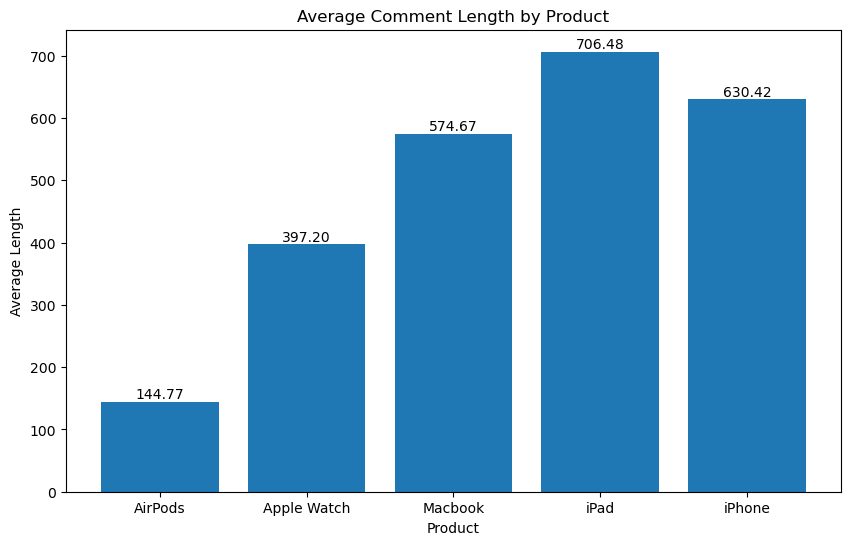

In [190]:
import matplotlib.pyplot as plt

average_lengths = df.groupby('Search')['Comment_Body'].apply(lambda x: x.str.len().mean()).reset_index()
average_lengths.rename(columns={'Comment_Body': 'Average_Length'}, inplace=True)

# Create a bigger bar chart,
plt.figure(figsize=(10, 6))

# Plot the bar chart
bar_plot = plt.bar(average_lengths['Search'], average_lengths['Average_Length'])

# Add text annotations with the average lengths on the bars
for i, value in enumerate(average_lengths['Average_Length']):
    plt.annotate(f'{value:.2f}', xy=(i, value), ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Average Length')
plt.title('Average Comment Length by Product')

plt.show()


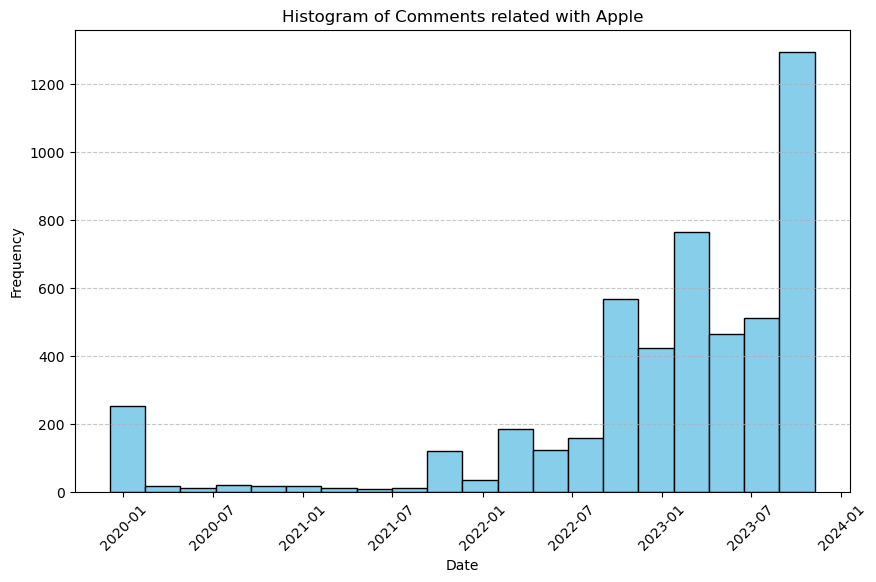

In [191]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()


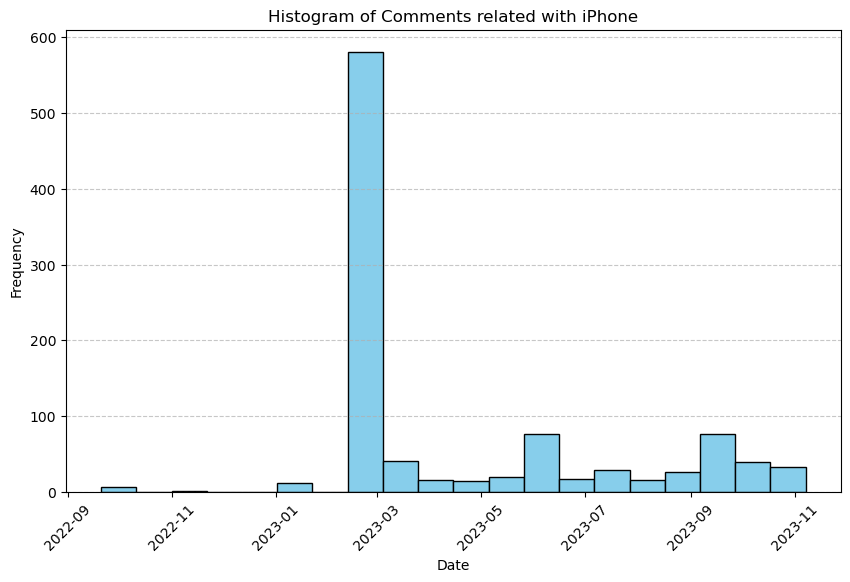

In [192]:
df_iphone = df[df['Search']=='iPhone']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_iphone['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPhone')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



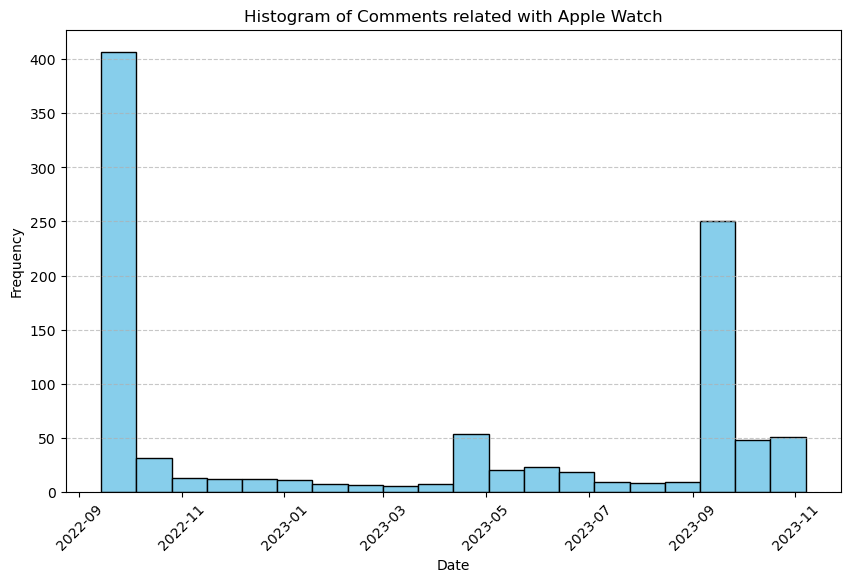

In [193]:
df_watch = df[df['Search']=='Apple Watch']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_watch['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple Watch')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



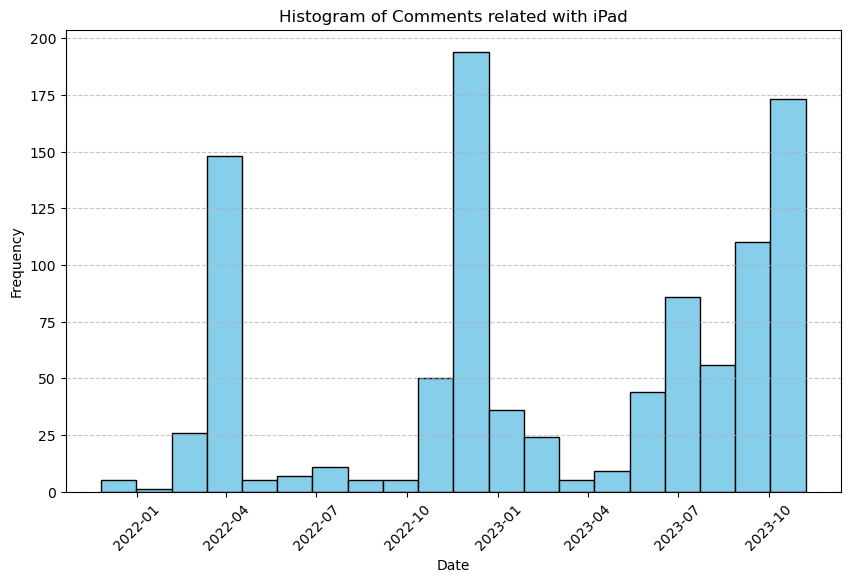

In [194]:
df_ipad = df[df['Search']=='iPad']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_ipad['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPad')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



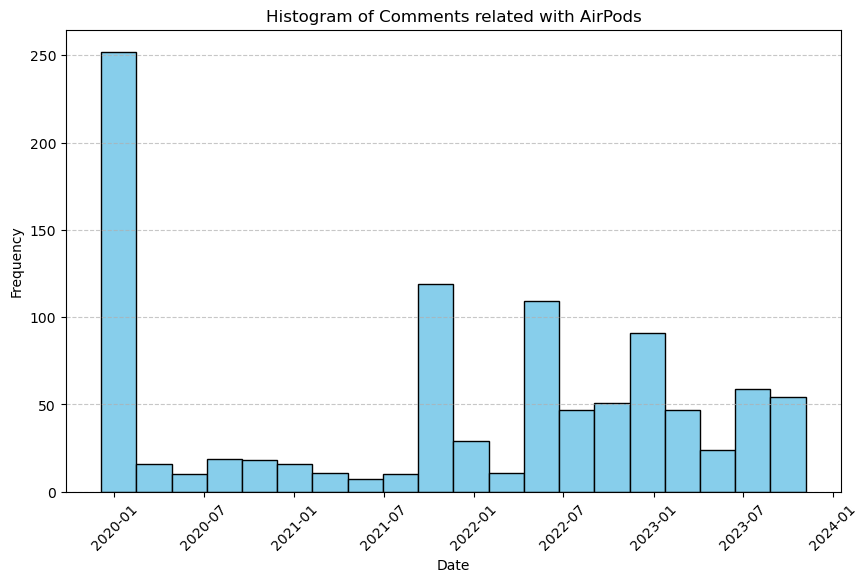

In [195]:
df_airpods = df[df['Search']=='AirPods']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_airpods['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with AirPods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



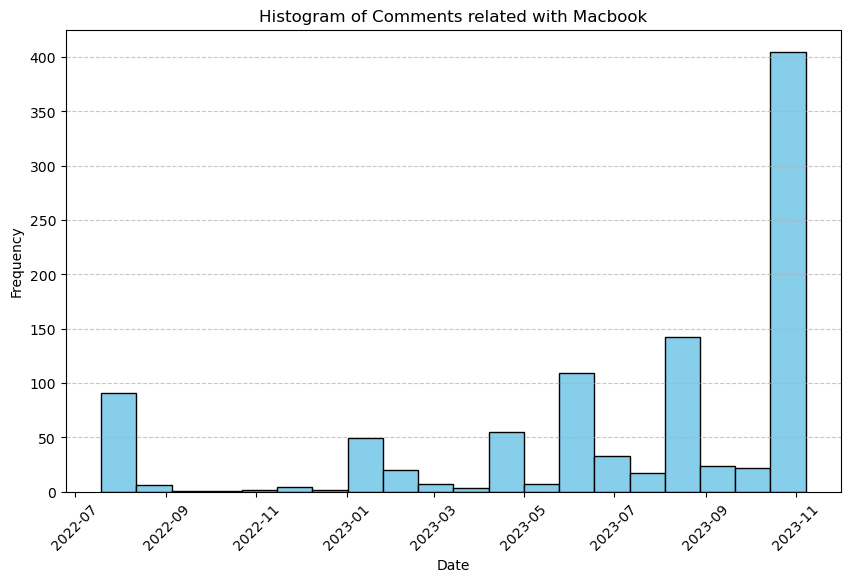

In [196]:
df_macbook = df[df['Search']=='Macbook']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_macbook['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Macbook')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



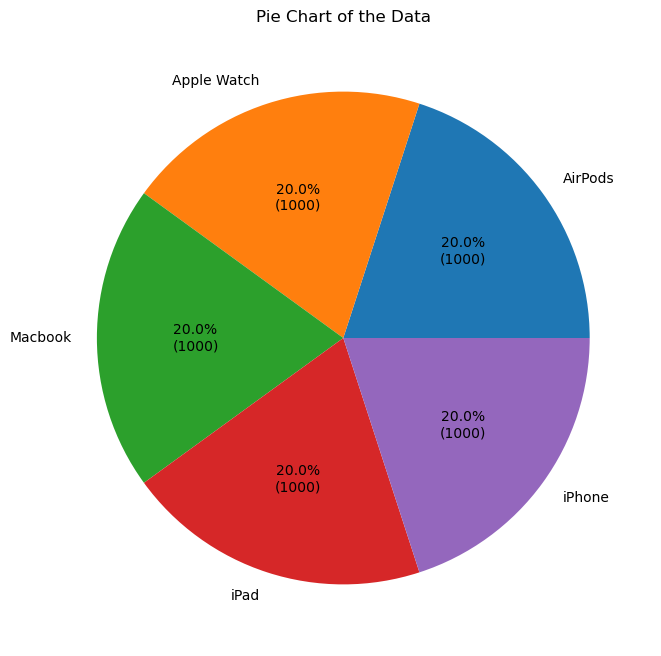

In [197]:
search_counts = df['Search'].value_counts()

# Function to format the text to be displayed on the pie chart
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(search_counts, labels=search_counts.index, autopct=lambda pct: func(pct, search_counts))

# To display both exact values and percentages, we use a custom lambda function in autopct
plt.title("Pie Chart of the Data")
plt.show()


In [199]:
df

Search                                       Comment_Body  \
0     AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1     AirPods  I really appreciate your in-depth knowledge re...   
2     AirPods  If you use multiple Apple products like iPhone...   
3     AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4     AirPods  i just confirmed the lossless feature with an ...   
...       ...                                                ...   
4995   iPhone  If someone likes Apple devices that's their ch...   
4996   iPhone  I'm going to buy an iphone this year to see ho...   
4997   iPhone  I made the jump to iphone last month. It's bee...   
4998   iPhone  Bro explaining the macroeconomics of Apple and...   
4999   iPhone  Can someone help me? \nI want a new Pro phone....   

                          Date  like_count  reply_count Language  
0    2023-01-07 23:59:54+00:00           0            4       en  
1    2023-03-05 03:01:36+00:00          17            0       en  
2    2019-12-29 00:35:17+00:00           0            0       en  
3    2023-01-31 14:06:31+00:00           2            3       en  
4    2023-10-13 13:40:42+00:00           3            2       en  
...                        ...         ...          ...      ...  
4995 2023-03-01 14:12:14+00:00           0            0       en  
4996 2023-03-04 23:19:10+00:00           0            0       en  
4997 2023-03-15 12:01:44+00:00           1            1       en  
4998 2023-03-11 12:25:42+00:00           0            0       en  
4999 2023-07-22 14:10:43+00:00           0            1       en  

[5000 rows x 6 columns]

In [200]:
sorted_df = df.sort_values(by='like_count', ascending=False)

top_5_comments_likes = sorted_df.head(5)
top_5_comments_likes

Search                                       Comment_Body  \
1399  Apple Watch  As a person that works in construction, and al...   
2828      Macbook  I'm curious if Apple would ever decide to crea...   
3423         iPad  Its so true with the pricing. I was interested...   
4379       iPhone  If anyone doesn’t know this story, when the fi...   
4563       iPhone  I think the only reason Apple is doing well is...   

                          Date  like_count  reply_count Language  
1399 2022-09-21 13:23:07+00:00        8521          144       en  
2828 2022-07-18 23:50:15+00:00        4827          186       en  
3423 2022-03-23 04:35:44+00:00        2670           62       en  
4379 2023-09-23 13:53:28+00:00        2398           51       en  
4563 2023-03-05 09:50:09+00:00        2127          107       en

In [201]:
for i, comment in enumerate(top_5_comments_likes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 As a person that works in construction, and also wears an Apple Watch every day while working I decided to upgrade from my series 5 to this. Will I ever use the marathon, the hiking or the diving features probably not. But the ruggedness, the battery life, the bright screen, and how big it is all speak to my needs. Keep up the good reviews MKBHD. 👍🏽
---------------------------------------------------------------------------------------------------------
1 I'm curious if Apple would ever decide to create a Macbook SE. Maybe keep the Macbook Air M1 design in principle but tweak it in a way that they could sell it for... I dunno $699 or less and have it start competing with Chromebooks and the like (or at least the peception of a super cheap, gateway product into Mac OS).
---------------------------------------------------------------------------------------------------------
2 Its so true with the pricing. I was interested in buying an ipad earlier this year and the most affordable one

In [202]:
sorted_df = df_iphone.sort_values(by='like_count', ascending=False)

top_5_comments_likes = sorted_df.head(5)
top_5_comments_likes

Search                                       Comment_Body  \
4379  iPhone  If anyone doesn’t know this story, when the fi...   
4563  iPhone  I think the only reason Apple is doing well is...   
4541  iPhone  It's extremely baffling how much of a grip App...   
4260  iPhone  I do miss the times when Android phone manufac...   
4602  iPhone  I have the 13 mini since June. After getting m...   

                          Date  like_count  reply_count Language  
4379 2023-09-23 13:53:28+00:00        2398           51       en  
4563 2023-03-05 09:50:09+00:00        2127          107       en  
4541 2023-02-26 00:39:36+00:00        1982          114       en  
4260 2023-03-01 07:06:34+00:00        1232           26       en  
4602 2023-01-08 14:29:17+00:00         756           55       en

In [203]:
for i, comment in enumerate(top_5_comments_likes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 If anyone doesn’t know this story, when the first iPhone released, a teenager camped out for the night to get the first spot in line. A woman wanted to buy all the iPhones in the store with $100,000 so she could resell them for more money. She paid the teenager $800 for his spot in line, but then found out that the limit was one iPhone per customer, which left the teenager to be able to buy the best iPhone 1 and all the accessories.
Edit: I’m not exactly sure if this was the iPhone 1 or a later model, so sorry if I mixed things up.
Edit 2: Thank y’all so much for the likes, appreciate it!
---------------------------------------------------------------------------------------------------------
1 I think the only reason Apple is doing well is due to Option Fatigue and Ecosystem advantages. At times people just need  less options. If someone wants a new phone, they have many options to choose from and that brings a lot of fear of misjudgement. But with Apple they just need to get the ne

In [204]:
sorted_df = df_watch.sort_values(by='like_count', ascending=False)

top_5_comments_likes = sorted_df.head(5)
top_5_comments_likes

Search                                       Comment_Body  \
1399  Apple Watch  As a person that works in construction, and al...   
1342  Apple Watch  The Apple Watch Ultra was meant to be advertis...   
1070  Apple Watch  The most compelling part, for me, is that it’s...   
1432  Apple Watch  Marques, I think you hit the nail on the head ...   
1961  Apple Watch  The Apple Watch Ultra has a very specific targ...   

                          Date  like_count  reply_count Language  
1399 2022-09-21 13:23:07+00:00        8521          144       en  
1342 2023-09-21 17:50:05+00:00        1418           45       en  
1070 2022-09-21 13:42:02+00:00         815           30       en  
1432 2022-09-23 02:28:32+00:00         381            7       en  
1961 2022-09-21 13:05:14+00:00         343           18       en

In [205]:
for i, comment in enumerate(top_5_comments_likes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 As a person that works in construction, and also wears an Apple Watch every day while working I decided to upgrade from my series 5 to this. Will I ever use the marathon, the hiking or the diving features probably not. But the ruggedness, the battery life, the bright screen, and how big it is all speak to my needs. Keep up the good reviews MKBHD. 👍🏽
---------------------------------------------------------------------------------------------------------
1 The Apple Watch Ultra was meant to be advertised towards fitness enthusiasts who were already using brands like Garmin. However, Garmin never updates their watches every year and those customers are used to that. The Apple Watch Ultra should get updates every 3 years in my opinion. We don't usually upgrade our Garmin unless there is a huge update since they are meant to last for years.
---------------------------------------------------------------------------------------------------------
2 The most compelling part, for me, is that

In [206]:
sorted_df = df_airpods.sort_values(by='like_count', ascending=False)

top_5_comments_likes = sorted_df.head(5)
top_5_comments_likes

Search                                       Comment_Body  \
715  AirPods  “Are you watching this with AirPods in? No? Da...   
906  AirPods  Don’t ask me why but I feel like just popping ...   
475  AirPods  let’s face it... if ur tryna buy fake airpods ...   
905  AirPods  Testing airpods by listening to Red Velvet wow...   
553  AirPods  As an AirPods owner, I can confirm this accura...   

                         Date  like_count  reply_count Language  
715 2022-12-18 01:58:34+00:00        2004           10       en  
906 2020-01-03 10:21:26+00:00        1077           37       en  
475 2019-12-28 05:56:22+00:00         779           41       en  
905 2020-01-20 12:41:38+00:00         711            6       en  
553 2022-12-15 23:08:36+00:00         681            2       en

In [207]:
for i, comment in enumerate(top_5_comments_likes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 “Are you watching this with AirPods in? No? Damn, you’re probably broke”

I mean, ok😂
---------------------------------------------------------------------------------------------------------
1 Don’t ask me why but I feel like just popping some AirPods in my mouth
---------------------------------------------------------------------------------------------------------
2 let’s face it... if ur tryna buy fake airpods you’re giving up all other wireless earbud options just to “flex”
---------------------------------------------------------------------------------------------------------
3 Testing airpods by listening to Red Velvet wow a man of culture indeed
---------------------------------------------------------------------------------------------------------
4 As an AirPods owner, I can confirm this accurate




*_Hey speaking of which, has anyone seen them?_*
---------------------------------------------------------------------------------------------------------


In [208]:
sorted_df = df_ipad.sort_values(by='like_count', ascending=False)

top_5_comments_likes = sorted_df.head(5)
top_5_comments_likes

Search                                       Comment_Body  \
3423   iPad  Its so true with the pricing. I was interested...   
3444   iPad  Musician here - Most of my colleagues, myself ...   
3531   iPad  I had the normal ipad 2020 and as an artist I ...   
3656   iPad  The last iPad I bought was the original iPad P...   
3622   iPad  Great review! The new iPad Air definitely caug...   

                          Date  like_count  reply_count Language  
3423 2022-03-23 04:35:44+00:00        2670           62       en  
3444 2023-02-01 00:17:50+00:00         768           22       en  
3531 2022-11-19 09:08:43+00:00         531           23       en  
3656 2022-11-19 16:01:37+00:00         416           23       en  
3622 2022-03-18 14:14:28+00:00         387           21       en

In [209]:
for i, comment in enumerate(top_5_comments_likes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 Its so true with the pricing. I was interested in buying an ipad earlier this year and the most affordable one that could cater my needs was the 2020 ipad air with A14. But it had only 64 gb storage. So I had to pay an extra amount for the 256 gb one which is the only other option. But with a very slightly more amount I could get an ipad pro with M1 chip and 128 gb storage. I was very convinced for that product but then I realised that in no time I had gone way too over my budget so I decided to wait for the new ipad air launch so that the old one gets cheaper. But now I am more confused.
---------------------------------------------------------------------------------------------------------
1 Musician here - Most of my colleagues, myself included, own a 12.9 iPad pro for reading music, instead of paper sheet music.  We exclusively use iPads instead of other tablets because the software we use, called ForeScore, is apple exclusive, and the 12.9" because it has to be big enough to re

In [210]:
sorted_df = df_macbook.sort_values(by='like_count', ascending=False)

top_5_comments_likes = sorted_df.head(5)
top_5_comments_likes

Search                                       Comment_Body  \
2828  Macbook  I'm curious if Apple would ever decide to crea...   
2651  Macbook  As a life time Windows and Linux user, buying ...   
2578  Macbook  My jaw dropped when I saw that text at the end...   
2440  Macbook  This M2 mac really proves how awesome M1 reall...   
2325  Macbook  I’m a Data Engineer as well as a hobbyist musi...   

                          Date  like_count  reply_count Language  
2828 2022-07-18 23:50:15+00:00        4827          186       en  
2651 2023-04-23 02:02:18+00:00         893           30       en  
2578 2023-10-31 03:05:19+00:00         733           19       en  
2440 2022-07-18 23:36:48+00:00         673           46       en  
2325 2022-08-15 23:59:53+00:00         608           30       en

In [211]:
for i, comment in enumerate(top_5_comments_likes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 I'm curious if Apple would ever decide to create a Macbook SE. Maybe keep the Macbook Air M1 design in principle but tweak it in a way that they could sell it for... I dunno $699 or less and have it start competing with Chromebooks and the like (or at least the peception of a super cheap, gateway product into Mac OS).
---------------------------------------------------------------------------------------------------------
1 As a life time Windows and Linux user, buying a MacBook pro with M2 Max earlier this year was quite an experience. The performance is amazing and I've found that it's become my daily driver instead than firing up my noisy and heat generating i9 13900k gaming rig to use it for work and non-gaming related tasks. I'm quite impressed on where Apple has taken their laptops today.
---------------------------------------------------------------------------------------------------------
2 My jaw dropped when I saw that text at the end. That to me was the most impressive o

**7.Apply Contractions to fix the comments**

In [212]:
import contractions
df['Fixed_Comment'] = df['Comment_Body'].apply(contractions.fix)
df[df['Fixed_Comment'] != df['Comment_Body']][8:]

Search                                       Comment_Body  \
10    AirPods  One big thing, is to make sure its setup as Ai...   
11    AirPods  Incredibly helpful - thanks!  One think that I...   
13    AirPods  Here is one cool feature without much use but ...   
15    AirPods  I bought the airpods 2nd gen , but before I di...   
16    AirPods  Being able to use the phones mic instead of th...   
...       ...                                                ...   
4995   iPhone  If someone likes Apple devices that's their ch...   
4996   iPhone  I'm going to buy an iphone this year to see ho...   
4997   iPhone  I made the jump to iphone last month. It's bee...   
4998   iPhone  Bro explaining the macroeconomics of Apple and...   
4999   iPhone  Can someone help me? \nI want a new Pro phone....   

                          Date  like_count  reply_count Language  \
10   2023-01-14 22:49:48+00:00           0            1       en   
11   2020-09-11 13:33:56+00:00           4            0       en   
13   2022-12-01 08:37:06+00:00          81            3       en   
15   2020-07-27 09:49:50+00:00           3            0       en   
16   2022-12-21 15:01:29+00:00           1            0       en   
...                        ...         ...          ...      ...   
4995 2023-03-01 14:12:14+00:00           0            0       en   
4996 2023-03-04 23:19:10+00:00           0            0       en   
4997 2023-03-15 12:01:44+00:00           1            1       en   
4998 2023-03-11 12:25:42+00:00           0            0       en   
4999 2023-07-22 14:10:43+00:00           0            1       en   

                                          Fixed_Comment  
10    One big thing, is to make sure its setup as Ai...  
11    Incredibly helpful - thanks!  One think that I...  
13    Here is one cool feature without much use but ...  
15    I bought the airpods 2nd gen , but before I di...  
16    Being able to use the phones mic instead of th...  
...                                                 ...  
4995  If someone likes Apple devices that is their c...  
4996  I am going to buy an iphone this year to see h...  
4997  I made the jump to iphone last month. It is be...  
4998  Bro explaining the macroeconomics of Apple and...  
4999  Can someone help me? \nI want a new Pro phone....  

[3714 rows x 7 columns]

**8. Patterns Substitution**

In [213]:
import re

price_pattern = r'\$\d+(\.\d{2})?'   # Matches prices in the format $X.XX or $X
size_pattern = r'\b\d+(?:\.\d+)?(?:x\d+(?:\.\d+)?)?\b'   # Matches sizes like 10x10 or 2.5x3.2
volume_pattern = r'\b\d+(?:\.\d+)?\s*[Ll]\b'   # Matches volumes like 1L or 0.5 l
weight_pattern = r'\b\d+(?:\.\d+)?\s*[Kk][Gg]\b'   # Matches weights like 2.5 kg or 10.2 Kg

def substitute_patterns(text):
    text = re.sub(price_pattern, '[PRICE]', text)
    text = re.sub(size_pattern, '[SIZE]', text)
    text = re.sub(volume_pattern, '[VOLUME]', text)
    text = re.sub(weight_pattern, '[WEIGHT]', text)
    return text

df['Substituted_Comment'] = df['Fixed_Comment'].apply(substitute_patterns)
df[df['Substituted_Comment'] != df['Fixed_Comment']][['Comment_Body','Substituted_Comment']][1:]

Comment_Body  \
3     Just got AirPods Pro 2 - using on an iPhone an...   
4     i just confirmed the lossless feature with an ...   
5     Undoubtedly the best AirPods Pro tips and tric...   
6     I have very good fake AirPods Pro. They have t...   
8     I have had these for about a month, and have h...   
...                                                 ...   
4994  As an Apple fan I’m getting this phone Jonatha...   
4995  If someone likes Apple devices that's their ch...   
4997  I made the jump to iphone last month. It's bee...   
4998  Bro explaining the macroeconomics of Apple and...   
4999  Can someone help me? \nI want a new Pro phone....   

                                    Substituted_Comment  
3     Just got AirPods Pro [SIZE] - using on an iPho...  
4     i just confirmed the lossless feature with an ...  
5     Undoubtedly the best AirPods Pro tips and tric...  
6     I have very good fake AirPods Pro. They have t...  
8     I have had these for about a month, and have h...  
...                                                 ...  
4994  As an Apple fan I am getting this phone Jonath...  
4995  If someone likes Apple devices that is their c...  
4997  I made the jump to iphone last month. It is be...  
4998  Bro explaining the macroeconomics of Apple and...  
4999  Can someone help me? \nI want a new Pro phone....  

[3049 rows x 2 columns]

**9. Http links replacement**

In [215]:
link_pattern = r'https?://\S+'

def substitute_links(text):
    return re.sub(link_pattern, '[LINK]', text)

df['Replaced_Comment'] = df['Substituted_Comment'].apply(substitute_links)
df[df['Substituted_Comment'] != df['Replaced_Comment']][['Comment_Body','Replaced_Comment']]

Comment_Body  \
304   Hey Everybody! Check out the New Updated AirPo...   
462   Original I7s TWS Apple Airpods Wireless Blueto...   
1578  If you want to buy an Apple Watch Ultra 2, con...   
1594  GET SPEAKLY 👉 https://speakly.app.link/mikeobr...   
1635  Have any Apple Watch settings that we didn't m...   
1663  If you found this video helpful, consider buyi...   
1897  If you found this video helpful, consider usin...   
1936  Check out Juuk's Premium Apple Watch bands ➡ h...   
2071  Love the channel. One slight correction - the ...   
2255  ✅ Get your Nreal Air AR Smart Glasses Today!: ...   
2645  👉 Best Deals on MacBooks: https://deals.justjo...   
3280  ✅ GET your 360 All-Round protection for your i...   
3326  I could say everything about this iPad that ma...   
3346  THIS is the iPad to buy in 2022 ➡ https://geni...   
3675  The iPad works amazingly the box came a little...   
4653  The reason as to why the back glass broke is b...   

                                       Replaced_Comment  
304   Hey Everybody! Check out the New Updated AirPo...  
462   Original I7s TWS Apple Airpods Wireless Blueto...  
1578  If you want to buy an Apple Watch Ultra [SIZE]...  
1594  GET SPEAKLY 👉 [LINK] (#ad)\n*To unlock the ful...  
1635  Have any Apple Watch settings that we did not ...  
1663  If you found this video helpful, consider buyi...  
1897  If you found this video helpful, consider usin...  
1936  Check out Juuk's Premium Apple Watch bands ➡ [...  
2071  Love the channel. One slight correction - the ...  
2255  ✅ Get your Nreal Air AR Smart Glasses Today!: ...  
2645  👉 Best Deals on MacBooks: [LINK]\n\n👇 MacBook ...  
3280  ✅ GET your [SIZE] All-Round protection for you...  
3326  I could say everything about this iPad that ma...  
3346  THIS is the iPad to buy in [SIZE] ➡ [LINK]\nLi...  
3675  The iPad works amazingly the box came a little...  
4653  The reason as to why the back glass broke is b...

In [216]:
df = df[df["Replaced_Comment"]!="[[LINK]"]
df = df[df["Replaced_Comment"]!="[LINK]"]
df = df[df["Replaced_Comment"]!="&#x200B;\n\n[LINK]"]
df.Search.value_counts()


AirPods        1000
Apple Watch    1000
Macbook        1000
iPad           1000
iPhone         1000
Name: Search, dtype: int64

**10. Remove Line Breaks**

In [217]:
def remove_line_breaks(text):
    return text.replace('\n', ' ')

df['Without_LineBreaks'] = df['Replaced_Comment'].apply(remove_line_breaks)

df[df['Replaced_Comment'] != df['Without_LineBreaks']][['Comment_Body','Without_LineBreaks']]


Comment_Body  \
0     I bought a fake 2nd gen airpod last week.. loo...   
2     If you use multiple Apple products like iPhone...   
3     Just got AirPods Pro 2 - using on an iPhone an...   
4     i just confirmed the lossless feature with an ...   
5     Undoubtedly the best AirPods Pro tips and tric...   
...                                                 ...   
4961  The filesystem is needlessly dumbed down. I ha...   
4975  So that’s why they released the same model all...   
4976  Here’s a dumb idea for the iPhone 16 ig:\nEmer...   
4998  Bro explaining the macroeconomics of Apple and...   
4999  Can someone help me? \nI want a new Pro phone....   

                                     Without_LineBreaks  
0     I bought a fake 2nd gen airpod last week.. loo...  
2     If you use multiple Apple products like iPhone...  
3     Just got AirPods Pro [SIZE] - using on an iPho...  
4     i just confirmed the lossless feature with an ...  
5     Undoubtedly the best AirPods Pro tips and tric...  
...                                                 ...  
4961  The filesystem is needlessly dumbed down. I ha...  
4975  So that is why they released the same model al...  
4976  Here is a dumb idea for the iPhone [SIZE] ig: ...  
4998  Bro explaining the macroeconomics of Apple and...  
4999  Can someone help me?  I want a new Pro phone. ...  

[1552 rows x 2 columns]

**12. Apply TextBlob to correct comments**

In [218]:
from textblob import TextBlob

def correct_comment(comment):
    blob = TextBlob(comment)
    corrected_comment = blob.correct()
    return str(corrected_comment)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body','Corrected_Comment(SentimentAnalysis)']][2:12]


Comment_Body  \
2   If you use multiple Apple products like iPhone...   
3   Just got AirPods Pro 2 - using on an iPhone an...   
4   i just confirmed the lossless feature with an ...   
5   Undoubtedly the best AirPods Pro tips and tric...   
6   I have very good fake AirPods Pro. They have t...   
7   Hello 👋🏻 guys, yesterday my Left AirPod 1gen j...   
8   I have had these for about a month, and have h...   
9   This is incredibly weak stuff. The headline ha...   
10  One big thing, is to make sure its setup as Ai...   
11  Incredibly helpful - thanks!  One think that I...   

                 Corrected_Comment(SentimentAnalysis)  
2   Of you use multiple Apple products like shone,...  
3   Must got AirPods Fro [SIZE] - using on an shon...  
4   i just confirmed the losses feature with an ap...  
5   Undoubtedly the best AirPods Fro tips and tric...  
6   I have very good face AirPods Fro. They have t...  
7   Hello 👋🏻 guns, yesterday my Left AirPod gen ju...  
8   I have had these for about a month, and have h...  
9   His is incredibly weak stuff. The headline has...  
10  One big thing, is to make sure its set as Airp...  
11  Incredibly helpful - thanks!  One think that I...

In [229]:
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body','Corrected_Comment(SentimentAnalysis)']][90:100]


Comment_Body  \
91   I bought clones last month and so far no regre...   
92   Using 500rs airpods from 5 months. No issue ti...   
93   Do you know why some BT earphones dont have li...   
94   "The screen is black. Which means you can see ...   
95   Amazing tips. It’s my first time using AirPods...   
96   I got my skullcandy sesh earbuds for $50, they...   
97   .. The Baby Yoda one’s cool and all, but I don...   
98   I really enjoy these airpods! They have great ...   
99   I was this close to ordering from black pods c...   
101  Is there a certain way to wear the AirPods Pro...   

                  Corrected_Comment(SentimentAnalysis)  
91   I bought closes last month and so far no regre...  
92   Using 500rs airport from [SIZE] months. To iss...  
93   To you know why some of earphones do not have ...  
94   "The screen is black. Which means you can see ...  
95   Amazing tips. It is my first time using AirPod...  
96   I got my skullcandy sash earbuds for [PRICE], ...  
97   .. The Baby Soda one’s cool and all, but I do ...  
98   I really enjoy these airport! They have great ...  
99   I was this close to ordering from black pads b...  
101  Is there a certain way to wear the AirPods Fro...

In [230]:
words_to_keep = ['Apple', 'iPhone', 'Macbook', 'AirPods', 'iPad', 'Watch', 'My', 'tech', 'stats', 'She', 'kids',
                 'Shot', 'Powered', 'Max', 'giga', 'omega', 'gamma', 'sigma', 'If', 'Just', 'lossless', 'Pro', 
                 'This', 'Hey', 'Here', 'airpods', 'mic', 'audio', 'Pros', 'airpod', 'Max', 'Hi', 'fake', 'probuds', 
                 'mum', 'My', 'Cool', 'Bro', 'So', 'No', 'Do', 'Yoda', 'pods']
lowercase_words_to_keep = {word.lower() for word in words_to_keep}  # Convert words to lowercase for comparison

def correct_comment(row):
    preserved_punctuations = set(['.', ',', '!', '?', ':', ';'])
    words = re.findall(r'\w+|[^\w\s]', row)

    # Check against the lowercase version of the words
    processed_words = [word if word.lower() in lowercase_words_to_keep or word in preserved_punctuations else str(TextBlob(word).correct()) for word in words]

    return ' '.join(processed_words)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body', 'Corrected_Comment(SentimentAnalysis)']][323:]

Comment_Body  \
326   Had to return my AirPods Pro back in 2019 caus...   
327   Just saying there is no point of getting fake ...   
328   what's better than cleaning your airpods and t...   
329   "So number 8 is the PokeBall"\n"Its actually s...   
330   20$ for DHgate apple AirPods bass is good soun...   
...                                                 ...   
4995  If someone likes Apple devices that's their ch...   
4996  I'm going to buy an iphone this year to see ho...   
4997  I made the jump to iphone last month. It's bee...   
4998  Bro explaining the macroeconomics of Apple and...   
4999  Can someone help me? \nI want a new Pro phone....   

                   Corrected_Comment(SentimentAnalysis)  
326   Had to return my AirPods Pro back in [ SIZE ] ...  
327   Just saying there is no point of getting fake ...  
328   what is better than cleaning your airpods and ...  
329   " So number [ SIZE ] is the PokeBall " " Its a...  
330   [ SIZE ] $ for gate apple AirPods bass is good...  
...                                                 ...  
4995  If someone likes Apple devices that is their c...  
4996  I am going to buy an iphone this year to see h...  
4997  I made the jump to iphone last month . It is b...  
4998  Bro explaining the macroeconomics of Apple and...  
4999  An someone help me ? I want a new Pro phone . ...  

[4593 rows x 2 columns]

**12.Add a common case stage**

In [231]:
df['Lower_Comment'] = df['Corrected_Comment(SentimentAnalysis)'].str.lower()
df[['Comment_Body', 'Lower_Comment']]


Comment_Body  \
0     I bought a fake 2nd gen airpod last week.. loo...   
1     I really appreciate your in-depth knowledge re...   
2     If you use multiple Apple products like iPhone...   
3     Just got AirPods Pro 2 - using on an iPhone an...   
4     i just confirmed the lossless feature with an ...   
...                                                 ...   
4995  If someone likes Apple devices that's their ch...   
4996  I'm going to buy an iphone this year to see ho...   
4997  I made the jump to iphone last month. It's bee...   
4998  Bro explaining the macroeconomics of Apple and...   
4999  Can someone help me? \nI want a new Pro phone....   

                                          Lower_Comment  
0     i bought a fake and gen airpod last week . . l...  
1     i really appreciate your in - depth knowledge ...  
2     if you use multiple apple products like iphone...  
3     just got airpods pro [ size ] - using on an ip...  
4     i just confirmed the lossless feature with an ...  
...                                                 ...  
4995  if someone likes apple devices that is their c...  
4996  i am going to buy an iphone this year to see h...  
4997  i made the jump to iphone last month . it is b...  
4998  bro explaining the macroeconomics of apple and...  
4999  an someone help me ? i want a new pro phone . ...  

[5000 rows x 2 columns]

**13. Tokenization**

In [232]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    sentences = sent_tokenize(text)   # Tokenize into sentences
    words = [word_tokenize(sentence) for sentence in sentences]   # Tokenize each sentence into words
    return ' '.join([' '.join(sentence) for sentence in words]) 

df['Tokenized_Comment'] = df['Lower_Comment'].apply(tokenize_text)
df[df['Tokenized_Comment'] != df['Lower_Comment']][['Lower_Comment', 'Tokenized_Comment']]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Lower_Comment  \
0     i bought a fake and gen airpod last week . . l...   
2     if you use multiple apple products like iphone...   
3     just got airpods pro [ size ] - using on an ip...   
5     undoubtedly the best airpods pro tips and tric...   
9     this is incredibly weak stuff . the headline h...   
...                                                 ...   
4958  the network effect is exactly the reason i do ...   
4961  the filesystem is needlessly dumped down . i h...   
4968  i will get by with my iphone [ size ] . if i w...   
4970  apple cannot do anything about this fail witho...   
4981  i chose the iphone [ size ] because i have bee...   

                                      Tokenized_Comment  
0     i bought a fake and gen airpod last week . . l...  
2     if you use multiple apple products like iphone...  
3     just got airpods pro [ size ] - using on an ip...  
5     undoubtedly the best airpods pro tips and tric...  
9     this is incredibly weak stuff . the headline h...  
...                                                 ...  
4958  the network effect is exactly the reason i do ...  
4961  the filesystem is needlessly dumped down . i h...  
4968  i will get by with my iphone [ size ] . if i w...  
4970  apple can not do anything about this fail with...  
4981  i chose the iphone [ size ] because i have bee...  

[1049 rows x 2 columns]

**14. Remove the stopwords**

In [233]:
from nltk.corpus import stopwords

def remove_stopwords_except_not(text):
    stop_words = set(stopwords.words('english'))
    stop_words.remove("not")
    words = text.split()  # Split the space-separated string into a list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)  # Convert the list of words back to a space-separated string

# Apply the remove_stopwords function to the "Tokenized_Comment" column
df['Without_Stopwords'] = df['Tokenized_Comment'].apply(remove_stopwords_except_not)
df[df['Tokenized_Comment'] != df['Without_Stopwords']][['Tokenized_Comment', 'Without_Stopwords']]


Tokenized_Comment  \
0     i bought a fake and gen airpod last week . . l...   
1     i really appreciate your in - depth knowledge ...   
2     if you use multiple apple products like iphone...   
3     just got airpods pro [ size ] - using on an ip...   
4     i just confirmed the lossless feature with an ...   
...                                                 ...   
4995  if someone likes apple devices that is their c...   
4996  i am going to buy an iphone this year to see h...   
4997  i made the jump to iphone last month . it is b...   
4998  bro explaining the macroeconomics of apple and...   
4999  an someone help me ? i want a new pro phone . ...   

                                      Without_Stopwords  
0     bought fake gen airpod last week . . lookwise ...  
1     really appreciate - depth knowledge regarding ...  
2     use multiple apple products like iphone , ipad...  
3     got airpods pro [ size ] - using iphone andros...  
4     confirmed lossless feature apple executive app...  
...                                                 ...  
4995  someone likes apple devices choice , not convi...  
4996  going buy iphone year see reforms feels , sinc...  
4997  made jump iphone last month . rocky road samsu...  
4998  bro explaining macroeconomics apple additional...  
4999  someone help ? want new pro phone . either wai...  

[4999 rows x 2 columns]

**15. Remove emojis, punctations**

In [234]:
import string

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+")
    return emoji_pattern.sub(r'', text)

def remove_punctuation_and_quotes(text):
    # Combine the punctuation string with the double quote character
    custom_punctuation = string.punctuation + '"' + "“"
    return text.translate(str.maketrans('', '', custom_punctuation))

# Apply the functions to the "Without_Stopwords" column
df['Prepared_Comment'] = df['Without_Stopwords'].apply(remove_emojis)
df['Prepared_Comment'] = df['Prepared_Comment'].apply(remove_punctuation_and_quotes)

df[df['Prepared_Comment'] != df['Without_Stopwords']][['Comment_Body', 'Prepared_Comment']][1240:]

Comment_Body  \
1403  I'm sorry but for a $800 watch that battery is...   
1404  Apple is so full of themselves it’s starting t...   
1405  I would like you to know hat you find with the...   
1406  @shnnllbs\n\nI've been using my Apple Watch Se...   
1407  I left my Apple Watch 6 in a hotel room. Saw i...   
...                                                 ...   
4995  If someone likes Apple devices that's their ch...   
4996  I'm going to buy an iphone this year to see ho...   
4997  I made the jump to iphone last month. It's bee...   
4998  Bro explaining the macroeconomics of Apple and...   
4999  Can someone help me? \nI want a new Pro phone....   

                                       Prepared_Comment  
1403  sorry  price  watch battery horrible  huawei g...  
1404  apple full starting annoy actually  usually up...  
1405  would like know hat find apple watch  size  ba...  
1406   shnnllbs using apple watch series  size  mont...  
1407  left apple watch  size  hotel room  saw mind  ...  
...                                                 ...  
4995  someone likes apple devices choice  not convin...  
4996  going buy iphone year see reforms feels  since...  
4997  made jump iphone last month  rocky road samsun...  
4998  bro explaining macroeconomics apple additional...  
4999  someone help  want new pro phone  either wait ...  

[3581 rows x 2 columns]

**16. Apply lemmatisation**

In [235]:
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

df['Lemmatized_Comment'] = df['Prepared_Comment'].apply(preprocess_text)
df[df['Lemmatized_Comment'] != df['Prepared_Comment']][['Prepared_Comment', 'Lemmatized_Comment']][:]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Prepared_Comment  \
0     bought fake gen airpod last week   lookwise ye...   
1     really appreciate  depth knowledge regarding a...   
2     use multiple apple products like iphone  ipad ...   
3     got airpods pro  size   using iphone andros ph...   
4     confirmed lossless feature apple executive app...   
...                                                 ...   
4995  someone likes apple devices choice  not convin...   
4996  going buy iphone year see reforms feels  since...   
4997  made jump iphone last month  rocky road samsun...   
4998  bro explaining macroeconomics apple additional...   
4999  someone help  want new pro phone  either wait ...   

                                     Lemmatized_Comment  
0     bought fake gen airpod last week lookwise yes ...  
1     really appreciate depth knowledge regarding ai...  
2     use multiple apple product like iphone ipad ma...  
3     got airpods pro size using iphone andros phone...  
4     confirmed lossless feature apple executive app...  
...                                                 ...  
4995  someone like apple device choice convinced eve...  
4996  going buy iphone year see reform feel since ne...  
4997  made jump iphone last month rocky road samsung...  
4998  bro explaining macroeconomics apple additional...  
4999  someone help want new pro phone either wait ip...  

[4936 rows x 2 columns]

**17. Remove the unnecessary columns**

In [236]:
df = df[['Search', 'Comment_Body', 'Lemmatized_Comment', 'Corrected_Comment(SentimentAnalysis)']]
df


Search                                       Comment_Body  \
0     AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1     AirPods  I really appreciate your in-depth knowledge re...   
2     AirPods  If you use multiple Apple products like iPhone...   
3     AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4     AirPods  i just confirmed the lossless feature with an ...   
...       ...                                                ...   
4995   iPhone  If someone likes Apple devices that's their ch...   
4996   iPhone  I'm going to buy an iphone this year to see ho...   
4997   iPhone  I made the jump to iphone last month. It's bee...   
4998   iPhone  Bro explaining the macroeconomics of Apple and...   
4999   iPhone  Can someone help me? \nI want a new Pro phone....   

                                     Lemmatized_Comment  \
0     bought fake gen airpod last week lookwise yes ...   
1     really appreciate depth knowledge regarding ai...   
2     use multiple apple product like iphone ipad ma...   
3     got airpods pro size using iphone andros phone...   
4     confirmed lossless feature apple executive app...   
...                                                 ...   
4995  someone like apple device choice convinced eve...   
4996  going buy iphone year see reform feel since ne...   
4997  made jump iphone last month rocky road samsung...   
4998  bro explaining macroeconomics apple additional...   
4999  someone help want new pro phone either wait ip...   

                   Corrected_Comment(SentimentAnalysis)  
0     I bought a fake and gen airpod last week . . l...  
1     I really appreciate your in - depth knowledge ...  
2     If you use multiple Apple products like iPhone...  
3     Just got AirPods Pro [ SIZE ] - using on an iP...  
4     i just confirmed the lossless feature with an ...  
...                                                 ...  
4995  If someone likes Apple devices that is their c...  
4996  I am going to buy an iphone this year to see h...  
4997  I made the jump to iphone last month . It is b...  
4998  Bro explaining the macroeconomics of Apple and...  
4999  An someone help me ? I want a new Pro phone . ...  

[5000 rows x 4 columns]

**18. Rename the columns**

In [237]:
df.rename(columns={'Comment_Body': 'Comment', 'Lemmatized_Comment': 'Cleaned_Comment',
                   'Corrected_Comment(SentimentAnalysis)': 'Sentiment_Comment'}, inplace=True)
df

Search                                            Comment  \
0     AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1     AirPods  I really appreciate your in-depth knowledge re...   
2     AirPods  If you use multiple Apple products like iPhone...   
3     AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4     AirPods  i just confirmed the lossless feature with an ...   
...       ...                                                ...   
4995   iPhone  If someone likes Apple devices that's their ch...   
4996   iPhone  I'm going to buy an iphone this year to see ho...   
4997   iPhone  I made the jump to iphone last month. It's bee...   
4998   iPhone  Bro explaining the macroeconomics of Apple and...   
4999   iPhone  Can someone help me? \nI want a new Pro phone....   

                                        Cleaned_Comment  \
0     bought fake gen airpod last week lookwise yes ...   
1     really appreciate depth knowledge regarding ai...   
2     use multiple apple product like iphone ipad ma...   
3     got airpods pro size using iphone andros phone...   
4     confirmed lossless feature apple executive app...   
...                                                 ...   
4995  someone like apple device choice convinced eve...   
4996  going buy iphone year see reform feel since ne...   
4997  made jump iphone last month rocky road samsung...   
4998  bro explaining macroeconomics apple additional...   
4999  someone help want new pro phone either wait ip...   

                                      Sentiment_Comment  
0     I bought a fake and gen airpod last week . . l...  
1     I really appreciate your in - depth knowledge ...  
2     If you use multiple Apple products like iPhone...  
3     Just got AirPods Pro [ SIZE ] - using on an iP...  
4     i just confirmed the lossless feature with an ...  
...                                                 ...  
4995  If someone likes Apple devices that is their c...  
4996  I am going to buy an iphone this year to see h...  
4997  I made the jump to iphone last month . It is b...  
4998  Bro explaining the macroeconomics of Apple and...  
4999  An someone help me ? I want a new Pro phone . ...  

[5000 rows x 4 columns]

**19. Check the na rows**

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Search             5000 non-null   object
 1   Comment            5000 non-null   object
 2   Cleaned_Comment    5000 non-null   object
 3   Sentiment_Comment  5000 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


**20. Calculate the length**

In [239]:
df['Length'] = df['Comment'].apply(len)
df

Search                                            Comment  \
0     AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1     AirPods  I really appreciate your in-depth knowledge re...   
2     AirPods  If you use multiple Apple products like iPhone...   
3     AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4     AirPods  i just confirmed the lossless feature with an ...   
...       ...                                                ...   
4995   iPhone  If someone likes Apple devices that's their ch...   
4996   iPhone  I'm going to buy an iphone this year to see ho...   
4997   iPhone  I made the jump to iphone last month. It's bee...   
4998   iPhone  Bro explaining the macroeconomics of Apple and...   
4999   iPhone  Can someone help me? \nI want a new Pro phone....   

                                        Cleaned_Comment  \
0     bought fake gen airpod last week lookwise yes ...   
1     really appreciate depth knowledge regarding ai...   
2     use multiple apple product like iphone ipad ma...   
3     got airpods pro size using iphone andros phone...   
4     confirmed lossless feature apple executive app...   
...                                                 ...   
4995  someone like apple device choice convinced eve...   
4996  going buy iphone year see reform feel since ne...   
4997  made jump iphone last month rocky road samsung...   
4998  bro explaining macroeconomics apple additional...   
4999  someone help want new pro phone either wait ip...   

                                      Sentiment_Comment  Length  
0     I bought a fake and gen airpod last week . . l...    1232  
1     I really appreciate your in - depth knowledge ...     908  
2     If you use multiple Apple products like iPhone...     886  
3     Just got AirPods Pro [ SIZE ] - using on an iP...     861  
4     i just confirmed the lossless feature with an ...     809  
...                                                 ...     ...  
4995  If someone likes Apple devices that is their c...     367  
4996  I am going to buy an iphone this year to see h...     367  
4997  I made the jump to iphone last month . It is b...     367  
4998  Bro explaining the macroeconomics of Apple and...     366  
4999  An someone help me ? I want a new Pro phone . ...     366  

[5000 rows x 5 columns]

In [240]:
df_ipad = df[df['Search']=='iPad']
df_iphone = df[df['Search']=='iPhone']
df_watch = df[df['Search']=='Apple Watch']
df_airpods = df[df['Search']=='AirPods']
df_mac = df[df['Search']=='Macbook']

In [241]:
df.Length.describe()

count    5000.00000
mean      490.70920
std       404.91419
min        66.00000
25%       241.00000
50%       423.00000
75%       598.00000
max      7521.00000
Name: Length, dtype: float64

In [242]:
df.Length.mode()

0    66
Name: Length, dtype: int64

In [243]:
df.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
2000  Macbook  Years ago we did a test, in 2007 - a Dell lapt...   
3000     iPad  His mom: Earth is the third planet from the Su...   
3001     iPad  iPad (TCS4) Lyrics\r\n[Verse 1]\r\nI go throug...   
3002     iPad  Nobody needs damn extra keyboards and pencils ...   
2001  Macbook  I always enjoy your videos regarding Apple pro...   
2002  Macbook  Apple should've done three things:\n\n1. Make ...   
3003     iPad  I've gone through such a rollercoaster with th...   
2003  Macbook  Excellent presentation. I used both. My first ...   
2004  Macbook  The problem comes down to software. The M1 Mac...   
4000   iPhone  I was an android user for years, I even worked...   

                                        Cleaned_Comment  \
2000  year ago test size well lawton loading current...   
3000  mon earth third planet run place known univers...   
3001  ipad tcs4 serics verse size go ipad looking so...   
3002  nobody need damn extra keyboard pencil sure pe...   
2001  always enjoy video regarding apple product non...   
2002  apple done three thing size take size watt cha...   
3003  gone rollercoaster original intention get ipho...   
2003  excellent presentation used first sac apple re...   
2004  problem come software sac especially max game ...   
4000  andros user year even worked apple owned one y...   

                                      Sentiment_Comment  Length  
2000  Years ago we did a test , in [ SIZE ] - a Well...    7521  
3000  His mon : Earth is the third planet from the R...    5540  
3001  iPad ( TCS4 ) Serics [ Verse [ SIZE ] ] I go t...    5138  
3002  Nobody needs damn extra keyboard and pencils t...    5022  
2001  I always enjoy your video regarding Apple prod...    4753  
2002  Apple should have done three things : [ SIZE ]...    4450  
3003  I have gone through such a rollercoaster with ...    3877  
2003  Excellent presentation . I used both . My firs...    3728  
2004  The problem comes down to software . The Of Sa...    3682  
4000  I was an andros user for years , I even worked...    3047

In [244]:
df.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
987  AirPods  I want the Xbox controller airpods cover where...   
977  AirPods  him: shows Pokémon case\nalso him: throws the ...   
978  AirPods  Hey Siri doesn’t work with a airPods pro unles...   
979  AirPods  speaking of adorable well you're adorable more...   
980  AirPods  I wanna buy a pair of airpods just so I can ge...   
981  AirPods  Wait, how are your AirPods Pro Black and why d...   
982  AirPods  Watching this with my airpods pros, idk why im...   
983  AirPods  Lol I literally have the switch one but it’s n...   
984  AirPods  As if you stand in the middle of the road to p...   
985  AirPods  Realme made some *budget airpods* . They are c...   

                                  Cleaned_Comment  \
987  want box controller airpods cover buy please   
977     show pokémon case also throw case airpods   
978   hey fire work airpods pro unless press hold   
979       speaking adorable well adorable airpods   
980            want buy pair airpods get one case   
981              wait airpods pro black look good   
982       watching airpods pro know watching lafa   
983              vol literally switch one airpods   
984                 stand middle road put airpods   
985      realm made budget airpods called bud air   

                                     Sentiment_Comment  Length  
987  I want the Box controller airpods cover where ...      66  
977  him : shows Pokémon case also him : throws the...      66  
978  Hey Fire does not work with a airPods pro unle...      66  
979  speaking of adorable well you are adorable mor...      66  
980  I want to buy a pair of airpods just so I can ...      66  
981  Wait , how are your AirPods Pro Black and why ...      66  
982  Watching this with my airpods pros , i do not ...      66  
983  Vol I literally have the switch one but it is ...      66  
984  Is if you stand in the middle of the road to p...      66  
985  Realm made some * budget airpods * . They are ...      66

In [245]:
df_ipad.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
3000   iPad  His mom: Earth is the third planet from the Su...   
3001   iPad  iPad (TCS4) Lyrics\r\n[Verse 1]\r\nI go throug...   
3002   iPad  Nobody needs damn extra keyboards and pencils ...   
3003   iPad  I've gone through such a rollercoaster with th...   
3004   iPad  As far as Photoshop/Photo Editing goes, one of...   
3005   iPad  This is an awesome integrated and colorful ipa...   
3006   iPad  There’s really not such a thing as the “best” ...   
3007   iPad  I feel like people really should be comparing ...   
3008   iPad  I wouldn't notice the difference between the M...   
3009   iPad  HERE'S THE LYRIC, ENJOY GUYS :)\n\n[Verse 1]\r...   

                                        Cleaned_Comment  \
3000  mon earth third planet run place known univers...   
3001  ipad tcs4 serics verse size go ipad looking so...   
3002  nobody need damn extra keyboard pencil sure pe...   
3003  gone rollercoaster original intention get ipho...   
3004  far photoshop photo editing go one greatest fe...   
3005  awesome integrated colourful ipad known lawton...   
3006  really thing best ” ipad good situation time g...   
3007  feel like people really comparing 256gb air 25...   
3008  would notice difference performance wise would...   
3009  lyric enjoy guy verse size go ipad looking som...   

                                      Sentiment_Comment  Length  
3000  His mon : Earth is the third planet from the R...    5540  
3001  iPad ( TCS4 ) Serics [ Verse [ SIZE ] ] I go t...    5138  
3002  Nobody needs damn extra keyboard and pencils t...    5022  
3003  I have gone through such a rollercoaster with ...    3877  
3004  Is far as Photoshop / Photo Editing goes , one...    2887  
3005  This is an awesome integrated and colourful ip...    2792  
3006  There is really not such a thing as the “ best...    2563  
3007  I feel like people really should be comparing ...    2475  
3008  I would not notice the difference between the ...    2239  
3009  HERE of THE LYRIC , ENJOY GUYS : ) [ Verse [ S...    2129

In [246]:
df_ipad.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
3999   iPad  I'm still rocking the iPad mini 2... and since...   
3998   iPad  I don't agree with you. I and most people don'...   
3997   iPad  Great review Pete, thank you. Can I just ask, ...   
3996   iPad  Honestly it’s so true I have an 2018 iPad Pro,...   
3995   iPad  “Most confusing iPad lineup” you guys say that...   
3994   iPad  Bro my little cousins are such iPad kids. They...   
3993   iPad  Hi, fantastic video thanks - can you advise on...   
3992   iPad  pls can i have a ipad because i don't have one...   
3991   iPad  Very good review. It is definitely up to the i...   
3990   iPad  THERE IS MORE TO LIFE THAN THE AESTHETIC OF ST...   

                                        Cleaned_Comment  \
3999  still rocking ipad mind size since lagging lat...   
3998  agree people need 256gb surf web watch youtube...   
3997  great review fete thank ask would use ipad min...   
3996  honestly true size ipad pro got loved screen s...   
3995  confusing ipad line ” gun say every single tim...   
3994  bro little cousin ipad kid size size year old ...   
3993  hi fantastic video thanks advise particular ip...   
3992  pu ipad one mum use money buy time go back lon...   
3991  good review definitely individual need budget ...   
3990  life aesthetic stuff also besides find cheaper...   

                                      Sentiment_Comment  Length  
3999  I am still rocking the iPad mind [ SIZE ] . . ...     387  
3998  I do not agree with you . I and most people do...     387  
3997  Great review Fete , thank you . An I just ask ...     387  
3996  Honestly it is so true I have an [ SIZE ] iPad...     388  
3995  “ Most confusing iPad line ” you guns say that...     388  
3994  Bro my little cousins are such iPad kids . The...     389  
3993  Hi , fantastic video thanks - can you advise o...     389  
3992  pus can i have a ipad because i do not have on...     390  
3991  Very good review . It is definitely up to the ...     390  
3990  THERE of MORE of LIFE THAN THE AESTHETIC of ST...     390

In [247]:
df_iphone.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
4000  iPhone  I was an android user for years, I even worked...   
4001  iPhone  The first Apple product I bought was a MacBook...   
4002  iPhone  I will say I agree with all these points. I wi...   
4003  iPhone  None!!!!     Here is why!   Be very careful !\...   
4004  iPhone  9:31 This level of control is definitely irrit...   
4005  iPhone  Many of Apple's decisions do not feel like bei...   
4006  iPhone  Good content but how about you make a video ta...   
4007  iPhone  I was scared away from Samsung and Android 10 ...   
4008  iPhone  Guys, it takes 500 dollars to make today's Iph...   
4009  iPhone  The consumer is getting voluntarily dumber and...   

                                        Cleaned_Comment  \
4000  andros user year even worked apple owned one y...   
4001  first apple product bought macbook three year ...   
4002  say agree point say iphone thing better tying ...   
4003  one careful posting watching video share exper...   
4004  size size level control definitely irritating ...   
4005  apple decision feel like anti consumer anti co...   
4006  good content make video talking extremely nega...   
4007  scared away samsung android size year ago sams...   
4008  u take size dollar make today phone k damn sur...   
4009  consumer getting voluntarily number number app...   

                                      Sentiment_Comment  Length  
4000  I was an andros user for years , I even worked...    3047  
4001  The first Apple product I bought was a MacBook...    2557  
4002  I will say I agree with all these points . I w...    2487  
4003  One ! ! ! ! Here is why ! He very careful ! I ...    2215  
4004  [ SIZE ] : [ SIZE ] This level of control is d...    2171  
4005  Any of Apple ' s decisions do not feel like be...    2155  
4006  Good content but how about you make a video ta...    2045  
4007  I was scared away from Samsung and Android [ S...    2003  
4008  Us , it takes [ SIZE ] dollars to make today '...    2002  
4009  The consumer is getting voluntarily number and...    1978

In [248]:
df_iphone.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
4999  iPhone  Can someone help me? \nI want a new Pro phone....   
4998  iPhone  Bro explaining the macroeconomics of Apple and...   
4996  iPhone  I'm going to buy an iphone this year to see ho...   
4994  iPhone  As an Apple fan I’m getting this phone Jonatha...   
4997  iPhone  I made the jump to iphone last month. It's bee...   
4995  iPhone  If someone likes Apple devices that's their ch...   
4984  iPhone  I was really having a hard time choosing betwe...   
4985  iPhone  Not gonna lie, the 2nd reason is honestly my b...   
4986  iPhone  As an android and iphone user I can confirm th...   
4987  iPhone  Incomes are rising yes, not in the West. As a ...   

                                        Cleaned_Comment  \
4999  someone help want new pro phone either wait ip...   
4998  bro explaining macroeconomics apple additional...   
4996  going buy iphone year see reform feel since ne...   
4994  apple fan getting phone jonathan wanted lighti...   
4997  made jump iphone last month rocky road samsung...   
4995  someone like apple device choice convinced eve...   
4984  really hard time choosing iphone size size pro...   
4985  going lie reason honestly biggest reason twitc...   
4986  andros iphone user confirm nothing world compe...   
4987  income rising yes west citizen switched apple ...   

                                      Sentiment_Comment  Length  
4999  An someone help me ? I want a new Pro phone . ...     366  
4998  Bro explaining the macroeconomics of Apple and...     366  
4996  I am going to buy an iphone this year to see h...     367  
4994  Is an Apple fan I am getting this phone Jonath...     367  
4997  I made the jump to iphone last month . It is b...     367  
4995  If someone likes Apple devices that is their c...     367  
4984  I was really having a hard time choosing betwe...     368  
4985  Not going to lie , the and reason is honestly ...     368  
4986  Is an andros and iphone user I can confirm tha...     368  
4987  Incomes are rising yes , not in the West . Is ...     368

In [249]:
df_watch.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
1000  Apple Watch  last year i took a break from apple... i got t...   
1001  Apple Watch  One thing no reviewer seems to cover is the di...   
1002  Apple Watch  🎯 Key Takeaways for quick navigation:\n\n00:13...   
1003  Apple Watch  I'm absolutely the audience for this. I'm a qu...   
1004  Apple Watch  Having an Apple iWatch was one of my dreams an...   
1005  Apple Watch  I wore it for a year, got a Swiss automatic. W...   
1006  Apple Watch  Had every Apple Watch since original. Upgraded...   
1007  Apple Watch  As a Garmin Fenix 6X Pro Solar & Apple Watch 6...   
1008  Apple Watch  The features no one asked for 😂. The series 9 ...   
1009  Apple Watch  As a "neutral opinion" I will try to give mine...   

                                        Cleaned_Comment  \
1000  last year took break apple got fixed size pro ...   
1001  one thing reviewed seems cover discomfort leve...   
1002  key takeaway quick navigation size size apple ...   
1003  absolutely audience qualified river recreation...   
1004  apple watch one dream month march size dream b...   
1005  wore year got swiss automatic couple week ultr...   
1006  every apple watch since original degraded size...   
1007  margin penis pro solar apple watch size owner ...   
1008  feature one asked series size great series siz...   
1009  neutral opinion try give mine clearly last yea...   

                                      Sentiment_Comment  Length  
1000  last year i took a break from apple . . . i go...    2209  
1001  One thing no reviewed seems to cover is the di...    1994  
1002  🎯 Key Takeaways for quick navigation : [ SIZE ...    1824  
1003  I am absolutely the audience for this . I am a...    1786  
1004  Having an Apple watch was one of my dreams and...    1764  
1005  I wore it for a year , got a Swiss automatic ....    1750  
1006  Had every Apple Watch since original . Degrade...    1745  
1007  Is a Margin Penis Of Pro Solar & Apple Watch [...    1719  
1008  The features no one asked for 😂 . The series [...    1707  
1009  Is a " neutral opinion " I will try to give mi...    1672

In [250]:
df_watch.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
1999  Apple Watch  Thank you for your clear,concise explanations,...   
1998  Apple Watch  Today I put my series 8 Apple Watch on my wris...   
1996  Apple Watch  well i think to switch to apple watch, we have...   
1997  Apple Watch  @janssen_aquilino\n\nHi Dion, great and inform...   
1995  Apple Watch  I can’t imagine life without my Apple Watch! I...   
1984  Apple Watch  This watch is more than for sports folks……It’s...   
1985  Apple Watch  "Best apple watch they've ever made..." Is the...   
1986  Apple Watch  Another apple joke of the year.. The first was...   
1987  Apple Watch  One Apple Watch hack no one realizes is the he...   
1988  Apple Watch  Great review! I just want an apple watch with ...   

                                        Cleaned_Comment  \
1999  thank clear concise explanation would great le...   
1998  today put series size apple watch wrist forgot...   
1996  well think switch apple watch disappointed wat...   
1997  janssenaquilino hi lion great information vide...   
1995  imagine life without apple watch use sleep cra...   
1984  watch sport folk … … perfect job manual dirty ...   
1985  west apple watch ever made exact reason everyo...   
1986  another apple joke year first iphone size appl...   
1987  one apple watch hack one realizes heart beat r...   
1988  great review want apple watch bigger battery n...   

                                      Sentiment_Comment  Length  
1999  Thank you for your clear , concise explanation...     165  
1998  Today I put my series [ SIZE ] Apple Watch on ...     165  
1996  well i think to switch to apple watch , we hav...     166  
1997  @ janssen_aquilino Hi Lion , great and informa...     166  
1995  I cannot imagine life without my Apple Watch !...     166  
1984  This watch is more than for sports folks … … I...     167  
1985  " West apple watch they have ever made . . . "...     167  
1986  Another apple joke of the year . . The first w...     167  
1987  One Apple Watch hack no one realizes is the he...     167  
1988  Great review ! I just want an apple watch with...     167

In [251]:
df_airpods.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
0  AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1  AirPods  I really appreciate your in-depth knowledge re...   
2  AirPods  If you use multiple Apple products like iPhone...   
3  AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4  AirPods  i just confirmed the lossless feature with an ...   
5  AirPods  Undoubtedly the best AirPods Pro tips and tric...   
6  AirPods  I have very good fake AirPods Pro. They have t...   
7  AirPods  Hello 👋🏻 guys, yesterday my Left AirPod 1gen j...   
8  AirPods  I have had these for about a month, and have h...   
9  AirPods  This is incredibly weak stuff. The headline ha...   

                                     Cleaned_Comment  \
0  bought fake gen airpod last week lookwise yes ...   
1  really appreciate depth knowledge regarding ai...   
2  use multiple apple product like iphone ipad ma...   
3  got airpods pro size using iphone andros phone...   
4  confirmed lossless feature apple executive app...   
5  undoubtedly best airpods pro tip trick feature...   
6  good fake airpods pro touch control pause paus...   
7  hello gun yesterday left airpod gen started pr...   
8  month multiple issue working working found vid...   
9  incredibly weak stuff headline word testing ” ...   

                                   Sentiment_Comment  Length  
0  I bought a fake and gen airpod last week . . l...    1232  
1  I really appreciate your in - depth knowledge ...     908  
2  If you use multiple Apple products like iPhone...     886  
3  Just got AirPods Pro [ SIZE ] - using on an iP...     861  
4  i just confirmed the lossless feature with an ...     809  
5  Undoubtedly the best AirPods Pro tips and tric...     770  
6  I have very good fake AirPods Pro . They have ...     755  
7  Hello 👋 🏻 guns , yesterday my Left AirPod gen ...     736  
8  I have had these for about a month , and have ...     733  
9  This is incredibly weak stuff . The headline h...     725

In [252]:
df_airpods.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
999  AirPods  How would you compare the knockies to the regu...   
977  AirPods  him: shows Pokémon case\nalso him: throws the ...   
978  AirPods  Hey Siri doesn’t work with a airPods pro unles...   
979  AirPods  speaking of adorable well you're adorable more...   
980  AirPods  I wanna buy a pair of airpods just so I can ge...   
981  AirPods  Wait, how are your AirPods Pro Black and why d...   
982  AirPods  Watching this with my airpods pros, idk why im...   
983  AirPods  Lol I literally have the switch one but it’s n...   
984  AirPods  As if you stand in the middle of the road to p...   
985  AirPods  Realme made some *budget airpods* . They are c...   

                                     Cleaned_Comment  \
999  would compare knocked regular airpods size size   
977        show pokémon case also throw case airpods   
978      hey fire work airpods pro unless press hold   
979          speaking adorable well adorable airpods   
980               want buy pair airpods get one case   
981                 wait airpods pro black look good   
982          watching airpods pro know watching lafa   
983                 vol literally switch one airpods   
984                    stand middle road put airpods   
985         realm made budget airpods called bud air   

                                     Sentiment_Comment  Length  
999  Now would you compare the knocked to the regul...      66  
977  him : shows Pokémon case also him : throws the...      66  
978  Hey Fire does not work with a airPods pro unle...      66  
979  speaking of adorable well you are adorable mor...      66  
980  I want to buy a pair of airpods just so I can ...      66  
981  Wait , how are your AirPods Pro Black and why ...      66  
982  Watching this with my airpods pros , i do not ...      66  
983  Vol I literally have the switch one but it is ...      66  
984  Is if you stand in the middle of the road to p...      66  
985  Realm made some * budget airpods * . They are ...      66

In [253]:
df_mac.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
2000  Macbook  Years ago we did a test, in 2007 - a Dell lapt...   
2001  Macbook  I always enjoy your videos regarding Apple pro...   
2002  Macbook  Apple should've done three things:\n\n1. Make ...   
2003  Macbook  Excellent presentation. I used both. My first ...   
2004  Macbook  The problem comes down to software. The M1 Mac...   
2005  Macbook  First, I enjoy your videos but I wish you and ...   
2006  Macbook  I enjoy your videos & would never criticize yo...   
2007  Macbook  even if price went up im still getting m3 max ...   
2008  Macbook  Me,... I'm good with my cheap and cheerful Sam...   
2009  Macbook  I like the fact that you gave the Mac the win ...   

                                        Cleaned_Comment  \
2000  year ago test size well lawton loading current...   
2001  always enjoy video regarding apple product non...   
2002  apple done three thing size take size watt cha...   
2003  excellent presentation used first sac apple re...   
2004  problem come software sac especially max game ...   
2005  first enjoy video wish brother would stop maki...   
2006  enjoy video would never criticize buy anyone t...   
2007  even price went still getting max macbook pro ...   
2008  good cheap cheerful samsung chromebook simple ...   
2009  like fact gave sac win monitor literally use h...   

                                      Sentiment_Comment  Length  
2000  Years ago we did a test , in [ SIZE ] - a Well...    7521  
2001  I always enjoy your video regarding Apple prod...    4753  
2002  Apple should have done three things : [ SIZE ]...    4450  
2003  Excellent presentation . I used both . My firs...    3728  
2004  The problem comes down to software . The Of Sa...    3682  
2005  First , I enjoy your video but I wish you and ...    2799  
2006  I enjoy your video & would never criticize you...    2672  
2007  even if price went up i am still getting my ma...    2586  
2008  He , . . . I am good with my cheap and cheerfu...    2559  
2009  I like the fact that you gave the Sac the win ...    2454

In [254]:
df_mac.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
2999  Macbook  Been a professional video editor for 20 years ...   
2996  Macbook  Im deciding between The 15in Air and 14in Macb...   
2998  Macbook  Still trying to figure out why I need one of t...   
2997  Macbook  very true bro! i have the same problem... in s...   
2991  Macbook  I think apple is aiming for people to update b...   
2992  Macbook  I’m an astrophotographer working on a 15” 2015...   
2995  Macbook  Your video saved me tears! I bought the latest...   
2994  Macbook  M2 MacBook Air 8gb 256gb or M1 MacBook Pro 16g...   
2993  Macbook  The icing on he cake will be if Apple brings t...   
2989  Macbook  I loved your take on this device. I’ve been wa...   

                                        Cleaned_Comment  \
2999  professional video editor size year would reas...   
2996  deciding air macbook pro need something school...   
2998  still trying figure need one seven year old ma...   
2997  true bro problem summary use prefer window rea...   
2991  think apple aiming people update size size gen...   
2992  astrophotographer working size ” size macbook ...   
2995  video saved tear bought latest macbook pro siz...   
2994  macbook air go 256gb macbook pro 16gb 256gb si...   
2993  iting cake apple brings may racing ending ipho...   
2989  loved take device watching many review differe...   

                                      Sentiment_Comment  Length  
2999  Been a professional video editor for [ SIZE ] ...     275  
2996  I Am deciding between The in Air and in Macboo...     275  
2998  Still trying to figure out why I need one of t...     275  
2997  very true bro ! i have the same problem . . . ...     275  
2991  I think apple is aiming for people to update b...     276  
2992  I am an astrophotographer working on a [ SIZE ...     276  
2995  Your video saved me tears ! I bought the lates...     276  
2994  Of MacBook Air go 256gb or Of MacBook Pro 16gb...     276  
2993  The iting on he cake will be if Apple brings t...     276  
2989  I loved your take on this device . I have been...     277

**22. Term Frequency**

In [255]:
from collections import Counter

all_comments = ' '.join(df['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common 20 words and their frequencies:
size: 9726
apple: 4691
pro: 3453
ipad: 2947
watch: 2556
iphone: 2452
like: 2354
would: 1971
phone: 1869
macbook: 1837
use: 1703
one: 1682
get: 1622
year: 1517
price: 1453
air: 1399
airpods: 1300
new: 1292
need: 1184
even: 1155


In [256]:
from collections import Counter

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPad:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPad:
ipad: 2758
size: 2457
pro: 1333
use: 706
apple: 667
would: 634
air: 631
like: 629
go: 445
need: 432
price: 420
one: 403
get: 400
stranger: 366
year: 361
video: 360
really: 354
work: 344
time: 332
new: 329


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [257]:
from collections import Counter

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPhone:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common 20 words and their frequencies for iPhone:
size: 2147
iphone: 1952
phone: 1470
apple: 1294
like: 614
android: 549
andros: 521
year: 486
one: 444
get: 429
people: 414
samsung: 396
would: 382
even: 378
pro: 347
use: 343
thing: 326
better: 314
time: 311
user: 308


In [258]:
from collections import Counter

all_comments = ' '.join(df_watch['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Apple Watch:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Apple Watch:
watch: 2340
apple: 1815
size: 1623
ultra: 528
like: 452
battery: 400
would: 391
series: 344
one: 299
use: 256
year: 251
day: 248
get: 244
feature: 236
life: 235
new: 230
price: 199
time: 187
think: 183
people: 174


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [259]:
from collections import Counter

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for AirPods:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for AirPods:
airpods: 1226
size: 452
pro: 393
one: 202
like: 181
case: 173
fake: 164
get: 133
apple: 131
got: 123
sound: 101
good: 95
ear: 94
video: 94
know: 87
would: 83
buy: 79
real: 77
bought: 70
use: 70


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [260]:
from collections import Counter

all_comments = ' '.join(df_mac['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Macbook:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Macbook:
size: 3047
macbook: 1603
pro: 1248
apple: 784
air: 703
price: 524
would: 481
like: 478
get: 416
lawton: 394
year: 388
new: 386
window: 384
ram: 378
sac: 369
need: 356
inch: 342
one: 334
use: 328
upgrade: 312


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**23. Word Clouds**

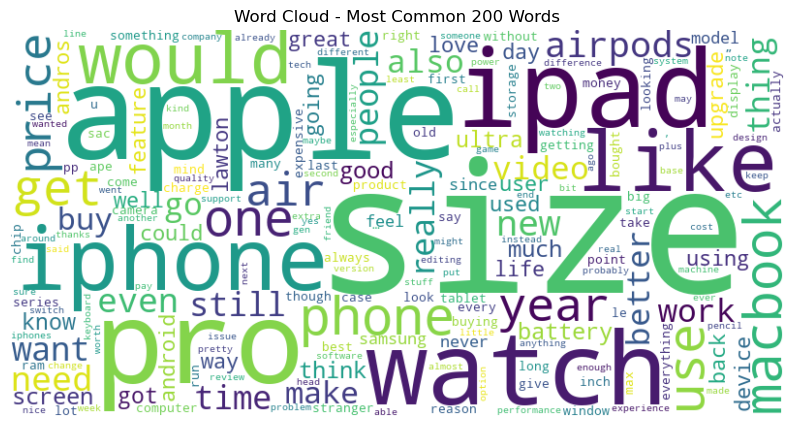

In [261]:
from wordcloud import WordCloud

all_comments = ' '.join(df['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words')
plt.show()


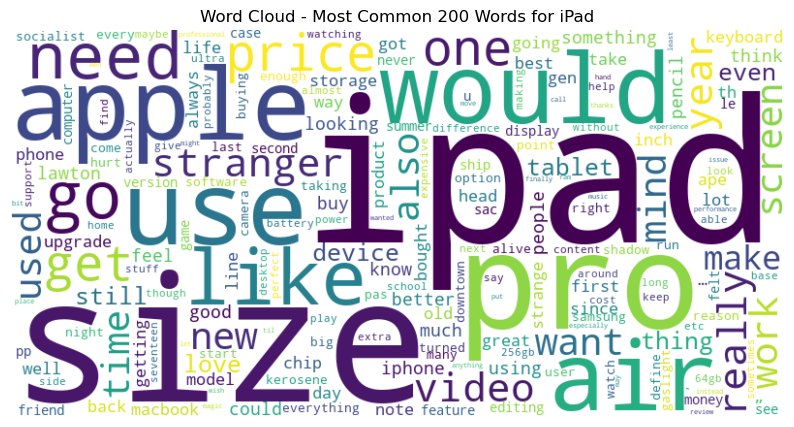

In [262]:
from wordcloud import WordCloud

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPad')
plt.show()


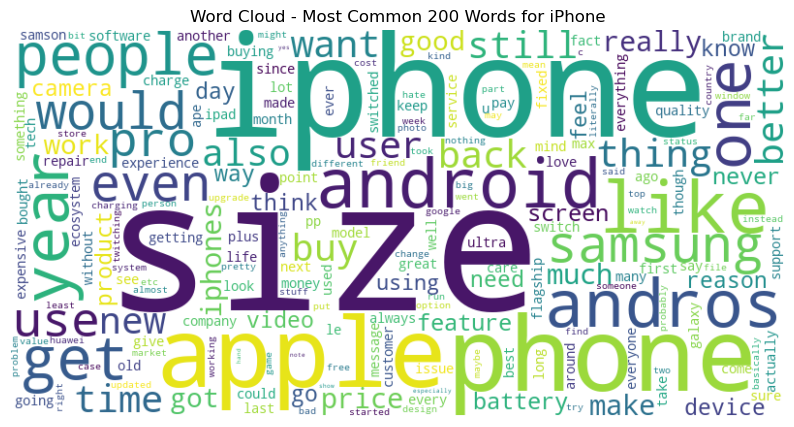

In [263]:
from wordcloud import WordCloud

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPhone')
plt.show()


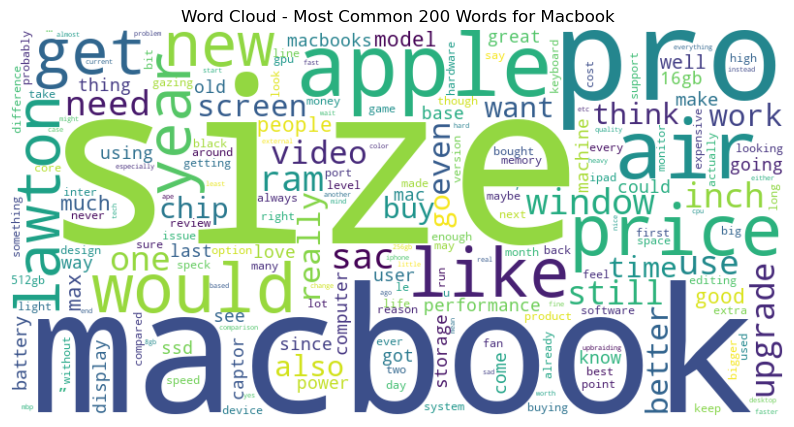

In [264]:
from wordcloud import WordCloud

all_comments = ' '.join(df_mac['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Macbook')
plt.show()


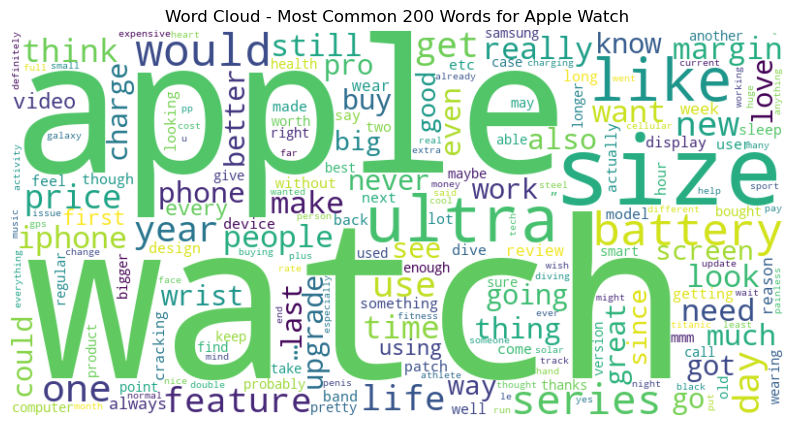

In [265]:
from wordcloud import WordCloud

all_comments = ' '.join(df_watch['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Apple Watch')
plt.show()


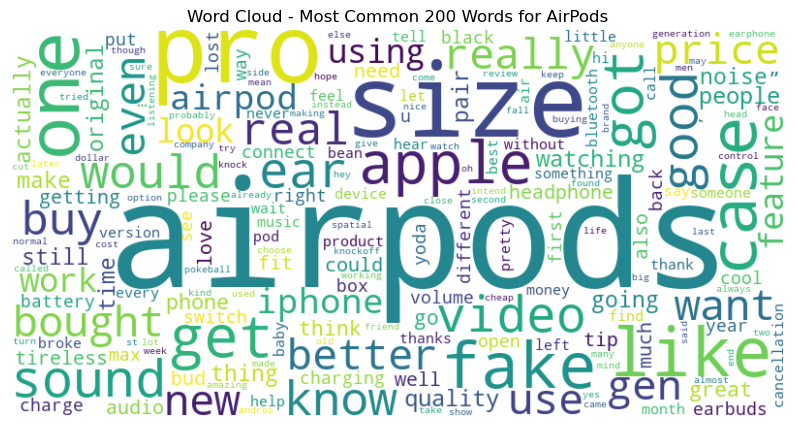

In [266]:
from wordcloud import WordCloud

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for AirPods')
plt.show()


**24. Extracting noun phrases with TextBlob**

In [267]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases:
iphone size: 177
size year: 159
pro size: 152
series size: 119
pro max: 116
socialist ship pas summer night shadow: 95
gaslight kerosene: 95
battery life: 83
macbook air: 75
apple product: 71


In [268]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_mac['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Macbook:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Macbook:
macbook air: 69
size macbook: 61
pro size: 55
size year: 54
new macbook: 45
size inch macbook: 24
pro macbook: 22
base model: 19
pro max: 19
size inch: 17


In [269]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPhone:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPhone:
iphone size: 133
pro max: 64
size year: 46
apple product: 38
new phone: 35
top iphones: 26
android phone: 21
new iphone: 19
andros phone: 19
iphone user: 14


In [270]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_watch['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Apple Watch:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Apple Watch:
series size: 115
battery life: 58
new apple: 38
ultra size: 26
regular apple: 22
normal apple: 18
size size: 18
size year: 17
size day: 14
iphone size: 12


In [271]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPad:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPad:
socialist ship pas summer night shadow: 95
gaslight kerosene: 95
pro size: 62
ipad air: 47
hurt til: 45
size year: 41
size ipad: 41
new ipad: 37
life cellophane: 34
strange stranger: 34


In [272]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for AirPods:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for AirPods:
pro size: 30
fake airpods: 28
new airpods: 14
airpods size: 13
original airpods: 11
sound quality: 9
real airpods: 8
black airpods: 7
pro max: 7
airpods airpods: 7


**24. Performing the LDA Topic Modelling**

In [273]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_iphone['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_iphone['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_iphone['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2661475112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.029*"iphone" + 0.023*"size" + 0.020*"phone" + 0.015*"apple" + 0.013*"like" + 0.013*"android" + 0.008*"iphones" + 0.008*"even" + 0.007*"would" + 0.007*"price" | Comment Count: 128
Topic 1: 0.020*"apple" + 0.017*"iphone" + 0.012*"phone" + 0.011*"android" + 0.009*"size" + 0.009*"get" + 0.009*"like" + 0.007*"one" + 0.007*"people" + 0.006*"want" | Comment Count: 97
Topic 2: 0.031*"iphone" + 0.024*"phone" + 0.022*"apple" + 0.015*"size" + 0.013*"people" + 0.013*"andros" + 0.011*"like" + 0.010*"samsung" + 0.008*"time" + 0.006*"user" | Comment Count: 234
Topic 3: 0.098*"size" + 0.047*"iphone" + 0.021*"pro" + 0.013*"apple" + 0.011*"phone" + 0.010*"year" + 0.009*"max" + 0.007*"back" + 0.007*"battery" + 0.007*"one" | Comment Count: 166
Topic 4: 0.033*"phone" + 0.025*"iphone" + 0.024*"apple" + 0.022*"size" + 0.012*"android" + 0.011*"year" + 0.009*"like" + 0.008*"one" + 0.008*"get" + 0.008*"samsung" | Comment Count: 375


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2661475112.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


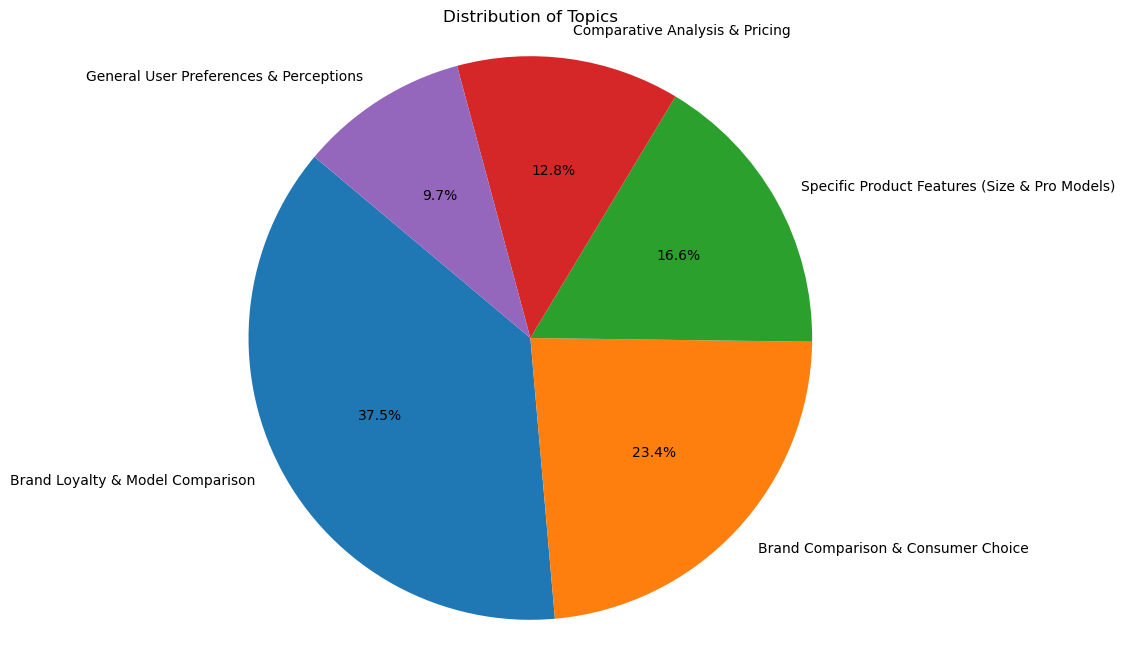

In [275]:
topic_labels = {
    0: 'Comparative Analysis & Pricing',
    1: "General User Preferences & Perceptions",
    2: 'Brand Comparison & Consumer Choice',
    3: "Specific Product Features (Size & Pro Models)",
    4: "Brand Loyalty & Model Comparison"
}

topic_counts = df_iphone['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - Comparative Analysis & Pricing**: This topic seems to focus on comparisons between iPhones and Android phones, with mentions of aspects like size, price, and general preferences. It appears to involve discussions about the differences and pricing strategies between Apple and its competitors.

2. **Topic 1 - General User Preferences & Perceptions**: This topic includes words like 'apple', 'iphone', 'phone', 'android', and 'people', suggesting discussions about general user preferences, perceptions of Apple versus Android, and what people want from their smartphones.

3. **Topic 2 - Brand Comparison & Consumer Choice**: With a higher emphasis on 'iphone', 'phone', 'apple', 'samsung', and 'user', this topic likely revolves around comparing Apple with other brands like Samsung, focusing on consumer choices and brand preferences.

4. **Topic 3 - Specific Product Features (Size & Pro Models)**: This topic is heavily weighted towards 'size', 'iphone', 'pro', and 'max', indicating discussions centered on specific iPhone models, particularly focusing on their size and features of the Pro and Max versions.

5. **Topic 4 - Brand Loyalty & Model Comparison**: This topic seems to discuss 'phone', 'iphone', 'apple', and 'android' in the context of yearly updates, suggesting a focus on brand loyalty and annual comparisons between different iPhone models and their competitors.

In [276]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_mac['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_mac['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_mac['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2265032275.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.015*"apple" + 0.012*"like" + 0.012*"macbook" + 0.012*"size" + 0.008*"pro" + 0.008*"video" + 0.007*"lawton" + 0.007*"would" + 0.006*"year" + 0.006*"well" | Comment Count: 51
Topic 1: 0.026*"pro" + 0.026*"macbook" + 0.022*"size" + 0.010*"apple" + 0.009*"…" + 0.007*"sac" + 0.007*"would" + 0.007*"need" + 0.007*"air" + 0.007*"video" | Comment Count: 116
Topic 2: 0.070*"size" + 0.023*"macbook" + 0.018*"pro" + 0.017*"apple" + 0.010*"air" + 0.009*"year" + 0.009*"sac" + 0.009*"price" + 0.007*"like" + 0.007*"new" | Comment Count: 292
Topic 3: 0.057*"size" + 0.032*"macbook" + 0.025*"pro" + 0.016*"air" + 0.011*"get" + 0.010*"would" + 0.010*"inch" + 0.010*"price" + 0.010*"ram" + 0.009*"apple" | Comment Count: 489
Topic 4: 0.020*"apple" + 0.016*"macbook" + 0.010*"price" + 0.009*"one" + 0.007*"window" + 0.007*"like" + 0.007*"new" + 0.006*"year" + 0.006*"really" + 0.006*"screen" | Comment Count: 52


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2265032275.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


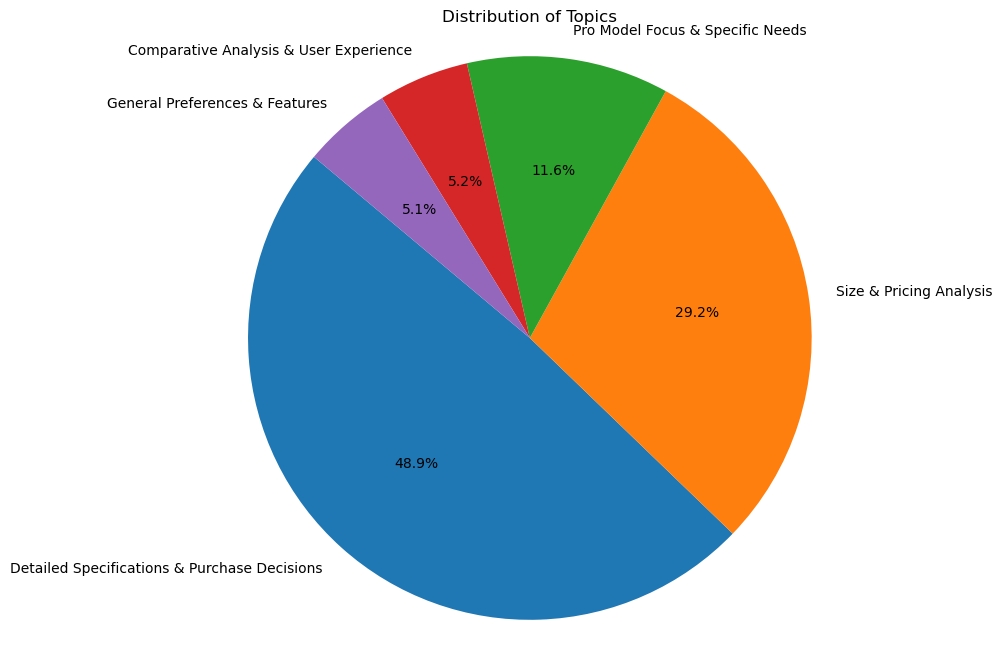

In [280]:
topic_labels = {
    0: 'General Preferences & Features',
    1: "Pro Model Focus & Specific Needs",
    2: 'Size & Pricing Analysis',
    3: "Detailed Specifications & Purchase Decisions",
    4: "Comparative Analysis & User Experience"
}

topic_counts = df_mac['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - General Preferences & Features**: This topic, with keywords like 'apple', 'like', 'macbook', 'pro', and 'video', seems to cover general preferences and features of MacBooks. It may include discussions about the MacBook's appeal, its professional applications, and video-related capabilities.

2. **Topic 1 - Pro Model Focus & Specific Needs**: With 'pro', 'macbook', and 'size' being prominent, this topic likely revolves around the MacBook Pro model. The discussions might focus on specific needs such as storage, performance, and suitability for professional tasks.

3. **Topic 2 - Size & Pricing Analysis**: This topic is heavily weighted towards 'size', 'macbook', 'pro', and 'price', indicating a focus on comparing different MacBook sizes (including MacBook Pro and Air) and their pricing strategies. It may also include discussions about the value for money and the cost of new models.

4. **Topic 3 - Detailed Specifications & Purchase Decisions**: With a strong emphasis on 'size', 'macbook', 'pro', 'inch', and 'ram', this topic likely includes detailed discussions about MacBook specifications. It could cover aspects like screen size, RAM options, and factors influencing purchase decisions.

5. **Topic 4 - Comparative Analysis & User Experience**: This topic includes 'apple', 'macbook', 'price', 'window', and 'screen', suggesting a comparative analysis between MacBooks and other laptops (possibly Windows-based), as well as discussions about the overall user experience, new features, and screen quality.

In [277]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_ipad['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_ipad['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_ipad['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1621576080.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.048*"size" + 0.047*"ipad" + 0.029*"pro" + 0.014*"air" + 0.012*"use" + 0.011*"apple" + 0.010*"would" + 0.009*"price" + 0.007*"year" + 0.007*"need" | Comment Count: 714
Topic 1: 0.024*"ipad" + 0.015*"size" + 0.012*"use" + 0.011*"apple" + 0.010*"pro" + 0.009*"work" + 0.007*"like" + 0.005*"get" + 0.005*"one" + 0.005*"device" | Comment Count: 96
Topic 2: 0.027*"ipad" + 0.024*"size" + 0.009*"really" + 0.008*"like" + 0.008*"would" + 0.007*"want" + 0.007*"time" + 0.007*"apple" + 0.007*"iphone" + 0.006*"get" | Comment Count: 44
Topic 3: 0.019*"ipad" + 0.010*"really" + 0.010*"video" + 0.010*"like" + 0.010*"win" + 0.009*"love" + 0.008*"sarah" + 0.007*"school" + 0.007*"would" + 0.006*"time" | Comment Count: 39
Topic 4: 0.031*"ipad" + 0.023*"stranger" + 0.019*"size" + 0.015*"like" + 0.014*"used" + 0.013*"go" + 0.012*"something" + 0.010*"love" + 0.010*"looking" + 0.009*"strange" | Comment Count: 107


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1621576080.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


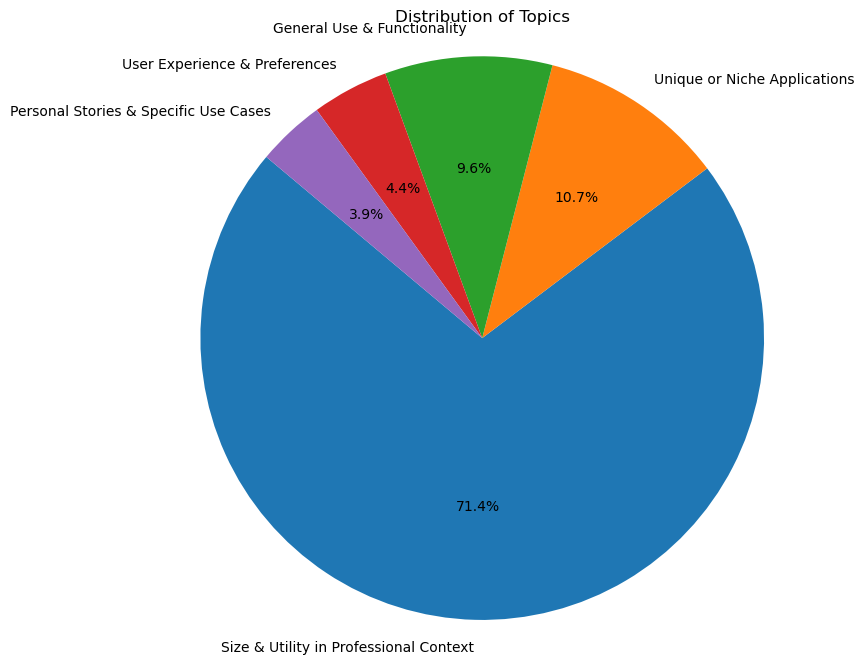

In [281]:
topic_labels = {
    0: 'Size & Utility in Professional Context',
    1: "General Use & Functionality",
    2: 'User Experience & Preferences',
    3: "Personal Stories & Specific Use Cases",
    4: "Unique or Niche Applications"
}

topic_counts = df_ipad['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - Size & Utility in Professional Context**: This topic, with 'size', 'ipad', 'pro', 'air', and 'use' being prominent, likely discusses the different sizes of iPads, particularly the Pro and Air models, and their utility in professional or practical contexts. The emphasis on 'price' and 'year' could also indicate discussions about cost-effectiveness and yearly updates.

2. **Topic 1 - General Use & Functionality**: With words like 'ipad', 'size', 'use', 'apple', and 'work', this topic seems to revolve around the general use of iPads, their functionality, and how they fit into various work-related scenarios. It might include comparisons with other Apple devices and discussions about the iPad as a versatile device.

3. **Topic 2 - User Experience & Preferences**: This topic, highlighted by words like 'ipad', 'size', 'really', 'like', and 'want', appears to focus on user experience and personal preferences. It likely includes discussions about what users really like or want in an iPad, including size preferences and comparisons to other Apple products like the iPhone.

4. **Topic 3 - Personal Stories & Specific Use Cases**: With keywords like 'ipad', 'video', 'win', 'love', and 'school', this topic could represent more personal stories or specific use cases of iPads. It may include content related to winning iPads, using them in educational settings like schools, and personal feelings about the device.

5. **Topic 4 - Unique or Niche Applications**: This topic is a bit more intriguing with the inclusion of words like 'ipad', 'stranger', 'size', 'used', and 'go'. It could indicate discussions about unique or niche applications of iPads, possibly in creative or unconventional settings, or reflections on unusual or unexpected experiences with the device.

In [278]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_watch['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_watch['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_watch['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1214900019.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.051*"apple" + 0.046*"watch" + 0.018*"size" + 0.012*"use" + 0.012*"one" + 0.009*"ultra" + 0.009*"like" + 0.007*"phone" + 0.007*"want" + 0.006*"really" | Comment Count: 165
Topic 1: 0.044*"apple" + 0.041*"watch" + 0.020*"size" + 0.014*"…" + 0.009*"would" + 0.008*"battery" + 0.007*"think" + 0.007*"like" + 0.007*"get" + 0.007*"need" | Comment Count: 104
Topic 2: 0.034*"watch" + 0.027*"apple" + 0.011*"like" + 0.006*"would" + 0.006*"phone" + 0.006*"people" + 0.005*"feature" + 0.005*"make" + 0.005*"battery" + 0.005*"get" | Comment Count: 48
Topic 3: 0.065*"watch" + 0.050*"size" + 0.043*"apple" + 0.017*"ultra" + 0.013*"battery" + 0.012*"like" + 0.011*"series" + 0.011*"would" + 0.009*"day" + 0.008*"year" | Comment Count: 636
Topic 4: 0.050*"size" + 0.027*"watch" + 0.025*"apple" + 0.010*"dive" + 0.009*"one" + 0.008*"series" + 0.007*"computer" + 0.006*"use" + 0.005*"ultra" + 0.005*"would" | Comment Count: 47


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1214900019.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


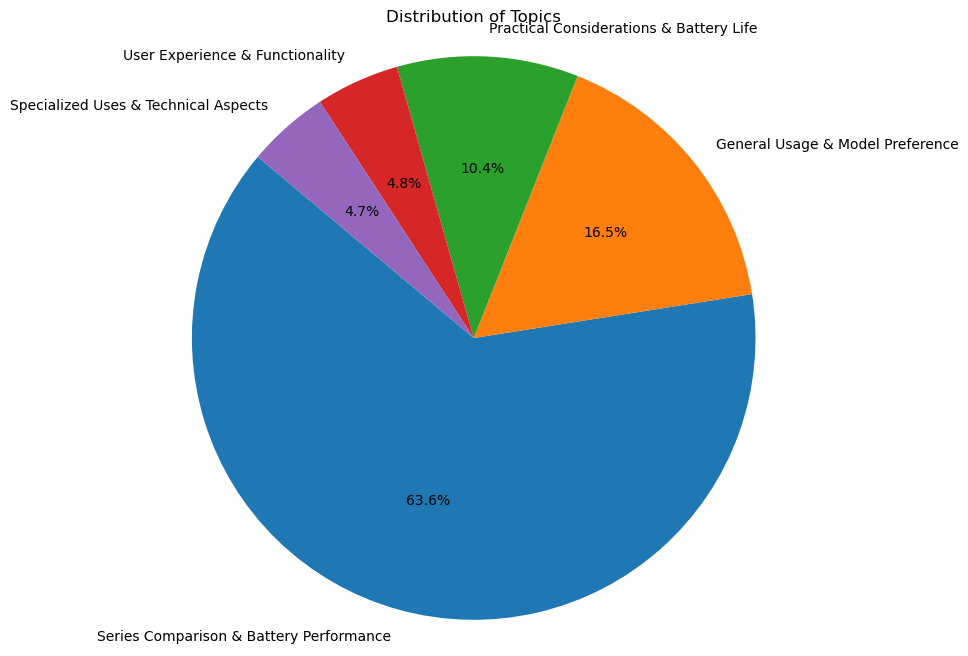

In [282]:
topic_labels = {
    0: 'General Usage & Model Preference',
    1: "Practical Considerations & Battery Life",
    2: 'User Experience & Functionality',
    3: "Series Comparison & Battery Performance",
    4: "Specialized Uses & Technical Aspects"
}

topic_counts = df_watch['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - General Usage & Model Preference**: With 'apple', 'watch', 'size', 'use', and 'ultra' as key terms, this topic likely covers general usage of the Apple Watch, preferences among different models (including the Ultra), and how it integrates with users' lifestyles. It might also touch on the reasons why people want or choose specific Apple Watch models.

2. **Topic 1 - Practical Considerations & Battery Life**: This topic, featuring words like 'apple', 'watch', 'size', 'battery', and 'need', seems to focus on practical considerations such as battery life, size choices for comfort or utility, and what users would like to see in future iterations of the Apple Watch.

3. **Topic 2 - User Experience & Functionality**: With 'watch', 'apple', 'like', 'phone', and 'people' as prominent terms, this topic appears to discuss the user experience and functionality of the Apple Watch, including how it compares to or integrates with other devices like phones, and what features people value.

4. **Topic 3 - Series Comparison & Battery Performance**: Dominated by 'watch', 'size', 'apple', 'ultra', and 'battery', this topic likely delves into comparisons between different series of Apple Watch, particularly focusing on the Ultra model. Discussions might include aspects like battery performance and the suitability of different models for various needs or preferences.

5. **Topic 4 - Specialized Uses & Technical Aspects**: This topic, with terms like 'size', 'watch', 'apple', 'dive', and 'series', suggests a focus on specialized uses of the Apple Watch, such as diving or other specific activities. It might also include discussions on technical aspects like computing capabilities and preferences for different series of the watch.

In [279]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_airpods['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_airpods['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_airpods['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/3152854227.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.057*"airpods" + 0.056*"size" + 0.039*"pro" + 0.014*"like" + 0.009*"case" + 0.009*"one" + 0.009*"gen" + 0.008*"ear" + 0.007*"apple" + 0.007*"sound" | Comment Count: 191
Topic 1: 0.074*"airpods" + 0.020*"fake" + 0.016*"pro" + 0.012*"size" + 0.012*"apple" + 0.011*"get" + 0.011*"good" + 0.010*"watching" + 0.010*"one" + 0.009*"real" | Comment Count: 204
Topic 2: 0.076*"airpods" + 0.017*"case" + 0.017*"size" + 0.015*"one" + 0.012*"got" + 0.011*"yoda" + 0.011*"baby" + 0.011*"would" + 0.010*"know" + 0.010*"pro" | Comment Count: 154
Topic 3: 0.080*"airpods" + 0.031*"pro" + 0.027*"size" + 0.017*"fake" + 0.016*"like" + 0.012*"get" + 0.012*"one" + 0.010*"ear" + 0.008*"apple" + 0.008*"bought" | Comment Count: 277
Topic 4: 0.084*"airpods" + 0.022*"case" + 0.018*"one" + 0.015*"size" + 0.011*"pro" + 0.010*"got" + 0.009*"sound" + 0.009*"like" + 0.008*"airpod" + 0.008*"video" | Comment Count: 174


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/3152854227.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


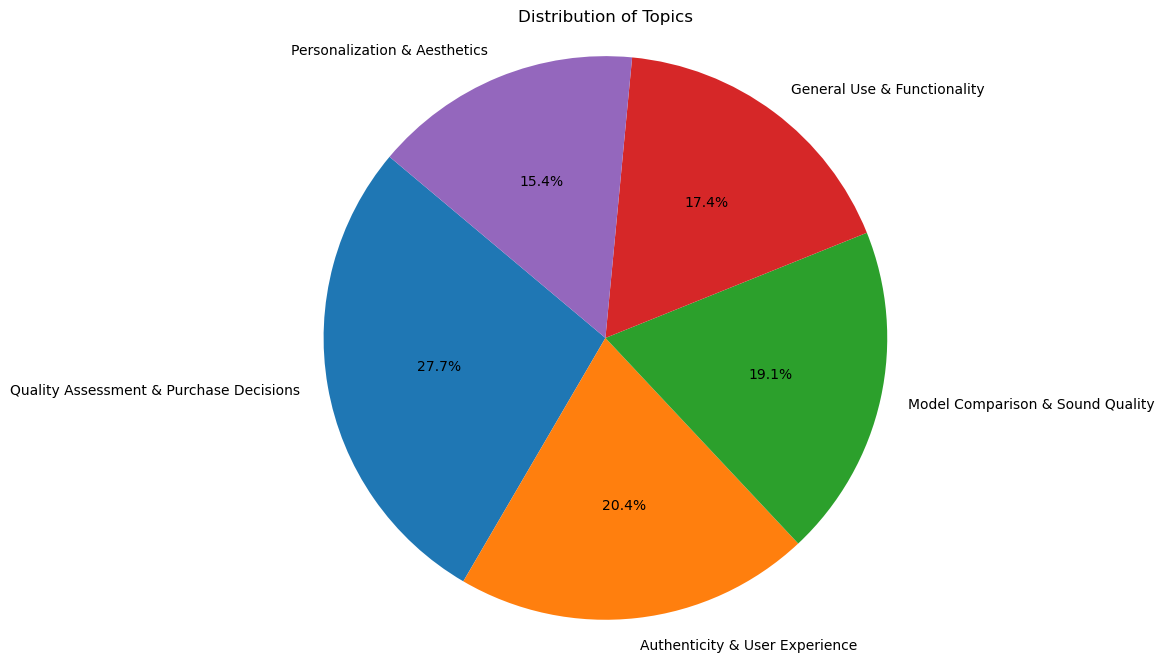

In [283]:
topic_labels = {
    0: 'Model Comparison & Sound Quality',
    1: "Authenticity & User Experience",
    2: 'Personalization & Aesthetics',
    3: "Quality Assessment & Purchase Decisions",
    4: "General Use & Functionality"
}

topic_counts = df_airpods['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - Model Comparison & Sound Quality**: With 'airpods', 'size', 'pro', 'case', and 'sound' as key terms, this topic likely discusses comparisons between different AirPods models, particularly the Pro version, focusing on aspects like size, fit in the ear, case design, and sound quality.

2. **Topic 1 - Authenticity & User Experience**: This topic, highlighted by 'airpods', 'fake', 'pro', and 'real', appears to focus on the authenticity of AirPods, distinguishing between real and fake products. It might also include discussions about the overall user experience, quality assessments, and tips on identifying genuine Apple products.

3. **Topic 2 - Personalization & Aesthetics**: With the inclusion of 'airpods', 'case', 'yoda', and 'baby', this topic seems to revolve around personalizing AirPods, possibly through cases or accessories, and aesthetic preferences. The references to 'Yoda' and 'baby' could indicate discussions about themed or custom cases.

4. **Topic 3 - Quality Assessment & Purchase Decisions**: Dominated by 'airpods', 'pro', 'fake', and 'bought', this topic likely includes discussions about the quality of AirPods Pro, concerns about counterfeit products, and experiences or advice related to purchasing AirPods, including where and how to buy them.

5. **Topic 4 - General Use & Functionality**: This topic, with terms like 'airpods', 'case', 'sound', and 'video', suggests a focus on the general use and functionality of AirPods. It could cover aspects like sound quality, ease of use, case design, and the utility of AirPods in different contexts, such as while watching videos.

**25. Conduct a sentiment analysis with VADER model**

**25.1 iPhone**

In [284]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_VADER'] = df_iphone['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_iphone[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/3845702056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/3845702056.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

Sentiment_Comment  SentimentScore_VADER  \
4000  I was an andros user for years , I even worked...               -0.3105   
4001  The first Apple product I bought was a MacBook...                0.9696   
4002  I will say I agree with all these points . I w...                0.9984   
4003  One ! ! ! ! Here is why ! He very careful ! I ...                0.4977   
4004  [ SIZE ] : [ SIZE ] This level of control is d...                0.9551   
...                                                 ...                   ...   
4995  If someone likes Apple devices that is their c...               -0.8375   
4996  I am going to buy an iphone this year to see h...                0.2263   
4997  I made the jump to iphone last month . It is b...               -0.0799   
4998  Bro explaining the macroeconomics of Apple and...                0.0609   
4999  An someone help me ? I want a new Pro phone . ...                0.8488   

     SentimentCategory_VADER  
4000                Negative  
4001                Positive  
4002                Positive  
4003                Positive  
4004                Positive  
...                      ...  
4995                Negative  
4996                Positive  
4997                Negative  
4998                Positive  
4999                Positive  

[1000 rows x 3 columns]

In [285]:
df_iphone.SentimentScore_VADER.describe()

count    1000.000000
mean        0.381798
std         0.640515
min        -0.978600
25%        -0.132175
50%         0.698400
75%         0.913250
max         0.998400
Name: SentimentScore_VADER, dtype: float64

In [389]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 I will say I agree with all these points. I will say iPhone does things better. The AI typing experience is better then android, Apps run a bit more smoothly, dark mode on other apps that wont have darkmode in android even with developers mode on, and the ecosystem is amazing. 

(I always used android since s7 active then note 9 to now is the s 22 ultra). 

As I mention I always had an android and iPhone with me. I switch between then mainly as a backup phone. And the android was my file dump to download content for offline use. And while I always LOVE Samsung screens, their punchy saturated colors, bigger screens, the 1440p in the size screen offers more pixel density so to me it’s more of a sharper screen. Mixed all of those together really I just liked the screen better. And if apple can bring that along I think the iPhone is perfect. 

While I still do enjoy content on the iPhone being that’s it’s OLED but I find that the mini LED might be a better screen on apple products that c

In [390]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 I get my phones through my cell carrier, paying month to month kinda thing like many people I expect. I use AT&T and they do offer a protection plan, kinda insurance for phone damage. I had a totally broken phone about a year ago. I am in the Apple world, Iphone 12, Airpods pro, Apple Watch and some Airtags. When I had a broken screen on my phone I reported it to AT&T repair and made a claim on my phone insurance that was through Asurian. They charged 112$ deductible for a broken screen, once I paid the next day a repair guy game to my house and repaired my phone in my living room in an hour. 
One of my Airpod pro's also broke a bit later, no protection plan for that one. You can replace each one for about 90$ but if they are under warranty (witch mine where) they have a system where you pay the 92$, they send you a new one and send them the broken one, they inspect the broken one and if they find the problem was not your doing they refund the 92$. It ended up not costing me a dime, 

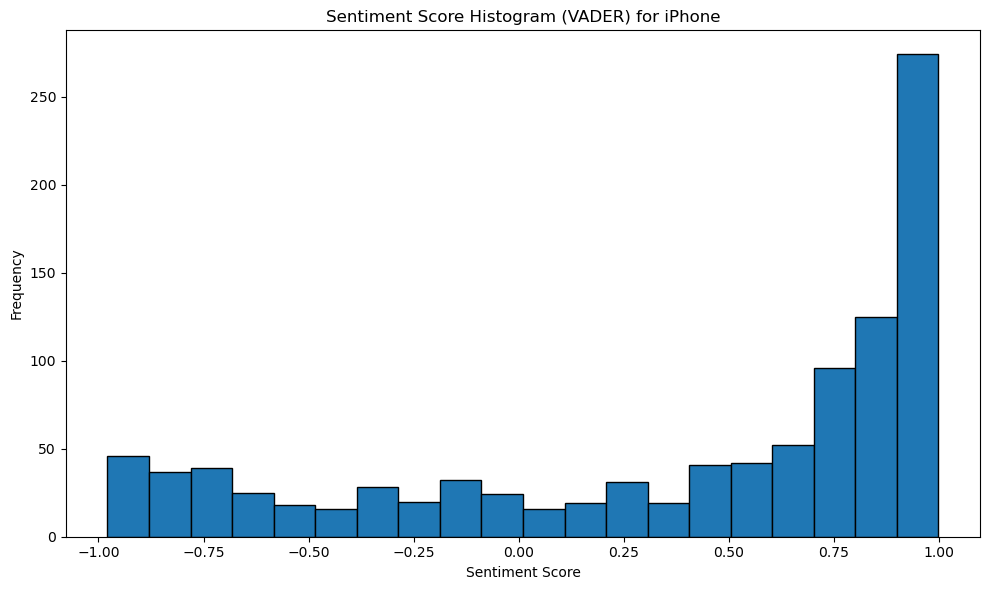

In [288]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_iphone['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.2 Macbook**

In [289]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_VADER'] = df_mac['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_mac[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2233685362.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2233685362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac[

Sentiment_Comment  SentimentScore_VADER  \
2000  Years ago we did a test , in [ SIZE ] - a Well...                0.9961   
2001  I always enjoy your video regarding Apple prod...                0.9968   
2002  Apple should have done three things : [ SIZE ]...                0.9716   
2003  Excellent presentation . I used both . My firs...                0.9939   
2004  The problem comes down to software . The Of Sa...                0.9952   
...                                                 ...                   ...   
2995  Your video saved me tears ! I bought the lates...                0.3578   
2996  I Am deciding between The in Air and in Macboo...                0.5927   
2997  very true bro ! i have the same problem . . . ...                0.8477   
2998  Still trying to figure out why I need one of t...                0.3818   
2999  Been a professional video editor for [ SIZE ] ...                0.0772   

     SentimentCategory_VADER  
2000                Positive  
2001                Positive  
2002                Positive  
2003                Positive  
2004                Positive  
...                      ...  
2995                Positive  
2996                Positive  
2997                Positive  
2998                Positive  
2999                Positive  

[1000 rows x 3 columns]

In [290]:
df_mac.SentimentScore_VADER.describe()

count    1000.000000
mean        0.470456
std         0.572229
min        -0.978000
25%         0.194575
50%         0.721350
75%         0.908300
max         0.997800
Name: SentimentScore_VADER, dtype: float64

In [391]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 I enjoy your videos & would never criticize you for what you buy.
Anyone who does so is a troll & should be ignored.
IF they were to help PAY for it then they MIGHT have a right to do CONSTRUCTIVE criticism but until then they need to keep their opinions to themselves.
I also like seeing what you buy.
I am on SSI and have a Silicon M1 Mac Mini and I want to buy the highest level newest 24 inch Imac that just came out but it will take me 2 years to save up for it.
My crappy Android phone shut off my mobile internet on its own and I am going to buy a refurbished Iphone XR with 256mb of memory and it will be my newest phone ever. 
I cannot afford a new one.
And my girlfriend and I just celebrated our 46th anniversary together today on Halloween & my cats Fluffy and Little Girl had their 24th birthday today as well.
Our Prius died 5 years ago and we are saving up for another one.
Next year all my debt will be paid off & I am going to go to Las Vegas and my real estate agent friend is goi

In [392]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 Very bad experience I just had with Apple. Just bought the new Apple MacBook 15 inches few hours back from Apple Store. And wow the machine failed to start. Brand new from the store but doesn’t work.called the customer service in USA but they are unable to do anything. Wasted 40 minutes on the phone and all they could say was ,” why don’t you go and get it checked in the store”. If I would have done that then why would I call them. So called useless customer service department of Apple Store. WHAT A DISAPPOINTMENT. NEVER EXPECTED THIS FROM A BIG BRAND CALLED APPLE. It was a birthday gift to my son. Damn - brand new machine failed to start.
REALLY DISAPPOINTED WITH ALL THIS.
-----------------------------------------------------------------------------------------------
1 From what I hear,  Qualcomm is coming out with a new SoC that promises to eat the M2 Macs for lunch, and STILL provide great battery life. Also, Intel's newest mobile CPUs also supposedly will be faster than Apples M2

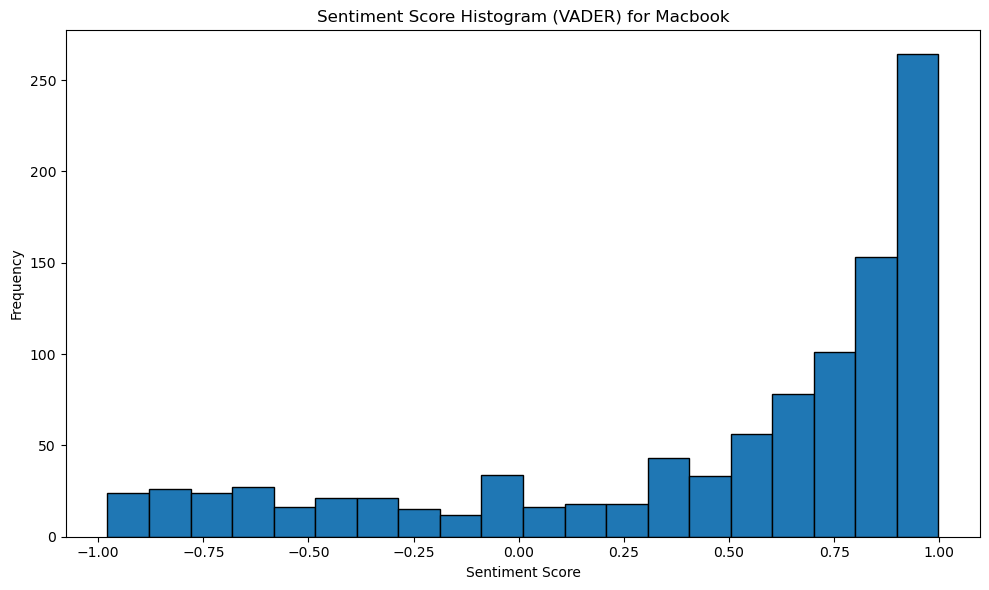

In [293]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_mac['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.3 iPad**

In [294]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_VADER'] = df_ipad['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_ipad[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/571326633.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/571326633.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad

Sentiment_Comment  SentimentScore_VADER  \
3000  His mon : Earth is the third planet from the R...                0.9520   
3001  iPad ( TCS4 ) Serics [ Verse [ SIZE ] ] I go t...                0.9980   
3002  Nobody needs damn extra keyboard and pencils t...                0.9963   
3003  I have gone through such a rollercoaster with ...                0.9989   
3004  Is far as Photoshop / Photo Editing goes , one...                0.9978   
...                                                 ...                   ...   
3995  “ Most confusing iPad line ” you guns say that...               -0.7636   
3996  Honestly it is so true I have an [ SIZE ] iPad...                0.9650   
3997  Great review Fete , thank you . An I just ask ...                0.6310   
3998  I do not agree with you . I and most people do...                0.7087   
3999  I am still rocking the iPad mind [ SIZE ] . . ...                0.8954   

     SentimentCategory_VADER  
3000                Positive  
3001                Positive  
3002                Positive  
3003                Positive  
3004                Positive  
...                      ...  
3995                Negative  
3996                Positive  
3997                Positive  
3998                Positive  
3999                Positive  

[1000 rows x 3 columns]

In [295]:
df_ipad.SentimentScore_VADER.describe()

count    1000.000000
mean        0.595424
std         0.517998
min        -0.971200
25%         0.474025
50%         0.834150
75%         0.946850
max         0.998900
Name: SentimentScore_VADER, dtype: float64

In [393]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 I've gone through such a rollercoaster with this. My original intention was to just get a iphone 14 pro max and have done with it. Its expensive but I need a new phone, or more accurately a new touchscreen web browser/internet/video wathcing etc machine. my Samsung Galaxy S10+ has been a great phone, and has served me well, but its been used pretty hard, and at this point is just reaching the end of its life, not only in terms of software support, but battery life is...well I need to keep wireless chargers around to keep the thing on life support, and the last week or so its started to randomly freeze. Which it never ever did before that. Its basically getting to the point where its just cooked, and, I don't have the patience to deal with it, I need it to just work! I've never owned an iOS device before. The only apple device I ever owned in my life was an ipod nano, which I got for my 20th birthday. I loved that thing. But I wanted a change from Android, since its all I've ever had 

In [394]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 PSA… I HIGHLY suggest people do NOT buy an iPad from Amazon. I bought an iPad Pro when it was on sale for $200 off a couple weeks ago… it was NEVER DELIVERED despite the Amazon tracking showing it was “handed to a resident” and despite it requiring a signature. Obviously they did not obtain my signature, but they also didn’t obtain ANY signature. As far as I’m concerned the Amazon delivery person stole it. Now, two weeks later, I finally got a refund, but only after they made me file a police report and wait for the police to accept and validate it. Pain in the ass to say the least, AND a replacement wasn’t even an option. Couple this nonsense with bad customer service and an embarrassing $5 coupon for the inconvenience, means I will NEVER EVER buy a high-end item on Amazon again. Shit ass company. Stay away unless you WANT a headache.
-----------------------------------------------------------------------------------------------
1 Dont fall into trap of mindless consuming. What adva

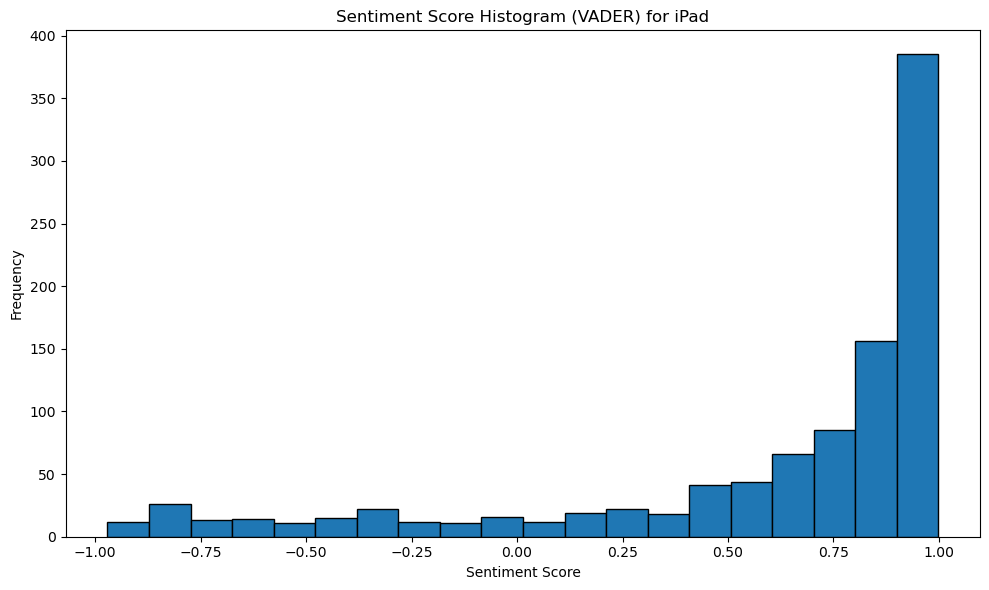

In [298]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_ipad['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.4 AirPods**

In [299]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_VADER'] = df_airpods['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_airpods[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1128605631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1128605631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Sentiment_Comment  SentimentScore_VADER  \
0    I bought a fake and gen airpod last week . . l...               -0.9562   
1    I really appreciate your in - depth knowledge ...                0.9808   
2    If you use multiple Apple products like iPhone...               -0.6964   
3    Just got AirPods Pro [ SIZE ] - using on an iP...                0.9792   
4    i just confirmed the lossless feature with an ...               -0.4556   
..                                                 ...                   ...   
995  I have the Local Old AirPods case it is shaped...                0.3612   
996  Why m i watching this even though I he this ai...                0.0000   
997  I am watching this with my AirPods in n it alw...               -0.1531   
998  AirPods Pro [ SIZE ] are done . Noise cancella...                0.7384   
999  Now would you compare the knocked to the regul...                0.0000   

    SentimentCategory_VADER  
0                  Negative  
1                  Positive  
2                  Negative  
3                  Positive  
4                  Negative  
..                      ...  
995                Positive  
996                 Neutral  
997                Negative  
998                Positive  
999                 Neutral  

[1000 rows x 3 columns]

In [300]:
df_airpods.SentimentScore_VADER.describe()

count    1000.000000
mean        0.130008
std         0.497087
min        -0.966000
25%        -0.237800
50%         0.000000
75%         0.578000
max         0.990100
Name: SentimentScore_VADER, dtype: float64

In [395]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 Undoubtedly the best AirPods Pro tips and tricks/features video out there. All the others I've watched have been very basic stuff, mostly stuff that's on by default and that everyone who has AirPods already knows. I watched one video where it was literally just a list of "and also there's this thing you _could_ do, but don't do it because the default is better" like literally it was just 10 or so things where he kept saying "you _COULD_ do this, but I would just leave it as is because it's already fine" like bruh why does your video exist?? lmao
But yeah your video is actually useful, and well done. I was skeptical at first because 25 things seemed like a lot, and of course I knew a fair few of them, but I definitely learned some useful stuff! So thank you! :)
-----------------------------------------------------------------------------------------------
1 I really appreciate your in-depth knowledge regarding the AirPods Pro 2's! I’ve had mine for only a few months and after watching

In [396]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 "Are you watching this video with your airpods in? No ? Damn, you are probably broke"

Dude, You don't have to be too savage to insult me. I'm already going through an existential crisis
-----------------------------------------------------------------------------------------------
1 I bought a fake 2nd gen airpod last week.. lookwise yes looks almost perfect but @ the very same minute starting using them, i get dizziness, on top of my eyes i start getting some type of pain/ache, start feeling uncomfortable of some sort.. No, I dont turn the volume all the way up @ all, not even close to that  but still getting dizzy.. like u drink a little more but you are not vomitting yet type of thing.. I cant really explain but uncomfortness... not while holding them on your ears, they stick there really well but there is sonething with those products that is NOT healthy for people... 

I have s9 plus still and have been using Samsung wired headphones (found the earphones in my note4 box while s

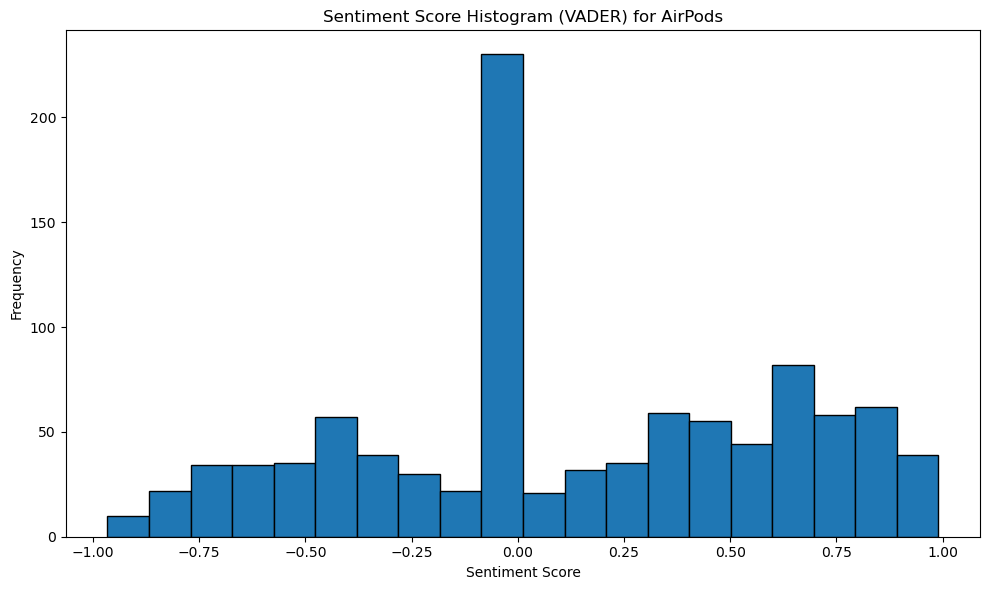

In [303]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_airpods['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.5 Apple Watch**

In [304]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_VADER'] = df_watch['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_watch[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1356089718.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1356089718.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

Sentiment_Comment  SentimentScore_VADER  \
1000  last year i took a break from apple . . . i go...                0.9839   
1001  One thing no reviewed seems to cover is the di...               -0.9101   
1002  🎯 Key Takeaways for quick navigation : [ SIZE ...                0.9800   
1003  I am absolutely the audience for this . I am a...               -0.9636   
1004  Having an Apple watch was one of my dreams and...                0.9905   
...                                                 ...                   ...   
1995  I cannot imagine life without my Apple Watch !...                0.0000   
1996  well i think to switch to apple watch , we hav...               -0.3167   
1997  @ janssen_aquilino Hi Lion , great and informa...                0.8070   
1998  Today I put my series [ SIZE ] Apple Watch on ...                0.3818   
1999  Thank you for your clear , concise explanation...                0.8481   

     SentimentCategory_VADER  
1000                Positive  
1001                Negative  
1002                Positive  
1003                Negative  
1004                Positive  
...                      ...  
1995                 Neutral  
1996                Negative  
1997                Positive  
1998                Positive  
1999                Positive  

[1000 rows x 3 columns]

In [305]:
df_watch.SentimentScore_VADER.describe()

count    1000.000000
mean        0.394341
std         0.541679
min        -0.981300
25%         0.000000
50%         0.568150
75%         0.847825
max         0.996600
Name: SentimentScore_VADER, dtype: float64

In [397]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 Had every Apple Watch since original. Upgraded from 7 to 8 then watched reviews of Ultra including yours which I very much enjoyed. After wanted an Ultra but Apple showed delivery a month out and Verizon in December. Best Buy site stated delivery in two days so I said OK and ordered one. Sure enough would have gotten in two days but delay with UPS which hardly ever happens got it in three days. Not had it a week yet and have about another week and a half to return it. I really like it but go back and forth whether to keep or return. I like the bigger size and then I don’t like the bigger size. I like the bright screen then I don’t like the brighter screen. I like the design but then I don’t like the design. This is all compared to my 8 but then I do like the fact it is tough and I don’t have to worry about damaging it. I do not like the fact that I accidentally bought one with the small Alpine Loop band and Best Buy said they can’t just swap band and would have to send watch and band

In [398]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 Can we talk about how terrible apple is doing right now, people be really trying to prove that apple really did something new to their  watches this year, Apple is a bunch of scum bags that are trying to milk money out of their customers. Let's start with a "new" series 9 watches  that  have nothing new but a new "Tap" feature that isn't even on the watch yet as it comes in November, NOVEMBER!! THEY SERIOUSLY released new series 9 watches that only have 1 new feature that makes it any different from series 8 and it doesn't come straight out of the box!?!?! Not only that, but they also released ulta 2 watches that come with nothing new, literally nothing new, new tap feature is not available yet and I mean why would you even want to release a new feature that won't come with the device straight out of the box???? Ultra 2 watches have absolutely nothing different from the previous year version, the new "Brighter" screen makes absolutely no difference to a human aye, everyone could bare

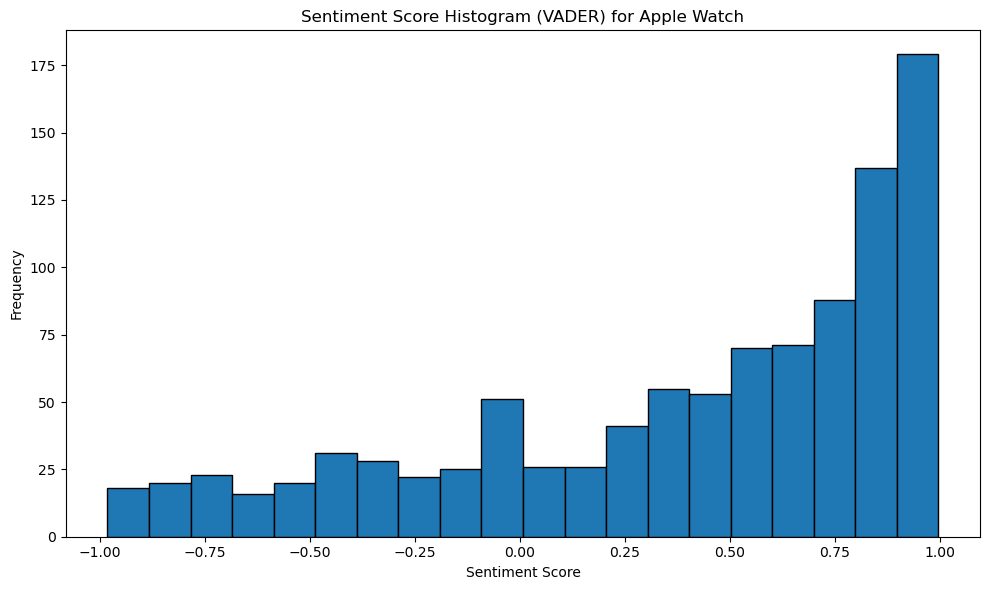

In [308]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_watch['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**26. Conduct a sentiment analysis with TextBlob sentiment classifier**

***26.1. iPhone***

In [309]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')

def get_sentiment_textblob(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    sentiment = blob.sentiment
    if sentiment.p_pos >= 0.6:
        return "Positive"
    elif sentiment.p_neg >= 0.6:
        return "Negative"
    return "Neutral"

df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)

df_iphone[['Sentiment_Comment', 'SentimentCategory_Bayes']]


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2934576485.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
4000  I was an andros user for years , I even worked...   
4001  The first Apple product I bought was a MacBook...   
4002  I will say I agree with all these points . I w...   
4003  One ! ! ! ! Here is why ! He very careful ! I ...   
4004  [ SIZE ] : [ SIZE ] This level of control is d...   
...                                                 ...   
4995  If someone likes Apple devices that is their c...   
4996  I am going to buy an iphone this year to see h...   
4997  I made the jump to iphone last month . It is b...   
4998  Bro explaining the macroeconomics of Apple and...   
4999  An someone help me ? I want a new Pro phone . ...   

     SentimentCategory_Bayes  
4000                Positive  
4001                Positive  
4002                Positive  
4003                Positive  
4004                Positive  
...                      ...  
4995                 Neutral  
4996                Positive  
4997                Positive  
4998                Positive  
4999                Negative  

[1000 rows x 2 columns]

In [310]:
df_iphone[df_iphone.SentimentCategory_Bayes != df_iphone.SentimentCategory_VADER]

Search                                            Comment  \
4000  iPhone  I was an android user for years, I even worked...   
4006  iPhone  Good content but how about you make a video ta...   
4008  iPhone  Guys, it takes 500 dollars to make today's Iph...   
4011  iPhone  Thanks for the video. This is actually why I s...   
4014  iPhone  The only reason why I considered apple a few m...   
...      ...                                                ...   
4991  iPhone  One of the big reasons for the switch for me w...   
4993  iPhone  I've never owned an iPhone, but I've been plan...   
4995  iPhone  If someone likes Apple devices that's their ch...   
4997  iPhone  I made the jump to iphone last month. It's bee...   
4999  iPhone  Can someone help me? \nI want a new Pro phone....   

                                        Cleaned_Comment  \
4000  andros user year even worked apple owned one y...   
4006  good content make video talking extremely nega...   
4008  u take size dollar make today phone k damn sur...   
4011  thanks video actually switch note iphone issue...   
4014  reason considered apple month ago running andr...   
...                                                 ...   
4991  one big reason switch friend phone seemed keep...   
4993  never owned iphone planning getting first one ...   
4995  someone like apple device choice convinced eve...   
4997  made jump iphone last month rocky road samsung...   
4999  someone help want new pro phone either wait ip...   

                                      Sentiment_Comment  Length  \
4000  I was an andros user for years , I even worked...    3047   
4006  Good content but how about you make a video ta...    2045   
4008  Us , it takes [ SIZE ] dollars to make today '...    2002   
4011  Thanks for the video . This is actually why I ...    1861   
4014  The only reason why I considered apple a few m...    1736   
...                                                 ...     ...   
4991  One of the big reasons for the switch for me w...     368   
4993  I have never owned an iPhone , but I have been...     368   
4995  If someone likes Apple devices that is their c...     367   
4997  I made the jump to iphone last month . It is b...     367   
4999  An someone help me ? I want a new Pro phone . ...     366   

                                      Tokenized_Comment  Topic  \
4000  [andros, user, year, even, worked, apple, owne...      4   
4006  [good, content, make, video, talking, extremel...      2   
4008  [u, take, size, dollar, make, today, phone, k,...      0   
4011  [thanks, video, actually, switch, note, iphone...      4   
4014  [reason, considered, apple, month, ago, runnin...      4   
...                                                 ...    ...   
4991  [one, big, reason, switch, friend, phone, seem...      0   
4993  [never, owned, iphone, planning, getting, firs...      4   
4995  [someone, like, apple, device, choice, convinc...      2   
4997  [made, jump, iphone, last, month, rocky, road,...      0   
4999  [someone, help, want, new, pro, phone, either,...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
4000               -0.3105                Negative                Positive  
4006               -0.2351                Negative                Positive  
4008               -0.1695                Negative                Positive  
4011                0.9305                Positive                Negative  
4014                0.9960                Positive                Negative  
...                    ...                     ...                     ...  
4991                0.1531                Positive                 Neutral  
4993                0.9647                Positive                Negative  
4995               -0.8375                Negative                 Neutral  
4997               -0.0799                Negative                Positive  
4999                0.8488                Posit

***26.2. Macbook***

In [311]:
df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)

df_mac[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/3820655831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
2000  Years ago we did a test , in [ SIZE ] - a Well...   
2001  I always enjoy your video regarding Apple prod...   
2002  Apple should have done three things : [ SIZE ]...   
2003  Excellent presentation . I used both . My firs...   
2004  The problem comes down to software . The Of Sa...   
...                                                 ...   
2995  Your video saved me tears ! I bought the lates...   
2996  I Am deciding between The in Air and in Macboo...   
2997  very true bro ! i have the same problem . . . ...   
2998  Still trying to figure out why I need one of t...   
2999  Been a professional video editor for [ SIZE ] ...   

     SentimentCategory_Bayes  
2000                Positive  
2001                Positive  
2002                Positive  
2003                Positive  
2004                Positive  
...                      ...  
2995                Positive  
2996                 Neutral  
2997                Positive  
2998                Positive  
2999                Positive  

[1000 rows x 2 columns]

In [312]:
df_mac[df_mac.SentimentCategory_Bayes != df_mac.SentimentCategory_VADER]

Search                                            Comment  \
2007  Macbook  even if price went up im still getting m3 max ...   
2011  Macbook  From what I hear,  Qualcomm is coming out with...   
2019  Macbook  I don’t agree. I think the model 3 to model Y ...   
2022  Macbook  I have gotten to really hate content providers...   
2029  Macbook  JUST SAVE UP $600 MORE AND GET THE BASE MODEL ...   
...       ...                                                ...   
2987  Macbook  I have the 14 inch MacBook Pro so this doesn't...   
2988  Macbook  I don’t like 8gb for the new m3 MacBook Pro, b...   
2991  Macbook  I think apple is aiming for people to update b...   
2993  Macbook  The icing on he cake will be if Apple brings t...   
2996  Macbook  Im deciding between The 15in Air and 14in Macb...   

                                        Cleaned_Comment  \
2007  even price went still getting max macbook pro ...   
2011  hear qualcomm coming new promise eat sac lunch...   
2019  agree think model size model analogy wrong ter...   
2022  gotten really hate content provides youtube re...   
2029  save price get base model size ” macbook pro s...   
...                                                 ...   
2987  size inch macbook pro apply curious think woul...   
2988  like go new macbook pro sac mind often haired ...   
2991  think apple aiming people update size size gen...   
2993  iting cake apple brings may racing ending ipho...   
2996  deciding air macbook pro need something school...   

                                      Sentiment_Comment  Length  \
2007  even if price went up i am still getting my ma...    2586   
2011  From what I hear , Qualcomm is coming out with...    2260   
2019  I do not agree . I think the model [ SIZE ] to...    1855   
2022  I have gotten to really hate content provides ...    1729   
2029  JUST SAVE of [ PRICE ] MORE AND GET THE BASE M...    1506   
...                                                 ...     ...   
2987  I have the [ SIZE ] inch MacBook Pro so this d...     277   
2988  I do not like go for the new my MacBook Pro , ...     277   
2991  I think apple is aiming for people to update b...     276   
2993  The iting on he cake will be if Apple brings t...     276   
2996  I Am deciding between The in Air and in Macboo...     275   

                                      Tokenized_Comment  Topic  \
2007  [even, price, went, still, getting, max, macbo...      3   
2011  [hear, qualcomm, coming, new, promise, eat, sa...      0   
2019  [agree, think, model, size, model, analogy, wr...      3   
2022  [gotten, really, hate, content, provides, yout...      4   
2029  [save, price, get, base, model, size, ”, macbo...      2   
...                                                 ...    ...   
2987  [size, inch, macbook, pro, apply, curious, thi...      3   
2988  [like, go, new, macbook, pro, sac, mind, often...      2   
2991  [think, apple, aiming, people, update, size, s...      2   
2993  [iting, cake, apple, brings, may, racing, endi...      0   
2996  [deciding, air, macbook, pro, need, something,...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
2007                0.9754                Positive                 Neutral  
2011               -0.9773                Negative                Positive  
2019               -0.4945                Negative                Positive  
2022               -0.6173                Negative                Positive  
2029                0.9612                Positive                Negative  
...                    ...                     ...                     ...  
2987                0.8922                Positive                Negative  
2988               -0.5886                Negative                Positive  
2991                0.5106                Positive                 Neutral  
2993                0.2732                Positive                 Neutral  
2996                0.5927          

***26.3. iPad***

In [313]:
df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)

df_ipad[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/691724193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
3000  His mon : Earth is the third planet from the R...   
3001  iPad ( TCS4 ) Serics [ Verse [ SIZE ] ] I go t...   
3002  Nobody needs damn extra keyboard and pencils t...   
3003  I have gone through such a rollercoaster with ...   
3004  Is far as Photoshop / Photo Editing goes , one...   
...                                                 ...   
3995  “ Most confusing iPad line ” you guns say that...   
3996  Honestly it is so true I have an [ SIZE ] iPad...   
3997  Great review Fete , thank you . An I just ask ...   
3998  I do not agree with you . I and most people do...   
3999  I am still rocking the iPad mind [ SIZE ] . . ...   

     SentimentCategory_Bayes  
3000                Positive  
3001                Positive  
3002                Positive  
3003                Positive  
3004                Positive  
...                      ...  
3995                Positive  
3996                Positive  
3997                Positive  
3998                Negative  
3999                Positive  

[1000 rows x 2 columns]

In [314]:
df_ipad[df_ipad.SentimentCategory_Bayes != df_ipad.SentimentCategory_VADER]

Search                                            Comment  \
3023   iPad  I have a darn review for this stupid thing I d...   
3030   iPad  I got my iPad 9 this year WAY back in January ...   
3062   iPad  There’s a lot of reasons why the Apple ecosyst...   
3063   iPad  I can't speak for either the pro or the ultra ...   
3070   iPad  My main issue is storage and screen size. Init...   
...     ...                                                ...   
3979   iPad  I have noticed a lot of things using both thes...   
3982   iPad  I don’t understand to the new iPad base model ...   
3984   iPad  I have a 2016 9.7 iPad Pro. I use it mostly fo...   
3995   iPad  “Most confusing iPad lineup” you guys say that...   
3998   iPad  I don't agree with you. I and most people don'...   

                                        Cleaned_Comment  \
3023  dark review stupid thing know start ipad get n...   
3030  got ipad size year way back january squeezing ...   
3062  lot reason apple ecosystem convoluted especial...   
3063  speak either pro ultra model peasant ipad air ...   
3070  main issue storage screen size initially repla...   
...                                                 ...   
3979  noticed lot thing using device screen record i...   
3982  understand new ipad base model air ’ e lucky f...   
3984  size size ipad pro use mostly reading pdfs eye...   
3995  confusing ipad line ” gun say every single tim...   
3998  agree people need 256gb surf web watch youtube...   

                                      Sentiment_Comment  Length  \
3023  I have a dark review for this stupid thing I d...    1968   
3030  I got my iPad [ SIZE ] this year WAY back in J...    1782   
3062  There is a lot of reasons why the Apple ecosys...    1525   
3063  I cannot speak for either the pro or the ultra...    1502   
3070  My main issue is storage and screen size . Ini...    1427   
...                                                 ...     ...   
3979  I have noticed a lot of things using both thes...     392   
3982  I do not understand to the new iPad base model...     392   
3984  I have a [ SIZE ] [ SIZE ] iPad Pro . I use it...     391   
3995  “ Most confusing iPad line ” you guns say that...     388   
3998  I do not agree with you . I and most people do...     387   

                                      Tokenized_Comment  Topic  \
3023  [dark, review, stupid, thing, know, start, ipa...      2   
3030  [got, ipad, size, year, way, back, january, sq...      0   
3062  [lot, reason, apple, ecosystem, convoluted, es...      0   
3063  [speak, either, pro, ultra, model, peasant, ip...      0   
3070  [main, issue, storage, screen, size, initially...      0   
...                                                 ...    ...   
3979  [noticed, lot, thing, using, device, screen, r...      1   
3982  [understand, new, ipad, base, model, air, ’, e...      0   
3984  [size, size, ipad, pro, use, mostly, reading, ...      0   
3995  [confusing, ipad, line, ”, gun, say, every, si...      0   
3998  [agree, people, need, 256gb, surf, web, watch,...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
3023                0.8734                Positive                Negative  
3030               -0.7018                Negative                Positive  
3062               -0.6092                Negative                Positive  
3063                0.9808                Positive                Negative  
3070               -0.7990                Negative                Positive  
...                    ...                     ...                     ...  
3979                0.0000                 Neutral                Positive  
3982               -0.4197                Negative                Positive  
3984               -0.3447                Negative                Positive  
3995               -0.7636                Negative                Positive  
3998                0.7087                Positive        

***26.4. AirPods***

In [315]:
df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)

df_airpods[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2190496483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment SentimentCategory_Bayes
0    I bought a fake and gen airpod last week . . l...                Positive
1    I really appreciate your in - depth knowledge ...                Positive
2    If you use multiple Apple products like iPhone...                Positive
3    Just got AirPods Pro [ SIZE ] - using on an iP...                Positive
4    i just confirmed the lossless feature with an ...                Positive
..                                                 ...                     ...
995  I have the Local Old AirPods case it is shaped...                 Neutral
996  Why m i watching this even though I he this ai...                 Neutral
997  I am watching this with my AirPods in n it alw...                 Neutral
998  AirPods Pro [ SIZE ] are done . Noise cancella...                Positive
999  Now would you compare the knocked to the regul...                 Neutral

[1000 rows x 2 columns]

In [316]:
df_airpods[df_airpods.SentimentCategory_Bayes != df_airpods.SentimentCategory_VADER]

Search                                            Comment  \
0    AirPods  I bought a fake 2nd gen airpod last week.. loo...   
2    AirPods  If you use multiple Apple products like iPhone...   
4    AirPods  i just confirmed the lossless feature with an ...   
5    AirPods  Undoubtedly the best AirPods Pro tips and tric...   
9    AirPods  This is incredibly weak stuff. The headline ha...   
..       ...                                                ...   
991  AirPods  How can the fakes use the same pictures of the...   
993  AirPods  bro just roasted tf out of airpods then he did...   
994  AirPods  I thought you pulled out your own branded AirP...   
995  AirPods  I have the Coca Cola AirPods case it’s shaped ...   
997  AirPods  I’m watching this with my AirPods in n it alwa...   

                                       Cleaned_Comment  \
0    bought fake gen airpod last week lookwise yes ...   
2    use multiple apple product like iphone ipad ma...   
4    confirmed lossless feature apple executive app...   
5    undoubtedly best airpods pro tip trick feature...   
9    incredibly weak stuff headline word testing ” ...   
..                                                 ...   
991                       face use picture airpods box   
993                      bro roasted airpods give away   
994              thought pulled branded airpods second   
995       local old airpods case shaped like local old   
997                  watching airpods n always falling   

                                     Sentiment_Comment  Length  \
0    I bought a fake and gen airpod last week . . l...    1232   
2    If you use multiple Apple products like iPhone...     886   
4    i just confirmed the lossless feature with an ...     809   
5    Undoubtedly the best AirPods Pro tips and tric...     770   
9    This is incredibly weak stuff . The headline h...     725   
..                                                 ...     ...   
991  Now can the faces use the same pictures of the...      66   
993  bro just roasted of out of airpods then he did...      66   
994  I thought you pulled out your own branded AirP...      66   
995  I have the Local Old AirPods case it is shaped...      66   
997  I am watching this with my AirPods in n it alw...      66   

                                     Tokenized_Comment  Topic  \
0    [bought, fake, gen, airpod, last, week, lookwi...      3   
2    [use, multiple, apple, product, like, iphone, ...      3   
4    [confirmed, lossless, feature, apple, executiv...      3   
5    [undoubtedly, best, airpods, pro, tip, trick, ...      0   
9    [incredibly, weak, stuff, headline, word, test...      0   
..                                                 ...    ...   
991                 [face, use, picture, airpods, box]      2   
993                [bro, roasted, airpods, give, away]      2   
994        [thought, pulled, branded, airpods, second]      1   
995  [local, old, airpods, case, shaped, like, loca...      0   
997            [watching, airpods, n, always, falling]      4   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
0                 -0.9562                Negative                Positive  
2                 -0.6964                Negative                Positive  
4                 -0.4556                Negative                Positive  
5                  0.9901                Positive                Negative  
9                  0.7972                Positive                Negative  
..                    ...                     ...                     ...  
991                0.0000                 Neutral                Positive  
993                0.0000                 Neutral                Negative  
994                0.0000                 Neutral                Positive  
995                0.3612                Positive                 Neutral  
997               -0.1531                Negative                 Neutral  

[552 rows x 10 co

***26.5. Apple Watch***

In [317]:
df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)

df_watch[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1921659000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
1000  last year i took a break from apple . . . i go...   
1001  One thing no reviewed seems to cover is the di...   
1002  🎯 Key Takeaways for quick navigation : [ SIZE ...   
1003  I am absolutely the audience for this . I am a...   
1004  Having an Apple watch was one of my dreams and...   
...                                                 ...   
1995  I cannot imagine life without my Apple Watch !...   
1996  well i think to switch to apple watch , we hav...   
1997  @ janssen_aquilino Hi Lion , great and informa...   
1998  Today I put my series [ SIZE ] Apple Watch on ...   
1999  Thank you for your clear , concise explanation...   

     SentimentCategory_Bayes  
1000                Positive  
1001                Positive  
1002                Positive  
1003                Positive  
1004                Positive  
...                      ...  
1995                Positive  
1996                Positive  
1997                 Neutral  
1998                Negative  
1999                Positive  

[1000 rows x 2 columns]

In [318]:
df_watch[df_watch.SentimentCategory_Bayes != df_watch.SentimentCategory_VADER]

Search                                            Comment  \
1001  Apple Watch  One thing no reviewer seems to cover is the di...   
1003  Apple Watch  I'm absolutely the audience for this. I'm a qu...   
1005  Apple Watch  I wore it for a year, got a Swiss automatic. W...   
1009  Apple Watch  As a "neutral opinion" I will try to give mine...   
1010  Apple Watch  Can we talk about how terrible apple is doing ...   
...           ...                                                ...   
1993  Apple Watch  apple watch is cool to be honest alot of my fr...   
1995  Apple Watch  I can’t imagine life without my Apple Watch! I...   
1996  Apple Watch  well i think to switch to apple watch, we have...   
1997  Apple Watch  @janssen_aquilino\n\nHi Dion, great and inform...   
1998  Apple Watch  Today I put my series 8 Apple Watch on my wris...   

                                        Cleaned_Comment  \
1001  one thing reviewed seems cover discomfort leve...   
1003  absolutely audience qualified river recreation...   
1005  wore year got swiss automatic couple week ultr...   
1009  neutral opinion try give mine clearly last yea...   
1010  talk terrible apple right people really trying...   
...                                                 ...   
1993  apple watch cool honest clot friend one love e...   
1995  imagine life without apple watch use sleep cra...   
1996  well think switch apple watch disappointed wat...   
1997  janssenaquilino hi lion great information vide...   
1998  today put series size apple watch wrist forgot...   

                                      Sentiment_Comment  Length  \
1001  One thing no reviewed seems to cover is the di...    1994   
1003  I am absolutely the audience for this . I am a...    1786   
1005  I wore it for a year , got a Swiss automatic ....    1750   
1009  Is a " neutral opinion " I will try to give mi...    1672   
1010  An we talk about how terrible apple is doing r...    1657   
...                                                 ...     ...   
1993  apple watch is cool to be honest clot of my fr...     167   
1995  I cannot imagine life without my Apple Watch !...     166   
1996  well i think to switch to apple watch , we hav...     166   
1997  @ janssen_aquilino Hi Lion , great and informa...     166   
1998  Today I put my series [ SIZE ] Apple Watch on ...     165   

                                      Tokenized_Comment  Topic  \
1001  [one, thing, reviewed, seems, cover, discomfor...      3   
1003  [absolutely, audience, qualified, river, recre...      1   
1005  [wore, year, got, swiss, automatic, couple, we...      0   
1009  [neutral, opinion, try, give, mine, clearly, l...      3   
1010  [talk, terrible, apple, right, people, really,...      3   
...                                                 ...    ...   
1993  [apple, watch, cool, honest, clot, friend, one...      0   
1995  [imagine, life, without, apple, watch, use, sl...      3   
1996  [well, think, switch, apple, watch, disappoint...      1   
1997  [janssenaquilino, hi, lion, great, information...      3   
1998  [today, put, series, size, apple, watch, wrist...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
1001               -0.9101                Negative                Positive  
1003               -0.9636                Negative                Positive  
1005               -0.9175                Negative                 Neutral  
1009                0.9956                Positive                Negative  
1010               -0.9813                Negative                 Neutral  
...                    ...                     ...                     ...  
1993                0.8020                Positive                 Neutral  
1995                0.0000                 Neutral                Positive  
1996               -0.3167                Negative                Positive  
1997                0.8070                Positive                 Ne

**27. Conduct a sentiment analysis with SocialSent**

In [319]:
df_lex = pd.read_csv("2000.tsv", sep="\t", header=None)
df_lex.columns=["word","sentiment", "std.dev"]
df_lex

word  sentiment  std.dev
0          ugly      -3.90     1.16
1       painful      -3.69     1.53
2        intent      -3.49     1.67
3      terrible      -3.38     1.55
4         drunk      -3.28     1.16
...         ...        ...      ...
4919  perfectly       2.69     0.83
4920   romantic       2.70     0.76
4921   delicate       2.72     0.93
4922  beautiful       2.73     0.69
4923  wonderful       2.76     0.71

[4924 rows x 3 columns]

In [320]:
df_lex["sentiment"].describe()

count    4924.000000
mean        0.000014
std         0.737869
min        -3.900000
25%        -0.290000
50%         0.050000
75%         0.350000
max         2.760000
Name: sentiment, dtype: float64

In [321]:
df_lex.sort_values(by='sentiment', ascending=True)

word  sentiment  std.dev
0          ugly      -3.90     1.16
1       painful      -3.69     1.53
2        intent      -3.49     1.67
3      terrible      -3.38     1.55
4         drunk      -3.28     1.16
...         ...        ...      ...
4919  perfectly       2.69     0.83
4920   romantic       2.70     0.76
4921   delicate       2.72     0.93
4922  beautiful       2.73     0.69
4923  wonderful       2.76     0.71

[4924 rows x 3 columns]

In [322]:
df_lex.sort_values(by='sentiment', ascending=False)

word  sentiment  std.dev
4923  wonderful       2.76     0.71
4922  beautiful       2.73     0.69
4921   delicate       2.72     0.93
4920   romantic       2.70     0.76
4919  perfectly       2.69     0.83
...         ...        ...      ...
4         drunk      -3.28     1.16
3      terrible      -3.38     1.55
2        intent      -3.49     1.67
1       painful      -3.69     1.53
0          ugly      -3.90     1.16

[4924 rows x 3 columns]

In [323]:
mapping = {}
for row in df_lex[["word", "sentiment"]].to_dict("records"):
  mapping[row["word"]] = row["sentiment"]
mapping

{'ugly': -3.9,
 'painful': -3.69,
 'intent': -3.49,
 'terrible': -3.38,
 'drunk': -3.28,
 'tragedy': -3.26,
 'awful': -3.21,
 'weak': -3.12,
 'worst': -3.1,
 'accident': -3.03,
 'nightmare': -3.02,
 'victim': -3.01,
 'destruction': -2.95,
 'faced': -2.93,
 'damned': -2.92,
 'souls': -2.92,
 'scary': -2.92,
 'poverty': -2.89,
 'suicide': -2.85,
 'events': -2.85,
 'sorts': -2.84,
 'trapped': -2.83,
 'monster': -2.82,
 'lonely': -2.8,
 'circles': -2.8,
 'scream': -2.79,
 'ridiculous': -2.76,
 'situations': -2.75,
 'fate': -2.69,
 'stupid': -2.67,
 'bitter': -2.66,
 'rural': -2.66,
 'harsh': -2.66,
 'fault': -2.62,
 're': -2.6,
 'occurred': -2.6,
 'circumstances': -2.59,
 'blame': -2.59,
 'housing': -2.58,
 'snake': -2.58,
 'bored': -2.56,
 'blacks': -2.55,
 'sick': -2.53,
 'dragon': -2.51,
 'complained': -2.51,
 'nasty': -2.5,
 'tired': -2.49,
 'acts': -2.48,
 'bloody': -2.48,
 'beast': -2.47,
 'smelled': -2.44,
 'minority': -2.43,
 'incident': -2.42,
 'boring': -2.42,
 'creatures': -2.42

***27.1. iPhone***

In [324]:
def sentiment_score(row):
  text = row["Sentiment_Comment"].lower()
  score = 0
  n = 0
  for word in text.split():
    if word in mapping:
      n += 1
      score += mapping[word]
  if n > 0:
    return score / n
  return 0

df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)
df_iphone

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1900151924.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)


Search                                            Comment  \
4000  iPhone  I was an android user for years, I even worked...   
4001  iPhone  The first Apple product I bought was a MacBook...   
4002  iPhone  I will say I agree with all these points. I wi...   
4003  iPhone  None!!!!     Here is why!   Be very careful !\...   
4004  iPhone  9:31 This level of control is definitely irrit...   
...      ...                                                ...   
4995  iPhone  If someone likes Apple devices that's their ch...   
4996  iPhone  I'm going to buy an iphone this year to see ho...   
4997  iPhone  I made the jump to iphone last month. It's bee...   
4998  iPhone  Bro explaining the macroeconomics of Apple and...   
4999  iPhone  Can someone help me? \nI want a new Pro phone....   

                                        Cleaned_Comment  \
4000  andros user year even worked apple owned one y...   
4001  first apple product bought macbook three year ...   
4002  say agree point say iphone thing better tying ...   
4003  one careful posting watching video share exper...   
4004  size size level control definitely irritating ...   
...                                                 ...   
4995  someone like apple device choice convinced eve...   
4996  going buy iphone year see reform feel since ne...   
4997  made jump iphone last month rocky road samsung...   
4998  bro explaining macroeconomics apple additional...   
4999  someone help want new pro phone either wait ip...   

                                      Sentiment_Comment  Length  \
4000  I was an andros user for years , I even worked...    3047   
4001  The first Apple product I bought was a MacBook...    2557   
4002  I will say I agree with all these points . I w...    2487   
4003  One ! ! ! ! Here is why ! He very careful ! I ...    2215   
4004  [ SIZE ] : [ SIZE ] This level of control is d...    2171   
...                                                 ...     ...   
4995  If someone likes Apple devices that is their c...     367   
4996  I am going to buy an iphone this year to see h...     367   
4997  I made the jump to iphone last month . It is b...     367   
4998  Bro explaining the macroeconomics of Apple and...     366   
4999  An someone help me ? I want a new Pro phone . ...     366   

                                      Tokenized_Comment  Topic  \
4000  [andros, user, year, even, worked, apple, owne...      4   
4001  [first, apple, product, bought, macbook, three...      4   
4002  [say, agree, point, say, iphone, thing, better...      1   
4003  [one, careful, posting, watching, video, share...      3   
4004  [size, size, level, control, definitely, irrit...      4   
...                                                 ...    ...   
4995  [someone, like, apple, device, choice, convinc...      2   
4996  [going, buy, iphone, year, see, reform, feel, ...      4   
4997  [made, jump, iphone, last, month, rocky, road,...      0   
4998  [bro, explaining, macroeconomics, apple, addit...      2   
4999  [someone, help, want, new, pro, phone, either,...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000               -0.3105                Negative                Positive   
4001                0.9696                Positive                Positive   
4002                0.9984                Positive                Positive   
4003                0.4977                Positive                Positive   
4004                0.9551                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.8375                Negative                 Neutral   
4996                0.2263                Positive                Positive   
4997               -0.0799                Negative                Positive   
4998                0.0609                Positive                Positive   
4999                0.8488          

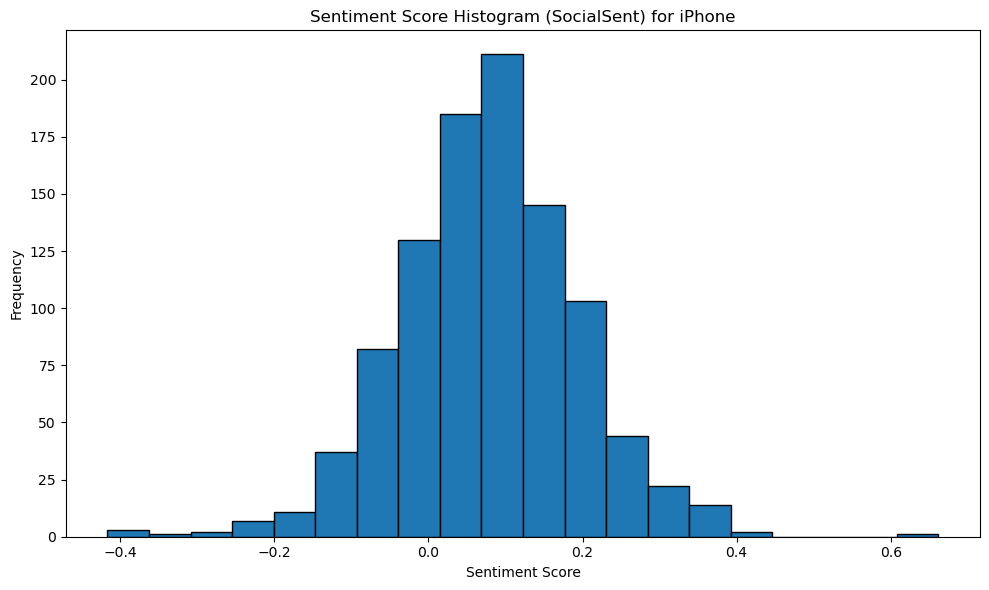

In [325]:
plt.figure(figsize=(10, 6))
plt.hist(df_iphone['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [326]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Literally iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones on top of iPhones
---------------------------------------------------------------------------------------------------
1 I really love and appreciate your Sarah it makes my day when I watch them ❤️ keep doing the amazing contact you are doing right now I love you so much you are my number 1 fan and I wish I could meet you one day I would be so happy and pleased ever ❤️❤️❤️ I wish you all the best out there.... Love your iPhone contact I just wish I day if you do a giveaway I could win because it's been years

In [327]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 To be honest, this is nonsense , we have a lot of people in Moscow with 14 promax, they are already sick of them , we have too many of them, the characteristics of the iPhone are just terrible why facetime when there is discord ? this is at least brad, you buy a phone that charges for an hour and then more, my phone charges in 4 minutes from 20 to 100% and I, even having all the money in the world, have never switched from my smartphone to the flagships from the iPhone, it's just terrible.
---------------------------------------------------------------------------------------------------
1 The reason I promised myself I will never buy a Samsung device was their customer service that it was so terrible. They were so terrible at that time I needed them most. They made me feel so angry that from a loyalist they made me abandon them and get an iPhone (that I used to hate) the next day and never looked back. Since 2015 I had only 2 problems and Apple got me covered 100% in a day time. I s

In [328]:
# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_iphone


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1686458130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
4000  iPhone  I was an android user for years, I even worked...   
4001  iPhone  The first Apple product I bought was a MacBook...   
4002  iPhone  I will say I agree with all these points. I wi...   
4003  iPhone  None!!!!     Here is why!   Be very careful !\...   
4004  iPhone  9:31 This level of control is definitely irrit...   
...      ...                                                ...   
4995  iPhone  If someone likes Apple devices that's their ch...   
4996  iPhone  I'm going to buy an iphone this year to see ho...   
4997  iPhone  I made the jump to iphone last month. It's bee...   
4998  iPhone  Bro explaining the macroeconomics of Apple and...   
4999  iPhone  Can someone help me? \nI want a new Pro phone....   

                                        Cleaned_Comment  \
4000  andros user year even worked apple owned one y...   
4001  first apple product bought macbook three year ...   
4002  say agree point say iphone thing better tying ...   
4003  one careful posting watching video share exper...   
4004  size size level control definitely irritating ...   
...                                                 ...   
4995  someone like apple device choice convinced eve...   
4996  going buy iphone year see reform feel since ne...   
4997  made jump iphone last month rocky road samsung...   
4998  bro explaining macroeconomics apple additional...   
4999  someone help want new pro phone either wait ip...   

                                      Sentiment_Comment  Length  \
4000  I was an andros user for years , I even worked...    3047   
4001  The first Apple product I bought was a MacBook...    2557   
4002  I will say I agree with all these points . I w...    2487   
4003  One ! ! ! ! Here is why ! He very careful ! I ...    2215   
4004  [ SIZE ] : [ SIZE ] This level of control is d...    2171   
...                                                 ...     ...   
4995  If someone likes Apple devices that is their c...     367   
4996  I am going to buy an iphone this year to see h...     367   
4997  I made the jump to iphone last month . It is b...     367   
4998  Bro explaining the macroeconomics of Apple and...     366   
4999  An someone help me ? I want a new Pro phone . ...     366   

                                      Tokenized_Comment  Topic  \
4000  [andros, user, year, even, worked, apple, owne...      4   
4001  [first, apple, product, bought, macbook, three...      4   
4002  [say, agree, point, say, iphone, thing, better...      1   
4003  [one, careful, posting, watching, video, share...      3   
4004  [size, size, level, control, definitely, irrit...      4   
...                                                 ...    ...   
4995  [someone, like, apple, device, choice, convinc...      2   
4996  [going, buy, iphone, year, see, reform, feel, ...      4   
4997  [made, jump, iphone, last, month, rocky, road,...      0   
4998  [bro, explaining, macroeconomics, apple, addit...      2   
4999  [someone, help, want, new, pro, phone, either,...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000               -0.3105                Negative                Positive   
4001                0.9696                Positive                Positive   
4002                0.9984                Positive                Positive   
4003                0.4977                Positive                Positive   
4004                0.9551                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.8375                Negative                 Neutral   
4996                0.2263                Positive                Positive   
4997               -0.0799                Negative                Positive   
4998                0.0609                Positive                Positive   
4999                0.8488          

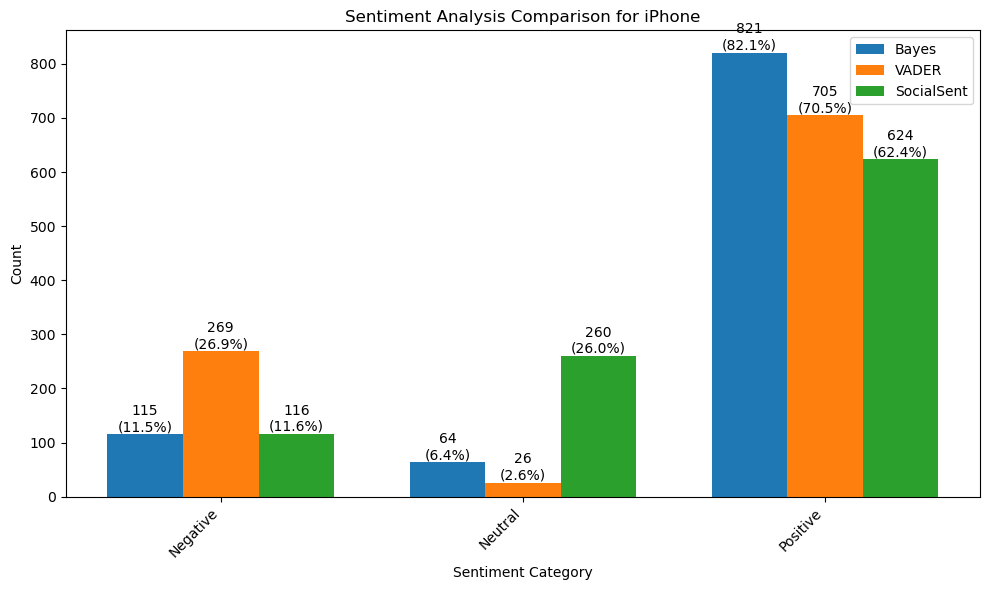

In [329]:
vader_counts = df_iphone['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_iphone['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_iphone['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPhone')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.2. Macbook***

In [330]:
df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2924118264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)


Search                                            Comment  \
2000  Macbook  Years ago we did a test, in 2007 - a Dell lapt...   
2001  Macbook  I always enjoy your videos regarding Apple pro...   
2002  Macbook  Apple should've done three things:\n\n1. Make ...   
2003  Macbook  Excellent presentation. I used both. My first ...   
2004  Macbook  The problem comes down to software. The M1 Mac...   
...       ...                                                ...   
2995  Macbook  Your video saved me tears! I bought the latest...   
2996  Macbook  Im deciding between The 15in Air and 14in Macb...   
2997  Macbook  very true bro! i have the same problem... in s...   
2998  Macbook  Still trying to figure out why I need one of t...   
2999  Macbook  Been a professional video editor for 20 years ...   

                                        Cleaned_Comment  \
2000  year ago test size well lawton loading current...   
2001  always enjoy video regarding apple product non...   
2002  apple done three thing size take size watt cha...   
2003  excellent presentation used first sac apple re...   
2004  problem come software sac especially max game ...   
...                                                 ...   
2995  video saved tear bought latest macbook pro siz...   
2996  deciding air macbook pro need something school...   
2997  true bro problem summary use prefer window rea...   
2998  still trying figure need one seven year old ma...   
2999  professional video editor size year would reas...   

                                      Sentiment_Comment  Length  \
2000  Years ago we did a test , in [ SIZE ] - a Well...    7521   
2001  I always enjoy your video regarding Apple prod...    4753   
2002  Apple should have done three things : [ SIZE ]...    4450   
2003  Excellent presentation . I used both . My firs...    3728   
2004  The problem comes down to software . The Of Sa...    3682   
...                                                 ...     ...   
2995  Your video saved me tears ! I bought the lates...     276   
2996  I Am deciding between The in Air and in Macboo...     275   
2997  very true bro ! i have the same problem . . . ...     275   
2998  Still trying to figure out why I need one of t...     275   
2999  Been a professional video editor for [ SIZE ] ...     275   

                                      Tokenized_Comment  Topic  \
2000  [year, ago, test, size, well, lawton, loading,...      3   
2001  [always, enjoy, video, regarding, apple, produ...      3   
2002  [apple, done, three, thing, size, take, size, ...      3   
2003  [excellent, presentation, used, first, sac, ap...      2   
2004  [problem, come, software, sac, especially, max...      2   
...                                                 ...    ...   
2995  [video, saved, tear, bought, latest, macbook, ...      2   
2996  [deciding, air, macbook, pro, need, something,...      3   
2997  [true, bro, problem, summary, use, prefer, win...      3   
2998  [still, trying, figure, need, one, seven, year...      3   
2999  [professional, video, editor, size, year, woul...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9961                Positive                Positive   
2001                0.9968                Positive                Positive   
2002                0.9716                Positive                Positive   
2003                0.9939                Positive                Positive   
2004                0.9952                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.3578                Positive                Positive   
2996                0.5927                Positive                 Neutral   
2997                0.8477                Positive                Positive   
2998                0.3818                Positive                Positive   
2999                0.077

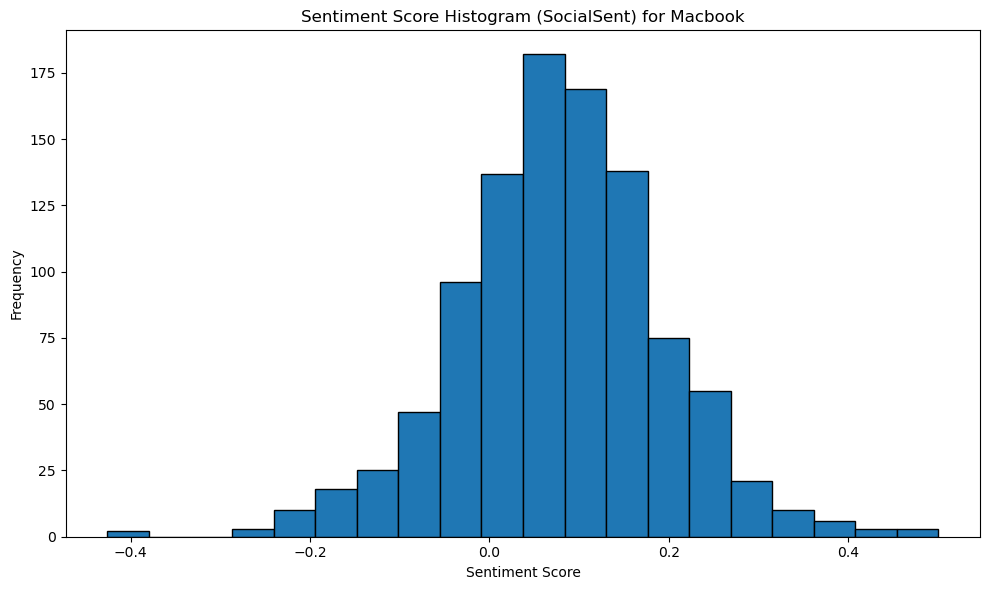

In [331]:
plt.figure(figsize=(10, 6))
plt.hist(df_mac['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [332]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 We have to be honest : NOBODY's doing a laptop like Apple on the build quality and all. Did keep my old macbook pro 10 years it was so good.

Now, I'm a 3D artist and I'd love to return to mac. But even with M2 Max, they told was great for 3D, and Blender was not having it at all on the videos I saw... I would love it to work A1 in Blender, instant buy for me.
---------------------------------------------------------------------------------------------------
1 Hi Marques, I have now a Macbook Pro 2017 Touch Bar i5 with 8gbRAM. I am noticing limitations when I am editing photos on Lightroom Classic (slow performance and also new features are not available). Do You think that the Macbook Air M2 with 16gb ram would be ok? Or I buy the macbook Pro M1 refurbished for a similar price? Thanks
---------------------------------------------------------------------------------------------------
2 i just want a macbook pro who does the job very right in photoshop and lightroom. And yes i'm on th

In [333]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I have the MacBook Air 15 inch with 24gb ram and 256 ssd and i upgraded from my 2020 intel MacBook Air and its an absolute beast! Ive been getting a lot criticism and judged by my custom configuration which I don’t know it makes people upset, i went with that cause not only I benefit from a bigger screen but for me its portable form my point of view, especially with the education student discount, but i guess there will always be haters hating about the MacBook Air 15
---------------------------------------------------------------------------------------------------
1 I had MacBook air 2020, Worst mistake i have ever made 😢😢😢, specs are fancy to hear, but in reality, macbook air is not more than a tablet with keyboard 😅, with very expensive service charges. 4k editing is not that smooth as they show in these videos, in less than 1200$ models.  whereas windows is a beast at this budget level ..  don't let these tech channels fool you 😭
-------------------------------------------------

In [334]:
# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_mac


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2596257996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
2000  Macbook  Years ago we did a test, in 2007 - a Dell lapt...   
2001  Macbook  I always enjoy your videos regarding Apple pro...   
2002  Macbook  Apple should've done three things:\n\n1. Make ...   
2003  Macbook  Excellent presentation. I used both. My first ...   
2004  Macbook  The problem comes down to software. The M1 Mac...   
...       ...                                                ...   
2995  Macbook  Your video saved me tears! I bought the latest...   
2996  Macbook  Im deciding between The 15in Air and 14in Macb...   
2997  Macbook  very true bro! i have the same problem... in s...   
2998  Macbook  Still trying to figure out why I need one of t...   
2999  Macbook  Been a professional video editor for 20 years ...   

                                        Cleaned_Comment  \
2000  year ago test size well lawton loading current...   
2001  always enjoy video regarding apple product non...   
2002  apple done three thing size take size watt cha...   
2003  excellent presentation used first sac apple re...   
2004  problem come software sac especially max game ...   
...                                                 ...   
2995  video saved tear bought latest macbook pro siz...   
2996  deciding air macbook pro need something school...   
2997  true bro problem summary use prefer window rea...   
2998  still trying figure need one seven year old ma...   
2999  professional video editor size year would reas...   

                                      Sentiment_Comment  Length  \
2000  Years ago we did a test , in [ SIZE ] - a Well...    7521   
2001  I always enjoy your video regarding Apple prod...    4753   
2002  Apple should have done three things : [ SIZE ]...    4450   
2003  Excellent presentation . I used both . My firs...    3728   
2004  The problem comes down to software . The Of Sa...    3682   
...                                                 ...     ...   
2995  Your video saved me tears ! I bought the lates...     276   
2996  I Am deciding between The in Air and in Macboo...     275   
2997  very true bro ! i have the same problem . . . ...     275   
2998  Still trying to figure out why I need one of t...     275   
2999  Been a professional video editor for [ SIZE ] ...     275   

                                      Tokenized_Comment  Topic  \
2000  [year, ago, test, size, well, lawton, loading,...      3   
2001  [always, enjoy, video, regarding, apple, produ...      3   
2002  [apple, done, three, thing, size, take, size, ...      3   
2003  [excellent, presentation, used, first, sac, ap...      2   
2004  [problem, come, software, sac, especially, max...      2   
...                                                 ...    ...   
2995  [video, saved, tear, bought, latest, macbook, ...      2   
2996  [deciding, air, macbook, pro, need, something,...      3   
2997  [true, bro, problem, summary, use, prefer, win...      3   
2998  [still, trying, figure, need, one, seven, year...      3   
2999  [professional, video, editor, size, year, woul...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9961                Positive                Positive   
2001                0.9968                Positive                Positive   
2002                0.9716                Positive                Positive   
2003                0.9939                Positive                Positive   
2004                0.9952                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.3578                Positive                Positive   
2996                0.5927                Positive                 Neutral   
2997                0.8477                Positive                Positive   
2998                0.3818                Positive                Positive   
2999                0.077

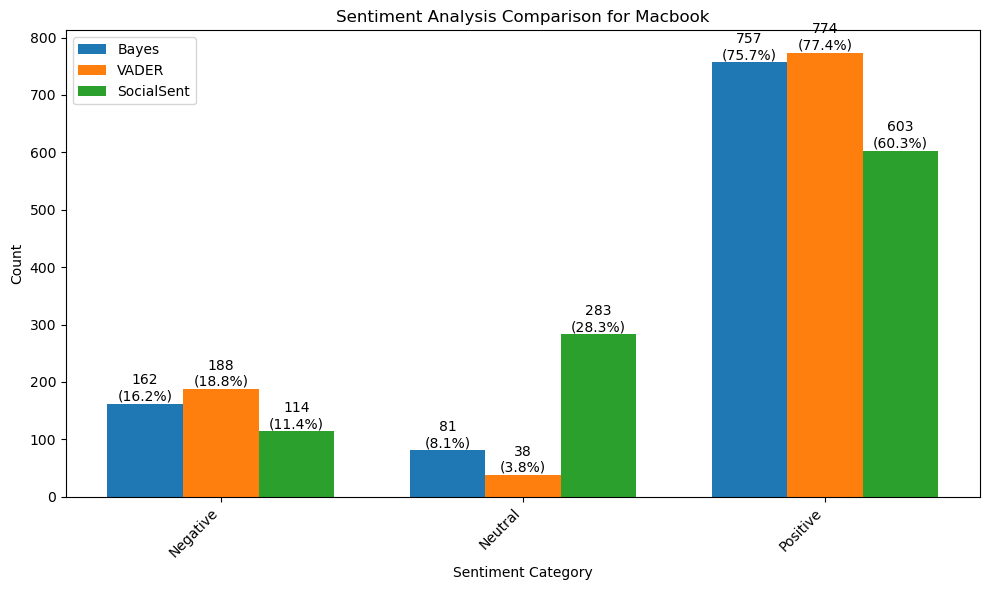

In [335]:
vader_counts = df_mac['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_mac['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_mac['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Macbook')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.3. iPad***

In [336]:
df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1361102979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)


Search                                            Comment  \
3000   iPad  His mom: Earth is the third planet from the Su...   
3001   iPad  iPad (TCS4) Lyrics\r\n[Verse 1]\r\nI go throug...   
3002   iPad  Nobody needs damn extra keyboards and pencils ...   
3003   iPad  I've gone through such a rollercoaster with th...   
3004   iPad  As far as Photoshop/Photo Editing goes, one of...   
...     ...                                                ...   
3995   iPad  “Most confusing iPad lineup” you guys say that...   
3996   iPad  Honestly it’s so true I have an 2018 iPad Pro,...   
3997   iPad  Great review Pete, thank you. Can I just ask, ...   
3998   iPad  I don't agree with you. I and most people don'...   
3999   iPad  I'm still rocking the iPad mini 2... and since...   

                                        Cleaned_Comment  \
3000  mon earth third planet run place known univers...   
3001  ipad tcs4 serics verse size go ipad looking so...   
3002  nobody need damn extra keyboard pencil sure pe...   
3003  gone rollercoaster original intention get ipho...   
3004  far photoshop photo editing go one greatest fe...   
...                                                 ...   
3995  confusing ipad line ” gun say every single tim...   
3996  honestly true size ipad pro got loved screen s...   
3997  great review fete thank ask would use ipad min...   
3998  agree people need 256gb surf web watch youtube...   
3999  still rocking ipad mind size since lagging lat...   

                                      Sentiment_Comment  Length  \
3000  His mon : Earth is the third planet from the R...    5540   
3001  iPad ( TCS4 ) Serics [ Verse [ SIZE ] ] I go t...    5138   
3002  Nobody needs damn extra keyboard and pencils t...    5022   
3003  I have gone through such a rollercoaster with ...    3877   
3004  Is far as Photoshop / Photo Editing goes , one...    2887   
...                                                 ...     ...   
3995  “ Most confusing iPad line ” you guns say that...     388   
3996  Honestly it is so true I have an [ SIZE ] iPad...     388   
3997  Great review Fete , thank you . An I just ask ...     387   
3998  I do not agree with you . I and most people do...     387   
3999  I am still rocking the iPad mind [ SIZE ] . . ...     387   

                                      Tokenized_Comment  Topic  \
3000  [mon, earth, third, planet, run, place, known,...      1   
3001  [ipad, tcs4, serics, verse, size, go, ipad, lo...      4   
3002  [nobody, need, damn, extra, keyboard, pencil, ...      0   
3003  [gone, rollercoaster, original, intention, get...      1   
3004  [far, photoshop, photo, editing, go, one, grea...      0   
...                                                 ...    ...   
3995  [confusing, ipad, line, ”, gun, say, every, si...      0   
3996  [honestly, true, size, ipad, pro, got, loved, ...      0   
3997  [great, review, fete, thank, ask, would, use, ...      4   
3998  [agree, people, need, 256gb, surf, web, watch,...      0   
3999  [still, rocking, ipad, mind, size, since, lagg...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9520                Positive                Positive   
3001                0.9980                Positive                Positive   
3002                0.9963                Positive                Positive   
3003                0.9989                Positive                Positive   
3004                0.9978                Positive                Positive   
...                    ...                     ...                     ...   
3995               -0.7636                Negative                Positive   
3996                0.9650                Positive                Positive   
3997                0.6310                Positive                Positive   
3998                0.7087                Positive                Negative   
3999                0.8954                Posit

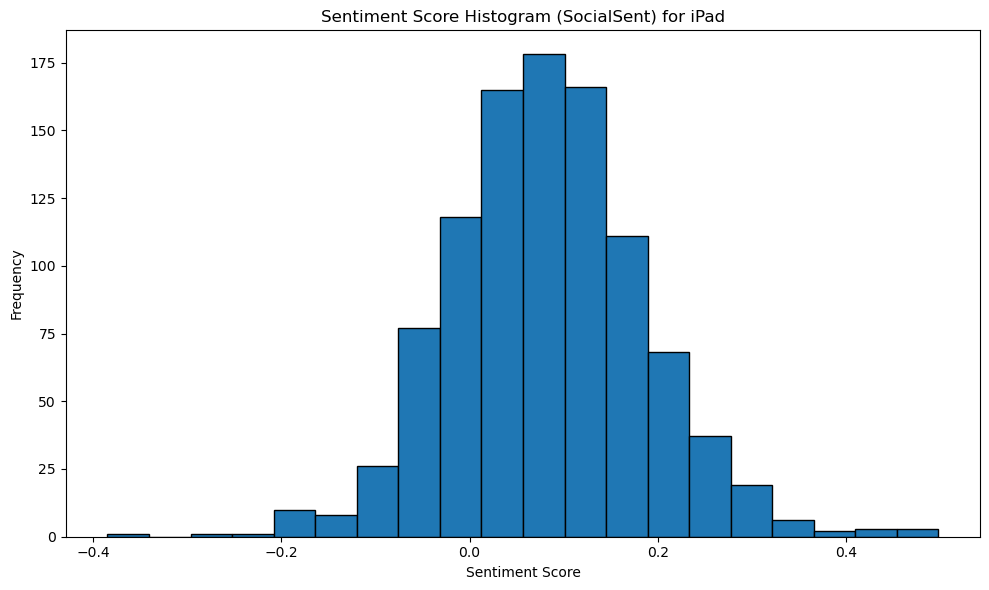

In [337]:
plt.figure(figsize=(10, 6))
plt.hist(df_ipad['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [338]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 thank you sarah so muchhhhh,you are the best person in the world and even if i will not win i will be so happy for the person who will  but this is why i need an ipad ,it doesn’t matter which one it will be  ,i am an 12 years old artist and twell i do great digital art and well i don’t have an ipad anymore and to be honest unfortunately i can not effort any new one so i would love to have a new one from you ❤️❤️❤️❤️❤️
---------------------------------------------------------------------------------------------------
1 As a uni student, the first semester I used all pen and paper - I did own an iPad Pro at the time but didn’t have an Apple Pencil or a good note taking app… I took the plunge and it was worth it - 2nd semester and beyond, all my notes were together and easy to find so I would recommend it if you get the accessories - I should note that I’m a music student so I do need my laptop as well for writing music but that stays at home and my iPad goes to uni…
-------------------

In [339]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 just bought the mini after debating with the air. honestly regretting and trying to make a decision whether to refund it. i LOOVE the size which is the only thing that made me want it but now the screen size is struggle for me, practically. writing notes has been a pain. i multitask a lot and am now realising i should’ve got the air. atm the air with the student deal is actually cheaper than the ipad mini with the airpods so. i wouldn’t be spending anymore. i just hate how big and bulky the other ipads feel 😭 i just can’t write notes like this anymore lol
---------------------------------------------------------------------------------------------------
1 I don’t get why everyone is ripping on apple here. They just quietly release as small update to the iPad and everyone upset there wasn’t more to it. 

Had they done nothing they wouldn’t have drawn any criticism. All that’s being accomplished with these videos is making it less likely to keep things updated with minor new releases. 

In [340]:
# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_ipad


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1972745783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
3000   iPad  His mom: Earth is the third planet from the Su...   
3001   iPad  iPad (TCS4) Lyrics\r\n[Verse 1]\r\nI go throug...   
3002   iPad  Nobody needs damn extra keyboards and pencils ...   
3003   iPad  I've gone through such a rollercoaster with th...   
3004   iPad  As far as Photoshop/Photo Editing goes, one of...   
...     ...                                                ...   
3995   iPad  “Most confusing iPad lineup” you guys say that...   
3996   iPad  Honestly it’s so true I have an 2018 iPad Pro,...   
3997   iPad  Great review Pete, thank you. Can I just ask, ...   
3998   iPad  I don't agree with you. I and most people don'...   
3999   iPad  I'm still rocking the iPad mini 2... and since...   

                                        Cleaned_Comment  \
3000  mon earth third planet run place known univers...   
3001  ipad tcs4 serics verse size go ipad looking so...   
3002  nobody need damn extra keyboard pencil sure pe...   
3003  gone rollercoaster original intention get ipho...   
3004  far photoshop photo editing go one greatest fe...   
...                                                 ...   
3995  confusing ipad line ” gun say every single tim...   
3996  honestly true size ipad pro got loved screen s...   
3997  great review fete thank ask would use ipad min...   
3998  agree people need 256gb surf web watch youtube...   
3999  still rocking ipad mind size since lagging lat...   

                                      Sentiment_Comment  Length  \
3000  His mon : Earth is the third planet from the R...    5540   
3001  iPad ( TCS4 ) Serics [ Verse [ SIZE ] ] I go t...    5138   
3002  Nobody needs damn extra keyboard and pencils t...    5022   
3003  I have gone through such a rollercoaster with ...    3877   
3004  Is far as Photoshop / Photo Editing goes , one...    2887   
...                                                 ...     ...   
3995  “ Most confusing iPad line ” you guns say that...     388   
3996  Honestly it is so true I have an [ SIZE ] iPad...     388   
3997  Great review Fete , thank you . An I just ask ...     387   
3998  I do not agree with you . I and most people do...     387   
3999  I am still rocking the iPad mind [ SIZE ] . . ...     387   

                                      Tokenized_Comment  Topic  \
3000  [mon, earth, third, planet, run, place, known,...      1   
3001  [ipad, tcs4, serics, verse, size, go, ipad, lo...      4   
3002  [nobody, need, damn, extra, keyboard, pencil, ...      0   
3003  [gone, rollercoaster, original, intention, get...      1   
3004  [far, photoshop, photo, editing, go, one, grea...      0   
...                                                 ...    ...   
3995  [confusing, ipad, line, ”, gun, say, every, si...      0   
3996  [honestly, true, size, ipad, pro, got, loved, ...      0   
3997  [great, review, fete, thank, ask, would, use, ...      4   
3998  [agree, people, need, 256gb, surf, web, watch,...      0   
3999  [still, rocking, ipad, mind, size, since, lagg...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9520                Positive                Positive   
3001                0.9980                Positive                Positive   
3002                0.9963                Positive                Positive   
3003                0.9989                Positive                Positive   
3004                0.9978                Positive                Positive   
...                    ...                     ...                     ...   
3995               -0.7636                Negative                Positive   
3996                0.9650                Positive                Positive   
3997                0.6310                Positive                Positive   
3998                0.7087                Positive                Negative   
3999                0.8954                Posit

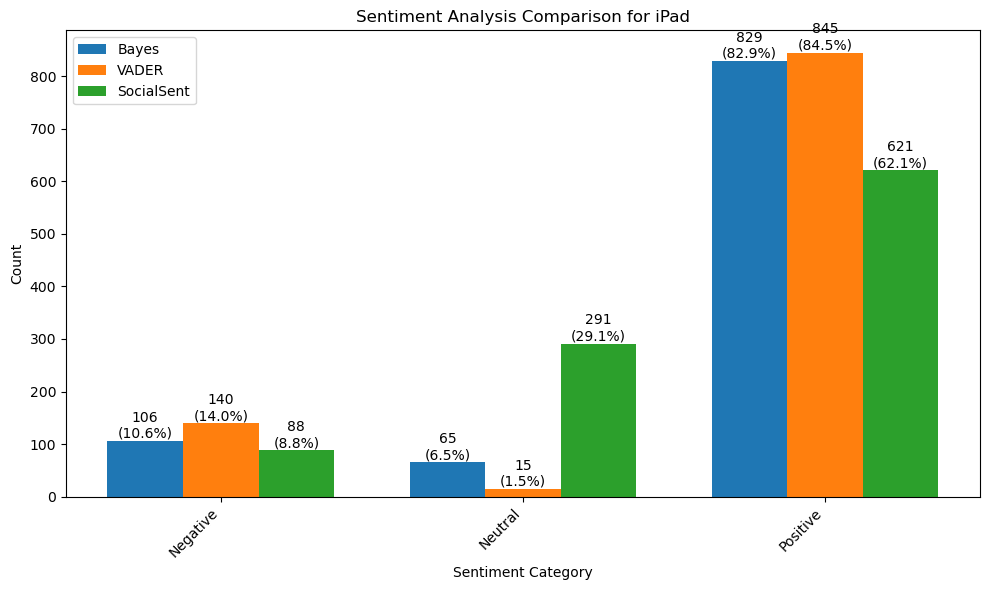

In [341]:
vader_counts = df_ipad['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_ipad['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_ipad['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPad')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.4. AirPods***

In [342]:
df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1246500405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)


Search                                            Comment  \
0    AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1    AirPods  I really appreciate your in-depth knowledge re...   
2    AirPods  If you use multiple Apple products like iPhone...   
3    AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4    AirPods  i just confirmed the lossless feature with an ...   
..       ...                                                ...   
995  AirPods  I have the Coca Cola AirPods case it’s shaped ...   
996  AirPods  Why m i watching this even though I hv this ai...   
997  AirPods  I’m watching this with my AirPods in n it alwa...   
998  AirPods  AirPods Pro 2 are dope. Noise cancellation and...   
999  AirPods  How would you compare the knockies to the regu...   

                                       Cleaned_Comment  \
0    bought fake gen airpod last week lookwise yes ...   
1    really appreciate depth knowledge regarding ai...   
2    use multiple apple product like iphone ipad ma...   
3    got airpods pro size using iphone andros phone...   
4    confirmed lossless feature apple executive app...   
..                                                 ...   
995       local old airpods case shaped like local old   
996               watching even though airpods pro gen   
997                  watching airpods n always falling   
998  airpods pro size done noise cancellation sound...   
999    would compare knocked regular airpods size size   

                                     Sentiment_Comment  Length  \
0    I bought a fake and gen airpod last week . . l...    1232   
1    I really appreciate your in - depth knowledge ...     908   
2    If you use multiple Apple products like iPhone...     886   
3    Just got AirPods Pro [ SIZE ] - using on an iP...     861   
4    i just confirmed the lossless feature with an ...     809   
..                                                 ...     ...   
995  I have the Local Old AirPods case it is shaped...      66   
996  Why m i watching this even though I he this ai...      66   
997  I am watching this with my AirPods in n it alw...      66   
998  AirPods Pro [ SIZE ] are done . Noise cancella...      66   
999  Now would you compare the knocked to the regul...      66   

                                     Tokenized_Comment  Topic  \
0    [bought, fake, gen, airpod, last, week, lookwi...      3   
1    [really, appreciate, depth, knowledge, regardi...      1   
2    [use, multiple, apple, product, like, iphone, ...      3   
3    [got, airpods, pro, size, using, iphone, andro...      0   
4    [confirmed, lossless, feature, apple, executiv...      3   
..                                                 ...    ...   
995  [local, old, airpods, case, shaped, like, loca...      0   
996        [watching, even, though, airpods, pro, gen]      0   
997            [watching, airpods, n, always, falling]      4   
998  [airpods, pro, size, done, noise, cancellation...      0   
999  [would, compare, knocked, regular, airpods, si...      3   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                 -0.9562                Negative                Positive   
1                  0.9808                Positive                Positive   
2                 -0.6964                Negative                Positive   
3                  0.9792                Positive                Positive   
4                 -0.4556                Negative                Positive   
..                    ...                     ...                     ...   
995                0.3612                Positive                 Neutral   
996                0.0000                 Neutral                 Neutral   
997               -0.1531                Negative                 Neutral   
998                0.7384                Positive                Positive   
999                0.0000                 Neutral                 Neutral   

     

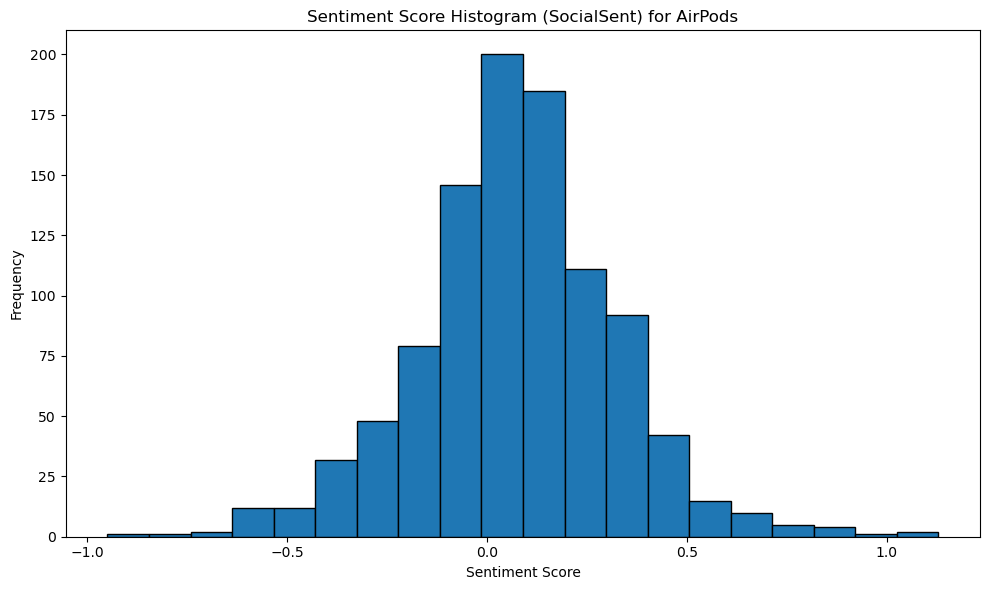

In [343]:
plt.figure(figsize=(10, 6))
plt.hist(df_airpods['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [344]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 thank god ive been needing an upgrade but I hate the squishy AirPods pros
---------------------------------------------------------------------------------------------------
1 So beautiful... I mean the Airpods not you Justine, you are beautiful beyond words
---------------------------------------------------------------------------------------------------
2 A beautiful airpods 3 very nice video thank you so much Justine you so beautiful
---------------------------------------------------------------------------------------------------
3 Today is my birthday 🥳 and I had to get this AirPods also my first AirPods
---------------------------------------------------------------------------------------------------
4 I had them for my birthday yesterday. The audio quality is amazing! I was like what.. what is that? I switched from AirPods 2 gen (classic) to the pro. I was amazed by the audio, the bass, the spatial audio.. shit
---------------------------------------------------------------

In [345]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Can i get one of those airpods or pros as im sick of wired headphones
---------------------------------------------------------------------------------------------------
1 lol... airpods called "KNOCKIES".... how terrible can advertising go !
---------------------------------------------------------------------------------------------------
2 When your listening to this with AirPods: 👁👅👁 Edit: ty for 100 likes
---------------------------------------------------------------------------------------------------
3 it would be good to have customized airpods as pikachu and a pokeball case
---------------------------------------------------------------------------------------------------
4 My AirPods pros have the wiggly lid and I went back to the Applestore and they had the same problem. It makes minor clickish sound
---------------------------------------------------------------------------------------------------
5 Why do you use the stupid AirPods will damage your ears use AirPods Max 

In [346]:
# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_airpods


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1346995673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
0    AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1    AirPods  I really appreciate your in-depth knowledge re...   
2    AirPods  If you use multiple Apple products like iPhone...   
3    AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4    AirPods  i just confirmed the lossless feature with an ...   
..       ...                                                ...   
995  AirPods  I have the Coca Cola AirPods case it’s shaped ...   
996  AirPods  Why m i watching this even though I hv this ai...   
997  AirPods  I’m watching this with my AirPods in n it alwa...   
998  AirPods  AirPods Pro 2 are dope. Noise cancellation and...   
999  AirPods  How would you compare the knockies to the regu...   

                                       Cleaned_Comment  \
0    bought fake gen airpod last week lookwise yes ...   
1    really appreciate depth knowledge regarding ai...   
2    use multiple apple product like iphone ipad ma...   
3    got airpods pro size using iphone andros phone...   
4    confirmed lossless feature apple executive app...   
..                                                 ...   
995       local old airpods case shaped like local old   
996               watching even though airpods pro gen   
997                  watching airpods n always falling   
998  airpods pro size done noise cancellation sound...   
999    would compare knocked regular airpods size size   

                                     Sentiment_Comment  Length  \
0    I bought a fake and gen airpod last week . . l...    1232   
1    I really appreciate your in - depth knowledge ...     908   
2    If you use multiple Apple products like iPhone...     886   
3    Just got AirPods Pro [ SIZE ] - using on an iP...     861   
4    i just confirmed the lossless feature with an ...     809   
..                                                 ...     ...   
995  I have the Local Old AirPods case it is shaped...      66   
996  Why m i watching this even though I he this ai...      66   
997  I am watching this with my AirPods in n it alw...      66   
998  AirPods Pro [ SIZE ] are done . Noise cancella...      66   
999  Now would you compare the knocked to the regul...      66   

                                     Tokenized_Comment  Topic  \
0    [bought, fake, gen, airpod, last, week, lookwi...      3   
1    [really, appreciate, depth, knowledge, regardi...      1   
2    [use, multiple, apple, product, like, iphone, ...      3   
3    [got, airpods, pro, size, using, iphone, andro...      0   
4    [confirmed, lossless, feature, apple, executiv...      3   
..                                                 ...    ...   
995  [local, old, airpods, case, shaped, like, loca...      0   
996        [watching, even, though, airpods, pro, gen]      0   
997            [watching, airpods, n, always, falling]      4   
998  [airpods, pro, size, done, noise, cancellation...      0   
999  [would, compare, knocked, regular, airpods, si...      3   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                 -0.9562                Negative                Positive   
1                  0.9808                Positive                Positive   
2                 -0.6964                Negative                Positive   
3                  0.9792                Positive                Positive   
4                 -0.4556                Negative                Positive   
..                    ...                     ...                     ...   
995                0.3612                Positive                 Neutral   
996                0.0000                 Neutral                 Neutral   
997               -0.1531                Negative                 Neutral   
998                0.7384                Positive                Positive   
999                0.0000                 Neutral                 Neutral   

     

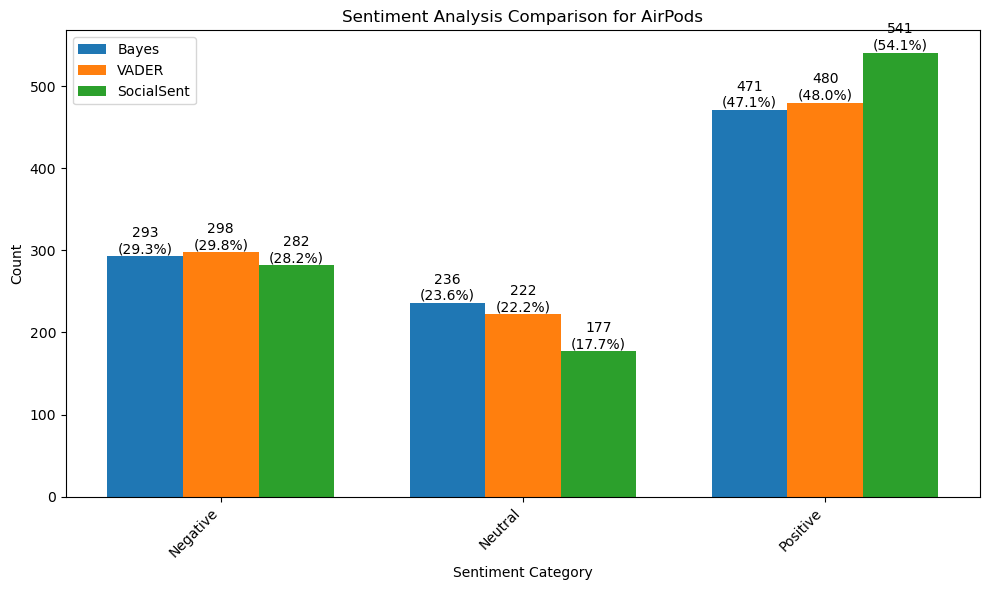

In [347]:
vader_counts = df_airpods['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_airpods['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_airpods['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for AirPods')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.5. Apple Watch***

In [348]:
df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/3320060839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)


Search                                            Comment  \
1000  Apple Watch  last year i took a break from apple... i got t...   
1001  Apple Watch  One thing no reviewer seems to cover is the di...   
1002  Apple Watch  🎯 Key Takeaways for quick navigation:\n\n00:13...   
1003  Apple Watch  I'm absolutely the audience for this. I'm a qu...   
1004  Apple Watch  Having an Apple iWatch was one of my dreams an...   
...           ...                                                ...   
1995  Apple Watch  I can’t imagine life without my Apple Watch! I...   
1996  Apple Watch  well i think to switch to apple watch, we have...   
1997  Apple Watch  @janssen_aquilino\n\nHi Dion, great and inform...   
1998  Apple Watch  Today I put my series 8 Apple Watch on my wris...   
1999  Apple Watch  Thank you for your clear,concise explanations,...   

                                        Cleaned_Comment  \
1000  last year took break apple got fixed size pro ...   
1001  one thing reviewed seems cover discomfort leve...   
1002  key takeaway quick navigation size size apple ...   
1003  absolutely audience qualified river recreation...   
1004  apple watch one dream month march size dream b...   
...                                                 ...   
1995  imagine life without apple watch use sleep cra...   
1996  well think switch apple watch disappointed wat...   
1997  janssenaquilino hi lion great information vide...   
1998  today put series size apple watch wrist forgot...   
1999  thank clear concise explanation would great le...   

                                      Sentiment_Comment  Length  \
1000  last year i took a break from apple . . . i go...    2209   
1001  One thing no reviewed seems to cover is the di...    1994   
1002  🎯 Key Takeaways for quick navigation : [ SIZE ...    1824   
1003  I am absolutely the audience for this . I am a...    1786   
1004  Having an Apple watch was one of my dreams and...    1764   
...                                                 ...     ...   
1995  I cannot imagine life without my Apple Watch !...     166   
1996  well i think to switch to apple watch , we hav...     166   
1997  @ janssen_aquilino Hi Lion , great and informa...     166   
1998  Today I put my series [ SIZE ] Apple Watch on ...     165   
1999  Thank you for your clear , concise explanation...     165   

                                      Tokenized_Comment  Topic  \
1000  [last, year, took, break, apple, got, fixed, s...      3   
1001  [one, thing, reviewed, seems, cover, discomfor...      3   
1002  [key, takeaway, quick, navigation, size, size,...      4   
1003  [absolutely, audience, qualified, river, recre...      1   
1004  [apple, watch, one, dream, month, march, size,...      0   
...                                                 ...    ...   
1995  [imagine, life, without, apple, watch, use, sl...      3   
1996  [well, think, switch, apple, watch, disappoint...      1   
1997  [janssenaquilino, hi, lion, great, information...      3   
1998  [today, put, series, size, apple, watch, wrist...      4   
1999  [thank, clear, concise, explanation, would, gr...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9839                Positive                Positive   
1001               -0.9101                Negative                Positive   
1002                0.9800                Positive                Positive   
1003               -0.9636                Negative                Positive   
1004                0.9905                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.0000                 Neutral                Positive   
1996               -0.3167                Negative                Positive   
1997                0.8070                Positive                 Neutral   
1998                0.3818                Positive         

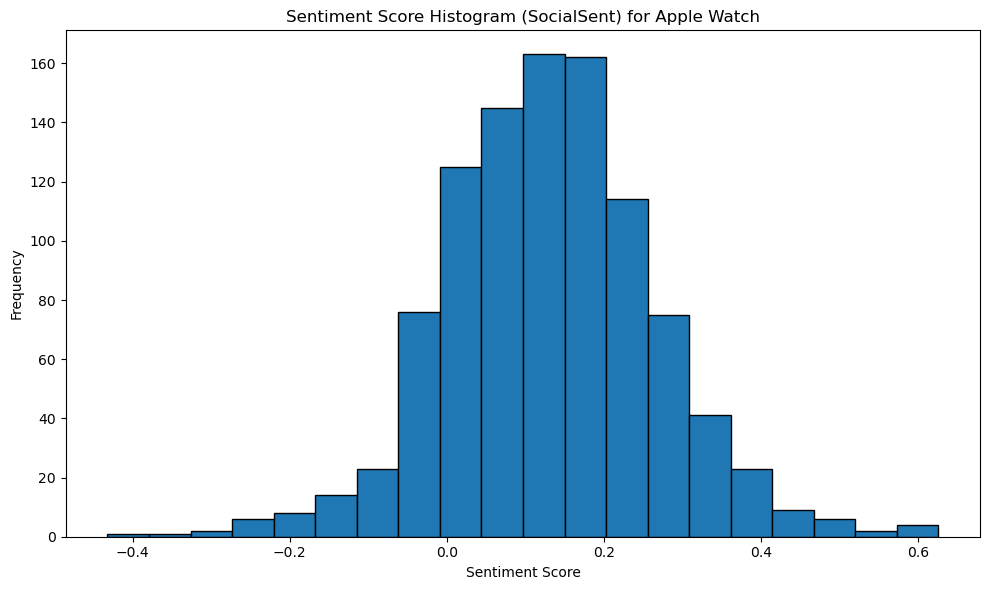

In [349]:
plt.figure(figsize=(10, 6))
plt.hist(df_watch['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [350]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 i am a teenager and my parents are planning to get me an Apple Watch for my birthday. I’ve only had one watch before this and looking at the specs I think se is best for me! Thanks for the vid
---------------------------------------------------------------------------------------------------
1 I would love an E ink version of the Apple Watch that has a rework UI so it's easy to view the UI. Yes e ink and for it to last over a week. The information that I usually get from the face can be in a simpler format.
and a price to match 100usd
---------------------------------------------------------------------------------------------------
2 _vncpdr
 Good day, sir. Thanks for this kind of video. All the features are great, but the one feature I like is the Apple watch and health to monitor your heart rate or your health is great feature for me.
---------------------------------------------------------------------------------------------------
3 Thank you, very helpful! My favorite watchOS 1

In [351]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I'm one of those outsiders. Nothing against Apple. Actually, lots. But that's not the kicker for me. I just think they're ugly. Especially this Ultra version. I've had calculator watches. TV remote watches. G-Shocks. But this, is ugly, looks cheap. I just don't like the look of Apple watches.
---------------------------------------------------------------------------------------------------
1 ive had my series 7 a while now as my first apple watch and i wear it everyday and sometimes i have it off and sometimes feel like i got a notification but i havent got the watch on me lol does anyone else feel this?
---------------------------------------------------------------------------------------------------
2 I still got my series 4 and I can’t think of another way they can improve the watch drastically. Maybe they should’ve came with something game changing like a new shape to the apple watch but then again if they ever changed it all of my watch straps will be useless
-----------------

In [352]:
# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_watch


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/4099690096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
1000  Apple Watch  last year i took a break from apple... i got t...   
1001  Apple Watch  One thing no reviewer seems to cover is the di...   
1002  Apple Watch  🎯 Key Takeaways for quick navigation:\n\n00:13...   
1003  Apple Watch  I'm absolutely the audience for this. I'm a qu...   
1004  Apple Watch  Having an Apple iWatch was one of my dreams an...   
...           ...                                                ...   
1995  Apple Watch  I can’t imagine life without my Apple Watch! I...   
1996  Apple Watch  well i think to switch to apple watch, we have...   
1997  Apple Watch  @janssen_aquilino\n\nHi Dion, great and inform...   
1998  Apple Watch  Today I put my series 8 Apple Watch on my wris...   
1999  Apple Watch  Thank you for your clear,concise explanations,...   

                                        Cleaned_Comment  \
1000  last year took break apple got fixed size pro ...   
1001  one thing reviewed seems cover discomfort leve...   
1002  key takeaway quick navigation size size apple ...   
1003  absolutely audience qualified river recreation...   
1004  apple watch one dream month march size dream b...   
...                                                 ...   
1995  imagine life without apple watch use sleep cra...   
1996  well think switch apple watch disappointed wat...   
1997  janssenaquilino hi lion great information vide...   
1998  today put series size apple watch wrist forgot...   
1999  thank clear concise explanation would great le...   

                                      Sentiment_Comment  Length  \
1000  last year i took a break from apple . . . i go...    2209   
1001  One thing no reviewed seems to cover is the di...    1994   
1002  🎯 Key Takeaways for quick navigation : [ SIZE ...    1824   
1003  I am absolutely the audience for this . I am a...    1786   
1004  Having an Apple watch was one of my dreams and...    1764   
...                                                 ...     ...   
1995  I cannot imagine life without my Apple Watch !...     166   
1996  well i think to switch to apple watch , we hav...     166   
1997  @ janssen_aquilino Hi Lion , great and informa...     166   
1998  Today I put my series [ SIZE ] Apple Watch on ...     165   
1999  Thank you for your clear , concise explanation...     165   

                                      Tokenized_Comment  Topic  \
1000  [last, year, took, break, apple, got, fixed, s...      3   
1001  [one, thing, reviewed, seems, cover, discomfor...      3   
1002  [key, takeaway, quick, navigation, size, size,...      4   
1003  [absolutely, audience, qualified, river, recre...      1   
1004  [apple, watch, one, dream, month, march, size,...      0   
...                                                 ...    ...   
1995  [imagine, life, without, apple, watch, use, sl...      3   
1996  [well, think, switch, apple, watch, disappoint...      1   
1997  [janssenaquilino, hi, lion, great, information...      3   
1998  [today, put, series, size, apple, watch, wrist...      4   
1999  [thank, clear, concise, explanation, would, gr...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9839                Positive                Positive   
1001               -0.9101                Negative                Positive   
1002                0.9800                Positive                Positive   
1003               -0.9636                Negative                Positive   
1004                0.9905                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.0000                 Neutral                Positive   
1996               -0.3167                Negative                Positive   
1997                0.8070                Positive                 Neutral   
1998                0.3818                Positive         

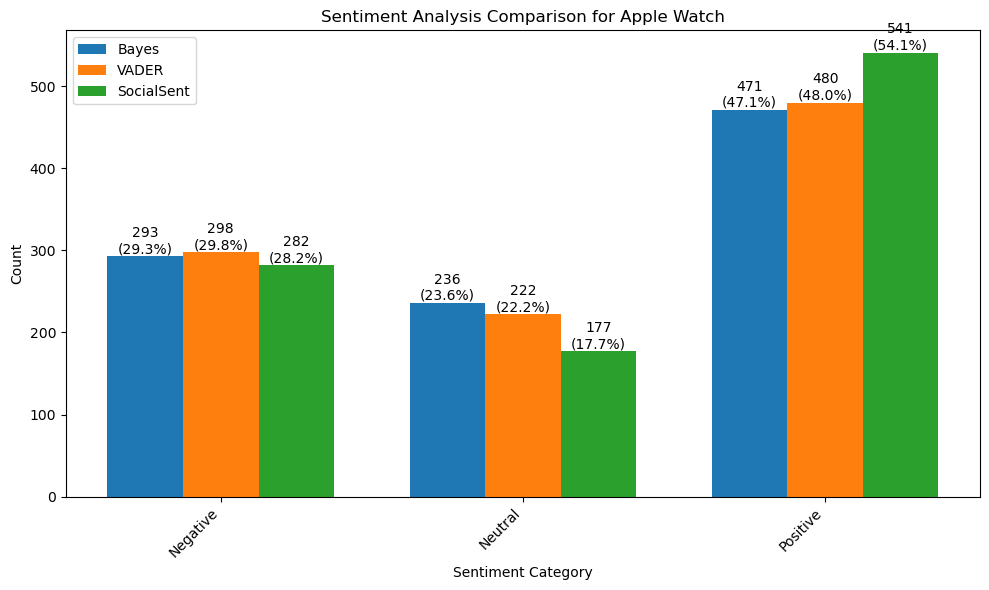

In [353]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_watch' already loaded with the necessary data
# vader_counts = df_watch['SentimentCategory_VADER'].value_counts()
# social_sent_counts = df_watch['SentimentCategory_SocialSent'].value_counts()
# bayes_counts = df_watch['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Apple Watch')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**28. Sentiment analysis with machine learning**

***28.1. iPhone***

In [354]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')

def preprocess(row):
    text = row["Sentiment_Comment"].lower()
    keep = []
    for word in text.split():
        if word in stopwords:
            continue
        if word.startswith("@"):
            continue
        if word.startswith("http"):
            continue
        if word.startswith("#"):
            continue
        if word == "follow":
            continue
        if len(word) <= 1:
            continue
        keep.append(word)
    return ' '.join(keep)

df_iphone["cleaned_text"] = df_iphone.apply(preprocess, axis=1)
df_iphone

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/727507324.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone["cleaned_text"] = df_iphone.apply(preprocess, axis=1)


Search                                            Comment  \
4000  iPhone  I was an android user for years, I even worked...   
4001  iPhone  The first Apple product I bought was a MacBook...   
4002  iPhone  I will say I agree with all these points. I wi...   
4003  iPhone  None!!!!     Here is why!   Be very careful !\...   
4004  iPhone  9:31 This level of control is definitely irrit...   
...      ...                                                ...   
4995  iPhone  If someone likes Apple devices that's their ch...   
4996  iPhone  I'm going to buy an iphone this year to see ho...   
4997  iPhone  I made the jump to iphone last month. It's bee...   
4998  iPhone  Bro explaining the macroeconomics of Apple and...   
4999  iPhone  Can someone help me? \nI want a new Pro phone....   

                                        Cleaned_Comment  \
4000  andros user year even worked apple owned one y...   
4001  first apple product bought macbook three year ...   
4002  say agree point say iphone thing better tying ...   
4003  one careful posting watching video share exper...   
4004  size size level control definitely irritating ...   
...                                                 ...   
4995  someone like apple device choice convinced eve...   
4996  going buy iphone year see reform feel since ne...   
4997  made jump iphone last month rocky road samsung...   
4998  bro explaining macroeconomics apple additional...   
4999  someone help want new pro phone either wait ip...   

                                      Sentiment_Comment  Length  \
4000  I was an andros user for years , I even worked...    3047   
4001  The first Apple product I bought was a MacBook...    2557   
4002  I will say I agree with all these points . I w...    2487   
4003  One ! ! ! ! Here is why ! He very careful ! I ...    2215   
4004  [ SIZE ] : [ SIZE ] This level of control is d...    2171   
...                                                 ...     ...   
4995  If someone likes Apple devices that is their c...     367   
4996  I am going to buy an iphone this year to see h...     367   
4997  I made the jump to iphone last month . It is b...     367   
4998  Bro explaining the macroeconomics of Apple and...     366   
4999  An someone help me ? I want a new Pro phone . ...     366   

                                      Tokenized_Comment  Topic  \
4000  [andros, user, year, even, worked, apple, owne...      4   
4001  [first, apple, product, bought, macbook, three...      4   
4002  [say, agree, point, say, iphone, thing, better...      1   
4003  [one, careful, posting, watching, video, share...      3   
4004  [size, size, level, control, definitely, irrit...      4   
...                                                 ...    ...   
4995  [someone, like, apple, device, choice, convinc...      2   
4996  [going, buy, iphone, year, see, reform, feel, ...      4   
4997  [made, jump, iphone, last, month, rocky, road,...      0   
4998  [bro, explaining, macroeconomics, apple, addit...      2   
4999  [someone, help, want, new, pro, phone, either,...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000               -0.3105                Negative                Positive   
4001                0.9696                Positive                Positive   
4002                0.9984                Positive                Positive   
4003                0.4977                Positive                Positive   
4004                0.9551                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.8375                Negative                 Neutral   
4996                0.2263                Positive                Positive   
4997               -0.0799                Negative                Positive   
4998                0.0609                Positive                Positive   
4999                0.8488          

In [355]:
from textblob.classifiers import NaiveBayesClassifier

train = df_iphone[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.68
Sentiment: Positive


In [356]:
train = df_iphone[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.74
Sentiment: Positive


In [357]:
train = df_iphone[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.635
Sentiment: Positive


***28.2. Macbook***

In [358]:
df_mac["cleaned_text"] = df_mac.apply(preprocess, axis=1)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2514806661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac["cleaned_text"] = df_mac.apply(preprocess, axis=1)


Search                                            Comment  \
2000  Macbook  Years ago we did a test, in 2007 - a Dell lapt...   
2001  Macbook  I always enjoy your videos regarding Apple pro...   
2002  Macbook  Apple should've done three things:\n\n1. Make ...   
2003  Macbook  Excellent presentation. I used both. My first ...   
2004  Macbook  The problem comes down to software. The M1 Mac...   
...       ...                                                ...   
2995  Macbook  Your video saved me tears! I bought the latest...   
2996  Macbook  Im deciding between The 15in Air and 14in Macb...   
2997  Macbook  very true bro! i have the same problem... in s...   
2998  Macbook  Still trying to figure out why I need one of t...   
2999  Macbook  Been a professional video editor for 20 years ...   

                                        Cleaned_Comment  \
2000  year ago test size well lawton loading current...   
2001  always enjoy video regarding apple product non...   
2002  apple done three thing size take size watt cha...   
2003  excellent presentation used first sac apple re...   
2004  problem come software sac especially max game ...   
...                                                 ...   
2995  video saved tear bought latest macbook pro siz...   
2996  deciding air macbook pro need something school...   
2997  true bro problem summary use prefer window rea...   
2998  still trying figure need one seven year old ma...   
2999  professional video editor size year would reas...   

                                      Sentiment_Comment  Length  \
2000  Years ago we did a test , in [ SIZE ] - a Well...    7521   
2001  I always enjoy your video regarding Apple prod...    4753   
2002  Apple should have done three things : [ SIZE ]...    4450   
2003  Excellent presentation . I used both . My firs...    3728   
2004  The problem comes down to software . The Of Sa...    3682   
...                                                 ...     ...   
2995  Your video saved me tears ! I bought the lates...     276   
2996  I Am deciding between The in Air and in Macboo...     275   
2997  very true bro ! i have the same problem . . . ...     275   
2998  Still trying to figure out why I need one of t...     275   
2999  Been a professional video editor for [ SIZE ] ...     275   

                                      Tokenized_Comment  Topic  \
2000  [year, ago, test, size, well, lawton, loading,...      3   
2001  [always, enjoy, video, regarding, apple, produ...      3   
2002  [apple, done, three, thing, size, take, size, ...      3   
2003  [excellent, presentation, used, first, sac, ap...      2   
2004  [problem, come, software, sac, especially, max...      2   
...                                                 ...    ...   
2995  [video, saved, tear, bought, latest, macbook, ...      2   
2996  [deciding, air, macbook, pro, need, something,...      3   
2997  [true, bro, problem, summary, use, prefer, win...      3   
2998  [still, trying, figure, need, one, seven, year...      3   
2999  [professional, video, editor, size, year, woul...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9961                Positive                Positive   
2001                0.9968                Positive                Positive   
2002                0.9716                Positive                Positive   
2003                0.9939                Positive                Positive   
2004                0.9952                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.3578                Positive                Positive   
2996                0.5927                Positive                 Neutral   
2997                0.8477                Positive                Positive   
2998                0.3818                Positive                Positive   
2999                0.077

In [359]:
from textblob.classifiers import NaiveBayesClassifier

train = df_mac[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.79
Sentiment: Positive


In [360]:
train = df_mac[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.655
Sentiment: Positive


In [361]:
train = df_mac[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.585
Sentiment: Positive


***28.3. iPad***

In [362]:
df_ipad["cleaned_text"] = df_ipad.apply(preprocess, axis=1)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2405490805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad["cleaned_text"] = df_ipad.apply(preprocess, axis=1)


Search                                            Comment  \
3000   iPad  His mom: Earth is the third planet from the Su...   
3001   iPad  iPad (TCS4) Lyrics\r\n[Verse 1]\r\nI go throug...   
3002   iPad  Nobody needs damn extra keyboards and pencils ...   
3003   iPad  I've gone through such a rollercoaster with th...   
3004   iPad  As far as Photoshop/Photo Editing goes, one of...   
...     ...                                                ...   
3995   iPad  “Most confusing iPad lineup” you guys say that...   
3996   iPad  Honestly it’s so true I have an 2018 iPad Pro,...   
3997   iPad  Great review Pete, thank you. Can I just ask, ...   
3998   iPad  I don't agree with you. I and most people don'...   
3999   iPad  I'm still rocking the iPad mini 2... and since...   

                                        Cleaned_Comment  \
3000  mon earth third planet run place known univers...   
3001  ipad tcs4 serics verse size go ipad looking so...   
3002  nobody need damn extra keyboard pencil sure pe...   
3003  gone rollercoaster original intention get ipho...   
3004  far photoshop photo editing go one greatest fe...   
...                                                 ...   
3995  confusing ipad line ” gun say every single tim...   
3996  honestly true size ipad pro got loved screen s...   
3997  great review fete thank ask would use ipad min...   
3998  agree people need 256gb surf web watch youtube...   
3999  still rocking ipad mind size since lagging lat...   

                                      Sentiment_Comment  Length  \
3000  His mon : Earth is the third planet from the R...    5540   
3001  iPad ( TCS4 ) Serics [ Verse [ SIZE ] ] I go t...    5138   
3002  Nobody needs damn extra keyboard and pencils t...    5022   
3003  I have gone through such a rollercoaster with ...    3877   
3004  Is far as Photoshop / Photo Editing goes , one...    2887   
...                                                 ...     ...   
3995  “ Most confusing iPad line ” you guns say that...     388   
3996  Honestly it is so true I have an [ SIZE ] iPad...     388   
3997  Great review Fete , thank you . An I just ask ...     387   
3998  I do not agree with you . I and most people do...     387   
3999  I am still rocking the iPad mind [ SIZE ] . . ...     387   

                                      Tokenized_Comment  Topic  \
3000  [mon, earth, third, planet, run, place, known,...      1   
3001  [ipad, tcs4, serics, verse, size, go, ipad, lo...      4   
3002  [nobody, need, damn, extra, keyboard, pencil, ...      0   
3003  [gone, rollercoaster, original, intention, get...      1   
3004  [far, photoshop, photo, editing, go, one, grea...      0   
...                                                 ...    ...   
3995  [confusing, ipad, line, ”, gun, say, every, si...      0   
3996  [honestly, true, size, ipad, pro, got, loved, ...      0   
3997  [great, review, fete, thank, ask, would, use, ...      4   
3998  [agree, people, need, 256gb, surf, web, watch,...      0   
3999  [still, rocking, ipad, mind, size, since, lagg...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9520                Positive                Positive   
3001                0.9980                Positive                Positive   
3002                0.9963                Positive                Positive   
3003                0.9989                Positive                Positive   
3004                0.9978                Positive                Positive   
...                    ...                     ...                     ...   
3995               -0.7636                Negative                Positive   
3996                0.9650                Positive                Positive   
3997                0.6310                Positive                Positive   
3998                0.7087                Positive                Negative   
3999                0.8954                Posit

In [363]:
from textblob.classifiers import NaiveBayesClassifier

train = df_ipad[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.82
Sentiment: Positive


In [364]:
train = df_ipad[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.765
Sentiment: Positive


In [365]:
train = df_ipad[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.635
Sentiment: Positive


***28.4. AirPods***

In [366]:
df_airpods["cleaned_text"] = df_airpods.apply(preprocess, axis=1)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/191238021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods["cleaned_text"] = df_airpods.apply(preprocess, axis=1)


Search                                            Comment  \
0    AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1    AirPods  I really appreciate your in-depth knowledge re...   
2    AirPods  If you use multiple Apple products like iPhone...   
3    AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4    AirPods  i just confirmed the lossless feature with an ...   
..       ...                                                ...   
995  AirPods  I have the Coca Cola AirPods case it’s shaped ...   
996  AirPods  Why m i watching this even though I hv this ai...   
997  AirPods  I’m watching this with my AirPods in n it alwa...   
998  AirPods  AirPods Pro 2 are dope. Noise cancellation and...   
999  AirPods  How would you compare the knockies to the regu...   

                                       Cleaned_Comment  \
0    bought fake gen airpod last week lookwise yes ...   
1    really appreciate depth knowledge regarding ai...   
2    use multiple apple product like iphone ipad ma...   
3    got airpods pro size using iphone andros phone...   
4    confirmed lossless feature apple executive app...   
..                                                 ...   
995       local old airpods case shaped like local old   
996               watching even though airpods pro gen   
997                  watching airpods n always falling   
998  airpods pro size done noise cancellation sound...   
999    would compare knocked regular airpods size size   

                                     Sentiment_Comment  Length  \
0    I bought a fake and gen airpod last week . . l...    1232   
1    I really appreciate your in - depth knowledge ...     908   
2    If you use multiple Apple products like iPhone...     886   
3    Just got AirPods Pro [ SIZE ] - using on an iP...     861   
4    i just confirmed the lossless feature with an ...     809   
..                                                 ...     ...   
995  I have the Local Old AirPods case it is shaped...      66   
996  Why m i watching this even though I he this ai...      66   
997  I am watching this with my AirPods in n it alw...      66   
998  AirPods Pro [ SIZE ] are done . Noise cancella...      66   
999  Now would you compare the knocked to the regul...      66   

                                     Tokenized_Comment  Topic  \
0    [bought, fake, gen, airpod, last, week, lookwi...      3   
1    [really, appreciate, depth, knowledge, regardi...      1   
2    [use, multiple, apple, product, like, iphone, ...      3   
3    [got, airpods, pro, size, using, iphone, andro...      0   
4    [confirmed, lossless, feature, apple, executiv...      3   
..                                                 ...    ...   
995  [local, old, airpods, case, shaped, like, loca...      0   
996        [watching, even, though, airpods, pro, gen]      0   
997            [watching, airpods, n, always, falling]      4   
998  [airpods, pro, size, done, noise, cancellation...      0   
999  [would, compare, knocked, regular, airpods, si...      3   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                 -0.9562                Negative                Positive   
1                  0.9808                Positive                Positive   
2                 -0.6964                Negative                Positive   
3                  0.9792                Positive                Positive   
4                 -0.4556                Negative                Positive   
..                    ...                     ...                     ...   
995                0.3612                Positive                 Neutral   
996                0.0000                 Neutral                 Neutral   
997               -0.1531                Negative                 Neutral   
998                0.7384                Positive                Positive   
999                0.0000                 Neutral                 Neutral   

     

In [367]:
from textblob.classifiers import NaiveBayesClassifier

train = df_airpods[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.55
Sentiment: Neutral


In [368]:
train = df_airpods[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.47
Sentiment: Positive


In [369]:
train = df_airpods[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.6
Sentiment: Positive


***28.5. Apple Watch***

In [370]:
df_watch["cleaned_text"] = df_watch.apply(preprocess, axis=1)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1607139720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch["cleaned_text"] = df_watch.apply(preprocess, axis=1)


Search                                            Comment  \
1000  Apple Watch  last year i took a break from apple... i got t...   
1001  Apple Watch  One thing no reviewer seems to cover is the di...   
1002  Apple Watch  🎯 Key Takeaways for quick navigation:\n\n00:13...   
1003  Apple Watch  I'm absolutely the audience for this. I'm a qu...   
1004  Apple Watch  Having an Apple iWatch was one of my dreams an...   
...           ...                                                ...   
1995  Apple Watch  I can’t imagine life without my Apple Watch! I...   
1996  Apple Watch  well i think to switch to apple watch, we have...   
1997  Apple Watch  @janssen_aquilino\n\nHi Dion, great and inform...   
1998  Apple Watch  Today I put my series 8 Apple Watch on my wris...   
1999  Apple Watch  Thank you for your clear,concise explanations,...   

                                        Cleaned_Comment  \
1000  last year took break apple got fixed size pro ...   
1001  one thing reviewed seems cover discomfort leve...   
1002  key takeaway quick navigation size size apple ...   
1003  absolutely audience qualified river recreation...   
1004  apple watch one dream month march size dream b...   
...                                                 ...   
1995  imagine life without apple watch use sleep cra...   
1996  well think switch apple watch disappointed wat...   
1997  janssenaquilino hi lion great information vide...   
1998  today put series size apple watch wrist forgot...   
1999  thank clear concise explanation would great le...   

                                      Sentiment_Comment  Length  \
1000  last year i took a break from apple . . . i go...    2209   
1001  One thing no reviewed seems to cover is the di...    1994   
1002  🎯 Key Takeaways for quick navigation : [ SIZE ...    1824   
1003  I am absolutely the audience for this . I am a...    1786   
1004  Having an Apple watch was one of my dreams and...    1764   
...                                                 ...     ...   
1995  I cannot imagine life without my Apple Watch !...     166   
1996  well i think to switch to apple watch , we hav...     166   
1997  @ janssen_aquilino Hi Lion , great and informa...     166   
1998  Today I put my series [ SIZE ] Apple Watch on ...     165   
1999  Thank you for your clear , concise explanation...     165   

                                      Tokenized_Comment  Topic  \
1000  [last, year, took, break, apple, got, fixed, s...      3   
1001  [one, thing, reviewed, seems, cover, discomfor...      3   
1002  [key, takeaway, quick, navigation, size, size,...      4   
1003  [absolutely, audience, qualified, river, recre...      1   
1004  [apple, watch, one, dream, month, march, size,...      0   
...                                                 ...    ...   
1995  [imagine, life, without, apple, watch, use, sl...      3   
1996  [well, think, switch, apple, watch, disappoint...      1   
1997  [janssenaquilino, hi, lion, great, information...      3   
1998  [today, put, series, size, apple, watch, wrist...      4   
1999  [thank, clear, concise, explanation, would, gr...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9839                Positive                Positive   
1001               -0.9101                Negative                Positive   
1002                0.9800                Positive                Positive   
1003               -0.9636                Negative                Positive   
1004                0.9905                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.0000                 Neutral                Positive   
1996               -0.3167                Negative                Positive   
1997                0.8070                Positive                 Neutral   
1998                0.3818                Positive         

In [371]:
from textblob.classifiers import NaiveBayesClassifier

train = df_watch[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.685
Sentiment: Positive


In [372]:
train = df_watch[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.6
Sentiment: Positive


In [373]:
train = df_watch[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.765
Sentiment: Positive


**29. Emotion analysis**

***29.1. iPhone***

In [374]:
from LeXmo import LeXmo

def calculate_emotion(text):
    emo = LeXmo.LeXmo(text)
    emo.pop('text')
    emo.pop('negative')
    emo.pop('positive')
    max_value = max(emo.values())
    max_keys = [key for key, value in emo.items() if value == max_value]
    return " ".join(max_keys)

df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)
df_iphone

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1492879640.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
4000  iPhone  I was an android user for years, I even worked...   
4001  iPhone  The first Apple product I bought was a MacBook...   
4002  iPhone  I will say I agree with all these points. I wi...   
4003  iPhone  None!!!!     Here is why!   Be very careful !\...   
4004  iPhone  9:31 This level of control is definitely irrit...   
...      ...                                                ...   
4995  iPhone  If someone likes Apple devices that's their ch...   
4996  iPhone  I'm going to buy an iphone this year to see ho...   
4997  iPhone  I made the jump to iphone last month. It's bee...   
4998  iPhone  Bro explaining the macroeconomics of Apple and...   
4999  iPhone  Can someone help me? \nI want a new Pro phone....   

                                        Cleaned_Comment  \
4000  andros user year even worked apple owned one y...   
4001  first apple product bought macbook three year ...   
4002  say agree point say iphone thing better tying ...   
4003  one careful posting watching video share exper...   
4004  size size level control definitely irritating ...   
...                                                 ...   
4995  someone like apple device choice convinced eve...   
4996  going buy iphone year see reform feel since ne...   
4997  made jump iphone last month rocky road samsung...   
4998  bro explaining macroeconomics apple additional...   
4999  someone help want new pro phone either wait ip...   

                                      Sentiment_Comment  Length  \
4000  I was an andros user for years , I even worked...    3047   
4001  The first Apple product I bought was a MacBook...    2557   
4002  I will say I agree with all these points . I w...    2487   
4003  One ! ! ! ! Here is why ! He very careful ! I ...    2215   
4004  [ SIZE ] : [ SIZE ] This level of control is d...    2171   
...                                                 ...     ...   
4995  If someone likes Apple devices that is their c...     367   
4996  I am going to buy an iphone this year to see h...     367   
4997  I made the jump to iphone last month . It is b...     367   
4998  Bro explaining the macroeconomics of Apple and...     366   
4999  An someone help me ? I want a new Pro phone . ...     366   

                                      Tokenized_Comment  Topic  \
4000  [andros, user, year, even, worked, apple, owne...      4   
4001  [first, apple, product, bought, macbook, three...      4   
4002  [say, agree, point, say, iphone, thing, better...      1   
4003  [one, careful, posting, watching, video, share...      3   
4004  [size, size, level, control, definitely, irrit...      4   
...                                                 ...    ...   
4995  [someone, like, apple, device, choice, convinc...      2   
4996  [going, buy, iphone, year, see, reform, feel, ...      4   
4997  [made, jump, iphone, last, month, rocky, road,...      0   
4998  [bro, explaining, macroeconomics, apple, addit...      2   
4999  [someone, help, want, new, pro, phone, either,...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000               -0.3105                Negative                Positive   
4001                0.9696                Positive                Positive   
4002                0.9984                Positive                Positive   
4003                0.4977                Positive                Positive   
4004                0.9551                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.8375                Negative                 Neutral   
4996                0.2263                Positive                Positive   
4997               -0.0799                Negative                Positive   
4998                0.0609                Positive                Positive   
4999                0.8488          

In [375]:
df_iphone[['Comment','Emotion']]

Comment  \
4000  I was an android user for years, I even worked...   
4001  The first Apple product I bought was a MacBook...   
4002  I will say I agree with all these points. I wi...   
4003  None!!!!     Here is why!   Be very careful !\...   
4004  9:31 This level of control is definitely irrit...   
...                                                 ...   
4995  If someone likes Apple devices that's their ch...   
4996  I'm going to buy an iphone this year to see ho...   
4997  I made the jump to iphone last month. It's bee...   
4998  Bro explaining the macroeconomics of Apple and...   
4999  Can someone help me? \nI want a new Pro phone....   

                                                Emotion  
4000                                              trust  
4001                                       anticipation  
4002                                              trust  
4003                                       anticipation  
4004                                              trust  
...                                                 ...  
4995  anger anticipation disgust fear joy sadness su...  
4996                                       anticipation  
4997                                       anticipation  
4998                                       anticipation  
4999                                       anticipation  

[1000 rows x 2 columns]

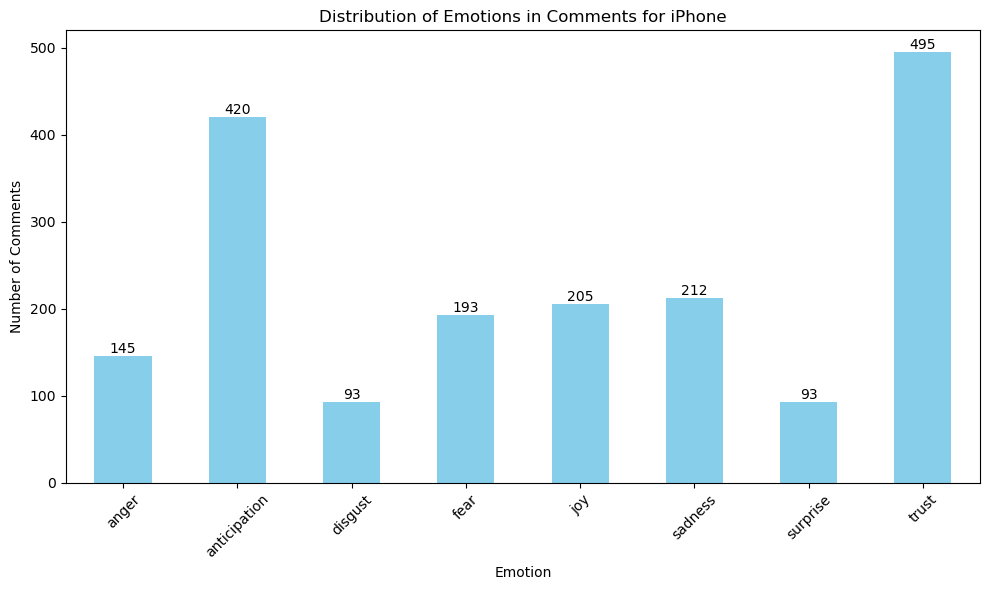

In [376]:
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_iphone.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPhone')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


***29.2. Macbook***

In [377]:
df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/1581698278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
2000  Macbook  Years ago we did a test, in 2007 - a Dell lapt...   
2001  Macbook  I always enjoy your videos regarding Apple pro...   
2002  Macbook  Apple should've done three things:\n\n1. Make ...   
2003  Macbook  Excellent presentation. I used both. My first ...   
2004  Macbook  The problem comes down to software. The M1 Mac...   
...       ...                                                ...   
2995  Macbook  Your video saved me tears! I bought the latest...   
2996  Macbook  Im deciding between The 15in Air and 14in Macb...   
2997  Macbook  very true bro! i have the same problem... in s...   
2998  Macbook  Still trying to figure out why I need one of t...   
2999  Macbook  Been a professional video editor for 20 years ...   

                                        Cleaned_Comment  \
2000  year ago test size well lawton loading current...   
2001  always enjoy video regarding apple product non...   
2002  apple done three thing size take size watt cha...   
2003  excellent presentation used first sac apple re...   
2004  problem come software sac especially max game ...   
...                                                 ...   
2995  video saved tear bought latest macbook pro siz...   
2996  deciding air macbook pro need something school...   
2997  true bro problem summary use prefer window rea...   
2998  still trying figure need one seven year old ma...   
2999  professional video editor size year would reas...   

                                      Sentiment_Comment  Length  \
2000  Years ago we did a test , in [ SIZE ] - a Well...    7521   
2001  I always enjoy your video regarding Apple prod...    4753   
2002  Apple should have done three things : [ SIZE ]...    4450   
2003  Excellent presentation . I used both . My firs...    3728   
2004  The problem comes down to software . The Of Sa...    3682   
...                                                 ...     ...   
2995  Your video saved me tears ! I bought the lates...     276   
2996  I Am deciding between The in Air and in Macboo...     275   
2997  very true bro ! i have the same problem . . . ...     275   
2998  Still trying to figure out why I need one of t...     275   
2999  Been a professional video editor for [ SIZE ] ...     275   

                                      Tokenized_Comment  Topic  \
2000  [year, ago, test, size, well, lawton, loading,...      3   
2001  [always, enjoy, video, regarding, apple, produ...      3   
2002  [apple, done, three, thing, size, take, size, ...      3   
2003  [excellent, presentation, used, first, sac, ap...      2   
2004  [problem, come, software, sac, especially, max...      2   
...                                                 ...    ...   
2995  [video, saved, tear, bought, latest, macbook, ...      2   
2996  [deciding, air, macbook, pro, need, something,...      3   
2997  [true, bro, problem, summary, use, prefer, win...      3   
2998  [still, trying, figure, need, one, seven, year...      3   
2999  [professional, video, editor, size, year, woul...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9961                Positive                Positive   
2001                0.9968                Positive                Positive   
2002                0.9716                Positive                Positive   
2003                0.9939                Positive                Positive   
2004                0.9952                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.3578                Positive                Positive   
2996                0.5927                Positive                 Neutral   
2997                0.8477                Positive                Positive   
2998                0.3818                Positive                Positive   
2999                0.077

In [378]:
df_mac[['Comment','Emotion']]

Comment  \
2000  Years ago we did a test, in 2007 - a Dell lapt...   
2001  I always enjoy your videos regarding Apple pro...   
2002  Apple should've done three things:\n\n1. Make ...   
2003  Excellent presentation. I used both. My first ...   
2004  The problem comes down to software. The M1 Mac...   
...                                                 ...   
2995  Your video saved me tears! I bought the latest...   
2996  Im deciding between The 15in Air and 14in Macb...   
2997  very true bro! i have the same problem... in s...   
2998  Still trying to figure out why I need one of t...   
2999  Been a professional video editor for 20 years ...   

                                                Emotion  
2000                                              trust  
2001                                               fear  
2002                                       anticipation  
2003                                       anticipation  
2004                                              trust  
...                                                 ...  
2995                                  joy sadness trust  
2996                                 anticipation trust  
2997                                         fear trust  
2998                                            sadness  
2999  anger anticipation disgust fear joy sadness su...  

[1000 rows x 2 columns]

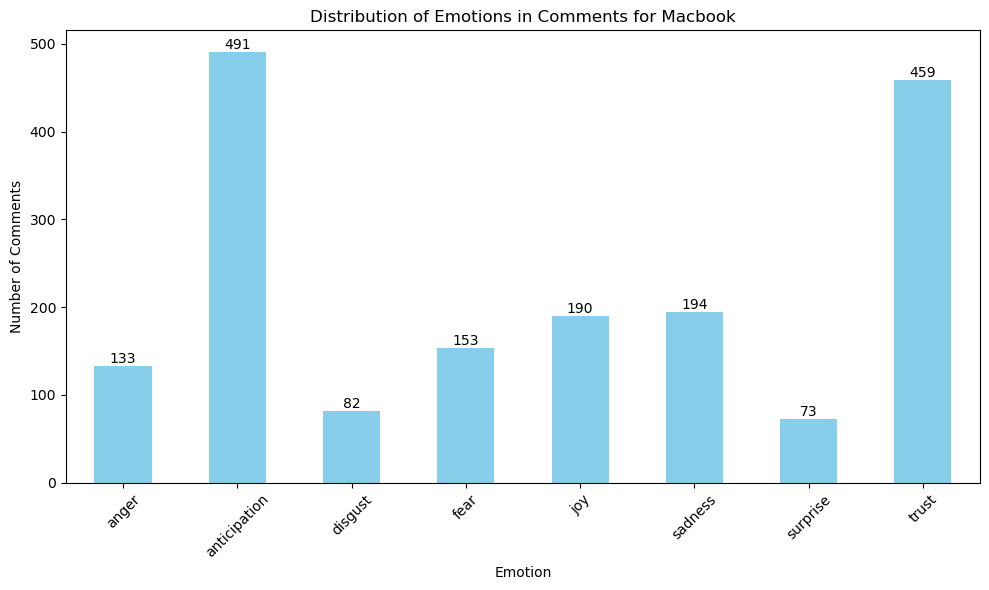

In [379]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_mac.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Macbook')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.3. iPad***

In [380]:
df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/3321922518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
3000   iPad  His mom: Earth is the third planet from the Su...   
3001   iPad  iPad (TCS4) Lyrics\r\n[Verse 1]\r\nI go throug...   
3002   iPad  Nobody needs damn extra keyboards and pencils ...   
3003   iPad  I've gone through such a rollercoaster with th...   
3004   iPad  As far as Photoshop/Photo Editing goes, one of...   
...     ...                                                ...   
3995   iPad  “Most confusing iPad lineup” you guys say that...   
3996   iPad  Honestly it’s so true I have an 2018 iPad Pro,...   
3997   iPad  Great review Pete, thank you. Can I just ask, ...   
3998   iPad  I don't agree with you. I and most people don'...   
3999   iPad  I'm still rocking the iPad mini 2... and since...   

                                        Cleaned_Comment  \
3000  mon earth third planet run place known univers...   
3001  ipad tcs4 serics verse size go ipad looking so...   
3002  nobody need damn extra keyboard pencil sure pe...   
3003  gone rollercoaster original intention get ipho...   
3004  far photoshop photo editing go one greatest fe...   
...                                                 ...   
3995  confusing ipad line ” gun say every single tim...   
3996  honestly true size ipad pro got loved screen s...   
3997  great review fete thank ask would use ipad min...   
3998  agree people need 256gb surf web watch youtube...   
3999  still rocking ipad mind size since lagging lat...   

                                      Sentiment_Comment  Length  \
3000  His mon : Earth is the third planet from the R...    5540   
3001  iPad ( TCS4 ) Serics [ Verse [ SIZE ] ] I go t...    5138   
3002  Nobody needs damn extra keyboard and pencils t...    5022   
3003  I have gone through such a rollercoaster with ...    3877   
3004  Is far as Photoshop / Photo Editing goes , one...    2887   
...                                                 ...     ...   
3995  “ Most confusing iPad line ” you guns say that...     388   
3996  Honestly it is so true I have an [ SIZE ] iPad...     388   
3997  Great review Fete , thank you . An I just ask ...     387   
3998  I do not agree with you . I and most people do...     387   
3999  I am still rocking the iPad mind [ SIZE ] . . ...     387   

                                      Tokenized_Comment  Topic  \
3000  [mon, earth, third, planet, run, place, known,...      1   
3001  [ipad, tcs4, serics, verse, size, go, ipad, lo...      4   
3002  [nobody, need, damn, extra, keyboard, pencil, ...      0   
3003  [gone, rollercoaster, original, intention, get...      1   
3004  [far, photoshop, photo, editing, go, one, grea...      0   
...                                                 ...    ...   
3995  [confusing, ipad, line, ”, gun, say, every, si...      0   
3996  [honestly, true, size, ipad, pro, got, loved, ...      0   
3997  [great, review, fete, thank, ask, would, use, ...      4   
3998  [agree, people, need, 256gb, surf, web, watch,...      0   
3999  [still, rocking, ipad, mind, size, since, lagg...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9520                Positive                Positive   
3001                0.9980                Positive                Positive   
3002                0.9963                Positive                Positive   
3003                0.9989                Positive                Positive   
3004                0.9978                Positive                Positive   
...                    ...                     ...                     ...   
3995               -0.7636                Negative                Positive   
3996                0.9650                Positive                Positive   
3997                0.6310                Positive                Positive   
3998                0.7087                Positive                Negative   
3999                0.8954                Posit

In [381]:
df_ipad[['Comment','Emotion']]

Comment  \
3000  His mom: Earth is the third planet from the Su...   
3001  iPad (TCS4) Lyrics\r\n[Verse 1]\r\nI go throug...   
3002  Nobody needs damn extra keyboards and pencils ...   
3003  I've gone through such a rollercoaster with th...   
3004  As far as Photoshop/Photo Editing goes, one of...   
...                                                 ...   
3995  “Most confusing iPad lineup” you guys say that...   
3996  Honestly it’s so true I have an 2018 iPad Pro,...   
3997  Great review Pete, thank you. Can I just ask, ...   
3998  I don't agree with you. I and most people don'...   
3999  I'm still rocking the iPad mini 2... and since...   

                        Emotion  
3000                      trust  
3001                       fear  
3002                      trust  
3003                      trust  
3004                      trust  
...                         ...  
3995               anticipation  
3996                        joy  
3997  anticipation joy surprise  
3998               anticipation  
3999                    sadness  

[1000 rows x 2 columns]

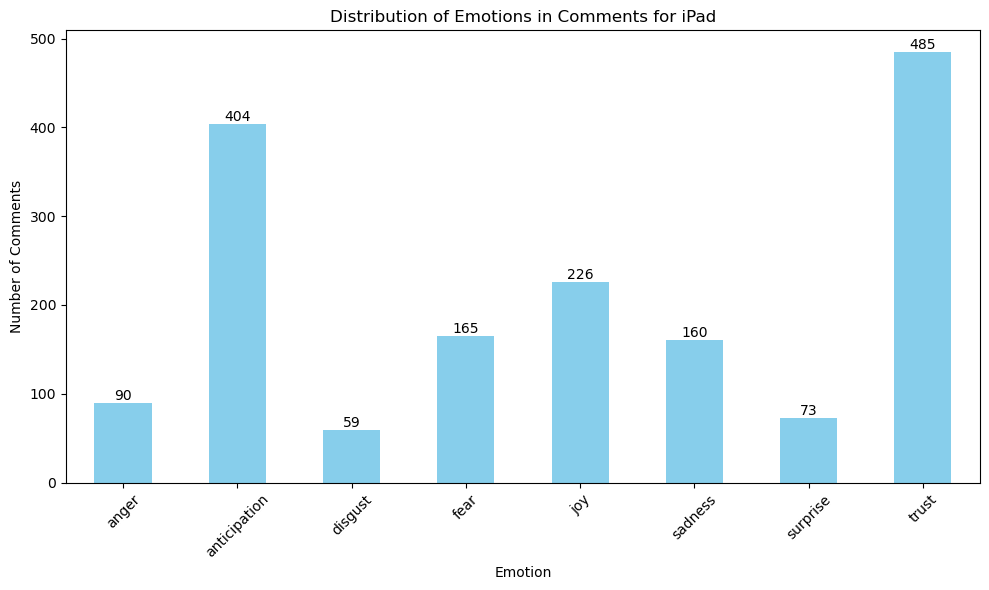

In [382]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_ipad.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPad')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.4. AirPods***

In [383]:
df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/2632544429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
0    AirPods  I bought a fake 2nd gen airpod last week.. loo...   
1    AirPods  I really appreciate your in-depth knowledge re...   
2    AirPods  If you use multiple Apple products like iPhone...   
3    AirPods  Just got AirPods Pro 2 - using on an iPhone an...   
4    AirPods  i just confirmed the lossless feature with an ...   
..       ...                                                ...   
995  AirPods  I have the Coca Cola AirPods case it’s shaped ...   
996  AirPods  Why m i watching this even though I hv this ai...   
997  AirPods  I’m watching this with my AirPods in n it alwa...   
998  AirPods  AirPods Pro 2 are dope. Noise cancellation and...   
999  AirPods  How would you compare the knockies to the regu...   

                                       Cleaned_Comment  \
0    bought fake gen airpod last week lookwise yes ...   
1    really appreciate depth knowledge regarding ai...   
2    use multiple apple product like iphone ipad ma...   
3    got airpods pro size using iphone andros phone...   
4    confirmed lossless feature apple executive app...   
..                                                 ...   
995       local old airpods case shaped like local old   
996               watching even though airpods pro gen   
997                  watching airpods n always falling   
998  airpods pro size done noise cancellation sound...   
999    would compare knocked regular airpods size size   

                                     Sentiment_Comment  Length  \
0    I bought a fake and gen airpod last week . . l...    1232   
1    I really appreciate your in - depth knowledge ...     908   
2    If you use multiple Apple products like iPhone...     886   
3    Just got AirPods Pro [ SIZE ] - using on an iP...     861   
4    i just confirmed the lossless feature with an ...     809   
..                                                 ...     ...   
995  I have the Local Old AirPods case it is shaped...      66   
996  Why m i watching this even though I he this ai...      66   
997  I am watching this with my AirPods in n it alw...      66   
998  AirPods Pro [ SIZE ] are done . Noise cancella...      66   
999  Now would you compare the knocked to the regul...      66   

                                     Tokenized_Comment  Topic  \
0    [bought, fake, gen, airpod, last, week, lookwi...      3   
1    [really, appreciate, depth, knowledge, regardi...      1   
2    [use, multiple, apple, product, like, iphone, ...      3   
3    [got, airpods, pro, size, using, iphone, andro...      0   
4    [confirmed, lossless, feature, apple, executiv...      3   
..                                                 ...    ...   
995  [local, old, airpods, case, shaped, like, loca...      0   
996        [watching, even, though, airpods, pro, gen]      0   
997            [watching, airpods, n, always, falling]      4   
998  [airpods, pro, size, done, noise, cancellation...      0   
999  [would, compare, knocked, regular, airpods, si...      3   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                 -0.9562                Negative                Positive   
1                  0.9808                Positive                Positive   
2                 -0.6964                Negative                Positive   
3                  0.9792                Positive                Positive   
4                 -0.4556                Negative                Positive   
..                    ...                     ...                     ...   
995                0.3612                Positive                 Neutral   
996                0.0000                 Neutral                 Neutral   
997               -0.1531                Negative                 Neutral   
998                0.7384                Positive                Positive   
999                0.0000                 Neutral                 Neutral   

     

In [384]:
df_airpods[['Comment','Emotion']]

Comment  \
0    I bought a fake 2nd gen airpod last week.. loo...   
1    I really appreciate your in-depth knowledge re...   
2    If you use multiple Apple products like iPhone...   
3    Just got AirPods Pro 2 - using on an iPhone an...   
4    i just confirmed the lossless feature with an ...   
..                                                 ...   
995  I have the Coca Cola AirPods case it’s shaped ...   
996  Why m i watching this even though I hv this ai...   
997  I’m watching this with my AirPods in n it alwa...   
998  AirPods Pro 2 are dope. Noise cancellation and...   
999  How would you compare the knockies to the regu...   

                                               Emotion  
0                                         anticipation  
1                                         anticipation  
2                                                trust  
3                                                  joy  
4                                              sadness  
..                                                 ...  
995                                       fear sadness  
996                                  anticipation fear  
997                          anticipation fear sadness  
998                                            sadness  
999  anger anticipation disgust fear joy sadness su...  

[1000 rows x 2 columns]

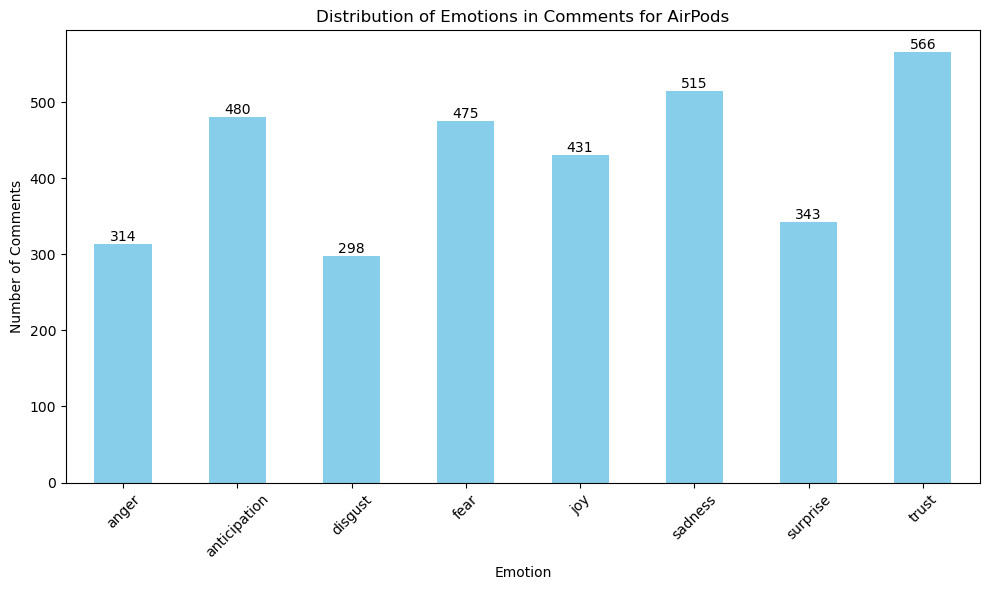

In [385]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_airpods.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for AirPods')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.5. Apple Watch***

In [386]:
df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_86432/164227614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
1000  Apple Watch  last year i took a break from apple... i got t...   
1001  Apple Watch  One thing no reviewer seems to cover is the di...   
1002  Apple Watch  🎯 Key Takeaways for quick navigation:\n\n00:13...   
1003  Apple Watch  I'm absolutely the audience for this. I'm a qu...   
1004  Apple Watch  Having an Apple iWatch was one of my dreams an...   
...           ...                                                ...   
1995  Apple Watch  I can’t imagine life without my Apple Watch! I...   
1996  Apple Watch  well i think to switch to apple watch, we have...   
1997  Apple Watch  @janssen_aquilino\n\nHi Dion, great and inform...   
1998  Apple Watch  Today I put my series 8 Apple Watch on my wris...   
1999  Apple Watch  Thank you for your clear,concise explanations,...   

                                        Cleaned_Comment  \
1000  last year took break apple got fixed size pro ...   
1001  one thing reviewed seems cover discomfort leve...   
1002  key takeaway quick navigation size size apple ...   
1003  absolutely audience qualified river recreation...   
1004  apple watch one dream month march size dream b...   
...                                                 ...   
1995  imagine life without apple watch use sleep cra...   
1996  well think switch apple watch disappointed wat...   
1997  janssenaquilino hi lion great information vide...   
1998  today put series size apple watch wrist forgot...   
1999  thank clear concise explanation would great le...   

                                      Sentiment_Comment  Length  \
1000  last year i took a break from apple . . . i go...    2209   
1001  One thing no reviewed seems to cover is the di...    1994   
1002  🎯 Key Takeaways for quick navigation : [ SIZE ...    1824   
1003  I am absolutely the audience for this . I am a...    1786   
1004  Having an Apple watch was one of my dreams and...    1764   
...                                                 ...     ...   
1995  I cannot imagine life without my Apple Watch !...     166   
1996  well i think to switch to apple watch , we hav...     166   
1997  @ janssen_aquilino Hi Lion , great and informa...     166   
1998  Today I put my series [ SIZE ] Apple Watch on ...     165   
1999  Thank you for your clear , concise explanation...     165   

                                      Tokenized_Comment  Topic  \
1000  [last, year, took, break, apple, got, fixed, s...      3   
1001  [one, thing, reviewed, seems, cover, discomfor...      3   
1002  [key, takeaway, quick, navigation, size, size,...      4   
1003  [absolutely, audience, qualified, river, recre...      1   
1004  [apple, watch, one, dream, month, march, size,...      0   
...                                                 ...    ...   
1995  [imagine, life, without, apple, watch, use, sl...      3   
1996  [well, think, switch, apple, watch, disappoint...      1   
1997  [janssenaquilino, hi, lion, great, information...      3   
1998  [today, put, series, size, apple, watch, wrist...      4   
1999  [thank, clear, concise, explanation, would, gr...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9839                Positive                Positive   
1001               -0.9101                Negative                Positive   
1002                0.9800                Positive                Positive   
1003               -0.9636                Negative                Positive   
1004                0.9905                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.0000                 Neutral                Positive   
1996               -0.3167                Negative                Positive   
1997                0.8070                Positive                 Neutral   
1998                0.3818                Positive         

In [387]:
df_watch[['Comment','Emotion']]

Comment  \
1000  last year i took a break from apple... i got t...   
1001  One thing no reviewer seems to cover is the di...   
1002  🎯 Key Takeaways for quick navigation:\n\n00:13...   
1003  I'm absolutely the audience for this. I'm a qu...   
1004  Having an Apple iWatch was one of my dreams an...   
...                                                 ...   
1995  I can’t imagine life without my Apple Watch! I...   
1996  well i think to switch to apple watch, we have...   
1997  @janssen_aquilino\n\nHi Dion, great and inform...   
1998  Today I put my series 8 Apple Watch on my wris...   
1999  Thank you for your clear,concise explanations,...   

                         Emotion  
1000                anticipation  
1001                anticipation  
1002                        fear  
1003                     sadness  
1004                anticipation  
...                          ...  
1995  anticipation fear surprise  
1996           anticipation fear  
1997           anticipation fear  
1998                anticipation  
1999           anticipation fear  

[1000 rows x 2 columns]

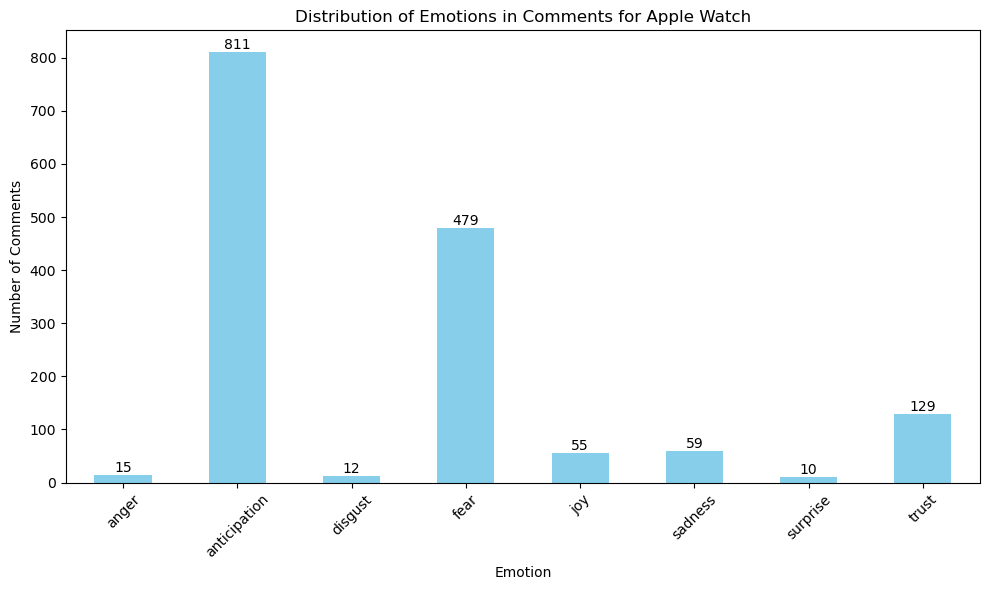

In [388]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_watch.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Apple Watch')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()